# **CONFIGURAÇÕES GERAIS**
---




# **Instalações**

In [ ]:
!pip install tensordict
!pip install torchrl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyl

In [ ]:
!pip install --upgrade torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 857.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 2.6 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 2.3.0
    Uninstalling triton-2.3.0:
      Successfully uninstalled triton-2.3.0
  Attempting uninstall: torch
    Found existing installation: torch 2.3.0+cu121
    Uninstalling torch-2.3.0+cu121:
      Successfully uninstalled torch-2.3.0+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.18.0+cu121
    Uninstalling torchvision-0.18.0+cu121:
      Successfully uninstalled torchvision-0.18.0+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.3.0+cu121 requires torch==2.3.0, but you have torch 2.3.1

In [ ]:
!pip install av

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 11.4 MB/s eta 0:00:00


# **Importações**

In [ ]:
import torch
import time
from IPython.display import clear_output

In [ ]:
import torchvision
from google.colab import drive
drive.mount('/content/drive')
import json
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from torchrl.envs import GymEnv, StepCounter, TransformedEnv
from torchrl.modules import EGreedyModule, MLP, QValueModule
from torchrl.collectors import SyncDataCollector
from torchrl.data import LazyTensorStorage, ReplayBuffer, TensorDictReplayBuffer, ListStorage
from torchrl.objectives import DQNLoss, SoftUpdate
from torchrl._utils import logger as torchrl_logger
from torchrl.record import CSVLogger, VideoRecorder
from tensordict.nn import TensorDictModule as Mod, TensorDictSequential as Seq
from torch.optim import Adam

In [ ]:
import matplotlib.pyplot as plt
from torchrl.data.replay_buffers.samplers import PrioritizedSampler
from collections import deque
import numpy as np

# **Funções Auxiliares**

## *Funções para Salvamento de Dados*

In [ ]:
def Salvar_Dados(Pasta_de_Destino,
                 Num_do_Teste,
                 Score_List,
                 eval_score,
                 sucessos,
                 mean_recomp_ep,
                 Versao):
    guarda_dados(Score_List,
                 nome_arquivo="Recompensa por Episódio " + str(Num_do_Teste),
                 nome_pasta  = Pasta_de_Destino)
    guarda_dados(eval_score,
                 nome_arquivo="Avaliação " + str(Num_do_Teste),
                 nome_pasta  = Pasta_de_Destino)
    guarda_dados(sucessos,
                 nome_arquivo="Sucessos "  + str(Num_do_Teste),
                 nome_pasta  = Pasta_de_Destino)
    guarda_dados(mean_recomp_ep,
                 nome_arquivo="Médias "    + str(Num_do_Teste),
                 nome_pasta  = Pasta_de_Destino)
    salvar_array(Score_List, mean_recomp_ep, sucessos, eval_score_mean, eval_score, Versao,
                 epoch   = Num_do_Teste,
                 caminho = Pasta_de_Destino)

    print("Dados salvos com sucesso!!!!")

In [ ]:
def salvar_array(score_list_1, mean_recomp_ep, Sucessos, Desempenho_Medio, eval_score, versao, epoch=1, caminho="pasta"):

    recomp_ep          = np.array(score_list_1)
    recomp_ep_eval     = np.array(eval_score)
    sucess_rates       = np.array(Sucessos)
    mean_recomp_ep     = np.array(mean_recomp_ep)
    recomp_med_eval_ep = np.array(Desempenho_Medio).reshape(1, )


    array_coluna1 = recomp_ep
    array_coluna2 = recomp_ep_eval
    array_coluna3 = sucess_rates
    array_coluna4 = mean_recomp_ep
    array_coluna5 = recomp_med_eval_ep


    # Preenchendo os arrays com tamanhos diferentes para que tenham o mesmo tamanho
    tamanho_maximo = max(len(array_coluna1), len(array_coluna2), len(array_coluna3), len(array_coluna4))
    array_coluna1 = np.pad(array_coluna1, (0, tamanho_maximo - len(array_coluna1)), mode='constant', constant_values=-9999)
    array_coluna2 = np.pad(array_coluna2, (0, tamanho_maximo - len(array_coluna2)), mode='constant', constant_values=-9999)
    array_coluna3 = np.pad(array_coluna3, (0, tamanho_maximo - len(array_coluna3)), mode='constant', constant_values=-9999)
    array_coluna4 = np.pad(array_coluna4, (0, tamanho_maximo - len(array_coluna4)), mode='constant', constant_values=-9999)
    array_coluna5 = np.pad(array_coluna5, (0, tamanho_maximo - len(array_coluna5)), mode='constant', constant_values=-9999)


    # Criando o DataFrame com os arrays de colunas
    df = pd.DataFrame({'Rewards_ep'        : array_coluna1,
                       'Rewards_ep_eval'   : array_coluna2,
                       'Sucess_Rates'      : array_coluna3,
                       'mean_recomp_ep'    : array_coluna4,
                       'Mean_Sucess_Rates' : array_coluna5})

    # Substituindo os valores de preenchimento por None
    df = df.replace(-9999, None)
    caminho_arquivo = "/content/drive/My Drive/DADOS IA PYTORCH1/" + caminho + "/DADOS XLSX/" + "Result_of_Epoch_" + str(epoch) + "_" + str(versao) + ".xlsx"
    df.to_excel(caminho_arquivo, index=False)

    print("DataFrame salvo em", caminho_arquivo)

In [ ]:
def guarda_dados(dados, nome_arquivo, nome_pasta):
        nome_arquivo    =  nome_arquivo
        nome_pasta      =  nome_pasta
        caminho_arquivo =  "/content/drive/My Drive/DADOS IA PYTORCH1/" + nome_pasta + "/DADOS TXT/"
        caminho_arquivo += nome_arquivo
        caminho_arquivo += ".txt"

        dados = json.dumps(dados)

        with open(caminho_arquivo, "w") as arquivo:
            arquivo.write(dados)

## *Funções Relacionadas ao Treinamento*

In [ ]:
def Avalia_Agente(Num_avaliacoes=1000):
    global eval_score, mean_100_eval_score, sucessos

    eval_score = []
    mean_100_eval_score = []

    for i in range(Num_avaliacoes+1):
        eval_score.append(env.rollout(max_steps=500, policy=policy)["next","step_count"][-1].item())
        if (i%100)==0:
            if i!=0:
                mean_100_eval_score.append(np.mean(eval_score[-100]))

    sucessos = [0]
    for i in mean_100_eval_score:
        bb = (i/500)*100
        sucessos.append(bb)

# **Configurações do Agente**

### *Função da configuração do agente*

In [ ]:
def Estruturar_Agente(Estrutura_da_Rede      = [64,64],
                      Passos_para_Decaimento = 345,
                      Epsilon_Inicial        = 1,
                      Epsilon_Final          = 0.0001,
                      Num_Passos_Aleatorios  = 200,
                      Frames_por_Lote        = 500,
                      Num_Passos_Otimizacao  = 10,
                      Tamanho_Replay_Buffer  = 100_000,
                      Alpha                  = 0.6,
                      Beta                   = 1,
                      Taxa_Aprendizado       = 0.001,
                      Atualizacao_Rede_Alvo  = 0.99):

    global collector, rb, optim, env, loss, updater, exploration_module, optim_steps, init_rand_steps, frames_per_batch, policy, policy_explore
    ### CONSTRUINDO UM AMBIENTE ###
    torch.manual_seed(0)
    env = TransformedEnv(GymEnv("CartPole-v1"), StepCounter())
    env.set_seed(0)


    ### DEFININDO UMA POLÍTICA ###
    value_mlp          = MLP(out_features=env.action_spec.shape[-1], num_cells=Estrutura_da_Rede)
    value_net          = Mod(value_mlp, in_keys=["observation"], out_keys=["action_value"])
    policy             = Seq(value_net, QValueModule(spec=env.action_spec))
    exploration_module = EGreedyModule(env.action_spec, annealing_num_steps=Passos_para_Decaimento, eps_init=Epsilon_Inicial, eps_end=Epsilon_Final)
    policy_explore     = Seq(policy, exploration_module)


    ### COLETOR DE DADOS E REPLAY BUFFER ###
    init_rand_steps = Num_Passos_Aleatorios
    frames_per_batch = Frames_por_Lote
    optim_steps = Num_Passos_Otimizacao
    collector = SyncDataCollector(env,
                                  policy_explore,
                                  frames_per_batch=frames_per_batch,
                                  total_frames=-1,
                                  init_random_frames=init_rand_steps)
    rb = ReplayBuffer(storage=LazyTensorStorage(Tamanho_Replay_Buffer),
                     sampler=PrioritizedSampler(max_capacity=Tamanho_Replay_Buffer, alpha=Alpha, beta=Beta))


    ### MÓDULO DE PERTA E OTIMIZADOR ###
    loss = DQNLoss(value_network=policy, action_space=env.action_spec, delay_value=True)
    optim = Adam(loss.parameters(), lr=Taxa_Aprendizado)
    updater = SoftUpdate(loss, eps=Atualizacao_Rede_Alvo)

### *Mudança de Parâmetros*

In [ ]:
Estruturar_Agente(Estrutura_da_Rede      = [64,64],
                  Passos_para_Decaimento = 345,
                  Epsilon_Inicial        = 1,
                  Epsilon_Final          = 0.0001,
                  Num_Passos_Aleatorios  = 200,
                  Frames_por_Lote        = 500,
                  Num_Passos_Otimizacao  = 10,
                  Tamanho_Replay_Buffer  = 100_000,
                  Alpha                  = 0.6,
                  Beta                   = 1,
                  Taxa_Aprendizado       = 0.001,
                  Atualizacao_Rede_Alvo  = 0.99)

/usr/local/lib/python3.10/dist-packages/torchrl/envs/common.py:2989: DeprecationWarning: Your wrapper was not given a device. Currently, this value will default to 'cpu'. From v0.5 it will default to `None`. With a device of None, no device casting is performed and the resulting tensordicts are deviceless. Please set your device accordingly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/usr/local/lib/python3.10/dist-packages/torchrl/modules/tensordict_module/exploration.py:97: UserWarning: eps_init should be a float.
  warnings.warn("eps_init should be a float.")
/usr/local/lib/python3.10/dist-packages/torchrl/collectors/collectors.py:603: UserWarning: init_random_frames (200) is not exactly a multiple of frames_per_batch (500),  this result

# SIMULAÇÕES

---




# Simulações V2(PER)

In [ ]:
### CONTROLE DO TREINAMENTO ###
episodios                  = 5_000
Num_do_Teste               = 1
Quantidade_de_Treinamentos = 3
Criterio_de_Parada         = 5
Parada                     = False
Avaliacao_no_Treinamento   = False
Log_Estatico_dos_Result    = True
Pasta_de_Destino           = "V4_test3"
Versao                     = "V4"

2024-06-14 21:14:43,682 [torchrl][INFO] Episodes: 26, Max num steps: 43, rb length 500
2024-06-14 21:14:44,912 [torchrl][INFO] Episodes: 79, Max num steps: 43, rb length 1000
2024-06-14 21:14:45,846 [torchrl][INFO] Episodes: 132, Max num steps: 43, rb length 1500
2024-06-14 21:14:47,030 [torchrl][INFO] Episodes: 185, Max num steps: 43, rb length 2000
2024-06-14 21:14:48,303 [torchrl][INFO] Episodes: 238, Max num steps: 43, rb length 2500
2024-06-14 21:14:49,586 [torchrl][INFO] Episodes: 292, Max num steps: 43, rb length 3000
2024-06-14 21:14:51,279 [torchrl][INFO] Episodes: 346, Max num steps: 43, rb length 3500
2024-06-14 21:14:52,261 [torchrl][INFO] Episodes: 398, Max num steps: 43, rb length 4000
2024-06-14 21:14:53,164 [torchrl][INFO] Episodes: 453, Max num steps: 43, rb length 4500
2024-06-14 21:14:54,067 [torchrl][INFO] Episodes: 507, Max num steps: 43, rb length 5000
2024-06-14 21:14:54,965 [torchrl][INFO] Episodes: 561, Max num steps: 43, rb length 5500
2024-06-14 21:14:55,862 

alcançou 500!!!!!!


2024-06-14 21:17:02,820 [torchrl][INFO] Episodes: 4425, Max num steps: 500, rb length 67000


alcançou 500!!!!!!


2024-06-14 21:17:04,058 [torchrl][INFO] Episodes: 4426, Max num steps: 500, rb length 67500
2024-06-14 21:17:05,271 [torchrl][INFO] Episodes: 4428, Max num steps: 500, rb length 68000
2024-06-14 21:17:06,563 [torchrl][INFO] Episodes: 4430, Max num steps: 500, rb length 68500
2024-06-14 21:17:07,785 [torchrl][INFO] Episodes: 4431, Max num steps: 500, rb length 69000


alcançou 500!!!!!!


2024-06-14 21:17:08,662 [torchrl][INFO] Episodes: 4432, Max num steps: 500, rb length 69500


alcançou 500!!!!!!


2024-06-14 21:17:09,526 [torchrl][INFO] Episodes: 4433, Max num steps: 500, rb length 70000


alcançou 500!!!!!!


2024-06-14 21:17:10,376 [torchrl][INFO] Episodes: 4436, Max num steps: 500, rb length 70500
2024-06-14 21:17:11,245 [torchrl][INFO] Episodes: 4438, Max num steps: 500, rb length 71000
2024-06-14 21:17:12,112 [torchrl][INFO] Episodes: 4440, Max num steps: 500, rb length 71500
2024-06-14 21:17:12,984 [torchrl][INFO] Episodes: 4441, Max num steps: 500, rb length 72000
2024-06-14 21:17:13,838 [torchrl][INFO] Episodes: 4444, Max num steps: 500, rb length 72500
2024-06-14 21:17:14,870 [torchrl][INFO] Episodes: 4446, Max num steps: 500, rb length 73000


alcançou 500!!!!!!


2024-06-14 21:17:15,740 [torchrl][INFO] Episodes: 4447, Max num steps: 500, rb length 73500
2024-06-14 21:17:16,589 [torchrl][INFO] Episodes: 4448, Max num steps: 500, rb length 74000
2024-06-14 21:17:17,474 [torchrl][INFO] Episodes: 4449, Max num steps: 500, rb length 74500
2024-06-14 21:17:18,652 [torchrl][INFO] Episodes: 4450, Max num steps: 500, rb length 75000


alcançou 500!!!!!!


2024-06-14 21:17:19,854 [torchrl][INFO] Episodes: 4451, Max num steps: 500, rb length 75500


alcançou 500!!!!!!


2024-06-14 21:17:21,099 [torchrl][INFO] Episodes: 4452, Max num steps: 500, rb length 76000


alcançou 500!!!!!!


2024-06-14 21:17:22,426 [torchrl][INFO] Episodes: 4454, Max num steps: 500, rb length 76500
2024-06-14 21:17:23,347 [torchrl][INFO] Episodes: 4456, Max num steps: 500, rb length 77000
2024-06-14 21:17:24,218 [torchrl][INFO] Episodes: 4457, Max num steps: 500, rb length 77500
2024-06-14 21:17:25,074 [torchrl][INFO] Episodes: 4458, Max num steps: 500, rb length 78000
2024-06-14 21:17:25,916 [torchrl][INFO] Episodes: 4459, Max num steps: 500, rb length 78500


alcançou 500!!!!!!


2024-06-14 21:17:26,773 [torchrl][INFO] Episodes: 4460, Max num steps: 500, rb length 79000


alcançou 500!!!!!!


2024-06-14 21:17:27,636 [torchrl][INFO] Episodes: 4461, Max num steps: 500, rb length 79500
2024-06-14 21:17:28,498 [torchrl][INFO] Episodes: 4462, Max num steps: 500, rb length 80000
2024-06-14 21:17:29,365 [torchrl][INFO] Episodes: 4463, Max num steps: 500, rb length 80500


alcançou 500!!!!!!


2024-06-14 21:17:30,227 [torchrl][INFO] Episodes: 4464, Max num steps: 500, rb length 81000
2024-06-14 21:17:31,262 [torchrl][INFO] Episodes: 4465, Max num steps: 500, rb length 81500
2024-06-14 21:17:32,113 [torchrl][INFO] Episodes: 4467, Max num steps: 500, rb length 82000
2024-06-14 21:17:33,170 [torchrl][INFO] Episodes: 4468, Max num steps: 500, rb length 82500


alcançou 500!!!!!!


2024-06-14 21:17:34,351 [torchrl][INFO] Episodes: 4469, Max num steps: 500, rb length 83000


alcançou 500!!!!!!


2024-06-14 21:17:36,681 [torchrl][INFO] Episodes: 4470, Max num steps: 500, rb length 83500
2024-06-14 21:17:37,946 [torchrl][INFO] Episodes: 4472, Max num steps: 500, rb length 84000
2024-06-14 21:17:38,857 [torchrl][INFO] Episodes: 4473, Max num steps: 500, rb length 84500
2024-06-14 21:17:39,718 [torchrl][INFO] Episodes: 4475, Max num steps: 500, rb length 85000
2024-06-14 21:17:40,568 [torchrl][INFO] Episodes: 4476, Max num steps: 500, rb length 85500


alcançou 500!!!!!!


2024-06-14 21:17:41,444 [torchrl][INFO] Episodes: 4477, Max num steps: 500, rb length 86000


alcançou 500!!!!!!


2024-06-14 21:17:42,309 [torchrl][INFO] Episodes: 4478, Max num steps: 500, rb length 86500
2024-06-14 21:17:43,181 [torchrl][INFO] Episodes: 4479, Max num steps: 500, rb length 87000


alcançou 500!!!!!!


2024-06-14 21:17:44,035 [torchrl][INFO] Episodes: 4480, Max num steps: 500, rb length 87500


alcançou 500!!!!!!


2024-06-14 21:17:44,907 [torchrl][INFO] Episodes: 4481, Max num steps: 500, rb length 88000
2024-06-14 21:17:45,762 [torchrl][INFO] Episodes: 4482, Max num steps: 500, rb length 88500
2024-06-14 21:17:46,626 [torchrl][INFO] Episodes: 4484, Max num steps: 500, rb length 89000
2024-06-14 21:17:47,509 [torchrl][INFO] Episodes: 4485, Max num steps: 500, rb length 89500


alcançou 500!!!!!!


2024-06-14 21:17:48,757 [torchrl][INFO] Episodes: 4487, Max num steps: 500, rb length 90000
2024-06-14 21:17:49,937 [torchrl][INFO] Episodes: 4489, Max num steps: 500, rb length 90500
2024-06-14 21:17:51,180 [torchrl][INFO] Episodes: 4490, Max num steps: 500, rb length 91000
2024-06-14 21:17:52,480 [torchrl][INFO] Episodes: 4491, Max num steps: 500, rb length 91500
2024-06-14 21:17:53,599 [torchrl][INFO] Episodes: 4492, Max num steps: 500, rb length 92000


alcançou 500!!!!!!


2024-06-14 21:17:54,479 [torchrl][INFO] Episodes: 4493, Max num steps: 500, rb length 92500
2024-06-14 21:17:55,335 [torchrl][INFO] Episodes: 4494, Max num steps: 500, rb length 93000


alcançou 500!!!!!!


2024-06-14 21:17:56,190 [torchrl][INFO] Episodes: 4495, Max num steps: 500, rb length 93500


alcançou 500!!!!!!


2024-06-14 21:17:57,056 [torchrl][INFO] Episodes: 4497, Max num steps: 500, rb length 94000
2024-06-14 21:17:57,925 [torchrl][INFO] Episodes: 4498, Max num steps: 500, rb length 94500
2024-06-14 21:17:58,782 [torchrl][INFO] Episodes: 4500, Max num steps: 500, rb length 95000


alcançou 500!!!!!!


2024-06-14 21:17:59,651 [torchrl][INFO] Episodes: 4501, Max num steps: 500, rb length 95500


alcançou 500!!!!!!


2024-06-14 21:18:00,524 [torchrl][INFO] Episodes: 4502, Max num steps: 500, rb length 96000
2024-06-14 21:18:01,371 [torchrl][INFO] Episodes: 4503, Max num steps: 500, rb length 96500
2024-06-14 21:18:02,235 [torchrl][INFO] Episodes: 4504, Max num steps: 500, rb length 97000


alcançou 500!!!!!!


2024-06-14 21:18:03,098 [torchrl][INFO] Episodes: 4506, Max num steps: 500, rb length 97500
2024-06-14 21:18:04,270 [torchrl][INFO] Episodes: 4507, Max num steps: 500, rb length 98000
2024-06-14 21:18:05,715 [torchrl][INFO] Episodes: 4509, Max num steps: 500, rb length 98500
2024-06-14 21:18:07,012 [torchrl][INFO] Episodes: 4510, Max num steps: 500, rb length 99000
2024-06-14 21:18:08,194 [torchrl][INFO] Episodes: 4512, Max num steps: 500, rb length 99500
2024-06-14 21:18:09,057 [torchrl][INFO] Episodes: 4513, Max num steps: 500, rb length 100000
2024-06-14 21:18:09,906 [torchrl][INFO] Episodes: 4515, Max num steps: 500, rb length 100000
2024-06-14 21:18:10,762 [torchrl][INFO] Episodes: 4516, Max num steps: 500, rb length 100000
2024-06-14 21:18:11,626 [torchrl][INFO] Episodes: 4517, Max num steps: 500, rb length 100000
2024-06-14 21:18:12,494 [torchrl][INFO] Episodes: 4519, Max num steps: 500, rb length 100000
2024-06-14 21:18:13,353 [torchrl][INFO] Episodes: 4520, Max num steps: 500,

alcançou 500!!!!!!


2024-06-14 21:18:15,240 [torchrl][INFO] Episodes: 4522, Max num steps: 500, rb length 100000
2024-06-14 21:18:16,464 [torchrl][INFO] Episodes: 4524, Max num steps: 500, rb length 100000
2024-06-14 21:18:17,691 [torchrl][INFO] Episodes: 4525, Max num steps: 500, rb length 100000
2024-06-14 21:18:19,313 [torchrl][INFO] Episodes: 4526, Max num steps: 500, rb length 100000
2024-06-14 21:18:20,621 [torchrl][INFO] Episodes: 4527, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:18:21,985 [torchrl][INFO] Episodes: 4529, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:18:23,282 [torchrl][INFO] Episodes: 4530, Max num steps: 500, rb length 100000
2024-06-14 21:18:24,730 [torchrl][INFO] Episodes: 4532, Max num steps: 500, rb length 100000
2024-06-14 21:18:25,611 [torchrl][INFO] Episodes: 4533, Max num steps: 500, rb length 100000
2024-06-14 21:18:26,475 [torchrl][INFO] Episodes: 4534, Max num steps: 500, rb length 100000
2024-06-14 21:18:27,337 [torchrl][INFO] Episodes: 4535, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:18:28,245 [torchrl][INFO] Episodes: 4537, Max num steps: 500, rb length 100000
2024-06-14 21:18:29,503 [torchrl][INFO] Episodes: 4538, Max num steps: 500, rb length 100000
2024-06-14 21:18:30,695 [torchrl][INFO] Episodes: 4539, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:18:32,003 [torchrl][INFO] Episodes: 4541, Max num steps: 500, rb length 100000
2024-06-14 21:18:33,313 [torchrl][INFO] Episodes: 4543, Max num steps: 500, rb length 100000
2024-06-14 21:18:34,236 [torchrl][INFO] Episodes: 4544, Max num steps: 500, rb length 100000
2024-06-14 21:18:35,378 [torchrl][INFO] Episodes: 4546, Max num steps: 500, rb length 100000
2024-06-14 21:18:36,575 [torchrl][INFO] Episodes: 4548, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:18:37,809 [torchrl][INFO] Episodes: 4549, Max num steps: 500, rb length 100000
2024-06-14 21:18:39,157 [torchrl][INFO] Episodes: 4550, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:18:40,033 [torchrl][INFO] Episodes: 4551, Max num steps: 500, rb length 100000
2024-06-14 21:18:41,063 [torchrl][INFO] Episodes: 4552, Max num steps: 500, rb length 100000
2024-06-14 21:18:41,919 [torchrl][INFO] Episodes: 4554, Max num steps: 500, rb length 100000
2024-06-14 21:18:42,787 [torchrl][INFO] Episodes: 4555, Max num steps: 500, rb length 100000
2024-06-14 21:18:43,627 [torchrl][INFO] Episodes: 4557, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:18:44,482 [torchrl][INFO] Episodes: 4558, Max num steps: 500, rb length 100000
2024-06-14 21:18:45,328 [torchrl][INFO] Episodes: 4559, Max num steps: 500, rb length 100000
2024-06-14 21:18:46,185 [torchrl][INFO] Episodes: 4560, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:18:47,063 [torchrl][INFO] Episodes: 4562, Max num steps: 500, rb length 100000
2024-06-14 21:18:47,960 [torchrl][INFO] Episodes: 4564, Max num steps: 500, rb length 100000
2024-06-14 21:18:48,799 [torchrl][INFO] Episodes: 4565, Max num steps: 500, rb length 100000
2024-06-14 21:18:49,890 [torchrl][INFO] Episodes: 4567, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:18:51,083 [torchrl][INFO] Episodes: 4568, Max num steps: 500, rb length 100000
2024-06-14 21:18:52,303 [torchrl][INFO] Episodes: 4569, Max num steps: 500, rb length 100000
2024-06-14 21:18:53,620 [torchrl][INFO] Episodes: 4570, Max num steps: 500, rb length 100000
2024-06-14 21:18:54,854 [torchrl][INFO] Episodes: 4571, Max num steps: 500, rb length 100000
2024-06-14 21:18:55,718 [torchrl][INFO] Episodes: 4573, Max num steps: 500, rb length 100000
2024-06-14 21:18:56,577 [torchrl][INFO] Episodes: 4575, Max num steps: 500, rb length 100000
2024-06-14 21:18:57,446 [torchrl][INFO] Episodes: 4576, Max num steps: 500, rb length 100000
2024-06-14 21:18:58,309 [torchrl][INFO] Episodes: 4578, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:18:59,172 [torchrl][INFO] Episodes: 4579, Max num steps: 500, rb length 100000
2024-06-14 21:19:00,035 [torchrl][INFO] Episodes: 4580, Max num steps: 500, rb length 100000
2024-06-14 21:19:00,903 [torchrl][INFO] Episodes: 4581, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:19:01,768 [torchrl][INFO] Episodes: 4583, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:19:02,631 [torchrl][INFO] Episodes: 4584, Max num steps: 500, rb length 100000
2024-06-14 21:19:03,502 [torchrl][INFO] Episodes: 4586, Max num steps: 500, rb length 100000
2024-06-14 21:19:04,423 [torchrl][INFO] Episodes: 4589, Max num steps: 500, rb length 100000
2024-06-14 21:19:05,621 [torchrl][INFO] Episodes: 4590, Max num steps: 500, rb length 100000
2024-06-14 21:19:06,792 [torchrl][INFO] Episodes: 4592, Max num steps: 500, rb length 100000
2024-06-14 21:19:08,102 [torchrl][INFO] Episodes: 4593, Max num steps: 500, rb length 100000
2024-06-14 21:19:09,372 [torchrl][INFO] Episodes: 4595, Max num steps: 500, rb length 100000
2024-06-14 21:19:10,408 [torchrl][INFO] Episodes: 4597, Max num steps: 500, rb length 100000
2024-06-14 21:19:11,262 [torchrl][INFO] Episodes: 4599, Max num steps: 500, rb length 100000
2024-06-14 21:19:12,119 [torchrl][INFO] Episodes: 4601, Max num steps: 500, rb length 100000
2024-06-14 21:19:12,977 [torchrl][INFO] Episodes: 4603, Max num steps:

alcançou 500!!!!!!


2024-06-14 21:19:31,928 [torchrl][INFO] Episodes: 4636, Max num steps: 500, rb length 100000
2024-06-14 21:19:32,787 [torchrl][INFO] Episodes: 4637, Max num steps: 500, rb length 100000
2024-06-14 21:19:33,631 [torchrl][INFO] Episodes: 4639, Max num steps: 500, rb length 100000
2024-06-14 21:19:34,495 [torchrl][INFO] Episodes: 4641, Max num steps: 500, rb length 100000
2024-06-14 21:19:35,660 [torchrl][INFO] Episodes: 4642, Max num steps: 500, rb length 100000
2024-06-14 21:19:36,823 [torchrl][INFO] Episodes: 4643, Max num steps: 500, rb length 100000
2024-06-14 21:19:38,063 [torchrl][INFO] Episodes: 4645, Max num steps: 500, rb length 100000
2024-06-14 21:19:39,308 [torchrl][INFO] Episodes: 4647, Max num steps: 500, rb length 100000
2024-06-14 21:19:40,174 [torchrl][INFO] Episodes: 4649, Max num steps: 500, rb length 100000
2024-06-14 21:19:41,020 [torchrl][INFO] Episodes: 4650, Max num steps: 500, rb length 100000
2024-06-14 21:19:42,056 [torchrl][INFO] Episodes: 4652, Max num steps:

alcançou 500!!!!!!


2024-06-14 21:20:39,278 [torchrl][INFO] Episodes: 4746, Max num steps: 500, rb length 100000
2024-06-14 21:20:40,602 [torchrl][INFO] Episodes: 4747, Max num steps: 500, rb length 100000
2024-06-14 21:20:41,680 [torchrl][INFO] Episodes: 4749, Max num steps: 500, rb length 100000
2024-06-14 21:20:42,532 [torchrl][INFO] Episodes: 4751, Max num steps: 500, rb length 100000
2024-06-14 21:20:43,383 [torchrl][INFO] Episodes: 4753, Max num steps: 500, rb length 100000
2024-06-14 21:20:44,234 [torchrl][INFO] Episodes: 4754, Max num steps: 500, rb length 100000
2024-06-14 21:20:45,092 [torchrl][INFO] Episodes: 4756, Max num steps: 500, rb length 100000
2024-06-14 21:20:45,932 [torchrl][INFO] Episodes: 4758, Max num steps: 500, rb length 100000
2024-06-14 21:20:46,791 [torchrl][INFO] Episodes: 4759, Max num steps: 500, rb length 100000
2024-06-14 21:20:47,829 [torchrl][INFO] Episodes: 4761, Max num steps: 500, rb length 100000
2024-06-14 21:20:48,713 [torchrl][INFO] Episodes: 4763, Max num steps:

alcançou 500!!!!!!


2024-06-14 21:21:20,654 [torchrl][INFO] Episodes: 4810, Max num steps: 500, rb length 100000
2024-06-14 21:21:21,705 [torchrl][INFO] Episodes: 4811, Max num steps: 500, rb length 100000
2024-06-14 21:21:22,576 [torchrl][INFO] Episodes: 4812, Max num steps: 500, rb length 100000
2024-06-14 21:21:23,435 [torchrl][INFO] Episodes: 4814, Max num steps: 500, rb length 100000
2024-06-14 21:21:24,301 [torchrl][INFO] Episodes: 4816, Max num steps: 500, rb length 100000
2024-06-14 21:21:25,242 [torchrl][INFO] Episodes: 4818, Max num steps: 500, rb length 100000
2024-06-14 21:21:26,444 [torchrl][INFO] Episodes: 4819, Max num steps: 500, rb length 100000
2024-06-14 21:21:27,627 [torchrl][INFO] Episodes: 4821, Max num steps: 500, rb length 100000
2024-06-14 21:21:28,915 [torchrl][INFO] Episodes: 4822, Max num steps: 500, rb length 100000
2024-06-14 21:21:30,050 [torchrl][INFO] Episodes: 4823, Max num steps: 500, rb length 100000
2024-06-14 21:21:30,903 [torchrl][INFO] Episodes: 4825, Max num steps:

alcançou 500!!!!!!


2024-06-14 21:21:52,665 [torchrl][INFO] Episodes: 4864, Max num steps: 500, rb length 100000
2024-06-14 21:21:53,541 [torchrl][INFO] Episodes: 4865, Max num steps: 500, rb length 100000
2024-06-14 21:21:54,398 [torchrl][INFO] Episodes: 4867, Max num steps: 500, rb length 100000
2024-06-14 21:21:55,592 [torchrl][INFO] Episodes: 4870, Max num steps: 500, rb length 100000
2024-06-14 21:21:56,767 [torchrl][INFO] Episodes: 4872, Max num steps: 500, rb length 100000
2024-06-14 21:21:58,039 [torchrl][INFO] Episodes: 4873, Max num steps: 500, rb length 100000
2024-06-14 21:21:59,337 [torchrl][INFO] Episodes: 4874, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:22:00,303 [torchrl][INFO] Episodes: 4876, Max num steps: 500, rb length 100000
2024-06-14 21:22:01,161 [torchrl][INFO] Episodes: 4878, Max num steps: 500, rb length 100000
2024-06-14 21:22:02,018 [torchrl][INFO] Episodes: 4879, Max num steps: 500, rb length 100000
2024-06-14 21:22:02,882 [torchrl][INFO] Episodes: 4881, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:22:03,758 [torchrl][INFO] Episodes: 4882, Max num steps: 500, rb length 100000
2024-06-14 21:22:04,623 [torchrl][INFO] Episodes: 4883, Max num steps: 500, rb length 100000
2024-06-14 21:22:05,477 [torchrl][INFO] Episodes: 4884, Max num steps: 500, rb length 100000
2024-06-14 21:22:06,341 [torchrl][INFO] Episodes: 4886, Max num steps: 500, rb length 100000
2024-06-14 21:22:07,380 [torchrl][INFO] Episodes: 4887, Max num steps: 500, rb length 100000
2024-06-14 21:22:08,239 [torchrl][INFO] Episodes: 4890, Max num steps: 500, rb length 100000
2024-06-14 21:22:09,096 [torchrl][INFO] Episodes: 4891, Max num steps: 500, rb length 100000
2024-06-14 21:22:10,122 [torchrl][INFO] Episodes: 4894, Max num steps: 500, rb length 100000
2024-06-14 21:22:11,295 [torchrl][INFO] Episodes: 4895, Max num steps: 500, rb length 100000
2024-06-14 21:22:12,490 [torchrl][INFO] Episodes: 4896, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:22:13,825 [torchrl][INFO] Episodes: 4898, Max num steps: 500, rb length 100000
2024-06-14 21:22:14,854 [torchrl][INFO] Episodes: 4900, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:22:15,713 [torchrl][INFO] Episodes: 4901, Max num steps: 500, rb length 100000
2024-06-14 21:22:16,566 [torchrl][INFO] Episodes: 4903, Max num steps: 500, rb length 100000
2024-06-14 21:22:17,429 [torchrl][INFO] Episodes: 4904, Max num steps: 500, rb length 100000
2024-06-14 21:22:18,284 [torchrl][INFO] Episodes: 4907, Max num steps: 500, rb length 100000
2024-06-14 21:22:19,153 [torchrl][INFO] Episodes: 4909, Max num steps: 500, rb length 100000
2024-06-14 21:22:20,000 [torchrl][INFO] Episodes: 4910, Max num steps: 500, rb length 100000
2024-06-14 21:22:20,857 [torchrl][INFO] Episodes: 4911, Max num steps: 500, rb length 100000
2024-06-14 21:22:21,721 [torchrl][INFO] Episodes: 4914, Max num steps: 500, rb length 100000
2024-06-14 21:22:22,754 [torchrl][INFO] Episodes: 4915, Max num steps: 500, rb length 100000
2024-06-14 21:22:23,620 [torchrl][INFO] Episodes: 4916, Max num steps: 500, rb length 100000
2024-06-14 21:22:24,600 [torchrl][INFO] Episodes: 4919, Max num steps:

alcançou 500!!!!!!


2024-06-14 21:30:13,458 [torchrl][INFO] Episodes: 6209, Max num steps: 500, rb length 100000
2024-06-14 21:30:14,478 [torchrl][INFO] Episodes: 6211, Max num steps: 500, rb length 100000
2024-06-14 21:30:15,481 [torchrl][INFO] Episodes: 6212, Max num steps: 500, rb length 100000
2024-06-14 21:30:16,555 [torchrl][INFO] Episodes: 6213, Max num steps: 500, rb length 100000
2024-06-14 21:30:17,765 [torchrl][INFO] Episodes: 6215, Max num steps: 500, rb length 100000
2024-06-14 21:30:19,012 [torchrl][INFO] Episodes: 6216, Max num steps: 500, rb length 100000
2024-06-14 21:30:19,953 [torchrl][INFO] Episodes: 6218, Max num steps: 500, rb length 100000
2024-06-14 21:30:21,170 [torchrl][INFO] Episodes: 6219, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:30:22,368 [torchrl][INFO] Episodes: 6221, Max num steps: 500, rb length 100000
2024-06-14 21:30:23,641 [torchrl][INFO] Episodes: 6222, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:30:24,921 [torchrl][INFO] Episodes: 6223, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:30:25,876 [torchrl][INFO] Episodes: 6224, Max num steps: 500, rb length 100000
2024-06-14 21:30:26,907 [torchrl][INFO] Episodes: 6225, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:30:27,746 [torchrl][INFO] Episodes: 6226, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:30:28,603 [torchrl][INFO] Episodes: 6227, Max num steps: 500, rb length 100000
2024-06-14 21:30:29,469 [torchrl][INFO] Episodes: 6228, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:30:30,335 [torchrl][INFO] Episodes: 6229, Max num steps: 500, rb length 100000
2024-06-14 21:30:31,197 [torchrl][INFO] Episodes: 6231, Max num steps: 500, rb length 100000
2024-06-14 21:30:32,050 [torchrl][INFO] Episodes: 6232, Max num steps: 500, rb length 100000
2024-06-14 21:30:32,904 [torchrl][INFO] Episodes: 6233, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:30:33,763 [torchrl][INFO] Episodes: 6234, Max num steps: 500, rb length 100000
2024-06-14 21:30:34,629 [torchrl][INFO] Episodes: 6235, Max num steps: 500, rb length 100000
2024-06-14 21:30:35,661 [torchrl][INFO] Episodes: 6236, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:30:36,851 [torchrl][INFO] Episodes: 6238, Max num steps: 500, rb length 100000
2024-06-14 21:30:38,059 [torchrl][INFO] Episodes: 6240, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:30:39,388 [torchrl][INFO] Episodes: 6241, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:30:40,740 [torchrl][INFO] Episodes: 6242, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:30:41,608 [torchrl][INFO] Episodes: 6243, Max num steps: 500, rb length 100000
2024-06-14 21:30:42,464 [torchrl][INFO] Episodes: 6244, Max num steps: 500, rb length 100000
2024-06-14 21:30:43,324 [torchrl][INFO] Episodes: 6245, Max num steps: 500, rb length 100000
2024-06-14 21:30:44,180 [torchrl][INFO] Episodes: 6246, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:30:45,041 [torchrl][INFO] Episodes: 6247, Max num steps: 500, rb length 100000
2024-06-14 21:30:45,897 [torchrl][INFO] Episodes: 6249, Max num steps: 500, rb length 100000
2024-06-14 21:30:46,754 [torchrl][INFO] Episodes: 6250, Max num steps: 500, rb length 100000
2024-06-14 21:30:47,590 [torchrl][INFO] Episodes: 6251, Max num steps: 500, rb length 100000
2024-06-14 21:30:48,442 [torchrl][INFO] Episodes: 6253, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:30:49,306 [torchrl][INFO] Episodes: 6254, Max num steps: 500, rb length 100000
2024-06-14 21:30:50,178 [torchrl][INFO] Episodes: 6255, Max num steps: 500, rb length 100000
2024-06-14 21:30:51,322 [torchrl][INFO] Episodes: 6257, Max num steps: 500, rb length 100000
2024-06-14 21:30:52,501 [torchrl][INFO] Episodes: 6258, Max num steps: 500, rb length 100000
2024-06-14 21:30:53,723 [torchrl][INFO] Episodes: 6260, Max num steps: 500, rb length 100000
2024-06-14 21:30:54,989 [torchrl][INFO] Episodes: 6261, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:30:56,232 [torchrl][INFO] Episodes: 6262, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:30:57,098 [torchrl][INFO] Episodes: 6263, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:30:58,207 [torchrl][INFO] Episodes: 6264, Max num steps: 500, rb length 100000
2024-06-14 21:30:59,380 [torchrl][INFO] Episodes: 6266, Max num steps: 500, rb length 100000
2024-06-14 21:31:00,571 [torchrl][INFO] Episodes: 6267, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:31:01,852 [torchrl][INFO] Episodes: 6269, Max num steps: 500, rb length 100000
2024-06-14 21:31:02,937 [torchrl][INFO] Episodes: 6270, Max num steps: 500, rb length 100000
2024-06-14 21:31:03,812 [torchrl][INFO] Episodes: 6271, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:31:04,678 [torchrl][INFO] Episodes: 6272, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:31:05,538 [torchrl][INFO] Episodes: 6273, Max num steps: 500, rb length 100000
2024-06-14 21:31:06,703 [torchrl][INFO] Episodes: 6275, Max num steps: 500, rb length 100000
2024-06-14 21:31:07,899 [torchrl][INFO] Episodes: 6276, Max num steps: 500, rb length 100000
2024-06-14 21:31:09,146 [torchrl][INFO] Episodes: 6278, Max num steps: 500, rb length 100000
2024-06-14 21:31:10,392 [torchrl][INFO] Episodes: 6279, Max num steps: 500, rb length 100000
2024-06-14 21:31:11,256 [torchrl][INFO] Episodes: 6280, Max num steps: 500, rb length 100000
2024-06-14 21:31:12,106 [torchrl][INFO] Episodes: 6281, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:31:13,141 [torchrl][INFO] Episodes: 6282, Max num steps: 500, rb length 100000
2024-06-14 21:31:14,008 [torchrl][INFO] Episodes: 6283, Max num steps: 500, rb length 100000
2024-06-14 21:31:14,851 [torchrl][INFO] Episodes: 6285, Max num steps: 500, rb length 100000
2024-06-14 21:31:15,705 [torchrl][INFO] Episodes: 6287, Max num steps: 500, rb length 100000
2024-06-14 21:31:16,567 [torchrl][INFO] Episodes: 6288, Max num steps: 500, rb length 100000
2024-06-14 21:31:17,429 [torchrl][INFO] Episodes: 6289, Max num steps: 500, rb length 100000
2024-06-14 21:31:18,289 [torchrl][INFO] Episodes: 6290, Max num steps: 500, rb length 100000
2024-06-14 21:31:19,144 [torchrl][INFO] Episodes: 6292, Max num steps: 500, rb length 100000
2024-06-14 21:31:19,993 [torchrl][INFO] Episodes: 6293, Max num steps: 500, rb length 100000
2024-06-14 21:31:21,165 [torchrl][INFO] Episodes: 6295, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:31:22,340 [torchrl][INFO] Episodes: 6296, Max num steps: 500, rb length 100000
2024-06-14 21:31:23,581 [torchrl][INFO] Episodes: 6297, Max num steps: 500, rb length 100000
2024-06-14 21:31:24,885 [torchrl][INFO] Episodes: 6298, Max num steps: 500, rb length 100000
2024-06-14 21:31:25,783 [torchrl][INFO] Episodes: 6300, Max num steps: 500, rb length 100000
2024-06-14 21:31:26,641 [torchrl][INFO] Episodes: 6301, Max num steps: 500, rb length 100000
2024-06-14 21:31:27,500 [torchrl][INFO] Episodes: 6303, Max num steps: 500, rb length 100000
2024-06-14 21:31:28,451 [torchrl][INFO] Episodes: 6304, Max num steps: 500, rb length 100000
2024-06-14 21:31:29,875 [torchrl][INFO] Episodes: 6305, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:31:31,073 [torchrl][INFO] Episodes: 6307, Max num steps: 500, rb length 100000
2024-06-14 21:31:32,383 [torchrl][INFO] Episodes: 6308, Max num steps: 500, rb length 100000
2024-06-14 21:31:33,599 [torchrl][INFO] Episodes: 6310, Max num steps: 500, rb length 100000
2024-06-14 21:31:34,479 [torchrl][INFO] Episodes: 6312, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:31:35,512 [torchrl][INFO] Episodes: 6313, Max num steps: 500, rb length 100000
2024-06-14 21:31:36,705 [torchrl][INFO] Episodes: 6314, Max num steps: 500, rb length 100000
2024-06-14 21:31:37,899 [torchrl][INFO] Episodes: 6316, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:31:39,225 [torchrl][INFO] Episodes: 6317, Max num steps: 500, rb length 100000
2024-06-14 21:31:40,268 [torchrl][INFO] Episodes: 6318, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:31:41,128 [torchrl][INFO] Episodes: 6319, Max num steps: 500, rb length 100000
2024-06-14 21:31:41,977 [torchrl][INFO] Episodes: 6320, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:31:42,848 [torchrl][INFO] Episodes: 6322, Max num steps: 500, rb length 100000
2024-06-14 21:31:43,711 [torchrl][INFO] Episodes: 6323, Max num steps: 500, rb length 100000
2024-06-14 21:31:44,575 [torchrl][INFO] Episodes: 6324, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:31:45,435 [torchrl][INFO] Episodes: 6325, Max num steps: 500, rb length 100000
2024-06-14 21:31:46,483 [torchrl][INFO] Episodes: 6327, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:31:47,323 [torchrl][INFO] Episodes: 6328, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:31:48,184 [torchrl][INFO] Episodes: 6329, Max num steps: 500, rb length 100000
2024-06-14 21:31:49,039 [torchrl][INFO] Episodes: 6330, Max num steps: 500, rb length 100000
2024-06-14 21:31:50,029 [torchrl][INFO] Episodes: 6331, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:31:51,244 [torchrl][INFO] Episodes: 6332, Max num steps: 500, rb length 100000
2024-06-14 21:31:52,438 [torchrl][INFO] Episodes: 6333, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:31:53,738 [torchrl][INFO] Episodes: 6335, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:31:54,860 [torchrl][INFO] Episodes: 6336, Max num steps: 500, rb length 100000
2024-06-14 21:31:55,709 [torchrl][INFO] Episodes: 6337, Max num steps: 500, rb length 100000
2024-06-14 21:31:56,562 [torchrl][INFO] Episodes: 6338, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:31:57,432 [torchrl][INFO] Episodes: 6339, Max num steps: 500, rb length 100000
2024-06-14 21:31:58,293 [torchrl][INFO] Episodes: 6341, Max num steps: 500, rb length 100000
2024-06-14 21:31:59,161 [torchrl][INFO] Episodes: 6342, Max num steps: 500, rb length 100000
2024-06-14 21:32:00,019 [torchrl][INFO] Episodes: 6344, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:01,056 [torchrl][INFO] Episodes: 6345, Max num steps: 500, rb length 100000
2024-06-14 21:32:01,890 [torchrl][INFO] Episodes: 6346, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:02,752 [torchrl][INFO] Episodes: 6347, Max num steps: 500, rb length 100000
2024-06-14 21:32:03,616 [torchrl][INFO] Episodes: 6349, Max num steps: 500, rb length 100000
2024-06-14 21:32:04,470 [torchrl][INFO] Episodes: 6350, Max num steps: 500, rb length 100000
2024-06-14 21:32:05,687 [torchrl][INFO] Episodes: 6351, Max num steps: 500, rb length 100000
2024-06-14 21:32:06,868 [torchrl][INFO] Episodes: 6353, Max num steps: 500, rb length 100000
2024-06-14 21:32:08,116 [torchrl][INFO] Episodes: 6354, Max num steps: 500, rb length 100000
2024-06-14 21:32:09,391 [torchrl][INFO] Episodes: 6355, Max num steps: 500, rb length 100000
2024-06-14 21:32:10,357 [torchrl][INFO] Episodes: 6356, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:11,218 [torchrl][INFO] Episodes: 6357, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:12,073 [torchrl][INFO] Episodes: 6358, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:12,941 [torchrl][INFO] Episodes: 6359, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:13,812 [torchrl][INFO] Episodes: 6361, Max num steps: 500, rb length 100000
2024-06-14 21:32:14,667 [torchrl][INFO] Episodes: 6362, Max num steps: 500, rb length 100000
2024-06-14 21:32:15,518 [torchrl][INFO] Episodes: 6364, Max num steps: 500, rb length 100000
2024-06-14 21:32:16,588 [torchrl][INFO] Episodes: 6365, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:17,440 [torchrl][INFO] Episodes: 6366, Max num steps: 500, rb length 100000
2024-06-14 21:32:18,296 [torchrl][INFO] Episodes: 6367, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:19,174 [torchrl][INFO] Episodes: 6368, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:20,187 [torchrl][INFO] Episodes: 6370, Max num steps: 500, rb length 100000
2024-06-14 21:32:21,408 [torchrl][INFO] Episodes: 6372, Max num steps: 500, rb length 100000
2024-06-14 21:32:22,597 [torchrl][INFO] Episodes: 6373, Max num steps: 500, rb length 100000
2024-06-14 21:32:23,914 [torchrl][INFO] Episodes: 6374, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:25,030 [torchrl][INFO] Episodes: 6375, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:25,886 [torchrl][INFO] Episodes: 6376, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:26,752 [torchrl][INFO] Episodes: 6377, Max num steps: 500, rb length 100000
2024-06-14 21:32:27,609 [torchrl][INFO] Episodes: 6378, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:28,472 [torchrl][INFO] Episodes: 6379, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:29,332 [torchrl][INFO] Episodes: 6380, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:30,195 [torchrl][INFO] Episodes: 6381, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:31,043 [torchrl][INFO] Episodes: 6382, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:32,067 [torchrl][INFO] Episodes: 6383, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:32,929 [torchrl][INFO] Episodes: 6384, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:33,786 [torchrl][INFO] Episodes: 6385, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:34,661 [torchrl][INFO] Episodes: 6387, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:35,867 [torchrl][INFO] Episodes: 6388, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:37,081 [torchrl][INFO] Episodes: 6389, Max num steps: 500, rb length 100000
2024-06-14 21:32:38,380 [torchrl][INFO] Episodes: 6390, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:39,635 [torchrl][INFO] Episodes: 6391, Max num steps: 500, rb length 100000
2024-06-14 21:32:40,494 [torchrl][INFO] Episodes: 6392, Max num steps: 500, rb length 100000
2024-06-14 21:32:41,347 [torchrl][INFO] Episodes: 6393, Max num steps: 500, rb length 100000
2024-06-14 21:32:42,205 [torchrl][INFO] Episodes: 6395, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:43,065 [torchrl][INFO] Episodes: 6396, Max num steps: 500, rb length 100000
2024-06-14 21:32:43,925 [torchrl][INFO] Episodes: 6398, Max num steps: 500, rb length 100000
2024-06-14 21:32:44,769 [torchrl][INFO] Episodes: 6399, Max num steps: 500, rb length 100000
2024-06-14 21:32:45,617 [torchrl][INFO] Episodes: 6401, Max num steps: 500, rb length 100000
2024-06-14 21:32:46,473 [torchrl][INFO] Episodes: 6402, Max num steps: 500, rb length 100000
2024-06-14 21:32:47,515 [torchrl][INFO] Episodes: 6403, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:48,377 [torchrl][INFO] Episodes: 6404, Max num steps: 500, rb length 100000
2024-06-14 21:32:49,243 [torchrl][INFO] Episodes: 6406, Max num steps: 500, rb length 100000
2024-06-14 21:32:50,358 [torchrl][INFO] Episodes: 6407, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:51,568 [torchrl][INFO] Episodes: 6408, Max num steps: 500, rb length 100000
2024-06-14 21:32:52,798 [torchrl][INFO] Episodes: 6409, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:54,053 [torchrl][INFO] Episodes: 6411, Max num steps: 500, rb length 100000
2024-06-14 21:32:55,152 [torchrl][INFO] Episodes: 6412, Max num steps: 500, rb length 100000
2024-06-14 21:32:55,999 [torchrl][INFO] Episodes: 6413, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:56,860 [torchrl][INFO] Episodes: 6414, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:32:57,728 [torchrl][INFO] Episodes: 6415, Max num steps: 500, rb length 100000
2024-06-14 21:32:58,585 [torchrl][INFO] Episodes: 6417, Max num steps: 500, rb length 100000
2024-06-14 21:32:59,444 [torchrl][INFO] Episodes: 6418, Max num steps: 500, rb length 100000
2024-06-14 21:33:00,284 [torchrl][INFO] Episodes: 6420, Max num steps: 500, rb length 100000
2024-06-14 21:33:01,133 [torchrl][INFO] Episodes: 6421, Max num steps: 500, rb length 100000
2024-06-14 21:33:01,976 [torchrl][INFO] Episodes: 6422, Max num steps: 500, rb length 100000
2024-06-14 21:33:02,823 [torchrl][INFO] Episodes: 6423, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:03,843 [torchrl][INFO] Episodes: 6424, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:04,707 [torchrl][INFO] Episodes: 6425, Max num steps: 500, rb length 100000
2024-06-14 21:33:05,887 [torchrl][INFO] Episodes: 6426, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:07,062 [torchrl][INFO] Episodes: 6427, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:08,310 [torchrl][INFO] Episodes: 6429, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:09,620 [torchrl][INFO] Episodes: 6430, Max num steps: 500, rb length 100000
2024-06-14 21:33:10,463 [torchrl][INFO] Episodes: 6431, Max num steps: 500, rb length 100000
2024-06-14 21:33:11,307 [torchrl][INFO] Episodes: 6432, Max num steps: 500, rb length 100000
2024-06-14 21:33:12,164 [torchrl][INFO] Episodes: 6433, Max num steps: 500, rb length 100000
2024-06-14 21:33:13,032 [torchrl][INFO] Episodes: 6434, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:13,882 [torchrl][INFO] Episodes: 6435, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:14,738 [torchrl][INFO] Episodes: 6437, Max num steps: 500, rb length 100000
2024-06-14 21:33:15,580 [torchrl][INFO] Episodes: 6438, Max num steps: 500, rb length 100000
2024-06-14 21:33:16,433 [torchrl][INFO] Episodes: 6439, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:17,294 [torchrl][INFO] Episodes: 6440, Max num steps: 500, rb length 100000
2024-06-14 21:33:18,320 [torchrl][INFO] Episodes: 6442, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:19,177 [torchrl][INFO] Episodes: 6443, Max num steps: 500, rb length 100000
2024-06-14 21:33:20,246 [torchrl][INFO] Episodes: 6444, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:21,439 [torchrl][INFO] Episodes: 6445, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:22,644 [torchrl][INFO] Episodes: 6446, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:23,949 [torchrl][INFO] Episodes: 6447, Max num steps: 500, rb length 100000
2024-06-14 21:33:25,122 [torchrl][INFO] Episodes: 6448, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:25,981 [torchrl][INFO] Episodes: 6449, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:27,058 [torchrl][INFO] Episodes: 6451, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:28,228 [torchrl][INFO] Episodes: 6452, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:29,460 [torchrl][INFO] Episodes: 6453, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:30,758 [torchrl][INFO] Episodes: 6454, Max num steps: 500, rb length 100000
2024-06-14 21:33:31,926 [torchrl][INFO] Episodes: 6455, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:32,775 [torchrl][INFO] Episodes: 6456, Max num steps: 500, rb length 100000
2024-06-14 21:33:33,807 [torchrl][INFO] Episodes: 6457, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:34,670 [torchrl][INFO] Episodes: 6458, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:35,794 [torchrl][INFO] Episodes: 6459, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:36,998 [torchrl][INFO] Episodes: 6460, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:38,210 [torchrl][INFO] Episodes: 6461, Max num steps: 500, rb length 100000
2024-06-14 21:33:39,525 [torchrl][INFO] Episodes: 6462, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:40,476 [torchrl][INFO] Episodes: 6463, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:41,323 [torchrl][INFO] Episodes: 6464, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:42,194 [torchrl][INFO] Episodes: 6465, Max num steps: 500, rb length 100000
2024-06-14 21:33:43,044 [torchrl][INFO] Episodes: 6466, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:43,916 [torchrl][INFO] Episodes: 6467, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:44,770 [torchrl][INFO] Episodes: 6468, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:45,635 [torchrl][INFO] Episodes: 6469, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:46,483 [torchrl][INFO] Episodes: 6470, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:47,330 [torchrl][INFO] Episodes: 6471, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:48,204 [torchrl][INFO] Episodes: 6472, Max num steps: 500, rb length 100000
2024-06-14 21:33:49,235 [torchrl][INFO] Episodes: 6473, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:50,285 [torchrl][INFO] Episodes: 6474, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:51,477 [torchrl][INFO] Episodes: 6475, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:52,690 [torchrl][INFO] Episodes: 6476, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:53,994 [torchrl][INFO] Episodes: 6477, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:55,082 [torchrl][INFO] Episodes: 6478, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:55,936 [torchrl][INFO] Episodes: 6479, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:56,804 [torchrl][INFO] Episodes: 6480, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:57,885 [torchrl][INFO] Episodes: 6482, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:33:59,066 [torchrl][INFO] Episodes: 6483, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:00,285 [torchrl][INFO] Episodes: 6484, Max num steps: 500, rb length 100000
2024-06-14 21:34:01,584 [torchrl][INFO] Episodes: 6485, Max num steps: 500, rb length 100000
2024-06-14 21:34:02,754 [torchrl][INFO] Episodes: 6486, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:03,624 [torchrl][INFO] Episodes: 6487, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:04,489 [torchrl][INFO] Episodes: 6488, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:05,663 [torchrl][INFO] Episodes: 6489, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:07,045 [torchrl][INFO] Episodes: 6490, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:08,316 [torchrl][INFO] Episodes: 6491, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:09,606 [torchrl][INFO] Episodes: 6492, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:10,480 [torchrl][INFO] Episodes: 6493, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:11,339 [torchrl][INFO] Episodes: 6494, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:12,208 [torchrl][INFO] Episodes: 6495, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:13,073 [torchrl][INFO] Episodes: 6496, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:13,946 [torchrl][INFO] Episodes: 6497, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:14,797 [torchrl][INFO] Episodes: 6498, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:15,654 [torchrl][INFO] Episodes: 6499, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:16,518 [torchrl][INFO] Episodes: 6500, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:17,379 [torchrl][INFO] Episodes: 6501, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:18,252 [torchrl][INFO] Episodes: 6502, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:19,108 [torchrl][INFO] Episodes: 6503, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:20,163 [torchrl][INFO] Episodes: 6504, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:21,562 [torchrl][INFO] Episodes: 6505, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:22,815 [torchrl][INFO] Episodes: 6506, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:24,130 [torchrl][INFO] Episodes: 6507, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:25,047 [torchrl][INFO] Episodes: 6508, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:25,912 [torchrl][INFO] Episodes: 6509, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:26,773 [torchrl][INFO] Episodes: 6510, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:27,631 [torchrl][INFO] Episodes: 6511, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:28,490 [torchrl][INFO] Episodes: 6512, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:29,343 [torchrl][INFO] Episodes: 6513, Max num steps: 500, rb length 100000
2024-06-14 21:34:30,197 [torchrl][INFO] Episodes: 6514, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:31,064 [torchrl][INFO] Episodes: 6515, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:31,923 [torchrl][INFO] Episodes: 6516, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:32,780 [torchrl][INFO] Episodes: 6517, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:33,649 [torchrl][INFO] Episodes: 6518, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:34,625 [torchrl][INFO] Episodes: 6519, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:35,822 [torchrl][INFO] Episodes: 6520, Max num steps: 500, rb length 100000
2024-06-14 21:34:37,218 [torchrl][INFO] Episodes: 6521, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:38,518 [torchrl][INFO] Episodes: 6522, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:39,731 [torchrl][INFO] Episodes: 6523, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:40,607 [torchrl][INFO] Episodes: 6524, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:41,489 [torchrl][INFO] Episodes: 6525, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:42,345 [torchrl][INFO] Episodes: 6526, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:43,220 [torchrl][INFO] Episodes: 6527, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:44,088 [torchrl][INFO] Episodes: 6528, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:44,944 [torchrl][INFO] Episodes: 6529, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:45,798 [torchrl][INFO] Episodes: 6530, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:46,662 [torchrl][INFO] Episodes: 6531, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:47,527 [torchrl][INFO] Episodes: 6532, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:48,383 [torchrl][INFO] Episodes: 6533, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:49,250 [torchrl][INFO] Episodes: 6534, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:50,352 [torchrl][INFO] Episodes: 6535, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:51,556 [torchrl][INFO] Episodes: 6536, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:53,057 [torchrl][INFO] Episodes: 6537, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:54,371 [torchrl][INFO] Episodes: 6538, Max num steps: 500, rb length 100000
2024-06-14 21:34:55,243 [torchrl][INFO] Episodes: 6539, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:56,105 [torchrl][INFO] Episodes: 6540, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:56,966 [torchrl][INFO] Episodes: 6541, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:57,837 [torchrl][INFO] Episodes: 6542, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:58,696 [torchrl][INFO] Episodes: 6543, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:34:59,545 [torchrl][INFO] Episodes: 6544, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:00,413 [torchrl][INFO] Episodes: 6545, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:01,294 [torchrl][INFO] Episodes: 6546, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:02,174 [torchrl][INFO] Episodes: 6547, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:03,057 [torchrl][INFO] Episodes: 6548, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:03,924 [torchrl][INFO] Episodes: 6549, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:05,044 [torchrl][INFO] Episodes: 6550, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:06,227 [torchrl][INFO] Episodes: 6551, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:07,468 [torchrl][INFO] Episodes: 6552, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:08,758 [torchrl][INFO] Episodes: 6553, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:09,977 [torchrl][INFO] Episodes: 6554, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:10,852 [torchrl][INFO] Episodes: 6555, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:11,711 [torchrl][INFO] Episodes: 6556, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:12,583 [torchrl][INFO] Episodes: 6557, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:13,453 [torchrl][INFO] Episodes: 6558, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:14,335 [torchrl][INFO] Episodes: 6560, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:15,202 [torchrl][INFO] Episodes: 6561, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:16,068 [torchrl][INFO] Episodes: 6562, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:16,933 [torchrl][INFO] Episodes: 6563, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:17,796 [torchrl][INFO] Episodes: 6564, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:18,659 [torchrl][INFO] Episodes: 6565, Max num steps: 500, rb length 100000
2024-06-14 21:35:19,621 [torchrl][INFO] Episodes: 6566, Max num steps: 500, rb length 100000
2024-06-14 21:35:20,810 [torchrl][INFO] Episodes: 6567, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:21,999 [torchrl][INFO] Episodes: 6568, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:23,295 [torchrl][INFO] Episodes: 6569, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:24,437 [torchrl][INFO] Episodes: 6570, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:25,300 [torchrl][INFO] Episodes: 6571, Max num steps: 500, rb length 100000
2024-06-14 21:35:26,329 [torchrl][INFO] Episodes: 6572, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:27,186 [torchrl][INFO] Episodes: 6573, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:28,047 [torchrl][INFO] Episodes: 6574, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:28,922 [torchrl][INFO] Episodes: 6575, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:29,770 [torchrl][INFO] Episodes: 6576, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:30,632 [torchrl][INFO] Episodes: 6577, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:31,490 [torchrl][INFO] Episodes: 6578, Max num steps: 500, rb length 100000
2024-06-14 21:35:32,340 [torchrl][INFO] Episodes: 6579, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:33,222 [torchrl][INFO] Episodes: 6580, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:34,099 [torchrl][INFO] Episodes: 6581, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:35,319 [torchrl][INFO] Episodes: 6582, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:36,509 [torchrl][INFO] Episodes: 6583, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:37,778 [torchrl][INFO] Episodes: 6584, Max num steps: 500, rb length 100000
2024-06-14 21:35:39,035 [torchrl][INFO] Episodes: 6585, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:39,906 [torchrl][INFO] Episodes: 6586, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:40,788 [torchrl][INFO] Episodes: 6587, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:41,648 [torchrl][INFO] Episodes: 6588, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:42,680 [torchrl][INFO] Episodes: 6589, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:43,552 [torchrl][INFO] Episodes: 6590, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:44,403 [torchrl][INFO] Episodes: 6591, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:45,272 [torchrl][INFO] Episodes: 6592, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:46,142 [torchrl][INFO] Episodes: 6593, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:47,000 [torchrl][INFO] Episodes: 6594, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:47,860 [torchrl][INFO] Episodes: 6595, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:48,716 [torchrl][INFO] Episodes: 6596, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:49,858 [torchrl][INFO] Episodes: 6597, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:51,034 [torchrl][INFO] Episodes: 6598, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:52,301 [torchrl][INFO] Episodes: 6599, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:53,589 [torchrl][INFO] Episodes: 6600, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:54,731 [torchrl][INFO] Episodes: 6601, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:55,612 [torchrl][INFO] Episodes: 6602, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:56,544 [torchrl][INFO] Episodes: 6603, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:57,753 [torchrl][INFO] Episodes: 6604, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:35:58,998 [torchrl][INFO] Episodes: 6605, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:01,082 [torchrl][INFO] Episodes: 6606, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:02,104 [torchrl][INFO] Episodes: 6607, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:02,970 [torchrl][INFO] Episodes: 6608, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:03,828 [torchrl][INFO] Episodes: 6609, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:04,854 [torchrl][INFO] Episodes: 6610, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:06,056 [torchrl][INFO] Episodes: 6611, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:08,107 [torchrl][INFO] Episodes: 6612, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:11,573 [torchrl][INFO] Episodes: 6613, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:13,679 [torchrl][INFO] Episodes: 6614, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:16,876 [torchrl][INFO] Episodes: 6615, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:20,543 [torchrl][INFO] Episodes: 6616, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:25,007 [torchrl][INFO] Episodes: 6617, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:30,702 [torchrl][INFO] Episodes: 6618, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:33,451 [torchrl][INFO] Episodes: 6619, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:35,076 [torchrl][INFO] Episodes: 6620, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:36,727 [torchrl][INFO] Episodes: 6621, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:38,420 [torchrl][INFO] Episodes: 6622, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:42,836 [torchrl][INFO] Episodes: 6623, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:44,961 [torchrl][INFO] Episodes: 6624, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:46,292 [torchrl][INFO] Episodes: 6625, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:47,652 [torchrl][INFO] Episodes: 6626, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:48,980 [torchrl][INFO] Episodes: 6627, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:50,296 [torchrl][INFO] Episodes: 6628, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:51,598 [torchrl][INFO] Episodes: 6629, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:52,949 [torchrl][INFO] Episodes: 6630, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:54,441 [torchrl][INFO] Episodes: 6631, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:56,864 [torchrl][INFO] Episodes: 6632, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:36:59,509 [torchrl][INFO] Episodes: 6633, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:00,919 [torchrl][INFO] Episodes: 6634, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:02,491 [torchrl][INFO] Episodes: 6635, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:03,366 [torchrl][INFO] Episodes: 6636, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:04,235 [torchrl][INFO] Episodes: 6637, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:05,103 [torchrl][INFO] Episodes: 6638, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:05,983 [torchrl][INFO] Episodes: 6639, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:07,033 [torchrl][INFO] Episodes: 6640, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:07,897 [torchrl][INFO] Episodes: 6641, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:08,772 [torchrl][INFO] Episodes: 6642, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:09,621 [torchrl][INFO] Episodes: 6643, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:10,835 [torchrl][INFO] Episodes: 6644, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:12,032 [torchrl][INFO] Episodes: 6645, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:13,869 [torchrl][INFO] Episodes: 6646, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:16,300 [torchrl][INFO] Episodes: 6647, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:17,499 [torchrl][INFO] Episodes: 6648, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:18,933 [torchrl][INFO] Episodes: 6649, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:20,581 [torchrl][INFO] Episodes: 6650, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:21,926 [torchrl][INFO] Episodes: 6651, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:23,703 [torchrl][INFO] Episodes: 6652, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:25,154 [torchrl][INFO] Episodes: 6653, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:31,018 [torchrl][INFO] Episodes: 6654, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:33,212 [torchrl][INFO] Episodes: 6655, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:35,154 [torchrl][INFO] Episodes: 6656, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:37,336 [torchrl][INFO] Episodes: 6657, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:39,285 [torchrl][INFO] Episodes: 6658, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:41,143 [torchrl][INFO] Episodes: 6659, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:43,727 [torchrl][INFO] Episodes: 6660, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:46,349 [torchrl][INFO] Episodes: 6661, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:48,079 [torchrl][INFO] Episodes: 6662, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:50,136 [torchrl][INFO] Episodes: 6663, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:51,773 [torchrl][INFO] Episodes: 6664, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:53,213 [torchrl][INFO] Episodes: 6665, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:54,886 [torchrl][INFO] Episodes: 6666, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:37:58,778 [torchrl][INFO] Episodes: 6667, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:02,812 [torchrl][INFO] Episodes: 6668, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:04,759 [torchrl][INFO] Episodes: 6669, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:06,662 [torchrl][INFO] Episodes: 6670, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:08,074 [torchrl][INFO] Episodes: 6671, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:09,773 [torchrl][INFO] Episodes: 6672, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:11,095 [torchrl][INFO] Episodes: 6673, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:12,662 [torchrl][INFO] Episodes: 6674, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:14,587 [torchrl][INFO] Episodes: 6675, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:17,218 [torchrl][INFO] Episodes: 6676, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:19,708 [torchrl][INFO] Episodes: 6677, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:21,013 [torchrl][INFO] Episodes: 6678, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:22,363 [torchrl][INFO] Episodes: 6679, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:24,105 [torchrl][INFO] Episodes: 6680, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:26,655 [torchrl][INFO] Episodes: 6681, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:29,490 [torchrl][INFO] Episodes: 6682, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:32,039 [torchrl][INFO] Episodes: 6683, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:34,650 [torchrl][INFO] Episodes: 6684, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:36,103 [torchrl][INFO] Episodes: 6685, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:37,429 [torchrl][INFO] Episodes: 6686, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:38,490 [torchrl][INFO] Episodes: 6687, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:39,360 [torchrl][INFO] Episodes: 6688, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:40,216 [torchrl][INFO] Episodes: 6689, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:41,250 [torchrl][INFO] Episodes: 6690, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:42,115 [torchrl][INFO] Episodes: 6691, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:42,973 [torchrl][INFO] Episodes: 6692, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:43,831 [torchrl][INFO] Episodes: 6693, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:44,691 [torchrl][INFO] Episodes: 6694, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:46,428 [torchrl][INFO] Episodes: 6695, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:47,670 [torchrl][INFO] Episodes: 6696, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:49,000 [torchrl][INFO] Episodes: 6697, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:50,270 [torchrl][INFO] Episodes: 6698, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:51,182 [torchrl][INFO] Episodes: 6699, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:52,367 [torchrl][INFO] Episodes: 6700, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:53,639 [torchrl][INFO] Episodes: 6701, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:56,090 [torchrl][INFO] Episodes: 6702, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:57,870 [torchrl][INFO] Episodes: 6703, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:38:59,526 [torchrl][INFO] Episodes: 6704, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:01,222 [torchrl][INFO] Episodes: 6705, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:03,795 [torchrl][INFO] Episodes: 6706, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:06,267 [torchrl][INFO] Episodes: 6707, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:07,661 [torchrl][INFO] Episodes: 6708, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:09,318 [torchrl][INFO] Episodes: 6709, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:10,938 [torchrl][INFO] Episodes: 6710, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:12,570 [torchrl][INFO] Episodes: 6711, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:14,917 [torchrl][INFO] Episodes: 6712, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:18,728 [torchrl][INFO] Episodes: 6713, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:22,315 [torchrl][INFO] Episodes: 6714, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:23,880 [torchrl][INFO] Episodes: 6715, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:25,781 [torchrl][INFO] Episodes: 6716, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:27,480 [torchrl][INFO] Episodes: 6717, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:30,511 [torchrl][INFO] Episodes: 6718, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:32,895 [torchrl][INFO] Episodes: 6719, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:38,099 [torchrl][INFO] Episodes: 6720, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:40,392 [torchrl][INFO] Episodes: 6721, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:42,305 [torchrl][INFO] Episodes: 6722, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:43,674 [torchrl][INFO] Episodes: 6723, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:44,992 [torchrl][INFO] Episodes: 6724, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:46,292 [torchrl][INFO] Episodes: 6725, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:47,588 [torchrl][INFO] Episodes: 6726, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:49,078 [torchrl][INFO] Episodes: 6727, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:51,340 [torchrl][INFO] Episodes: 6728, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:54,137 [torchrl][INFO] Episodes: 6729, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:55,754 [torchrl][INFO] Episodes: 6730, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:57,054 [torchrl][INFO] Episodes: 6731, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:58,415 [torchrl][INFO] Episodes: 6732, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:39:59,285 [torchrl][INFO] Episodes: 6733, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:00,146 [torchrl][INFO] Episodes: 6734, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:01,025 [torchrl][INFO] Episodes: 6735, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:01,896 [torchrl][INFO] Episodes: 6736, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:02,759 [torchrl][INFO] Episodes: 6737, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:03,823 [torchrl][INFO] Episodes: 6738, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:04,691 [torchrl][INFO] Episodes: 6739, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:05,918 [torchrl][INFO] Episodes: 6740, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:07,099 [torchrl][INFO] Episodes: 6741, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:08,400 [torchrl][INFO] Episodes: 6742, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:09,685 [torchrl][INFO] Episodes: 6743, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:10,563 [torchrl][INFO] Episodes: 6744, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:11,431 [torchrl][INFO] Episodes: 6745, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:12,280 [torchrl][INFO] Episodes: 6746, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:13,146 [torchrl][INFO] Episodes: 6747, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:14,018 [torchrl][INFO] Episodes: 6748, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:14,881 [torchrl][INFO] Episodes: 6749, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:15,750 [torchrl][INFO] Episodes: 6750, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:16,623 [torchrl][INFO] Episodes: 6751, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:17,484 [torchrl][INFO] Episodes: 6752, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:18,338 [torchrl][INFO] Episodes: 6753, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:19,210 [torchrl][INFO] Episodes: 6754, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:20,552 [torchrl][INFO] Episodes: 6755, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:21,757 [torchrl][INFO] Episodes: 6756, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:22,999 [torchrl][INFO] Episodes: 6757, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:24,333 [torchrl][INFO] Episodes: 6758, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:25,295 [torchrl][INFO] Episodes: 6759, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:26,163 [torchrl][INFO] Episodes: 6760, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:27,036 [torchrl][INFO] Episodes: 6761, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:27,908 [torchrl][INFO] Episodes: 6762, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:28,785 [torchrl][INFO] Episodes: 6763, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:29,649 [torchrl][INFO] Episodes: 6764, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:30,501 [torchrl][INFO] Episodes: 6765, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:31,373 [torchrl][INFO] Episodes: 6766, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:32,245 [torchrl][INFO] Episodes: 6767, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:33,127 [torchrl][INFO] Episodes: 6768, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:33,994 [torchrl][INFO] Episodes: 6769, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:35,025 [torchrl][INFO] Episodes: 6770, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:36,204 [torchrl][INFO] Episodes: 6771, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:37,649 [torchrl][INFO] Episodes: 6772, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:38,997 [torchrl][INFO] Episodes: 6773, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:40,149 [torchrl][INFO] Episodes: 6774, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:41,011 [torchrl][INFO] Episodes: 6775, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:41,879 [torchrl][INFO] Episodes: 6776, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:42,745 [torchrl][INFO] Episodes: 6777, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:43,603 [torchrl][INFO] Episodes: 6778, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:44,474 [torchrl][INFO] Episodes: 6779, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:45,346 [torchrl][INFO] Episodes: 6780, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:46,270 [torchrl][INFO] Episodes: 6781, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:47,214 [torchrl][INFO] Episodes: 6782, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:48,186 [torchrl][INFO] Episodes: 6783, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:49,092 [torchrl][INFO] Episodes: 6784, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:50,045 [torchrl][INFO] Episodes: 6785, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:51,445 [torchrl][INFO] Episodes: 6786, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:52,666 [torchrl][INFO] Episodes: 6787, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:54,131 [torchrl][INFO] Episodes: 6788, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:55,735 [torchrl][INFO] Episodes: 6789, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:57,292 [torchrl][INFO] Episodes: 6790, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:40:58,885 [torchrl][INFO] Episodes: 6791, Max num steps: 500, rb length 100000
2024-06-14 21:40:59,797 [torchrl][INFO] Episodes: 6792, Max num steps: 500, rb length 100000
2024-06-14 21:41:00,668 [torchrl][INFO] Episodes: 6793, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:01,550 [torchrl][INFO] Episodes: 6794, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:02,457 [torchrl][INFO] Episodes: 6795, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:03,610 [torchrl][INFO] Episodes: 6796, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:05,261 [torchrl][INFO] Episodes: 6797, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:07,406 [torchrl][INFO] Episodes: 6798, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:08,930 [torchrl][INFO] Episodes: 6799, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:14,411 [torchrl][INFO] Episodes: 6800, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:19,331 [torchrl][INFO] Episodes: 6801, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:23,011 [torchrl][INFO] Episodes: 6802, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:24,752 [torchrl][INFO] Episodes: 6803, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:27,231 [torchrl][INFO] Episodes: 6804, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:29,798 [torchrl][INFO] Episodes: 6805, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:32,371 [torchrl][INFO] Episodes: 6806, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:33,729 [torchrl][INFO] Episodes: 6807, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:35,114 [torchrl][INFO] Episodes: 6808, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:36,497 [torchrl][INFO] Episodes: 6809, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:37,780 [torchrl][INFO] Episodes: 6810, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:39,123 [torchrl][INFO] Episodes: 6811, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:40,485 [torchrl][INFO] Episodes: 6812, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:42,170 [torchrl][INFO] Episodes: 6813, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:43,366 [torchrl][INFO] Episodes: 6814, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:44,625 [torchrl][INFO] Episodes: 6815, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:45,937 [torchrl][INFO] Episodes: 6816, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:46,888 [torchrl][INFO] Episodes: 6817, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:47,757 [torchrl][INFO] Episodes: 6818, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:48,614 [torchrl][INFO] Episodes: 6819, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:49,475 [torchrl][INFO] Episodes: 6820, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:50,339 [torchrl][INFO] Episodes: 6821, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:51,215 [torchrl][INFO] Episodes: 6822, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:52,271 [torchrl][INFO] Episodes: 6823, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:53,142 [torchrl][INFO] Episodes: 6824, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:54,051 [torchrl][INFO] Episodes: 6825, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:54,924 [torchrl][INFO] Episodes: 6826, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:55,796 [torchrl][INFO] Episodes: 6827, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:56,890 [torchrl][INFO] Episodes: 6828, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:41:58,098 [torchrl][INFO] Episodes: 6829, Max num steps: 500, rb length 100000
2024-06-14 21:41:59,315 [torchrl][INFO] Episodes: 6830, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:42:00,620 [torchrl][INFO] Episodes: 6831, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:42:01,686 [torchrl][INFO] Episodes: 6832, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:42:02,549 [torchrl][INFO] Episodes: 6833, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:42:03,447 [torchrl][INFO] Episodes: 6834, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:42:04,311 [torchrl][INFO] Episodes: 6835, Max num steps: 500, rb length 100000
2024-06-14 21:42:05,181 [torchrl][INFO] Episodes: 6836, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:42:06,044 [torchrl][INFO] Episodes: 6838, Max num steps: 500, rb length 100000
2024-06-14 21:42:06,900 [torchrl][INFO] Episodes: 6839, Max num steps: 500, rb length 100000
2024-06-14 21:42:07,760 [torchrl][INFO] Episodes: 6840, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:42:08,801 [torchrl][INFO] Episodes: 6841, Max num steps: 500, rb length 100000
2024-06-14 21:42:09,665 [torchrl][INFO] Episodes: 6842, Max num steps: 500, rb length 100000
2024-06-14 21:42:10,526 [torchrl][INFO] Episodes: 6843, Max num steps: 500, rb length 100000
2024-06-14 21:42:11,480 [torchrl][INFO] Episodes: 6844, Max num steps: 500, rb length 100000
2024-06-14 21:42:12,672 [torchrl][INFO] Episodes: 6846, Max num steps: 500, rb length 100000
2024-06-14 21:42:13,869 [torchrl][INFO] Episodes: 6847, Max num steps: 500, rb length 100000
2024-06-14 21:42:15,174 [torchrl][INFO] Episodes: 6848, Max num steps: 500, rb length 100000
2024-06-14 21:42:16,408 [torchrl][INFO] Episodes: 6849, Max num steps: 500, rb length 100000
2024-06-14 21:42:17,270 [torchrl][INFO] Episodes: 6850, Max num steps: 500, rb length 100000
2024-06-14 21:42:18,144 [torchrl][INFO] Episodes: 6851, Max num steps: 500, rb length 100000
2024-06-14 21:42:18,994 [torchrl][INFO] Episodes: 6852, Max num steps:

alcançou 500!!!!!!


2024-06-14 21:42:23,274 [torchrl][INFO] Episodes: 6858, Max num steps: 500, rb length 100000
2024-06-14 21:42:24,166 [torchrl][INFO] Episodes: 6859, Max num steps: 500, rb length 100000
2024-06-14 21:42:25,199 [torchrl][INFO] Episodes: 6860, Max num steps: 500, rb length 100000
2024-06-14 21:42:26,038 [torchrl][INFO] Episodes: 6861, Max num steps: 500, rb length 100000
2024-06-14 21:42:27,186 [torchrl][INFO] Episodes: 6862, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:42:28,391 [torchrl][INFO] Episodes: 6863, Max num steps: 500, rb length 100000
2024-06-14 21:42:29,626 [torchrl][INFO] Episodes: 6864, Max num steps: 500, rb length 100000
2024-06-14 21:42:30,900 [torchrl][INFO] Episodes: 6866, Max num steps: 500, rb length 100000
2024-06-14 21:42:31,964 [torchrl][INFO] Episodes: 6867, Max num steps: 500, rb length 100000
2024-06-14 21:42:32,826 [torchrl][INFO] Episodes: 6868, Max num steps: 500, rb length 100000
2024-06-14 21:42:33,691 [torchrl][INFO] Episodes: 6869, Max num steps: 500, rb length 100000
2024-06-14 21:42:34,543 [torchrl][INFO] Episodes: 6870, Max num steps: 500, rb length 100000
2024-06-14 21:42:35,393 [torchrl][INFO] Episodes: 6871, Max num steps: 500, rb length 100000
2024-06-14 21:42:36,267 [torchrl][INFO] Episodes: 6872, Max num steps: 500, rb length 100000
2024-06-14 21:42:37,123 [torchrl][INFO] Episodes: 6873, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:42:37,991 [torchrl][INFO] Episodes: 6875, Max num steps: 500, rb length 100000
2024-06-14 21:42:38,866 [torchrl][INFO] Episodes: 6876, Max num steps: 500, rb length 100000
2024-06-14 21:42:39,737 [torchrl][INFO] Episodes: 6877, Max num steps: 500, rb length 100000
2024-06-14 21:42:40,608 [torchrl][INFO] Episodes: 6878, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:42:41,714 [torchrl][INFO] Episodes: 6879, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:42:42,928 [torchrl][INFO] Episodes: 6880, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:42:44,130 [torchrl][INFO] Episodes: 6881, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:42:45,417 [torchrl][INFO] Episodes: 6882, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:42:46,701 [torchrl][INFO] Episodes: 6883, Max num steps: 500, rb length 100000
2024-06-14 21:42:47,639 [torchrl][INFO] Episodes: 6884, Max num steps: 500, rb length 100000
2024-06-14 21:42:48,489 [torchrl][INFO] Episodes: 6885, Max num steps: 500, rb length 100000
2024-06-14 21:42:49,354 [torchrl][INFO] Episodes: 6886, Max num steps: 500, rb length 100000
2024-06-14 21:42:50,217 [torchrl][INFO] Episodes: 6888, Max num steps: 500, rb length 100000
2024-06-14 21:42:51,069 [torchrl][INFO] Episodes: 6889, Max num steps: 500, rb length 100000
2024-06-14 21:42:51,941 [torchrl][INFO] Episodes: 6890, Max num steps: 500, rb length 100000
2024-06-14 21:42:52,793 [torchrl][INFO] Episodes: 6891, Max num steps: 500, rb length 100000
2024-06-14 21:42:53,681 [torchrl][INFO] Episodes: 6892, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:42:54,759 [torchrl][INFO] Episodes: 6893, Max num steps: 500, rb length 100000
2024-06-14 21:42:55,620 [torchrl][INFO] Episodes: 6895, Max num steps: 500, rb length 100000
2024-06-14 21:42:56,487 [torchrl][INFO] Episodes: 6896, Max num steps: 500, rb length 100000
2024-06-14 21:42:58,708 [torchrl][INFO] Episodes: 6897, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:43:00,214 [torchrl][INFO] Episodes: 6898, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:43:01,504 [torchrl][INFO] Episodes: 6899, Max num steps: 500, rb length 100000
2024-06-14 21:43:02,641 [torchrl][INFO] Episodes: 6900, Max num steps: 500, rb length 100000
2024-06-14 21:43:03,509 [torchrl][INFO] Episodes: 6902, Max num steps: 500, rb length 100000
2024-06-14 21:43:04,364 [torchrl][INFO] Episodes: 6903, Max num steps: 500, rb length 100000
2024-06-14 21:43:05,224 [torchrl][INFO] Episodes: 6904, Max num steps: 500, rb length 100000
2024-06-14 21:43:06,074 [torchrl][INFO] Episodes: 6905, Max num steps: 500, rb length 100000
2024-06-14 21:43:06,918 [torchrl][INFO] Episodes: 6907, Max num steps: 500, rb length 100000
2024-06-14 21:43:07,775 [torchrl][INFO] Episodes: 6908, Max num steps: 500, rb length 100000
2024-06-14 21:43:08,633 [torchrl][INFO] Episodes: 6909, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:43:09,504 [torchrl][INFO] Episodes: 6910, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:43:10,369 [torchrl][INFO] Episodes: 6911, Max num steps: 500, rb length 100000
2024-06-14 21:43:11,251 [torchrl][INFO] Episodes: 6912, Max num steps: 500, rb length 100000
2024-06-14 21:43:12,103 [torchrl][INFO] Episodes: 6914, Max num steps: 500, rb length 100000
2024-06-14 21:43:13,281 [torchrl][INFO] Episodes: 6915, Max num steps: 500, rb length 100000
2024-06-14 21:43:14,468 [torchrl][INFO] Episodes: 6916, Max num steps: 500, rb length 100000
2024-06-14 21:43:15,697 [torchrl][INFO] Episodes: 6917, Max num steps: 500, rb length 100000
2024-06-14 21:43:17,243 [torchrl][INFO] Episodes: 6918, Max num steps: 500, rb length 100000
2024-06-14 21:43:18,596 [torchrl][INFO] Episodes: 6919, Max num steps: 500, rb length 100000
2024-06-14 21:43:19,796 [torchrl][INFO] Episodes: 6920, Max num steps: 500, rb length 100000
2024-06-14 21:43:21,090 [torchrl][INFO] Episodes: 6922, Max num steps: 500, rb length 100000
2024-06-14 21:43:22,270 [torchrl][INFO] Episodes: 6923, Max num steps:

alcançou 500!!!!!!


2024-06-14 21:43:26,579 [torchrl][INFO] Episodes: 6928, Max num steps: 500, rb length 100000
2024-06-14 21:43:27,432 [torchrl][INFO] Episodes: 6929, Max num steps: 500, rb length 100000
2024-06-14 21:43:28,443 [torchrl][INFO] Episodes: 6931, Max num steps: 500, rb length 100000
2024-06-14 21:43:29,616 [torchrl][INFO] Episodes: 6932, Max num steps: 500, rb length 100000
2024-06-14 21:43:30,800 [torchrl][INFO] Episodes: 6933, Max num steps: 500, rb length 100000
2024-06-14 21:43:32,096 [torchrl][INFO] Episodes: 6934, Max num steps: 500, rb length 100000
2024-06-14 21:43:33,314 [torchrl][INFO] Episodes: 6935, Max num steps: 500, rb length 100000
2024-06-14 21:43:34,182 [torchrl][INFO] Episodes: 6936, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:43:35,219 [torchrl][INFO] Episodes: 6937, Max num steps: 500, rb length 100000
2024-06-14 21:43:36,069 [torchrl][INFO] Episodes: 6939, Max num steps: 500, rb length 100000
2024-06-14 21:43:36,929 [torchrl][INFO] Episodes: 6941, Max num steps: 500, rb length 100000
2024-06-14 21:43:37,789 [torchrl][INFO] Episodes: 6942, Max num steps: 500, rb length 100000
2024-06-14 21:43:38,639 [torchrl][INFO] Episodes: 6945, Max num steps: 500, rb length 100000
2024-06-14 21:43:39,487 [torchrl][INFO] Episodes: 6946, Max num steps: 500, rb length 100000
2024-06-14 21:43:40,346 [torchrl][INFO] Episodes: 6948, Max num steps: 500, rb length 100000
2024-06-14 21:43:41,245 [torchrl][INFO] Episodes: 6949, Max num steps: 500, rb length 100000
2024-06-14 21:43:42,386 [torchrl][INFO] Episodes: 6950, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:43:43,642 [torchrl][INFO] Episodes: 6951, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:43:45,089 [torchrl][INFO] Episodes: 6952, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:43:46,568 [torchrl][INFO] Episodes: 6953, Max num steps: 500, rb length 100000
2024-06-14 21:43:48,091 [torchrl][INFO] Episodes: 6954, Max num steps: 500, rb length 100000
2024-06-14 21:43:49,436 [torchrl][INFO] Episodes: 6955, Max num steps: 500, rb length 100000
2024-06-14 21:43:50,579 [torchrl][INFO] Episodes: 6957, Max num steps: 500, rb length 100000
2024-06-14 21:43:51,483 [torchrl][INFO] Episodes: 6958, Max num steps: 500, rb length 100000
2024-06-14 21:43:52,349 [torchrl][INFO] Episodes: 6959, Max num steps: 500, rb length 100000
2024-06-14 21:43:53,395 [torchrl][INFO] Episodes: 6960, Max num steps: 500, rb length 100000
2024-06-14 21:43:54,243 [torchrl][INFO] Episodes: 6961, Max num steps: 500, rb length 100000
2024-06-14 21:43:55,132 [torchrl][INFO] Episodes: 6962, Max num steps: 500, rb length 100000
2024-06-14 21:43:55,988 [torchrl][INFO] Episodes: 6964, Max num steps: 500, rb length 100000
2024-06-14 21:43:56,868 [torchrl][INFO] Episodes: 6965, Max num steps:

alcançou 500!!!!!!


2024-06-14 21:43:59,444 [torchrl][INFO] Episodes: 6969, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:00,343 [torchrl][INFO] Episodes: 6970, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:01,560 [torchrl][INFO] Episodes: 6971, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:02,773 [torchrl][INFO] Episodes: 6972, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:04,090 [torchrl][INFO] Episodes: 6973, Max num steps: 500, rb length 100000
2024-06-14 21:44:05,374 [torchrl][INFO] Episodes: 6974, Max num steps: 500, rb length 100000
2024-06-14 21:44:06,308 [torchrl][INFO] Episodes: 6975, Max num steps: 500, rb length 100000
2024-06-14 21:44:07,166 [torchrl][INFO] Episodes: 6977, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:08,210 [torchrl][INFO] Episodes: 6978, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:09,063 [torchrl][INFO] Episodes: 6979, Max num steps: 500, rb length 100000
2024-06-14 21:44:09,922 [torchrl][INFO] Episodes: 6980, Max num steps: 500, rb length 100000
2024-06-14 21:44:10,775 [torchrl][INFO] Episodes: 6981, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:11,645 [torchrl][INFO] Episodes: 6982, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:12,529 [torchrl][INFO] Episodes: 6983, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:13,397 [torchrl][INFO] Episodes: 6984, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:14,255 [torchrl][INFO] Episodes: 6985, Max num steps: 500, rb length 100000
2024-06-14 21:44:15,115 [torchrl][INFO] Episodes: 6986, Max num steps: 500, rb length 100000
2024-06-14 21:44:16,172 [torchrl][INFO] Episodes: 6988, Max num steps: 500, rb length 100000
2024-06-14 21:44:17,358 [torchrl][INFO] Episodes: 6989, Max num steps: 500, rb length 100000
2024-06-14 21:44:18,575 [torchrl][INFO] Episodes: 6990, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:19,877 [torchrl][INFO] Episodes: 6991, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:20,980 [torchrl][INFO] Episodes: 6993, Max num steps: 500, rb length 100000
2024-06-14 21:44:21,848 [torchrl][INFO] Episodes: 6994, Max num steps: 500, rb length 100000
2024-06-14 21:44:22,726 [torchrl][INFO] Episodes: 6995, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:23,756 [torchrl][INFO] Episodes: 6996, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:24,647 [torchrl][INFO] Episodes: 6997, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:25,521 [torchrl][INFO] Episodes: 6998, Max num steps: 500, rb length 100000
2024-06-14 21:44:26,385 [torchrl][INFO] Episodes: 6999, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:27,255 [torchrl][INFO] Episodes: 7000, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:28,128 [torchrl][INFO] Episodes: 7001, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:29,006 [torchrl][INFO] Episodes: 7002, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:29,868 [torchrl][INFO] Episodes: 7003, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:30,854 [torchrl][INFO] Episodes: 7004, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:32,063 [torchrl][INFO] Episodes: 7005, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:33,268 [torchrl][INFO] Episodes: 7006, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:34,612 [torchrl][INFO] Episodes: 7007, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:35,723 [torchrl][INFO] Episodes: 7008, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:36,603 [torchrl][INFO] Episodes: 7010, Max num steps: 500, rb length 100000
2024-06-14 21:44:37,463 [torchrl][INFO] Episodes: 7011, Max num steps: 500, rb length 100000
2024-06-14 21:44:38,308 [torchrl][INFO] Episodes: 7013, Max num steps: 500, rb length 100000
2024-06-14 21:44:39,361 [torchrl][INFO] Episodes: 7014, Max num steps: 500, rb length 100000
2024-06-14 21:44:40,232 [torchrl][INFO] Episodes: 7016, Max num steps: 500, rb length 100000
2024-06-14 21:44:41,108 [torchrl][INFO] Episodes: 7019, Max num steps: 500, rb length 100000
2024-06-14 21:44:41,974 [torchrl][INFO] Episodes: 7021, Max num steps: 500, rb length 100000
2024-06-14 21:44:42,852 [torchrl][INFO] Episodes: 7023, Max num steps: 500, rb length 100000
2024-06-14 21:44:43,727 [torchrl][INFO] Episodes: 7026, Max num steps: 500, rb length 100000
2024-06-14 21:44:44,590 [torchrl][INFO] Episodes: 7028, Max num steps: 500, rb length 100000
2024-06-14 21:44:45,538 [torchrl][INFO] Episodes: 7030, Max num steps:

alcançou 500!!!!!!


2024-06-14 21:44:52,227 [torchrl][INFO] Episodes: 7042, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:53,108 [torchrl][INFO] Episodes: 7043, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:53,987 [torchrl][INFO] Episodes: 7044, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:54,903 [torchrl][INFO] Episodes: 7045, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:55,951 [torchrl][INFO] Episodes: 7046, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:44:56,825 [torchrl][INFO] Episodes: 7048, Max num steps: 500, rb length 100000
2024-06-14 21:44:57,691 [torchrl][INFO] Episodes: 7050, Max num steps: 500, rb length 100000
2024-06-14 21:44:58,544 [torchrl][INFO] Episodes: 7052, Max num steps: 500, rb length 100000
2024-06-14 21:44:59,412 [torchrl][INFO] Episodes: 7054, Max num steps: 500, rb length 100000
2024-06-14 21:45:00,269 [torchrl][INFO] Episodes: 7055, Max num steps: 500, rb length 100000
2024-06-14 21:45:01,427 [torchrl][INFO] Episodes: 7057, Max num steps: 500, rb length 100000
2024-06-14 21:45:02,610 [torchrl][INFO] Episodes: 7059, Max num steps: 500, rb length 100000
2024-06-14 21:45:03,880 [torchrl][INFO] Episodes: 7061, Max num steps: 500, rb length 100000
2024-06-14 21:45:05,215 [torchrl][INFO] Episodes: 7063, Max num steps: 500, rb length 100000
2024-06-14 21:45:06,209 [torchrl][INFO] Episodes: 7065, Max num steps: 500, rb length 100000
2024-06-14 21:45:07,072 [torchrl][INFO] Episodes: 7067, Max num steps:

alcançou 500!!!!!!


2024-06-14 21:50:28,929 [torchrl][INFO] Episodes: 7832, Max num steps: 500, rb length 100000
2024-06-14 21:50:29,993 [torchrl][INFO] Episodes: 7833, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:50:31,179 [torchrl][INFO] Episodes: 7835, Max num steps: 500, rb length 100000
2024-06-14 21:50:32,402 [torchrl][INFO] Episodes: 7836, Max num steps: 500, rb length 100000
2024-06-14 21:50:33,926 [torchrl][INFO] Episodes: 7837, Max num steps: 500, rb length 100000
2024-06-14 21:50:35,078 [torchrl][INFO] Episodes: 7839, Max num steps: 500, rb length 100000
2024-06-14 21:50:36,272 [torchrl][INFO] Episodes: 7840, Max num steps: 500, rb length 100000
2024-06-14 21:50:37,438 [torchrl][INFO] Episodes: 7841, Max num steps: 500, rb length 100000
2024-06-14 21:50:38,716 [torchrl][INFO] Episodes: 7843, Max num steps: 500, rb length 100000
2024-06-14 21:50:39,898 [torchrl][INFO] Episodes: 7845, Max num steps: 500, rb length 100000
2024-06-14 21:50:40,756 [torchrl][INFO] Episodes: 7847, Max num steps: 500, rb length 100000
2024-06-14 21:50:41,610 [torchrl][INFO] Episodes: 7848, Max num steps: 500, rb length 100000
2024-06-14 21:50:42,473 [torchrl][INFO] Episodes: 7850, Max num steps:

alcançou 500!!!!!!


2024-06-14 21:50:47,644 [torchrl][INFO] Episodes: 7859, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:50:48,513 [torchrl][INFO] Episodes: 7860, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:50:49,375 [torchrl][INFO] Episodes: 7861, Max num steps: 500, rb length 100000
2024-06-14 21:50:50,714 [torchrl][INFO] Episodes: 7863, Max num steps: 500, rb length 100000
2024-06-14 21:50:51,929 [torchrl][INFO] Episodes: 7864, Max num steps: 500, rb length 100000
2024-06-14 21:50:53,195 [torchrl][INFO] Episodes: 7866, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:50:54,392 [torchrl][INFO] Episodes: 7867, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:50:55,269 [torchrl][INFO] Episodes: 7868, Max num steps: 500, rb length 100000
2024-06-14 21:50:56,405 [torchrl][INFO] Episodes: 7869, Max num steps: 500, rb length 100000
2024-06-14 21:50:57,602 [torchrl][INFO] Episodes: 7870, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:50:58,830 [torchrl][INFO] Episodes: 7871, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:00,106 [torchrl][INFO] Episodes: 7872, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:01,273 [torchrl][INFO] Episodes: 7873, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:02,139 [torchrl][INFO] Episodes: 7874, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:03,008 [torchrl][INFO] Episodes: 7875, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:03,867 [torchrl][INFO] Episodes: 7876, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:05,009 [torchrl][INFO] Episodes: 7877, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:06,202 [torchrl][INFO] Episodes: 7878, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:07,444 [torchrl][INFO] Episodes: 7879, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:08,758 [torchrl][INFO] Episodes: 7880, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:09,865 [torchrl][INFO] Episodes: 7882, Max num steps: 500, rb length 100000
2024-06-14 21:51:10,721 [torchrl][INFO] Episodes: 7883, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:11,585 [torchrl][INFO] Episodes: 7884, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:12,461 [torchrl][INFO] Episodes: 7885, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:13,330 [torchrl][INFO] Episodes: 7886, Max num steps: 500, rb length 100000
2024-06-14 21:51:14,196 [torchrl][INFO] Episodes: 7887, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:15,068 [torchrl][INFO] Episodes: 7888, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:15,945 [torchrl][INFO] Episodes: 7889, Max num steps: 500, rb length 100000
2024-06-14 21:51:16,798 [torchrl][INFO] Episodes: 7890, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:17,667 [torchrl][INFO] Episodes: 7892, Max num steps: 500, rb length 100000
2024-06-14 21:51:18,522 [torchrl][INFO] Episodes: 7893, Max num steps: 500, rb length 100000
2024-06-14 21:51:19,597 [torchrl][INFO] Episodes: 7894, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:20,809 [torchrl][INFO] Episodes: 7895, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:22,035 [torchrl][INFO] Episodes: 7896, Max num steps: 500, rb length 100000
2024-06-14 21:51:23,310 [torchrl][INFO] Episodes: 7897, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:24,392 [torchrl][INFO] Episodes: 7898, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:25,260 [torchrl][INFO] Episodes: 7899, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:26,296 [torchrl][INFO] Episodes: 7900, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:27,205 [torchrl][INFO] Episodes: 7901, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:28,081 [torchrl][INFO] Episodes: 7902, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:28,935 [torchrl][INFO] Episodes: 7903, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:29,804 [torchrl][INFO] Episodes: 7904, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:30,671 [torchrl][INFO] Episodes: 7905, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:31,546 [torchrl][INFO] Episodes: 7906, Max num steps: 500, rb length 100000
2024-06-14 21:51:32,406 [torchrl][INFO] Episodes: 7907, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:33,277 [torchrl][INFO] Episodes: 7908, Max num steps: 500, rb length 100000
2024-06-14 21:51:34,221 [torchrl][INFO] Episodes: 7909, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:35,418 [torchrl][INFO] Episodes: 7910, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:36,626 [torchrl][INFO] Episodes: 7911, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:37,923 [torchrl][INFO] Episodes: 7912, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:39,207 [torchrl][INFO] Episodes: 7913, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:40,105 [torchrl][INFO] Episodes: 7914, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:40,993 [torchrl][INFO] Episodes: 7915, Max num steps: 500, rb length 100000
2024-06-14 21:51:41,858 [torchrl][INFO] Episodes: 7916, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:42,906 [torchrl][INFO] Episodes: 7917, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:43,779 [torchrl][INFO] Episodes: 7918, Max num steps: 500, rb length 100000
2024-06-14 21:51:44,640 [torchrl][INFO] Episodes: 7919, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:45,490 [torchrl][INFO] Episodes: 7920, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:46,350 [torchrl][INFO] Episodes: 7921, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:47,217 [torchrl][INFO] Episodes: 7922, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:48,089 [torchrl][INFO] Episodes: 7923, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:48,959 [torchrl][INFO] Episodes: 7925, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:50,077 [torchrl][INFO] Episodes: 7926, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:51,275 [torchrl][INFO] Episodes: 7927, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:52,509 [torchrl][INFO] Episodes: 7928, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:53,833 [torchrl][INFO] Episodes: 7929, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:54,730 [torchrl][INFO] Episodes: 7930, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:55,607 [torchrl][INFO] Episodes: 7931, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:56,484 [torchrl][INFO] Episodes: 7932, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:57,382 [torchrl][INFO] Episodes: 7933, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:51:58,270 [torchrl][INFO] Episodes: 7934, Max num steps: 500, rb length 100000
2024-06-14 21:51:59,329 [torchrl][INFO] Episodes: 7935, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:00,183 [torchrl][INFO] Episodes: 7936, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:01,057 [torchrl][INFO] Episodes: 7937, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:01,939 [torchrl][INFO] Episodes: 7938, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:02,817 [torchrl][INFO] Episodes: 7939, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:03,693 [torchrl][INFO] Episodes: 7940, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:04,859 [torchrl][INFO] Episodes: 7941, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:06,075 [torchrl][INFO] Episodes: 7942, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:07,347 [torchrl][INFO] Episodes: 7943, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:08,630 [torchrl][INFO] Episodes: 7944, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:09,481 [torchrl][INFO] Episodes: 7945, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:10,347 [torchrl][INFO] Episodes: 7946, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:11,226 [torchrl][INFO] Episodes: 7947, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:12,101 [torchrl][INFO] Episodes: 7948, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:12,971 [torchrl][INFO] Episodes: 7949, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:13,848 [torchrl][INFO] Episodes: 7950, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:14,713 [torchrl][INFO] Episodes: 7951, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:15,764 [torchrl][INFO] Episodes: 7952, Max num steps: 500, rb length 100000
2024-06-14 21:52:16,624 [torchrl][INFO] Episodes: 7953, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:17,484 [torchrl][INFO] Episodes: 7954, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:18,350 [torchrl][INFO] Episodes: 7955, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:19,561 [torchrl][INFO] Episodes: 7956, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:20,772 [torchrl][INFO] Episodes: 7957, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:22,046 [torchrl][INFO] Episodes: 7958, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:23,343 [torchrl][INFO] Episodes: 7959, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:24,233 [torchrl][INFO] Episodes: 7960, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:25,109 [torchrl][INFO] Episodes: 7961, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:25,976 [torchrl][INFO] Episodes: 7962, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:26,891 [torchrl][INFO] Episodes: 7963, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:27,754 [torchrl][INFO] Episodes: 7964, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:28,619 [torchrl][INFO] Episodes: 7965, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:29,491 [torchrl][INFO] Episodes: 7966, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:30,341 [torchrl][INFO] Episodes: 7967, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:31,220 [torchrl][INFO] Episodes: 7968, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:32,265 [torchrl][INFO] Episodes: 7969, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:33,132 [torchrl][INFO] Episodes: 7970, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:34,242 [torchrl][INFO] Episodes: 7971, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:35,436 [torchrl][INFO] Episodes: 7972, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:36,667 [torchrl][INFO] Episodes: 7973, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:37,970 [torchrl][INFO] Episodes: 7974, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:39,022 [torchrl][INFO] Episodes: 7975, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:39,869 [torchrl][INFO] Episodes: 7976, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:40,741 [torchrl][INFO] Episodes: 7977, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:41,615 [torchrl][INFO] Episodes: 7978, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:42,485 [torchrl][INFO] Episodes: 7979, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:43,343 [torchrl][INFO] Episodes: 7980, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:44,221 [torchrl][INFO] Episodes: 7981, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:45,093 [torchrl][INFO] Episodes: 7982, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:45,946 [torchrl][INFO] Episodes: 7983, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:46,807 [torchrl][INFO] Episodes: 7984, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:47,672 [torchrl][INFO] Episodes: 7985, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:48,769 [torchrl][INFO] Episodes: 7986, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:49,994 [torchrl][INFO] Episodes: 7987, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:51,425 [torchrl][INFO] Episodes: 7988, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:52,838 [torchrl][INFO] Episodes: 7989, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:54,372 [torchrl][INFO] Episodes: 7990, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:55,844 [torchrl][INFO] Episodes: 7991, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:57,323 [torchrl][INFO] Episodes: 7992, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:58,426 [torchrl][INFO] Episodes: 7993, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:52:59,290 [torchrl][INFO] Episodes: 7994, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:00,169 [torchrl][INFO] Episodes: 7995, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:01,046 [torchrl][INFO] Episodes: 7996, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:01,929 [torchrl][INFO] Episodes: 7997, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:02,791 [torchrl][INFO] Episodes: 7998, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:03,656 [torchrl][INFO] Episodes: 7999, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:04,534 [torchrl][INFO] Episodes: 8000, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:05,413 [torchrl][INFO] Episodes: 8001, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:06,464 [torchrl][INFO] Episodes: 8002, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:07,649 [torchrl][INFO] Episodes: 8003, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:08,849 [torchrl][INFO] Episodes: 8004, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:10,086 [torchrl][INFO] Episodes: 8005, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:11,392 [torchrl][INFO] Episodes: 8006, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:12,344 [torchrl][INFO] Episodes: 8007, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:13,216 [torchrl][INFO] Episodes: 8008, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:14,092 [torchrl][INFO] Episodes: 8009, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:14,949 [torchrl][INFO] Episodes: 8010, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:15,811 [torchrl][INFO] Episodes: 8011, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:16,676 [torchrl][INFO] Episodes: 8012, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:17,528 [torchrl][INFO] Episodes: 8013, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:18,410 [torchrl][INFO] Episodes: 8014, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:19,618 [torchrl][INFO] Episodes: 8015, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:20,821 [torchrl][INFO] Episodes: 8016, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:22,195 [torchrl][INFO] Episodes: 8017, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:23,667 [torchrl][INFO] Episodes: 8018, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:25,258 [torchrl][INFO] Episodes: 8019, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:26,524 [torchrl][INFO] Episodes: 8020, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:27,802 [torchrl][INFO] Episodes: 8021, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:28,672 [torchrl][INFO] Episodes: 8022, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:29,539 [torchrl][INFO] Episodes: 8023, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:30,407 [torchrl][INFO] Episodes: 8024, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:31,281 [torchrl][INFO] Episodes: 8025, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:32,156 [torchrl][INFO] Episodes: 8026, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:33,017 [torchrl][INFO] Episodes: 8027, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:33,882 [torchrl][INFO] Episodes: 8028, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:34,750 [torchrl][INFO] Episodes: 8029, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:35,625 [torchrl][INFO] Episodes: 8030, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:36,498 [torchrl][INFO] Episodes: 8031, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:37,366 [torchrl][INFO] Episodes: 8032, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:38,459 [torchrl][INFO] Episodes: 8033, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:39,669 [torchrl][INFO] Episodes: 8034, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:41,150 [torchrl][INFO] Episodes: 8035, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:42,443 [torchrl][INFO] Episodes: 8036, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:43,511 [torchrl][INFO] Episodes: 8037, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:44,373 [torchrl][INFO] Episodes: 8038, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:45,253 [torchrl][INFO] Episodes: 8039, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:46,130 [torchrl][INFO] Episodes: 8040, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:46,989 [torchrl][INFO] Episodes: 8041, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:47,848 [torchrl][INFO] Episodes: 8042, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:48,708 [torchrl][INFO] Episodes: 8043, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:49,575 [torchrl][INFO] Episodes: 8044, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:50,452 [torchrl][INFO] Episodes: 8045, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:51,334 [torchrl][INFO] Episodes: 8046, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:52,189 [torchrl][INFO] Episodes: 8047, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:53,066 [torchrl][INFO] Episodes: 8048, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:54,281 [torchrl][INFO] Episodes: 8049, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:55,705 [torchrl][INFO] Episodes: 8050, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:57,008 [torchrl][INFO] Episodes: 8051, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:58,314 [torchrl][INFO] Episodes: 8052, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:53:59,193 [torchrl][INFO] Episodes: 8053, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:00,064 [torchrl][INFO] Episodes: 8054, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:00,939 [torchrl][INFO] Episodes: 8055, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:01,805 [torchrl][INFO] Episodes: 8056, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:02,670 [torchrl][INFO] Episodes: 8057, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:03,547 [torchrl][INFO] Episodes: 8058, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:04,421 [torchrl][INFO] Episodes: 8059, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:05,293 [torchrl][INFO] Episodes: 8060, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:06,173 [torchrl][INFO] Episodes: 8061, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:07,049 [torchrl][INFO] Episodes: 8062, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:07,920 [torchrl][INFO] Episodes: 8063, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:09,235 [torchrl][INFO] Episodes: 8064, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:10,426 [torchrl][INFO] Episodes: 8065, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:11,684 [torchrl][INFO] Episodes: 8066, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:12,967 [torchrl][INFO] Episodes: 8067, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:13,952 [torchrl][INFO] Episodes: 8068, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:14,839 [torchrl][INFO] Episodes: 8069, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:15,704 [torchrl][INFO] Episodes: 8070, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:16,584 [torchrl][INFO] Episodes: 8071, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:17,460 [torchrl][INFO] Episodes: 8072, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:18,315 [torchrl][INFO] Episodes: 8073, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:19,199 [torchrl][INFO] Episodes: 8074, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:20,062 [torchrl][INFO] Episodes: 8075, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:20,927 [torchrl][INFO] Episodes: 8076, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:21,815 [torchrl][INFO] Episodes: 8077, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:22,685 [torchrl][INFO] Episodes: 8078, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:23,706 [torchrl][INFO] Episodes: 8079, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:24,904 [torchrl][INFO] Episodes: 8080, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:26,348 [torchrl][INFO] Episodes: 8081, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:27,713 [torchrl][INFO] Episodes: 8082, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:28,688 [torchrl][INFO] Episodes: 8083, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:29,565 [torchrl][INFO] Episodes: 8084, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:30,442 [torchrl][INFO] Episodes: 8085, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:31,313 [torchrl][INFO] Episodes: 8086, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:32,178 [torchrl][INFO] Episodes: 8087, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:33,058 [torchrl][INFO] Episodes: 8088, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:33,931 [torchrl][INFO] Episodes: 8089, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:34,806 [torchrl][INFO] Episodes: 8090, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:35,690 [torchrl][INFO] Episodes: 8091, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:36,562 [torchrl][INFO] Episodes: 8092, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:37,443 [torchrl][INFO] Episodes: 8093, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:38,463 [torchrl][INFO] Episodes: 8094, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:39,661 [torchrl][INFO] Episodes: 8095, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:40,906 [torchrl][INFO] Episodes: 8096, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:42,214 [torchrl][INFO] Episodes: 8097, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:43,601 [torchrl][INFO] Episodes: 8098, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:44,470 [torchrl][INFO] Episodes: 8099, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:45,330 [torchrl][INFO] Episodes: 8100, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:46,208 [torchrl][INFO] Episodes: 8101, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:47,074 [torchrl][INFO] Episodes: 8102, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:47,946 [torchrl][INFO] Episodes: 8103, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:48,811 [torchrl][INFO] Episodes: 8104, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:49,684 [torchrl][INFO] Episodes: 8105, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:50,547 [torchrl][INFO] Episodes: 8106, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:51,428 [torchrl][INFO] Episodes: 8107, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:52,300 [torchrl][INFO] Episodes: 8108, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:53,183 [torchrl][INFO] Episodes: 8109, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:54,384 [torchrl][INFO] Episodes: 8110, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:55,571 [torchrl][INFO] Episodes: 8111, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:56,816 [torchrl][INFO] Episodes: 8112, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:58,167 [torchrl][INFO] Episodes: 8113, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:54:59,056 [torchrl][INFO] Episodes: 8114, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:00,125 [torchrl][INFO] Episodes: 8115, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:00,989 [torchrl][INFO] Episodes: 8116, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:01,864 [torchrl][INFO] Episodes: 8117, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:02,753 [torchrl][INFO] Episodes: 8118, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:03,638 [torchrl][INFO] Episodes: 8119, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:04,524 [torchrl][INFO] Episodes: 8120, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:05,385 [torchrl][INFO] Episodes: 8121, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:06,259 [torchrl][INFO] Episodes: 8122, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:07,143 [torchrl][INFO] Episodes: 8123, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:08,012 [torchrl][INFO] Episodes: 8124, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:09,151 [torchrl][INFO] Episodes: 8125, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:10,373 [torchrl][INFO] Episodes: 8126, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:11,850 [torchrl][INFO] Episodes: 8127, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:13,276 [torchrl][INFO] Episodes: 8128, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:14,796 [torchrl][INFO] Episodes: 8129, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:16,293 [torchrl][INFO] Episodes: 8130, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:17,493 [torchrl][INFO] Episodes: 8131, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:18,537 [torchrl][INFO] Episodes: 8132, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:19,405 [torchrl][INFO] Episodes: 8133, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:20,283 [torchrl][INFO] Episodes: 8134, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:21,156 [torchrl][INFO] Episodes: 8135, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:22,031 [torchrl][INFO] Episodes: 8136, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:22,911 [torchrl][INFO] Episodes: 8137, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:23,779 [torchrl][INFO] Episodes: 8138, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:24,650 [torchrl][INFO] Episodes: 8139, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:25,526 [torchrl][INFO] Episodes: 8140, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:26,758 [torchrl][INFO] Episodes: 8141, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:27,946 [torchrl][INFO] Episodes: 8142, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:29,206 [torchrl][INFO] Episodes: 8143, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:30,506 [torchrl][INFO] Episodes: 8144, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:31,414 [torchrl][INFO] Episodes: 8145, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:32,289 [torchrl][INFO] Episodes: 8146, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:33,174 [torchrl][INFO] Episodes: 8147, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:34,065 [torchrl][INFO] Episodes: 8148, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:35,131 [torchrl][INFO] Episodes: 8149, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:36,004 [torchrl][INFO] Episodes: 8150, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:36,894 [torchrl][INFO] Episodes: 8151, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:37,748 [torchrl][INFO] Episodes: 8152, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:38,633 [torchrl][INFO] Episodes: 8153, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:39,520 [torchrl][INFO] Episodes: 8154, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:40,559 [torchrl][INFO] Episodes: 8155, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:41,992 [torchrl][INFO] Episodes: 8156, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:43,525 [torchrl][INFO] Episodes: 8157, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:44,997 [torchrl][INFO] Episodes: 8158, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:46,585 [torchrl][INFO] Episodes: 8159, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:48,060 [torchrl][INFO] Episodes: 8160, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:49,522 [torchrl][INFO] Episodes: 8161, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:50,399 [torchrl][INFO] Episodes: 8162, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:51,281 [torchrl][INFO] Episodes: 8163, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:52,180 [torchrl][INFO] Episodes: 8164, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:53,050 [torchrl][INFO] Episodes: 8165, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:54,105 [torchrl][INFO] Episodes: 8166, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:54,990 [torchrl][INFO] Episodes: 8167, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:55,854 [torchrl][INFO] Episodes: 8168, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:56,715 [torchrl][INFO] Episodes: 8169, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:57,590 [torchrl][INFO] Episodes: 8170, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:58,502 [torchrl][INFO] Episodes: 8171, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:55:59,360 [torchrl][INFO] Episodes: 8172, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:00,573 [torchrl][INFO] Episodes: 8173, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:01,761 [torchrl][INFO] Episodes: 8174, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:03,010 [torchrl][INFO] Episodes: 8175, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:04,336 [torchrl][INFO] Episodes: 8176, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:05,221 [torchrl][INFO] Episodes: 8177, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:06,103 [torchrl][INFO] Episodes: 8178, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:06,976 [torchrl][INFO] Episodes: 8179, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:07,846 [torchrl][INFO] Episodes: 8180, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:08,723 [torchrl][INFO] Episodes: 8181, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:09,599 [torchrl][INFO] Episodes: 8182, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:10,653 [torchrl][INFO] Episodes: 8183, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:11,532 [torchrl][INFO] Episodes: 8184, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:12,396 [torchrl][INFO] Episodes: 8185, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:13,283 [torchrl][INFO] Episodes: 8186, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:14,188 [torchrl][INFO] Episodes: 8187, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:15,415 [torchrl][INFO] Episodes: 8188, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:16,617 [torchrl][INFO] Episodes: 8189, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:17,894 [torchrl][INFO] Episodes: 8190, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:19,169 [torchrl][INFO] Episodes: 8191, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:20,191 [torchrl][INFO] Episodes: 8192, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:21,067 [torchrl][INFO] Episodes: 8193, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:21,955 [torchrl][INFO] Episodes: 8194, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:22,816 [torchrl][INFO] Episodes: 8195, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:23,691 [torchrl][INFO] Episodes: 8196, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:24,559 [torchrl][INFO] Episodes: 8197, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:25,446 [torchrl][INFO] Episodes: 8198, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:26,503 [torchrl][INFO] Episodes: 8199, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:27,383 [torchrl][INFO] Episodes: 8200, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:28,300 [torchrl][INFO] Episodes: 8201, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:29,183 [torchrl][INFO] Episodes: 8202, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:30,295 [torchrl][INFO] Episodes: 8203, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:31,493 [torchrl][INFO] Episodes: 8204, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:32,709 [torchrl][INFO] Episodes: 8205, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:34,037 [torchrl][INFO] Episodes: 8206, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:35,052 [torchrl][INFO] Episodes: 8207, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:35,943 [torchrl][INFO] Episodes: 8208, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:36,824 [torchrl][INFO] Episodes: 8209, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:37,706 [torchrl][INFO] Episodes: 8210, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:38,587 [torchrl][INFO] Episodes: 8211, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:39,457 [torchrl][INFO] Episodes: 8212, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:40,339 [torchrl][INFO] Episodes: 8213, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:41,228 [torchrl][INFO] Episodes: 8214, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:42,107 [torchrl][INFO] Episodes: 8215, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:43,161 [torchrl][INFO] Episodes: 8216, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:44,042 [torchrl][INFO] Episodes: 8217, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:45,180 [torchrl][INFO] Episodes: 8218, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:46,363 [torchrl][INFO] Episodes: 8219, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:47,598 [torchrl][INFO] Episodes: 8220, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:48,889 [torchrl][INFO] Episodes: 8221, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:50,026 [torchrl][INFO] Episodes: 8222, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:50,905 [torchrl][INFO] Episodes: 8223, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:51,783 [torchrl][INFO] Episodes: 8224, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:52,644 [torchrl][INFO] Episodes: 8225, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:53,519 [torchrl][INFO] Episodes: 8226, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:54,390 [torchrl][INFO] Episodes: 8227, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:55,272 [torchrl][INFO] Episodes: 8228, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:56,136 [torchrl][INFO] Episodes: 8229, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:57,019 [torchrl][INFO] Episodes: 8230, Max num steps: 500, rb length 100000
2024-06-14 21:56:57,882 [torchrl][INFO] Episodes: 8231, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:58,777 [torchrl][INFO] Episodes: 8232, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:56:59,877 [torchrl][INFO] Episodes: 8233, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:57:01,127 [torchrl][INFO] Episodes: 8234, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:57:02,332 [torchrl][INFO] Episodes: 8235, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:57:03,661 [torchrl][INFO] Episodes: 8236, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:57:04,852 [torchrl][INFO] Episodes: 8237, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:57:05,723 [torchrl][INFO] Episodes: 8238, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:57:06,596 [torchrl][INFO] Episodes: 8239, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:57:07,481 [torchrl][INFO] Episodes: 8240, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:57:08,349 [torchrl][INFO] Episodes: 8241, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:57:09,223 [torchrl][INFO] Episodes: 8242, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:57:10,082 [torchrl][INFO] Episodes: 8243, Max num steps: 500, rb length 100000
2024-06-14 21:57:10,950 [torchrl][INFO] Episodes: 8244, Max num steps: 500, rb length 100000
2024-06-14 21:57:11,789 [torchrl][INFO] Episodes: 8245, Max num steps: 500, rb length 100000
2024-06-14 21:57:12,650 [torchrl][INFO] Episodes: 8246, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:57:13,528 [torchrl][INFO] Episodes: 8247, Max num steps: 500, rb length 100000
2024-06-14 21:57:14,401 [torchrl][INFO] Episodes: 8249, Max num steps: 500, rb length 100000
2024-06-14 21:57:15,545 [torchrl][INFO] Episodes: 8250, Max num steps: 500, rb length 100000
2024-06-14 21:57:16,941 [torchrl][INFO] Episodes: 8251, Max num steps: 500, rb length 100000
2024-06-14 21:57:18,227 [torchrl][INFO] Episodes: 8254, Max num steps: 500, rb length 100000
2024-06-14 21:57:19,495 [torchrl][INFO] Episodes: 8256, Max num steps: 500, rb length 100000
2024-06-14 21:57:20,470 [torchrl][INFO] Episodes: 8257, Max num steps: 500, rb length 100000
2024-06-14 21:57:21,329 [torchrl][INFO] Episodes: 8258, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:57:22,215 [torchrl][INFO] Episodes: 8259, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:57:23,084 [torchrl][INFO] Episodes: 8260, Max num steps: 500, rb length 100000
2024-06-14 21:57:23,947 [torchrl][INFO] Episodes: 8261, Max num steps: 500, rb length 100000
2024-06-14 21:57:24,797 [torchrl][INFO] Episodes: 8263, Max num steps: 500, rb length 100000
2024-06-14 21:57:25,653 [torchrl][INFO] Episodes: 8265, Max num steps: 500, rb length 100000
2024-06-14 21:57:26,513 [torchrl][INFO] Episodes: 8266, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:57:27,369 [torchrl][INFO] Episodes: 8267, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:57:28,286 [torchrl][INFO] Episodes: 8268, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:57:29,184 [torchrl][INFO] Episodes: 8269, Max num steps: 500, rb length 100000
2024-06-14 21:57:30,387 [torchrl][INFO] Episodes: 8270, Max num steps: 500, rb length 100000
2024-06-14 21:57:32,077 [torchrl][INFO] Episodes: 8271, Max num steps: 500, rb length 100000
2024-06-14 21:57:33,562 [torchrl][INFO] Episodes: 8272, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:57:35,167 [torchrl][INFO] Episodes: 8273, Max num steps: 500, rb length 100000
2024-06-14 21:57:36,724 [torchrl][INFO] Episodes: 8274, Max num steps: 500, rb length 100000
2024-06-14 21:57:38,255 [torchrl][INFO] Episodes: 8276, Max num steps: 500, rb length 100000
2024-06-14 21:57:39,167 [torchrl][INFO] Episodes: 8277, Max num steps: 500, rb length 100000
2024-06-14 21:57:40,024 [torchrl][INFO] Episodes: 8278, Max num steps: 500, rb length 100000
2024-06-14 21:57:40,879 [torchrl][INFO] Episodes: 8279, Max num steps: 500, rb length 100000
2024-06-14 21:57:41,734 [torchrl][INFO] Episodes: 8280, Max num steps: 500, rb length 100000
2024-06-14 21:57:42,595 [torchrl][INFO] Episodes: 8282, Max num steps: 500, rb length 100000
2024-06-14 21:57:43,453 [torchrl][INFO] Episodes: 8283, Max num steps: 500, rb length 100000
2024-06-14 21:57:44,324 [torchrl][INFO] Episodes: 8285, Max num steps: 500, rb length 100000
2024-06-14 21:57:45,185 [torchrl][INFO] Episodes: 8286, Max num steps:

alcançou 500!!!!!!


2024-06-14 21:57:55,535 [torchrl][INFO] Episodes: 8299, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:57:56,396 [torchrl][INFO] Episodes: 8300, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:57:57,267 [torchrl][INFO] Episodes: 8301, Max num steps: 500, rb length 100000
2024-06-14 21:57:58,132 [torchrl][INFO] Episodes: 8303, Max num steps: 500, rb length 100000
2024-06-14 21:57:58,997 [torchrl][INFO] Episodes: 8304, Max num steps: 500, rb length 100000
2024-06-14 21:57:59,857 [torchrl][INFO] Episodes: 8306, Max num steps: 500, rb length 100000
2024-06-14 21:58:00,728 [torchrl][INFO] Episodes: 8307, Max num steps: 500, rb length 100000
2024-06-14 21:58:01,744 [torchrl][INFO] Episodes: 8308, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:03,160 [torchrl][INFO] Episodes: 8309, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:04,559 [torchrl][INFO] Episodes: 8310, Max num steps: 500, rb length 100000
2024-06-14 21:58:05,958 [torchrl][INFO] Episodes: 8311, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:07,396 [torchrl][INFO] Episodes: 8312, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:08,925 [torchrl][INFO] Episodes: 8313, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:10,225 [torchrl][INFO] Episodes: 8314, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:11,363 [torchrl][INFO] Episodes: 8316, Max num steps: 500, rb length 100000
2024-06-14 21:58:12,246 [torchrl][INFO] Episodes: 8317, Max num steps: 500, rb length 100000
2024-06-14 21:58:13,106 [torchrl][INFO] Episodes: 8318, Max num steps: 500, rb length 100000
2024-06-14 21:58:13,962 [torchrl][INFO] Episodes: 8320, Max num steps: 500, rb length 100000
2024-06-14 21:58:14,823 [torchrl][INFO] Episodes: 8321, Max num steps: 500, rb length 100000
2024-06-14 21:58:15,680 [torchrl][INFO] Episodes: 8323, Max num steps: 500, rb length 100000
2024-06-14 21:58:16,535 [torchrl][INFO] Episodes: 8324, Max num steps: 500, rb length 100000
2024-06-14 21:58:17,406 [torchrl][INFO] Episodes: 8325, Max num steps: 500, rb length 100000
2024-06-14 21:58:18,264 [torchrl][INFO] Episodes: 8326, Max num steps: 500, rb length 100000
2024-06-14 21:58:19,114 [torchrl][INFO] Episodes: 8327, Max num steps: 500, rb length 100000
2024-06-14 21:58:20,156 [torchrl][INFO] Episodes: 8328, Max num steps:

alcançou 500!!!!!!


2024-06-14 21:58:21,013 [torchrl][INFO] Episodes: 8329, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:22,250 [torchrl][INFO] Episodes: 8330, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:23,453 [torchrl][INFO] Episodes: 8331, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:24,703 [torchrl][INFO] Episodes: 8332, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:26,035 [torchrl][INFO] Episodes: 8334, Max num steps: 500, rb length 100000
2024-06-14 21:58:26,896 [torchrl][INFO] Episodes: 8336, Max num steps: 500, rb length 100000
2024-06-14 21:58:27,751 [torchrl][INFO] Episodes: 8337, Max num steps: 500, rb length 100000
2024-06-14 21:58:28,632 [torchrl][INFO] Episodes: 8338, Max num steps: 500, rb length 100000
2024-06-14 21:58:29,466 [torchrl][INFO] Episodes: 8340, Max num steps: 500, rb length 100000
2024-06-14 21:58:30,315 [torchrl][INFO] Episodes: 8341, Max num steps: 500, rb length 100000
2024-06-14 21:58:31,179 [torchrl][INFO] Episodes: 8342, Max num steps: 500, rb length 100000
2024-06-14 21:58:32,038 [torchrl][INFO] Episodes: 8344, Max num steps: 500, rb length 100000
2024-06-14 21:58:32,890 [torchrl][INFO] Episodes: 8345, Max num steps: 500, rb length 100000
2024-06-14 21:58:33,746 [torchrl][INFO] Episodes: 8346, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:34,775 [torchrl][INFO] Episodes: 8347, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:35,651 [torchrl][INFO] Episodes: 8348, Max num steps: 500, rb length 100000
2024-06-14 21:58:36,721 [torchrl][INFO] Episodes: 8349, Max num steps: 500, rb length 100000
2024-06-14 21:58:37,903 [torchrl][INFO] Episodes: 8351, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:39,115 [torchrl][INFO] Episodes: 8352, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:40,451 [torchrl][INFO] Episodes: 8353, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:41,395 [torchrl][INFO] Episodes: 8354, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:42,268 [torchrl][INFO] Episodes: 8355, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:43,155 [torchrl][INFO] Episodes: 8356, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:44,012 [torchrl][INFO] Episodes: 8357, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:44,888 [torchrl][INFO] Episodes: 8358, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:45,754 [torchrl][INFO] Episodes: 8359, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:46,632 [torchrl][INFO] Episodes: 8360, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:47,498 [torchrl][INFO] Episodes: 8361, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:48,351 [torchrl][INFO] Episodes: 8362, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:49,406 [torchrl][INFO] Episodes: 8363, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:50,258 [torchrl][INFO] Episodes: 8364, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:51,370 [torchrl][INFO] Episodes: 8365, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:52,587 [torchrl][INFO] Episodes: 8366, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:53,789 [torchrl][INFO] Episodes: 8367, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:55,060 [torchrl][INFO] Episodes: 8368, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:56,234 [torchrl][INFO] Episodes: 8369, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:57,098 [torchrl][INFO] Episodes: 8370, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:57,959 [torchrl][INFO] Episodes: 8371, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:58,855 [torchrl][INFO] Episodes: 8372, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:58:59,725 [torchrl][INFO] Episodes: 8373, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:00,583 [torchrl][INFO] Episodes: 8374, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:01,450 [torchrl][INFO] Episodes: 8375, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:02,335 [torchrl][INFO] Episodes: 8376, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:03,219 [torchrl][INFO] Episodes: 8377, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:04,107 [torchrl][INFO] Episodes: 8378, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:05,146 [torchrl][INFO] Episodes: 8379, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:06,015 [torchrl][INFO] Episodes: 8380, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:07,250 [torchrl][INFO] Episodes: 8381, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:08,414 [torchrl][INFO] Episodes: 8382, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:09,686 [torchrl][INFO] Episodes: 8383, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:10,951 [torchrl][INFO] Episodes: 8384, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:11,972 [torchrl][INFO] Episodes: 8385, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:12,840 [torchrl][INFO] Episodes: 8386, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:13,707 [torchrl][INFO] Episodes: 8387, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:14,573 [torchrl][INFO] Episodes: 8388, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:15,442 [torchrl][INFO] Episodes: 8389, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:16,298 [torchrl][INFO] Episodes: 8390, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:17,180 [torchrl][INFO] Episodes: 8391, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:18,045 [torchrl][INFO] Episodes: 8392, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:18,917 [torchrl][INFO] Episodes: 8393, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:19,787 [torchrl][INFO] Episodes: 8394, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:20,834 [torchrl][INFO] Episodes: 8395, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:21,848 [torchrl][INFO] Episodes: 8396, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:23,027 [torchrl][INFO] Episodes: 8397, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:24,209 [torchrl][INFO] Episodes: 8398, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:25,512 [torchrl][INFO] Episodes: 8399, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:26,667 [torchrl][INFO] Episodes: 8400, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:27,540 [torchrl][INFO] Episodes: 8401, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:28,396 [torchrl][INFO] Episodes: 8402, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:29,311 [torchrl][INFO] Episodes: 8403, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:30,188 [torchrl][INFO] Episodes: 8404, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:31,064 [torchrl][INFO] Episodes: 8405, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:31,923 [torchrl][INFO] Episodes: 8406, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:32,797 [torchrl][INFO] Episodes: 8407, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:33,668 [torchrl][INFO] Episodes: 8408, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:34,545 [torchrl][INFO] Episodes: 8409, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:35,421 [torchrl][INFO] Episodes: 8410, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:36,518 [torchrl][INFO] Episodes: 8411, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:37,728 [torchrl][INFO] Episodes: 8412, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:38,954 [torchrl][INFO] Episodes: 8413, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:40,276 [torchrl][INFO] Episodes: 8414, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:41,564 [torchrl][INFO] Episodes: 8415, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:42,432 [torchrl][INFO] Episodes: 8416, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:43,304 [torchrl][INFO] Episodes: 8417, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:44,197 [torchrl][INFO] Episodes: 8418, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:45,064 [torchrl][INFO] Episodes: 8419, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:45,933 [torchrl][INFO] Episodes: 8420, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:46,802 [torchrl][INFO] Episodes: 8421, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:47,677 [torchrl][INFO] Episodes: 8422, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:48,561 [torchrl][INFO] Episodes: 8423, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:49,488 [torchrl][INFO] Episodes: 8424, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:50,726 [torchrl][INFO] Episodes: 8425, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:52,266 [torchrl][INFO] Episodes: 8426, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:53,815 [torchrl][INFO] Episodes: 8427, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:55,350 [torchrl][INFO] Episodes: 8428, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:56,780 [torchrl][INFO] Episodes: 8429, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:58,148 [torchrl][INFO] Episodes: 8430, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:59,069 [torchrl][INFO] Episodes: 8431, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 21:59:59,992 [torchrl][INFO] Episodes: 8432, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:00,892 [torchrl][INFO] Episodes: 8433, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:01,787 [torchrl][INFO] Episodes: 8434, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:02,682 [torchrl][INFO] Episodes: 8435, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:03,586 [torchrl][INFO] Episodes: 8436, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:04,466 [torchrl][INFO] Episodes: 8437, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:05,351 [torchrl][INFO] Episodes: 8438, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:06,236 [torchrl][INFO] Episodes: 8439, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:07,113 [torchrl][INFO] Episodes: 8440, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:08,161 [torchrl][INFO] Episodes: 8441, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:09,467 [torchrl][INFO] Episodes: 8442, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:10,722 [torchrl][INFO] Episodes: 8443, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:12,064 [torchrl][INFO] Episodes: 8444, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:13,390 [torchrl][INFO] Episodes: 8445, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:14,311 [torchrl][INFO] Episodes: 8446, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:15,198 [torchrl][INFO] Episodes: 8447, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:16,059 [torchrl][INFO] Episodes: 8448, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:16,928 [torchrl][INFO] Episodes: 8449, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:17,799 [torchrl][INFO] Episodes: 8450, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:18,684 [torchrl][INFO] Episodes: 8451, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:19,773 [torchrl][INFO] Episodes: 8452, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:20,945 [torchrl][INFO] Episodes: 8453, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:22,189 [torchrl][INFO] Episodes: 8454, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:23,501 [torchrl][INFO] Episodes: 8455, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:24,983 [torchrl][INFO] Episodes: 8456, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:26,386 [torchrl][INFO] Episodes: 8457, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:27,586 [torchrl][INFO] Episodes: 8458, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:28,922 [torchrl][INFO] Episodes: 8459, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:29,947 [torchrl][INFO] Episodes: 8460, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:30,799 [torchrl][INFO] Episodes: 8461, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:31,660 [torchrl][INFO] Episodes: 8462, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:32,530 [torchrl][INFO] Episodes: 8463, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:33,412 [torchrl][INFO] Episodes: 8464, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:34,303 [torchrl][INFO] Episodes: 8465, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:35,188 [torchrl][INFO] Episodes: 8466, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:36,041 [torchrl][INFO] Episodes: 8467, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:36,918 [torchrl][INFO] Episodes: 8468, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:37,786 [torchrl][INFO] Episodes: 8469, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:38,664 [torchrl][INFO] Episodes: 8470, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:39,619 [torchrl][INFO] Episodes: 8471, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:40,912 [torchrl][INFO] Episodes: 8472, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:42,343 [torchrl][INFO] Episodes: 8473, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:43,649 [torchrl][INFO] Episodes: 8474, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:44,761 [torchrl][INFO] Episodes: 8475, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:45,630 [torchrl][INFO] Episodes: 8476, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:46,486 [torchrl][INFO] Episodes: 8477, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:47,348 [torchrl][INFO] Episodes: 8478, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:48,211 [torchrl][INFO] Episodes: 8479, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:49,080 [torchrl][INFO] Episodes: 8480, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:49,959 [torchrl][INFO] Episodes: 8481, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:50,827 [torchrl][INFO] Episodes: 8482, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:51,697 [torchrl][INFO] Episodes: 8483, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:52,568 [torchrl][INFO] Episodes: 8484, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:53,451 [torchrl][INFO] Episodes: 8485, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:54,317 [torchrl][INFO] Episodes: 8486, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:55,532 [torchrl][INFO] Episodes: 8487, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:56,703 [torchrl][INFO] Episodes: 8488, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:57,952 [torchrl][INFO] Episodes: 8489, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:00:59,441 [torchrl][INFO] Episodes: 8490, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:00,432 [torchrl][INFO] Episodes: 8491, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:01,298 [torchrl][INFO] Episodes: 8492, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:02,161 [torchrl][INFO] Episodes: 8493, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:03,041 [torchrl][INFO] Episodes: 8494, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:03,926 [torchrl][INFO] Episodes: 8495, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:04,812 [torchrl][INFO] Episodes: 8496, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:05,692 [torchrl][INFO] Episodes: 8497, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:06,557 [torchrl][INFO] Episodes: 8498, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:07,425 [torchrl][INFO] Episodes: 8499, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:08,283 [torchrl][INFO] Episodes: 8500, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:09,161 [torchrl][INFO] Episodes: 8501, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:10,168 [torchrl][INFO] Episodes: 8502, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:11,336 [torchrl][INFO] Episodes: 8503, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:12,546 [torchrl][INFO] Episodes: 8504, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:13,859 [torchrl][INFO] Episodes: 8505, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:15,117 [torchrl][INFO] Episodes: 8506, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:16,175 [torchrl][INFO] Episodes: 8507, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:17,042 [torchrl][INFO] Episodes: 8508, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:17,911 [torchrl][INFO] Episodes: 8509, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:18,758 [torchrl][INFO] Episodes: 8510, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:19,622 [torchrl][INFO] Episodes: 8511, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:20,494 [torchrl][INFO] Episodes: 8512, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:21,381 [torchrl][INFO] Episodes: 8513, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:22,264 [torchrl][INFO] Episodes: 8514, Max num steps: 500, rb length 100000
2024-06-14 22:01:23,144 [torchrl][INFO] Episodes: 8515, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:23,990 [torchrl][INFO] Episodes: 8516, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:24,862 [torchrl][INFO] Episodes: 8517, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:26,027 [torchrl][INFO] Episodes: 8518, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:27,227 [torchrl][INFO] Episodes: 8519, Max num steps: 500, rb length 100000
2024-06-14 22:01:28,451 [torchrl][INFO] Episodes: 8520, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:29,796 [torchrl][INFO] Episodes: 8521, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:30,902 [torchrl][INFO] Episodes: 8523, Max num steps: 500, rb length 100000
2024-06-14 22:01:31,756 [torchrl][INFO] Episodes: 8524, Max num steps: 500, rb length 100000
2024-06-14 22:01:32,617 [torchrl][INFO] Episodes: 8526, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:01:33,481 [torchrl][INFO] Episodes: 8527, Max num steps: 500, rb length 100000
2024-06-14 22:01:34,342 [torchrl][INFO] Episodes: 8529, Max num steps: 500, rb length 100000
2024-06-14 22:01:35,222 [torchrl][INFO] Episodes: 8532, Max num steps: 500, rb length 100000
2024-06-14 22:01:36,083 [torchrl][INFO] Episodes: 8535, Max num steps: 500, rb length 100000
2024-06-14 22:01:36,951 [torchrl][INFO] Episodes: 8537, Max num steps: 500, rb length 100000
2024-06-14 22:01:37,813 [torchrl][INFO] Episodes: 8540, Max num steps: 500, rb length 100000
2024-06-14 22:01:38,669 [torchrl][INFO] Episodes: 8544, Max num steps: 500, rb length 100000
2024-06-14 22:01:39,528 [torchrl][INFO] Episodes: 8547, Max num steps: 500, rb length 100000
2024-06-14 22:01:40,628 [torchrl][INFO] Episodes: 8551, Max num steps: 500, rb length 100000
2024-06-14 22:01:41,808 [torchrl][INFO] Episodes: 8554, Max num steps: 500, rb length 100000
2024-06-14 22:01:43,019 [torchrl][INFO] Episodes: 8557, Max num steps:

alcançou 500!!!!!!


2024-06-14 22:02:19,567 [torchrl][INFO] Episodes: 8662, Max num steps: 500, rb length 100000
2024-06-14 22:02:20,434 [torchrl][INFO] Episodes: 8664, Max num steps: 500, rb length 100000
2024-06-14 22:02:21,296 [torchrl][INFO] Episodes: 8666, Max num steps: 500, rb length 100000
2024-06-14 22:02:22,156 [torchrl][INFO] Episodes: 8667, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:02:23,027 [torchrl][INFO] Episodes: 8669, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:02:23,900 [torchrl][INFO] Episodes: 8670, Max num steps: 500, rb length 100000
2024-06-14 22:02:24,738 [torchrl][INFO] Episodes: 8672, Max num steps: 500, rb length 100000
2024-06-14 22:02:25,609 [torchrl][INFO] Episodes: 8673, Max num steps: 500, rb length 100000
2024-06-14 22:02:26,469 [torchrl][INFO] Episodes: 8676, Max num steps: 500, rb length 100000
2024-06-14 22:02:27,337 [torchrl][INFO] Episodes: 8679, Max num steps: 500, rb length 100000
2024-06-14 22:02:28,360 [torchrl][INFO] Episodes: 8681, Max num steps: 500, rb length 100000
2024-06-14 22:02:29,520 [torchrl][INFO] Episodes: 8684, Max num steps: 500, rb length 100000
2024-06-14 22:02:30,688 [torchrl][INFO] Episodes: 8685, Max num steps: 500, rb length 100000
2024-06-14 22:02:31,962 [torchrl][INFO] Episodes: 8688, Max num steps: 500, rb length 100000
2024-06-14 22:02:33,119 [torchrl][INFO] Episodes: 8691, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:02:33,988 [torchrl][INFO] Episodes: 8692, Max num steps: 500, rb length 100000
2024-06-14 22:02:35,033 [torchrl][INFO] Episodes: 8694, Max num steps: 500, rb length 100000
2024-06-14 22:02:35,910 [torchrl][INFO] Episodes: 8695, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:02:36,879 [torchrl][INFO] Episodes: 8697, Max num steps: 500, rb length 100000
2024-06-14 22:02:38,079 [torchrl][INFO] Episodes: 8698, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:02:39,272 [torchrl][INFO] Episodes: 8699, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:02:40,602 [torchrl][INFO] Episodes: 8702, Max num steps: 500, rb length 100000
2024-06-14 22:02:41,817 [torchrl][INFO] Episodes: 8704, Max num steps: 500, rb length 100000
2024-06-14 22:02:42,677 [torchrl][INFO] Episodes: 8706, Max num steps: 500, rb length 100000
2024-06-14 22:02:43,852 [torchrl][INFO] Episodes: 8707, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:02:45,027 [torchrl][INFO] Episodes: 8708, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:02:46,256 [torchrl][INFO] Episodes: 8709, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:02:47,574 [torchrl][INFO] Episodes: 8710, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:02:48,495 [torchrl][INFO] Episodes: 8713, Max num steps: 500, rb length 100000
2024-06-14 22:02:49,355 [torchrl][INFO] Episodes: 8714, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:02:50,224 [torchrl][INFO] Episodes: 8716, Max num steps: 500, rb length 100000
2024-06-14 22:02:51,072 [torchrl][INFO] Episodes: 8719, Max num steps: 500, rb length 100000
2024-06-14 22:02:51,944 [torchrl][INFO] Episodes: 8721, Max num steps: 500, rb length 100000
2024-06-14 22:02:52,967 [torchrl][INFO] Episodes: 8722, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:02:53,833 [torchrl][INFO] Episodes: 8723, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:02:54,697 [torchrl][INFO] Episodes: 8725, Max num steps: 500, rb length 100000
2024-06-14 22:02:55,558 [torchrl][INFO] Episodes: 8727, Max num steps: 500, rb length 100000
2024-06-14 22:02:56,412 [torchrl][INFO] Episodes: 8728, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:02:57,277 [torchrl][INFO] Episodes: 8731, Max num steps: 500, rb length 100000
2024-06-14 22:02:58,380 [torchrl][INFO] Episodes: 8734, Max num steps: 500, rb length 100000
2024-06-14 22:02:59,572 [torchrl][INFO] Episodes: 8736, Max num steps: 500, rb length 100000
2024-06-14 22:03:00,786 [torchrl][INFO] Episodes: 8739, Max num steps: 500, rb length 100000
2024-06-14 22:03:02,054 [torchrl][INFO] Episodes: 8741, Max num steps: 500, rb length 100000
2024-06-14 22:03:03,210 [torchrl][INFO] Episodes: 8742, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:03:04,076 [torchrl][INFO] Episodes: 8743, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:03:04,954 [torchrl][INFO] Episodes: 8744, Max num steps: 500, rb length 100000
2024-06-14 22:03:05,815 [torchrl][INFO] Episodes: 8747, Max num steps: 500, rb length 100000
2024-06-14 22:03:06,654 [torchrl][INFO] Episodes: 8750, Max num steps: 500, rb length 100000
2024-06-14 22:03:07,518 [torchrl][INFO] Episodes: 8752, Max num steps: 500, rb length 100000
2024-06-14 22:03:08,369 [torchrl][INFO] Episodes: 8755, Max num steps: 500, rb length 100000
2024-06-14 22:03:09,396 [torchrl][INFO] Episodes: 8757, Max num steps: 500, rb length 100000
2024-06-14 22:03:10,257 [torchrl][INFO] Episodes: 8759, Max num steps: 500, rb length 100000
2024-06-14 22:03:11,127 [torchrl][INFO] Episodes: 8762, Max num steps: 500, rb length 100000
2024-06-14 22:03:11,983 [torchrl][INFO] Episodes: 8765, Max num steps: 500, rb length 100000
2024-06-14 22:03:12,834 [torchrl][INFO] Episodes: 8768, Max num steps: 500, rb length 100000
2024-06-14 22:03:13,976 [torchrl][INFO] Episodes: 8770, Max num steps:

alcançou 500!!!!!!


2024-06-14 22:04:07,816 [torchrl][INFO] Episodes: 8896, Max num steps: 500, rb length 100000
2024-06-14 22:04:08,682 [torchrl][INFO] Episodes: 8898, Max num steps: 500, rb length 100000
2024-06-14 22:04:09,549 [torchrl][INFO] Episodes: 8899, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:10,409 [torchrl][INFO] Episodes: 8901, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:11,289 [torchrl][INFO] Episodes: 8902, Max num steps: 500, rb length 100000
2024-06-14 22:04:12,156 [torchrl][INFO] Episodes: 8903, Max num steps: 500, rb length 100000
2024-06-14 22:04:13,208 [torchrl][INFO] Episodes: 8905, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:14,404 [torchrl][INFO] Episodes: 8907, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:15,605 [torchrl][INFO] Episodes: 8908, Max num steps: 500, rb length 100000
2024-06-14 22:04:16,868 [torchrl][INFO] Episodes: 8909, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:18,133 [torchrl][INFO] Episodes: 8911, Max num steps: 500, rb length 100000
2024-06-14 22:04:19,126 [torchrl][INFO] Episodes: 8913, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:19,998 [torchrl][INFO] Episodes: 8915, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:20,862 [torchrl][INFO] Episodes: 8916, Max num steps: 500, rb length 100000
2024-06-14 22:04:21,736 [torchrl][INFO] Episodes: 8917, Max num steps: 500, rb length 100000
2024-06-14 22:04:22,595 [torchrl][INFO] Episodes: 8918, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:23,465 [torchrl][INFO] Episodes: 8919, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:24,320 [torchrl][INFO] Episodes: 8920, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:25,209 [torchrl][INFO] Episodes: 8922, Max num steps: 500, rb length 100000
2024-06-14 22:04:26,377 [torchrl][INFO] Episodes: 8923, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:27,576 [torchrl][INFO] Episodes: 8924, Max num steps: 500, rb length 100000
2024-06-14 22:04:28,857 [torchrl][INFO] Episodes: 8925, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:30,267 [torchrl][INFO] Episodes: 8926, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:31,988 [torchrl][INFO] Episodes: 8927, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:33,226 [torchrl][INFO] Episodes: 8928, Max num steps: 500, rb length 100000
2024-06-14 22:04:34,541 [torchrl][INFO] Episodes: 8929, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:35,581 [torchrl][INFO] Episodes: 8930, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:36,452 [torchrl][INFO] Episodes: 8932, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:37,318 [torchrl][INFO] Episodes: 8933, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:38,183 [torchrl][INFO] Episodes: 8934, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:39,056 [torchrl][INFO] Episodes: 8935, Max num steps: 500, rb length 100000
2024-06-14 22:04:39,920 [torchrl][INFO] Episodes: 8937, Max num steps: 500, rb length 100000
2024-06-14 22:04:40,776 [torchrl][INFO] Episodes: 8938, Max num steps: 500, rb length 100000
2024-06-14 22:04:41,637 [torchrl][INFO] Episodes: 8939, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:42,512 [torchrl][INFO] Episodes: 8940, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:43,395 [torchrl][INFO] Episodes: 8941, Max num steps: 500, rb length 100000
2024-06-14 22:04:44,260 [torchrl][INFO] Episodes: 8942, Max num steps: 500, rb length 100000
2024-06-14 22:04:45,175 [torchrl][INFO] Episodes: 8943, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:46,394 [torchrl][INFO] Episodes: 8944, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:47,573 [torchrl][INFO] Episodes: 8945, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:49,083 [torchrl][INFO] Episodes: 8946, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:50,273 [torchrl][INFO] Episodes: 8948, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:51,156 [torchrl][INFO] Episodes: 8949, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:52,039 [torchrl][INFO] Episodes: 8950, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:52,918 [torchrl][INFO] Episodes: 8951, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:53,780 [torchrl][INFO] Episodes: 8952, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:54,656 [torchrl][INFO] Episodes: 8953, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:55,548 [torchrl][INFO] Episodes: 8954, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:56,689 [torchrl][INFO] Episodes: 8955, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:04:57,879 [torchrl][INFO] Episodes: 8956, Max num steps: 500, rb length 100000
2024-06-14 22:04:59,115 [torchrl][INFO] Episodes: 8957, Max num steps: 500, rb length 100000
2024-06-14 22:05:00,484 [torchrl][INFO] Episodes: 8959, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:01,784 [torchrl][INFO] Episodes: 8960, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:03,009 [torchrl][INFO] Episodes: 8961, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:04,311 [torchrl][INFO] Episodes: 8962, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:05,488 [torchrl][INFO] Episodes: 8963, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:06,363 [torchrl][INFO] Episodes: 8964, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:07,411 [torchrl][INFO] Episodes: 8965, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:08,283 [torchrl][INFO] Episodes: 8966, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:09,149 [torchrl][INFO] Episodes: 8967, Max num steps: 500, rb length 100000
2024-06-14 22:05:10,016 [torchrl][INFO] Episodes: 8968, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:10,892 [torchrl][INFO] Episodes: 8969, Max num steps: 500, rb length 100000
2024-06-14 22:05:11,758 [torchrl][INFO] Episodes: 8971, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:12,622 [torchrl][INFO] Episodes: 8972, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:13,486 [torchrl][INFO] Episodes: 8973, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:14,372 [torchrl][INFO] Episodes: 8974, Max num steps: 500, rb length 100000
2024-06-14 22:05:15,314 [torchrl][INFO] Episodes: 8975, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:16,545 [torchrl][INFO] Episodes: 8976, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:17,762 [torchrl][INFO] Episodes: 8977, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:19,082 [torchrl][INFO] Episodes: 8978, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:20,350 [torchrl][INFO] Episodes: 8979, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:21,240 [torchrl][INFO] Episodes: 8980, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:22,127 [torchrl][INFO] Episodes: 8982, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:23,001 [torchrl][INFO] Episodes: 8983, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:24,053 [torchrl][INFO] Episodes: 8984, Max num steps: 500, rb length 100000
2024-06-14 22:05:24,916 [torchrl][INFO] Episodes: 8985, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:25,782 [torchrl][INFO] Episodes: 8986, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:26,648 [torchrl][INFO] Episodes: 8987, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:27,516 [torchrl][INFO] Episodes: 8988, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:28,389 [torchrl][INFO] Episodes: 8989, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:29,268 [torchrl][INFO] Episodes: 8991, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:30,149 [torchrl][INFO] Episodes: 8992, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:31,342 [torchrl][INFO] Episodes: 8993, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:32,525 [torchrl][INFO] Episodes: 8994, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:33,759 [torchrl][INFO] Episodes: 8995, Max num steps: 500, rb length 100000
2024-06-14 22:05:35,023 [torchrl][INFO] Episodes: 8996, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:36,174 [torchrl][INFO] Episodes: 8997, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:37,052 [torchrl][INFO] Episodes: 8999, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:37,933 [torchrl][INFO] Episodes: 9000, Max num steps: 500, rb length 100000
2024-06-14 22:05:38,787 [torchrl][INFO] Episodes: 9001, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:39,670 [torchrl][INFO] Episodes: 9002, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:40,734 [torchrl][INFO] Episodes: 9003, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:41,593 [torchrl][INFO] Episodes: 9004, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:42,448 [torchrl][INFO] Episodes: 9005, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:43,326 [torchrl][INFO] Episodes: 9006, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:44,205 [torchrl][INFO] Episodes: 9007, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:45,087 [torchrl][INFO] Episodes: 9008, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:45,986 [torchrl][INFO] Episodes: 9009, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:47,208 [torchrl][INFO] Episodes: 9010, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:48,420 [torchrl][INFO] Episodes: 9011, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:49,710 [torchrl][INFO] Episodes: 9013, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:51,009 [torchrl][INFO] Episodes: 9014, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:51,966 [torchrl][INFO] Episodes: 9015, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:52,839 [torchrl][INFO] Episodes: 9016, Max num steps: 500, rb length 100000
2024-06-14 22:05:53,728 [torchrl][INFO] Episodes: 9017, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:54,788 [torchrl][INFO] Episodes: 9018, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:55,653 [torchrl][INFO] Episodes: 9019, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:56,535 [torchrl][INFO] Episodes: 9020, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:57,414 [torchrl][INFO] Episodes: 9021, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:58,294 [torchrl][INFO] Episodes: 9022, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:05:59,168 [torchrl][INFO] Episodes: 9023, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:00,041 [torchrl][INFO] Episodes: 9024, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:00,942 [torchrl][INFO] Episodes: 9025, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:02,054 [torchrl][INFO] Episodes: 9027, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:03,257 [torchrl][INFO] Episodes: 9028, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:04,506 [torchrl][INFO] Episodes: 9029, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:05,805 [torchrl][INFO] Episodes: 9030, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:06,858 [torchrl][INFO] Episodes: 9031, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:07,736 [torchrl][INFO] Episodes: 9032, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:08,602 [torchrl][INFO] Episodes: 9033, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:09,474 [torchrl][INFO] Episodes: 9034, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:10,516 [torchrl][INFO] Episodes: 9035, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:11,395 [torchrl][INFO] Episodes: 9036, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:12,282 [torchrl][INFO] Episodes: 9037, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:13,167 [torchrl][INFO] Episodes: 9038, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:14,042 [torchrl][INFO] Episodes: 9039, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:14,931 [torchrl][INFO] Episodes: 9040, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:15,794 [torchrl][INFO] Episodes: 9041, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:16,855 [torchrl][INFO] Episodes: 9042, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:18,075 [torchrl][INFO] Episodes: 9043, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:19,288 [torchrl][INFO] Episodes: 9044, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:20,612 [torchrl][INFO] Episodes: 9045, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:21,725 [torchrl][INFO] Episodes: 9046, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:22,607 [torchrl][INFO] Episodes: 9047, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:23,484 [torchrl][INFO] Episodes: 9048, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:24,357 [torchrl][INFO] Episodes: 9049, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:25,240 [torchrl][INFO] Episodes: 9050, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:26,301 [torchrl][INFO] Episodes: 9051, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:27,175 [torchrl][INFO] Episodes: 9052, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:28,044 [torchrl][INFO] Episodes: 9053, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:28,931 [torchrl][INFO] Episodes: 9054, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:29,799 [torchrl][INFO] Episodes: 9055, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:30,675 [torchrl][INFO] Episodes: 9056, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:31,743 [torchrl][INFO] Episodes: 9057, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:32,949 [torchrl][INFO] Episodes: 9058, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:34,185 [torchrl][INFO] Episodes: 9059, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:35,532 [torchrl][INFO] Episodes: 9060, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:36,717 [torchrl][INFO] Episodes: 9061, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:37,600 [torchrl][INFO] Episodes: 9062, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:38,478 [torchrl][INFO] Episodes: 9063, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:39,348 [torchrl][INFO] Episodes: 9064, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:40,228 [torchrl][INFO] Episodes: 9065, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:41,123 [torchrl][INFO] Episodes: 9066, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:42,003 [torchrl][INFO] Episodes: 9067, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:43,266 [torchrl][INFO] Episodes: 9068, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:44,475 [torchrl][INFO] Episodes: 9069, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:45,708 [torchrl][INFO] Episodes: 9070, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:47,086 [torchrl][INFO] Episodes: 9071, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:48,436 [torchrl][INFO] Episodes: 9072, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:49,740 [torchrl][INFO] Episodes: 9073, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:50,980 [torchrl][INFO] Episodes: 9074, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:52,262 [torchrl][INFO] Episodes: 9075, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:53,319 [torchrl][INFO] Episodes: 9076, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:54,194 [torchrl][INFO] Episodes: 9077, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:55,066 [torchrl][INFO] Episodes: 9078, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:55,953 [torchrl][INFO] Episodes: 9079, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:56,819 [torchrl][INFO] Episodes: 9080, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:57,695 [torchrl][INFO] Episodes: 9081, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:58,562 [torchrl][INFO] Episodes: 9082, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:06:59,613 [torchrl][INFO] Episodes: 9083, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:00,491 [torchrl][INFO] Episodes: 9084, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:01,401 [torchrl][INFO] Episodes: 9085, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:02,288 [torchrl][INFO] Episodes: 9086, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:03,351 [torchrl][INFO] Episodes: 9087, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:04,576 [torchrl][INFO] Episodes: 9088, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:05,776 [torchrl][INFO] Episodes: 9089, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:07,090 [torchrl][INFO] Episodes: 9090, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:08,342 [torchrl][INFO] Episodes: 9091, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:09,211 [torchrl][INFO] Episodes: 9092, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:10,074 [torchrl][INFO] Episodes: 9093, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:10,947 [torchrl][INFO] Episodes: 9094, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:11,818 [torchrl][INFO] Episodes: 9095, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:12,709 [torchrl][INFO] Episodes: 9096, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:13,879 [torchrl][INFO] Episodes: 9097, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:15,098 [torchrl][INFO] Episodes: 9098, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:16,588 [torchrl][INFO] Episodes: 9099, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:17,853 [torchrl][INFO] Episodes: 9100, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:18,967 [torchrl][INFO] Episodes: 9101, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:20,148 [torchrl][INFO] Episodes: 9102, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:21,380 [torchrl][INFO] Episodes: 9103, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:22,667 [torchrl][INFO] Episodes: 9104, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:23,753 [torchrl][INFO] Episodes: 9105, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:24,625 [torchrl][INFO] Episodes: 9106, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:25,501 [torchrl][INFO] Episodes: 9107, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:26,358 [torchrl][INFO] Episodes: 9108, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:27,241 [torchrl][INFO] Episodes: 9109, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:28,112 [torchrl][INFO] Episodes: 9110, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:28,993 [torchrl][INFO] Episodes: 9111, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:29,869 [torchrl][INFO] Episodes: 9112, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:30,736 [torchrl][INFO] Episodes: 9113, Max num steps: 500, rb length 100000
2024-06-14 22:07:31,621 [torchrl][INFO] Episodes: 9114, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:32,478 [torchrl][INFO] Episodes: 9115, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:33,650 [torchrl][INFO] Episodes: 9116, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:34,850 [torchrl][INFO] Episodes: 9117, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:36,037 [torchrl][INFO] Episodes: 9118, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:37,344 [torchrl][INFO] Episodes: 9119, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:38,647 [torchrl][INFO] Episodes: 9120, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:39,546 [torchrl][INFO] Episodes: 9121, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:40,427 [torchrl][INFO] Episodes: 9122, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:41,317 [torchrl][INFO] Episodes: 9123, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:42,195 [torchrl][INFO] Episodes: 9124, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:43,052 [torchrl][INFO] Episodes: 9125, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:43,926 [torchrl][INFO] Episodes: 9126, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:44,798 [torchrl][INFO] Episodes: 9127, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:45,677 [torchrl][INFO] Episodes: 9128, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:46,552 [torchrl][INFO] Episodes: 9129, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:47,434 [torchrl][INFO] Episodes: 9130, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:48,313 [torchrl][INFO] Episodes: 9131, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:49,391 [torchrl][INFO] Episodes: 9133, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:50,775 [torchrl][INFO] Episodes: 9134, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:52,019 [torchrl][INFO] Episodes: 9135, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:53,290 [torchrl][INFO] Episodes: 9136, Max num steps: 500, rb length 100000
2024-06-14 22:07:54,422 [torchrl][INFO] Episodes: 9137, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:55,294 [torchrl][INFO] Episodes: 9138, Max num steps: 500, rb length 100000
2024-06-14 22:07:56,154 [torchrl][INFO] Episodes: 9139, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:57,037 [torchrl][INFO] Episodes: 9140, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:57,928 [torchrl][INFO] Episodes: 9141, Max num steps: 500, rb length 100000
2024-06-14 22:07:58,791 [torchrl][INFO] Episodes: 9142, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:07:59,651 [torchrl][INFO] Episodes: 9143, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:00,535 [torchrl][INFO] Episodes: 9144, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:01,442 [torchrl][INFO] Episodes: 9145, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:02,320 [torchrl][INFO] Episodes: 9148, Max num steps: 500, rb length 100000
2024-06-14 22:08:03,207 [torchrl][INFO] Episodes: 9149, Max num steps: 500, rb length 100000
2024-06-14 22:08:04,062 [torchrl][INFO] Episodes: 9150, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:05,486 [torchrl][INFO] Episodes: 9151, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:06,697 [torchrl][INFO] Episodes: 9153, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:08,028 [torchrl][INFO] Episodes: 9154, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:09,226 [torchrl][INFO] Episodes: 9155, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:10,085 [torchrl][INFO] Episodes: 9156, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:10,959 [torchrl][INFO] Episodes: 9157, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:11,835 [torchrl][INFO] Episodes: 9158, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:12,714 [torchrl][INFO] Episodes: 9159, Max num steps: 500, rb length 100000
2024-06-14 22:08:13,564 [torchrl][INFO] Episodes: 9161, Max num steps: 500, rb length 100000
2024-06-14 22:08:14,432 [torchrl][INFO] Episodes: 9162, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:15,293 [torchrl][INFO] Episodes: 9163, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:16,165 [torchrl][INFO] Episodes: 9164, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:17,051 [torchrl][INFO] Episodes: 9165, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:17,931 [torchrl][INFO] Episodes: 9166, Max num steps: 500, rb length 100000
2024-06-14 22:08:18,799 [torchrl][INFO] Episodes: 9167, Max num steps: 500, rb length 100000
2024-06-14 22:08:20,007 [torchrl][INFO] Episodes: 9168, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:21,441 [torchrl][INFO] Episodes: 9169, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:22,809 [torchrl][INFO] Episodes: 9170, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:24,092 [torchrl][INFO] Episodes: 9171, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:24,984 [torchrl][INFO] Episodes: 9172, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:25,871 [torchrl][INFO] Episodes: 9173, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:26,748 [torchrl][INFO] Episodes: 9174, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:27,689 [torchrl][INFO] Episodes: 9176, Max num steps: 500, rb length 100000
2024-06-14 22:08:28,597 [torchrl][INFO] Episodes: 9177, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:29,545 [torchrl][INFO] Episodes: 9179, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:30,430 [torchrl][INFO] Episodes: 9180, Max num steps: 500, rb length 100000
2024-06-14 22:08:31,342 [torchrl][INFO] Episodes: 9181, Max num steps: 500, rb length 100000
2024-06-14 22:08:32,230 [torchrl][INFO] Episodes: 9182, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:33,113 [torchrl][INFO] Episodes: 9184, Max num steps: 500, rb length 100000
2024-06-14 22:08:33,983 [torchrl][INFO] Episodes: 9185, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:35,156 [torchrl][INFO] Episodes: 9187, Max num steps: 500, rb length 100000
2024-06-14 22:08:36,339 [torchrl][INFO] Episodes: 9188, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:37,819 [torchrl][INFO] Episodes: 9189, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:39,141 [torchrl][INFO] Episodes: 9190, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:40,072 [torchrl][INFO] Episodes: 9191, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:40,942 [torchrl][INFO] Episodes: 9193, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:41,813 [torchrl][INFO] Episodes: 9194, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:42,696 [torchrl][INFO] Episodes: 9195, Max num steps: 500, rb length 100000
2024-06-14 22:08:43,546 [torchrl][INFO] Episodes: 9196, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:44,434 [torchrl][INFO] Episodes: 9197, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:45,335 [torchrl][INFO] Episodes: 9199, Max num steps: 500, rb length 100000
2024-06-14 22:08:46,192 [torchrl][INFO] Episodes: 9200, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:47,083 [torchrl][INFO] Episodes: 9201, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:47,958 [torchrl][INFO] Episodes: 9202, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:48,837 [torchrl][INFO] Episodes: 9203, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:49,881 [torchrl][INFO] Episodes: 9204, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:51,069 [torchrl][INFO] Episodes: 9205, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:52,521 [torchrl][INFO] Episodes: 9206, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:53,819 [torchrl][INFO] Episodes: 9207, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:54,930 [torchrl][INFO] Episodes: 9208, Max num steps: 500, rb length 100000
2024-06-14 22:08:55,797 [torchrl][INFO] Episodes: 9209, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:56,661 [torchrl][INFO] Episodes: 9210, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:57,560 [torchrl][INFO] Episodes: 9211, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:58,748 [torchrl][INFO] Episodes: 9212, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:08:59,957 [torchrl][INFO] Episodes: 9214, Max num steps: 500, rb length 100000
2024-06-14 22:09:01,202 [torchrl][INFO] Episodes: 9215, Max num steps: 500, rb length 100000
2024-06-14 22:09:02,552 [torchrl][INFO] Episodes: 9216, Max num steps: 500, rb length 100000
2024-06-14 22:09:03,489 [torchrl][INFO] Episodes: 9218, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:04,403 [torchrl][INFO] Episodes: 9219, Max num steps: 500, rb length 100000
2024-06-14 22:09:05,578 [torchrl][INFO] Episodes: 9220, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:06,775 [torchrl][INFO] Episodes: 9221, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:08,044 [torchrl][INFO] Episodes: 9222, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:09,547 [torchrl][INFO] Episodes: 9223, Max num steps: 500, rb length 100000
2024-06-14 22:09:10,572 [torchrl][INFO] Episodes: 9225, Max num steps: 500, rb length 100000
2024-06-14 22:09:11,430 [torchrl][INFO] Episodes: 9226, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:12,328 [torchrl][INFO] Episodes: 9227, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:13,236 [torchrl][INFO] Episodes: 9229, Max num steps: 500, rb length 100000
2024-06-14 22:09:14,098 [torchrl][INFO] Episodes: 9230, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:14,968 [torchrl][INFO] Episodes: 9231, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:15,851 [torchrl][INFO] Episodes: 9232, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:16,725 [torchrl][INFO] Episodes: 9233, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:17,603 [torchrl][INFO] Episodes: 9235, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:18,553 [torchrl][INFO] Episodes: 9236, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:19,486 [torchrl][INFO] Episodes: 9237, Max num steps: 500, rb length 100000
2024-06-14 22:09:20,574 [torchrl][INFO] Episodes: 9238, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:21,794 [torchrl][INFO] Episodes: 9239, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:23,004 [torchrl][INFO] Episodes: 9240, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:24,325 [torchrl][INFO] Episodes: 9242, Max num steps: 500, rb length 100000
2024-06-14 22:09:25,670 [torchrl][INFO] Episodes: 9243, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:26,555 [torchrl][INFO] Episodes: 9245, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:27,520 [torchrl][INFO] Episodes: 9246, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:28,512 [torchrl][INFO] Episodes: 9247, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:29,732 [torchrl][INFO] Episodes: 9248, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:30,957 [torchrl][INFO] Episodes: 9249, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:32,303 [torchrl][INFO] Episodes: 9250, Max num steps: 500, rb length 100000
2024-06-14 22:09:33,446 [torchrl][INFO] Episodes: 9251, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:34,343 [torchrl][INFO] Episodes: 9252, Max num steps: 500, rb length 100000
2024-06-14 22:09:35,221 [torchrl][INFO] Episodes: 9253, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:36,442 [torchrl][INFO] Episodes: 9254, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:37,631 [torchrl][INFO] Episodes: 9255, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:38,894 [torchrl][INFO] Episodes: 9256, Max num steps: 500, rb length 100000
2024-06-14 22:09:40,251 [torchrl][INFO] Episodes: 9257, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:41,139 [torchrl][INFO] Episodes: 9258, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:42,025 [torchrl][INFO] Episodes: 9260, Max num steps: 500, rb length 100000
2024-06-14 22:09:43,053 [torchrl][INFO] Episodes: 9261, Max num steps: 500, rb length 100000
2024-06-14 22:09:43,931 [torchrl][INFO] Episodes: 9263, Max num steps: 500, rb length 100000
2024-06-14 22:09:44,843 [torchrl][INFO] Episodes: 9264, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:45,784 [torchrl][INFO] Episodes: 9266, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:46,707 [torchrl][INFO] Episodes: 9267, Max num steps: 500, rb length 100000
2024-06-14 22:09:47,574 [torchrl][INFO] Episodes: 9269, Max num steps: 500, rb length 100000
2024-06-14 22:09:48,427 [torchrl][INFO] Episodes: 9271, Max num steps: 500, rb length 100000
2024-06-14 22:09:49,315 [torchrl][INFO] Episodes: 9273, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:50,245 [torchrl][INFO] Episodes: 9275, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:51,482 [torchrl][INFO] Episodes: 9276, Max num steps: 500, rb length 100000
2024-06-14 22:09:52,675 [torchrl][INFO] Episodes: 9277, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:53,972 [torchrl][INFO] Episodes: 9278, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:55,291 [torchrl][INFO] Episodes: 9279, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:56,179 [torchrl][INFO] Episodes: 9281, Max num steps: 500, rb length 100000
2024-06-14 22:09:57,054 [torchrl][INFO] Episodes: 9282, Max num steps: 500, rb length 100000
2024-06-14 22:09:57,975 [torchrl][INFO] Episodes: 9283, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:58,856 [torchrl][INFO] Episodes: 9285, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:09:59,910 [torchrl][INFO] Episodes: 9286, Max num steps: 500, rb length 100000
2024-06-14 22:10:00,768 [torchrl][INFO] Episodes: 9288, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:01,665 [torchrl][INFO] Episodes: 9289, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:02,579 [torchrl][INFO] Episodes: 9290, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:03,501 [torchrl][INFO] Episodes: 9291, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:04,409 [torchrl][INFO] Episodes: 9292, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:05,285 [torchrl][INFO] Episodes: 9293, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:06,512 [torchrl][INFO] Episodes: 9294, Max num steps: 500, rb length 100000
2024-06-14 22:10:07,698 [torchrl][INFO] Episodes: 9296, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:08,936 [torchrl][INFO] Episodes: 9297, Max num steps: 500, rb length 100000
2024-06-14 22:10:10,204 [torchrl][INFO] Episodes: 9298, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:11,075 [torchrl][INFO] Episodes: 9299, Max num steps: 500, rb length 100000
2024-06-14 22:10:11,934 [torchrl][INFO] Episodes: 9302, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:12,856 [torchrl][INFO] Episodes: 9303, Max num steps: 500, rb length 100000
2024-06-14 22:10:13,755 [torchrl][INFO] Episodes: 9304, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:14,621 [torchrl][INFO] Episodes: 9305, Max num steps: 500, rb length 100000
2024-06-14 22:10:15,477 [torchrl][INFO] Episodes: 9306, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:16,640 [torchrl][INFO] Episodes: 9307, Max num steps: 500, rb length 100000
2024-06-14 22:10:17,498 [torchrl][INFO] Episodes: 9308, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:18,372 [torchrl][INFO] Episodes: 9309, Max num steps: 500, rb length 100000
2024-06-14 22:10:19,236 [torchrl][INFO] Episodes: 9310, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:20,110 [torchrl][INFO] Episodes: 9313, Max num steps: 500, rb length 100000
2024-06-14 22:10:21,313 [torchrl][INFO] Episodes: 9314, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:22,497 [torchrl][INFO] Episodes: 9315, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:23,772 [torchrl][INFO] Episodes: 9316, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:25,093 [torchrl][INFO] Episodes: 9317, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:26,015 [torchrl][INFO] Episodes: 9318, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:26,906 [torchrl][INFO] Episodes: 9319, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:27,787 [torchrl][INFO] Episodes: 9320, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:28,657 [torchrl][INFO] Episodes: 9321, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:29,531 [torchrl][INFO] Episodes: 9322, Max num steps: 500, rb length 100000
2024-06-14 22:10:30,390 [torchrl][INFO] Episodes: 9323, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:31,256 [torchrl][INFO] Episodes: 9324, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:32,339 [torchrl][INFO] Episodes: 9326, Max num steps: 500, rb length 100000
2024-06-14 22:10:33,200 [torchrl][INFO] Episodes: 9327, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:34,083 [torchrl][INFO] Episodes: 9328, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:34,957 [torchrl][INFO] Episodes: 9329, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:36,138 [torchrl][INFO] Episodes: 9331, Max num steps: 500, rb length 100000
2024-06-14 22:10:37,314 [torchrl][INFO] Episodes: 9332, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:38,580 [torchrl][INFO] Episodes: 9334, Max num steps: 500, rb length 100000
2024-06-14 22:10:39,874 [torchrl][INFO] Episodes: 9335, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:40,943 [torchrl][INFO] Episodes: 9337, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:41,798 [torchrl][INFO] Episodes: 9338, Max num steps: 500, rb length 100000
2024-06-14 22:10:42,651 [torchrl][INFO] Episodes: 9339, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:43,531 [torchrl][INFO] Episodes: 9340, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:44,419 [torchrl][INFO] Episodes: 9341, Max num steps: 500, rb length 100000
2024-06-14 22:10:45,283 [torchrl][INFO] Episodes: 9342, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:46,158 [torchrl][INFO] Episodes: 9344, Max num steps: 500, rb length 100000
2024-06-14 22:10:47,188 [torchrl][INFO] Episodes: 9345, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:48,043 [torchrl][INFO] Episodes: 9346, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:48,927 [torchrl][INFO] Episodes: 9347, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:49,810 [torchrl][INFO] Episodes: 9349, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:50,774 [torchrl][INFO] Episodes: 9350, Max num steps: 500, rb length 100000
2024-06-14 22:10:51,984 [torchrl][INFO] Episodes: 9352, Max num steps: 500, rb length 100000
2024-06-14 22:10:53,201 [torchrl][INFO] Episodes: 9353, Max num steps: 500, rb length 100000
2024-06-14 22:10:54,524 [torchrl][INFO] Episodes: 9354, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:55,648 [torchrl][INFO] Episodes: 9356, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:56,515 [torchrl][INFO] Episodes: 9357, Max num steps: 500, rb length 100000
2024-06-14 22:10:57,367 [torchrl][INFO] Episodes: 9359, Max num steps: 500, rb length 100000
2024-06-14 22:10:58,242 [torchrl][INFO] Episodes: 9360, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:59,126 [torchrl][INFO] Episodes: 9361, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:10:59,988 [torchrl][INFO] Episodes: 9362, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:00,864 [torchrl][INFO] Episodes: 9363, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:01,732 [torchrl][INFO] Episodes: 9365, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:02,628 [torchrl][INFO] Episodes: 9366, Max num steps: 500, rb length 100000
2024-06-14 22:11:03,674 [torchrl][INFO] Episodes: 9367, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:04,639 [torchrl][INFO] Episodes: 9368, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:05,675 [torchrl][INFO] Episodes: 9369, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:06,896 [torchrl][INFO] Episodes: 9370, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:08,104 [torchrl][INFO] Episodes: 9372, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:09,452 [torchrl][INFO] Episodes: 9373, Max num steps: 500, rb length 100000
2024-06-14 22:11:10,563 [torchrl][INFO] Episodes: 9375, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:11,436 [torchrl][INFO] Episodes: 9376, Max num steps: 500, rb length 100000
2024-06-14 22:11:12,296 [torchrl][INFO] Episodes: 9378, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:13,253 [torchrl][INFO] Episodes: 9379, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:14,308 [torchrl][INFO] Episodes: 9380, Max num steps: 500, rb length 100000
2024-06-14 22:11:15,492 [torchrl][INFO] Episodes: 9381, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:16,672 [torchrl][INFO] Episodes: 9382, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:17,987 [torchrl][INFO] Episodes: 9384, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:19,266 [torchrl][INFO] Episodes: 9385, Max num steps: 500, rb length 100000
2024-06-14 22:11:20,141 [torchrl][INFO] Episodes: 9386, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:21,351 [torchrl][INFO] Episodes: 9387, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:22,771 [torchrl][INFO] Episodes: 9389, Max num steps: 500, rb length 100000
2024-06-14 22:11:24,064 [torchrl][INFO] Episodes: 9390, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:25,297 [torchrl][INFO] Episodes: 9391, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:26,165 [torchrl][INFO] Episodes: 9392, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:27,012 [torchrl][INFO] Episodes: 9393, Max num steps: 500, rb length 100000
2024-06-14 22:11:27,868 [torchrl][INFO] Episodes: 9395, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:28,733 [torchrl][INFO] Episodes: 9396, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:29,610 [torchrl][INFO] Episodes: 9397, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:30,485 [torchrl][INFO] Episodes: 9398, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:31,349 [torchrl][INFO] Episodes: 9400, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:32,262 [torchrl][INFO] Episodes: 9401, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:33,132 [torchrl][INFO] Episodes: 9402, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:34,007 [torchrl][INFO] Episodes: 9403, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:34,882 [torchrl][INFO] Episodes: 9404, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:36,043 [torchrl][INFO] Episodes: 9405, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:37,220 [torchrl][INFO] Episodes: 9406, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:38,441 [torchrl][INFO] Episodes: 9407, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:39,959 [torchrl][INFO] Episodes: 9408, Max num steps: 500, rb length 100000
2024-06-14 22:11:41,000 [torchrl][INFO] Episodes: 9409, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:41,877 [torchrl][INFO] Episodes: 9410, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:42,782 [torchrl][INFO] Episodes: 9411, Max num steps: 500, rb length 100000
2024-06-14 22:11:43,696 [torchrl][INFO] Episodes: 9412, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:44,951 [torchrl][INFO] Episodes: 9413, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:46,196 [torchrl][INFO] Episodes: 9414, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:47,435 [torchrl][INFO] Episodes: 9415, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:48,738 [torchrl][INFO] Episodes: 9416, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:49,614 [torchrl][INFO] Episodes: 9417, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:50,488 [torchrl][INFO] Episodes: 9418, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:51,705 [torchrl][INFO] Episodes: 9419, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:52,907 [torchrl][INFO] Episodes: 9420, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:54,173 [torchrl][INFO] Episodes: 9421, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:55,464 [torchrl][INFO] Episodes: 9422, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:56,635 [torchrl][INFO] Episodes: 9424, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:57,497 [torchrl][INFO] Episodes: 9425, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:58,386 [torchrl][INFO] Episodes: 9426, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:11:59,317 [torchrl][INFO] Episodes: 9427, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:00,210 [torchrl][INFO] Episodes: 9428, Max num steps: 500, rb length 100000
2024-06-14 22:12:01,065 [torchrl][INFO] Episodes: 9429, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:01,933 [torchrl][INFO] Episodes: 9430, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:02,830 [torchrl][INFO] Episodes: 9431, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:03,699 [torchrl][INFO] Episodes: 9432, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:04,564 [torchrl][INFO] Episodes: 9433, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:05,439 [torchrl][INFO] Episodes: 9434, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:06,548 [torchrl][INFO] Episodes: 9435, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:07,739 [torchrl][INFO] Episodes: 9436, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:08,952 [torchrl][INFO] Episodes: 9437, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:10,331 [torchrl][INFO] Episodes: 9438, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:11,558 [torchrl][INFO] Episodes: 9439, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:12,654 [torchrl][INFO] Episodes: 9440, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:13,565 [torchrl][INFO] Episodes: 9441, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:14,488 [torchrl][INFO] Episodes: 9442, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:15,364 [torchrl][INFO] Episodes: 9443, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:16,243 [torchrl][INFO] Episodes: 9444, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:17,122 [torchrl][INFO] Episodes: 9445, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:17,984 [torchrl][INFO] Episodes: 9446, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:18,854 [torchrl][INFO] Episodes: 9447, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:19,729 [torchrl][INFO] Episodes: 9448, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:20,613 [torchrl][INFO] Episodes: 9449, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:21,623 [torchrl][INFO] Episodes: 9450, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:22,805 [torchrl][INFO] Episodes: 9451, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:23,974 [torchrl][INFO] Episodes: 9452, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:25,261 [torchrl][INFO] Episodes: 9454, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:26,514 [torchrl][INFO] Episodes: 9455, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:27,471 [torchrl][INFO] Episodes: 9456, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:28,517 [torchrl][INFO] Episodes: 9457, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:29,395 [torchrl][INFO] Episodes: 9458, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:30,264 [torchrl][INFO] Episodes: 9459, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:31,137 [torchrl][INFO] Episodes: 9460, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:32,011 [torchrl][INFO] Episodes: 9461, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:32,918 [torchrl][INFO] Episodes: 9462, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:33,781 [torchrl][INFO] Episodes: 9463, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:34,647 [torchrl][INFO] Episodes: 9464, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:35,524 [torchrl][INFO] Episodes: 9465, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:36,399 [torchrl][INFO] Episodes: 9466, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:37,540 [torchrl][INFO] Episodes: 9467, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:38,765 [torchrl][INFO] Episodes: 9468, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:39,998 [torchrl][INFO] Episodes: 9469, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:41,336 [torchrl][INFO] Episodes: 9471, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:42,339 [torchrl][INFO] Episodes: 9472, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:43,217 [torchrl][INFO] Episodes: 9473, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:44,105 [torchrl][INFO] Episodes: 9474, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:45,153 [torchrl][INFO] Episodes: 9475, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:46,032 [torchrl][INFO] Episodes: 9476, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:46,909 [torchrl][INFO] Episodes: 9477, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:47,779 [torchrl][INFO] Episodes: 9478, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:48,672 [torchrl][INFO] Episodes: 9479, Max num steps: 500, rb length 100000
2024-06-14 22:12:49,524 [torchrl][INFO] Episodes: 9480, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:50,432 [torchrl][INFO] Episodes: 9481, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:51,329 [torchrl][INFO] Episodes: 9482, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:52,451 [torchrl][INFO] Episodes: 9483, Max num steps: 500, rb length 100000
2024-06-14 22:12:53,631 [torchrl][INFO] Episodes: 9484, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:54,860 [torchrl][INFO] Episodes: 9486, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:56,179 [torchrl][INFO] Episodes: 9487, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:57,211 [torchrl][INFO] Episodes: 9488, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:12:58,067 [torchrl][INFO] Episodes: 9489, Max num steps: 500, rb length 100000
2024-06-14 22:12:58,939 [torchrl][INFO] Episodes: 9491, Max num steps: 500, rb length 100000
2024-06-14 22:12:59,972 [torchrl][INFO] Episodes: 9493, Max num steps: 500, rb length 100000
2024-06-14 22:13:00,840 [torchrl][INFO] Episodes: 9495, Max num steps: 500, rb length 100000
2024-06-14 22:13:01,694 [torchrl][INFO] Episodes: 9496, Max num steps: 500, rb length 100000
2024-06-14 22:13:02,580 [torchrl][INFO] Episodes: 9498, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:13:03,471 [torchrl][INFO] Episodes: 9500, Max num steps: 500, rb length 100000
2024-06-14 22:13:04,343 [torchrl][INFO] Episodes: 9501, Max num steps: 500, rb length 100000
2024-06-14 22:13:05,188 [torchrl][INFO] Episodes: 9503, Max num steps: 500, rb length 100000
2024-06-14 22:13:06,049 [torchrl][INFO] Episodes: 9504, Max num steps: 500, rb length 100000
2024-06-14 22:13:07,074 [torchrl][INFO] Episodes: 9506, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:13:08,260 [torchrl][INFO] Episodes: 9507, Max num steps: 500, rb length 100000
2024-06-14 22:13:09,535 [torchrl][INFO] Episodes: 9510, Max num steps: 500, rb length 100000
2024-06-14 22:13:10,959 [torchrl][INFO] Episodes: 9511, Max num steps: 500, rb length 100000
2024-06-14 22:13:12,119 [torchrl][INFO] Episodes: 9513, Max num steps: 500, rb length 100000
2024-06-14 22:13:13,158 [torchrl][INFO] Episodes: 9515, Max num steps: 500, rb length 100000
2024-06-14 22:13:14,044 [torchrl][INFO] Episodes: 9517, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:13:15,126 [torchrl][INFO] Episodes: 9518, Max num steps: 500, rb length 100000
2024-06-14 22:13:16,036 [torchrl][INFO] Episodes: 9520, Max num steps: 500, rb length 100000
2024-06-14 22:13:16,922 [torchrl][INFO] Episodes: 9522, Max num steps: 500, rb length 100000
2024-06-14 22:13:17,777 [torchrl][INFO] Episodes: 9524, Max num steps: 500, rb length 100000
2024-06-14 22:13:18,647 [torchrl][INFO] Episodes: 9526, Max num steps: 500, rb length 100000
2024-06-14 22:13:19,521 [torchrl][INFO] Episodes: 9528, Max num steps: 500, rb length 100000
2024-06-14 22:13:20,396 [torchrl][INFO] Episodes: 9530, Max num steps: 500, rb length 100000
2024-06-14 22:13:21,279 [torchrl][INFO] Episodes: 9532, Max num steps: 500, rb length 100000
2024-06-14 22:13:22,372 [torchrl][INFO] Episodes: 9535, Max num steps: 500, rb length 100000
2024-06-14 22:13:23,572 [torchrl][INFO] Episodes: 9538, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-14 22:13:24,786 [torchrl][INFO] Episodes: 9539, Max num steps: 500, rb length 100000
2024-06-14 22:13:26,065 [torchrl][INFO] Episodes: 9540, Max num steps: 500, rb length 100000
2024-06-14 22:13:27,257 [torchrl][INFO] Episodes: 9542, Max num steps: 500, rb length 100000
2024-06-14 22:13:28,131 [torchrl][INFO] Episodes: 9543, Max num steps: 500, rb length 100000
2024-06-14 22:13:29,024 [torchrl][INFO] Episodes: 9545, Max num steps: 500, rb length 100000
2024-06-14 22:13:29,957 [torchrl][INFO] Episodes: 9547, Max num steps: 500, rb length 100000
2024-06-14 22:13:31,507 [torchrl][INFO] Episodes: 9550, Max num steps: 500, rb length 100000
2024-06-14 22:13:32,740 [torchrl][INFO] Episodes: 9552, Max num steps: 500, rb length 100000
2024-06-14 22:13:34,037 [torchrl][INFO] Episodes: 9555, Max num steps: 500, rb length 100000
2024-06-14 22:13:35,345 [torchrl][INFO] Episodes: 9556, Max num steps: 500, rb length 100000
2024-06-14 22:13:36,393 [torchrl][INFO] Episodes: 9558, Max num steps:

alcançou 500!!!!!!


2024-06-14 22:13:42,325 [torchrl][INFO] Episodes: 9568, Max num steps: 500, rb length 100000
2024-06-14 22:13:43,289 [torchrl][INFO] Episodes: 9570, Max num steps: 500, rb length 100000
2024-06-14 22:13:44,201 [torchrl][INFO] Episodes: 9573, Max num steps: 500, rb length 100000
2024-06-14 22:13:45,077 [torchrl][INFO] Episodes: 9574, Max num steps: 500, rb length 100000
2024-06-14 22:13:45,958 [torchrl][INFO] Episodes: 9576, Max num steps: 500, rb length 100000
2024-06-14 22:13:46,828 [torchrl][INFO] Episodes: 9579, Max num steps: 500, rb length 100000
2024-06-14 22:13:47,697 [torchrl][INFO] Episodes: 9581, Max num steps: 500, rb length 100000
2024-06-14 22:13:48,781 [torchrl][INFO] Episodes: 9583, Max num steps: 500, rb length 100000
2024-06-14 22:13:49,684 [torchrl][INFO] Episodes: 9586, Max num steps: 500, rb length 100000
2024-06-14 22:13:50,567 [torchrl][INFO] Episodes: 9588, Max num steps: 500, rb length 100000
2024-06-14 22:13:51,445 [torchrl][INFO] Episodes: 9590, Max num steps:

alcançou 500!!!!!!


2024-06-14 22:14:01,667 [torchrl][INFO] Episodes: 9609, Max num steps: 500, rb length 100000
2024-06-14 22:14:03,025 [torchrl][INFO] Episodes: 9611, Max num steps: 500, rb length 100000
2024-06-14 22:14:04,335 [torchrl][INFO] Episodes: 9612, Max num steps: 500, rb length 100000
2024-06-14 22:14:05,336 [torchrl][INFO] Episodes: 9615, Max num steps: 500, rb length 100000
2024-06-14 22:14:06,202 [torchrl][INFO] Episodes: 9617, Max num steps: 500, rb length 100000
2024-06-14 22:14:07,237 [torchrl][INFO] Episodes: 9620, Max num steps: 500, rb length 100000
2024-06-14 22:14:08,441 [torchrl][INFO] Episodes: 9622, Max num steps: 500, rb length 100000
2024-06-14 22:14:09,631 [torchrl][INFO] Episodes: 9624, Max num steps: 500, rb length 100000
2024-06-14 22:14:10,888 [torchrl][INFO] Episodes: 9627, Max num steps: 500, rb length 100000
2024-06-14 22:14:12,159 [torchrl][INFO] Episodes: 9629, Max num steps: 500, rb length 100000
2024-06-14 22:14:13,184 [torchrl][INFO] Episodes: 9632, Max num steps:

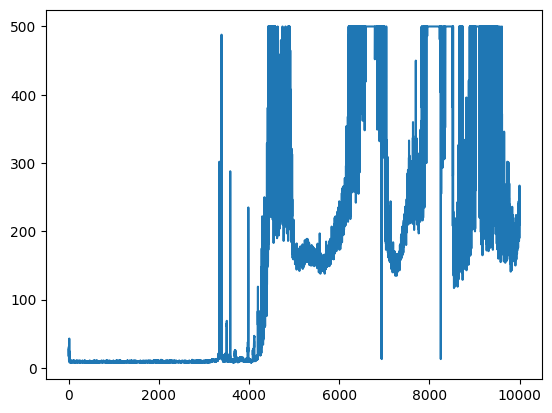

In [ ]:
Num_Treinamentos   = 0
### TREINAMENTO ###
while Num_Treinamentos < Quantidade_de_Treinamentos:
    ### VARIÁVEIS UTILIZADAS ###
    total_count        = 0
    total_episodes     = 0
    brake500           = 0
    indice_final       = 0
    mean_recomp_ep     = []
    indicesToIncrement = []
    Score_List         = []
    stop               = False
    Valor_Anterior     = None
    t0                 = time.time()
    MediaDos100        = deque(maxlen=100)
    indicesToIncrement = deque(maxlen=10_000)
    priorityIncrement = torch.full((len(indicesToIncrement),), 10)

    Estruturar_Agente(Estrutura_da_Rede      = [64,64],
                      Passos_para_Decaimento = 345,
                      Epsilon_Inicial        = 1,
                      Epsilon_Final          = 0.0001,
                      Num_Passos_Aleatorios  = 200,
                      Frames_por_Lote        = 500,
                      Num_Passos_Otimizacao  = 10,
                      Tamanho_Replay_Buffer  = 100_000,
                      Alpha                  = 0.6,
                      Beta                   = 1,
                      Taxa_Aprendizado       = 0.001,
                      Atualizacao_Rede_Alvo  = 0.99)

    for i, data in enumerate(collector):
        indices = rb.extend(data)

        for l, Valor_Atual in enumerate(data["next","step_count"]):
            if (Valor_Anterior is not None):
                if (Valor_Atual < Valor_Anterior):
                    total_episodes += 1
                    MediaDos100.append(Valor_Anterior.item())
                    Score_List.append(Valor_Anterior.item())
                    if ((total_episodes % 100) == 0) : mean_recomp_ep.append(sum(MediaDos100)/100)
                    if (Valor_Anterior.item() == 500): print("alcançou 500!!!!!!")

            Valor_Anterior = Valor_Atual

            if Valor_Atual == 499:
                ############## CONDIÇÕES DE PARADA ################
                brake500 += 1
                if Parada:
                    if brake500 >= Criterio_de_Parada: stop = not stop
                if Avaliacao_no_Treinamento:
                    Avalia_Agente(Num_avaliacoes=1000)
                    eval_score_mean = np.mean(mean_100_eval_score)
                    if eval_score_mean >= 495: stop = not stop
                ###################################################

                # ########################## MUDANÇA IMPLEMENTADA ########################
                # ########################################################################

        if ((total_episodes >= episodios) and (Parada == False)): break
        elif stop: break

        max_length = rb[:]["next", "step_count"].max()

        if len(rb) > init_rand_steps:
            for _ in range(optim_steps):
                sample, info = rb.sample(200, return_info=True)
                loss_vals = loss(sample)

                rb.update_priority(index=info["index"], priority=loss_vals["loss"])

                loss_vals["loss"].backward()
                optim.step()
                optim.zero_grad()
                exploration_module.step(data.numel())
                updater.step()

            torchrl_logger.info(f"Episodes: {total_episodes}, Max num steps: {max_length}, rb length {len(rb)}")
            total_count += data.numel()

    t1 = time.time()
    Avalia_Agente(Num_avaliacoes=1000)
    eval_score_mean = np.mean(mean_100_eval_score)
    Salvar_Dados(Pasta_de_Destino,
                 Num_do_Teste,
                 Score_List,
                 eval_score,
                 sucessos,
                 mean_recomp_ep, Versao)
    Num_Treinamentos += 1
    Num_do_Teste += 1
    torchrl_logger.info(f"solved after {total_count} steps, {total_episodes} episodes and in {t1-t0}s.")

In [ ]:
plt.plot(Score_List)
plt.show()

plt.plot(mean_recomp_ep)
plt.show()

plt.plot(eval_score)
plt.show()

plt.plot(Eval_Score_mean_list)
plt.show()

plt.plot(sucessos)
plt.show()

# Simulações V3

In [ ]:
### CONTROLE DO TREINAMENTO ###
episodios                  = 5_000
Num_do_Teste               = 1
Quantidade_de_Treinamentos = 3
Criterio_de_Parada         = 5
Parada                     = False
Avaliacao_no_Treinamento   = False
Log_Estatico_dos_Result    = True
Pasta_de_Destino           = "V4_test3"
Versao                     = "V4"

2024-06-03 10:37:24,888 [torchrl][INFO] Episodes: 280, Max num steps: 100, rb length 5500
2024-06-03 10:37:26,540 [torchrl][INFO] Episodes: 334, Max num steps: 100, rb length 6000
2024-06-03 10:37:28,434 [torchrl][INFO] Episodes: 387, Max num steps: 100, rb length 6500
2024-06-03 10:37:29,879 [torchrl][INFO] Episodes: 440, Max num steps: 100, rb length 7000
2024-06-03 10:37:30,997 [torchrl][INFO] Episodes: 471, Max num steps: 100, rb length 7500
2024-06-03 10:37:33,048 [torchrl][INFO] Episodes: 523, Max num steps: 100, rb length 8000
2024-06-03 10:37:34,168 [torchrl][INFO] Episodes: 575, Max num steps: 100, rb length 8500
2024-06-03 10:37:35,510 [torchrl][INFO] Episodes: 629, Max num steps: 100, rb length 9000
2024-06-03 10:37:36,685 [torchrl][INFO] Episodes: 637, Max num steps: 100, rb length 9500
2024-06-03 10:37:37,787 [torchrl][INFO] Episodes: 654, Max num steps: 108, rb length 10000
2024-06-03 10:37:38,902 [torchrl][INFO] Episodes: 658, Max num steps: 114, rb length 10500
2024-06-

alcançou 500!!!!!!


2024-06-03 10:38:40,335 [torchrl][INFO] Episodes: 878, Max num steps: 500, rb length 35000
2024-06-03 10:38:42,007 [torchrl][INFO] Episodes: 882, Max num steps: 500, rb length 35500
2024-06-03 10:38:43,536 [torchrl][INFO] Episodes: 886, Max num steps: 500, rb length 36000
2024-06-03 10:38:44,644 [torchrl][INFO] Episodes: 887, Max num steps: 500, rb length 36500
2024-06-03 10:38:45,923 [torchrl][INFO] Episodes: 892, Max num steps: 500, rb length 37000
2024-06-03 10:38:46,996 [torchrl][INFO] Episodes: 896, Max num steps: 500, rb length 37500
2024-06-03 10:38:48,081 [torchrl][INFO] Episodes: 899, Max num steps: 500, rb length 38000
2024-06-03 10:38:49,168 [torchrl][INFO] Episodes: 903, Max num steps: 500, rb length 38500
2024-06-03 10:38:50,253 [torchrl][INFO] Episodes: 906, Max num steps: 500, rb length 39000
2024-06-03 10:38:51,336 [torchrl][INFO] Episodes: 910, Max num steps: 500, rb length 39500
2024-06-03 10:38:52,439 [torchrl][INFO] Episodes: 913, Max num steps: 500, rb length 40000

alcançou 500!!!!!!


2024-06-03 10:46:30,046 [torchrl][INFO] Episodes: 2720, Max num steps: 500, rb length 100000
2024-06-03 10:46:31,161 [torchrl][INFO] Episodes: 2723, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:46:32,247 [torchrl][INFO] Episodes: 2725, Max num steps: 500, rb length 100000
2024-06-03 10:46:33,540 [torchrl][INFO] Episodes: 2729, Max num steps: 500, rb length 100000
2024-06-03 10:46:35,150 [torchrl][INFO] Episodes: 2730, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:46:36,828 [torchrl][INFO] Episodes: 2732, Max num steps: 500, rb length 100000
2024-06-03 10:46:38,132 [torchrl][INFO] Episodes: 2734, Max num steps: 500, rb length 100000
2024-06-03 10:46:39,203 [torchrl][INFO] Episodes: 2736, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:46:40,332 [torchrl][INFO] Episodes: 2737, Max num steps: 500, rb length 100000
2024-06-03 10:46:41,623 [torchrl][INFO] Episodes: 2739, Max num steps: 500, rb length 100000
2024-06-03 10:46:42,703 [torchrl][INFO] Episodes: 2740, Max num steps: 500, rb length 100000
2024-06-03 10:46:43,780 [torchrl][INFO] Episodes: 2743, Max num steps: 500, rb length 100000
2024-06-03 10:46:44,854 [torchrl][INFO] Episodes: 2746, Max num steps: 500, rb length 100000
2024-06-03 10:46:45,926 [torchrl][INFO] Episodes: 2749, Max num steps: 500, rb length 100000
2024-06-03 10:46:47,018 [torchrl][INFO] Episodes: 2750, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:46:48,885 [torchrl][INFO] Episodes: 2752, Max num steps: 500, rb length 100000
2024-06-03 10:46:51,330 [torchrl][INFO] Episodes: 2753, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:46:53,536 [torchrl][INFO] Episodes: 2754, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:46:55,074 [torchrl][INFO] Episodes: 2755, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:46:56,177 [torchrl][INFO] Episodes: 2759, Max num steps: 500, rb length 100000
2024-06-03 10:46:57,273 [torchrl][INFO] Episodes: 2762, Max num steps: 500, rb length 100000
2024-06-03 10:46:58,354 [torchrl][INFO] Episodes: 2763, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:46:59,476 [torchrl][INFO] Episodes: 2764, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:00,596 [torchrl][INFO] Episodes: 2768, Max num steps: 500, rb length 100000
2024-06-03 10:47:01,860 [torchrl][INFO] Episodes: 2772, Max num steps: 500, rb length 100000
2024-06-03 10:47:02,945 [torchrl][INFO] Episodes: 2776, Max num steps: 500, rb length 100000
2024-06-03 10:47:04,045 [torchrl][INFO] Episodes: 2779, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:05,321 [torchrl][INFO] Episodes: 2780, Max num steps: 500, rb length 100000
2024-06-03 10:47:06,896 [torchrl][INFO] Episodes: 2781, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:08,596 [torchrl][INFO] Episodes: 2786, Max num steps: 500, rb length 100000
2024-06-03 10:47:10,128 [torchrl][INFO] Episodes: 2790, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:11,224 [torchrl][INFO] Episodes: 2791, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:12,315 [torchrl][INFO] Episodes: 2792, Max num steps: 500, rb length 100000
2024-06-03 10:47:13,447 [torchrl][INFO] Episodes: 2794, Max num steps: 500, rb length 100000
2024-06-03 10:47:14,558 [torchrl][INFO] Episodes: 2798, Max num steps: 500, rb length 100000
2024-06-03 10:47:15,638 [torchrl][INFO] Episodes: 2802, Max num steps: 500, rb length 100000
2024-06-03 10:47:16,711 [torchrl][INFO] Episodes: 2805, Max num steps: 500, rb length 100000
2024-06-03 10:47:17,785 [torchrl][INFO] Episodes: 2806, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:18,884 [torchrl][INFO] Episodes: 2809, Max num steps: 500, rb length 100000
2024-06-03 10:47:20,156 [torchrl][INFO] Episodes: 2813, Max num steps: 500, rb length 100000
2024-06-03 10:47:21,748 [torchrl][INFO] Episodes: 2818, Max num steps: 500, rb length 100000
2024-06-03 10:47:23,630 [torchrl][INFO] Episodes: 2822, Max num steps: 500, rb length 100000
2024-06-03 10:47:25,133 [torchrl][INFO] Episodes: 2823, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:26,220 [torchrl][INFO] Episodes: 2824, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:27,303 [torchrl][INFO] Episodes: 2825, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:28,391 [torchrl][INFO] Episodes: 2826, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:29,489 [torchrl][INFO] Episodes: 2831, Max num steps: 500, rb length 100000
2024-06-03 10:47:30,641 [torchrl][INFO] Episodes: 2835, Max num steps: 500, rb length 100000
2024-06-03 10:47:31,759 [torchrl][INFO] Episodes: 2839, Max num steps: 500, rb length 100000
2024-06-03 10:47:32,842 [torchrl][INFO] Episodes: 2842, Max num steps: 500, rb length 100000
2024-06-03 10:47:33,946 [torchrl][INFO] Episodes: 2846, Max num steps: 500, rb length 100000
2024-06-03 10:47:35,186 [torchrl][INFO] Episodes: 2847, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:36,746 [torchrl][INFO] Episodes: 2851, Max num steps: 500, rb length 100000
2024-06-03 10:47:38,395 [torchrl][INFO] Episodes: 2855, Max num steps: 500, rb length 100000
2024-06-03 10:47:39,869 [torchrl][INFO] Episodes: 2859, Max num steps: 500, rb length 100000
2024-06-03 10:47:40,946 [torchrl][INFO] Episodes: 2864, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:42,045 [torchrl][INFO] Episodes: 2865, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:43,180 [torchrl][INFO] Episodes: 2866, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:44,508 [torchrl][INFO] Episodes: 2867, Max num steps: 500, rb length 100000
2024-06-03 10:47:45,674 [torchrl][INFO] Episodes: 2871, Max num steps: 500, rb length 100000
2024-06-03 10:47:46,804 [torchrl][INFO] Episodes: 2876, Max num steps: 500, rb length 100000
2024-06-03 10:47:47,902 [torchrl][INFO] Episodes: 2880, Max num steps: 500, rb length 100000
2024-06-03 10:47:48,971 [torchrl][INFO] Episodes: 2883, Max num steps: 500, rb length 100000
2024-06-03 10:47:50,360 [torchrl][INFO] Episodes: 2888, Max num steps: 500, rb length 100000
2024-06-03 10:47:51,921 [torchrl][INFO] Episodes: 2892, Max num steps: 500, rb length 100000
2024-06-03 10:47:53,734 [torchrl][INFO] Episodes: 2897, Max num steps: 500, rb length 100000
2024-06-03 10:47:54,927 [torchrl][INFO] Episodes: 2902, Max num steps: 500, rb length 100000
2024-06-03 10:47:56,016 [torchrl][INFO] Episodes: 2906, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:47:57,106 [torchrl][INFO] Episodes: 2907, Max num steps: 500, rb length 100000
2024-06-03 10:47:58,185 [torchrl][INFO] Episodes: 2910, Max num steps: 500, rb length 100000
2024-06-03 10:47:59,281 [torchrl][INFO] Episodes: 2914, Max num steps: 500, rb length 100000
2024-06-03 10:48:00,363 [torchrl][INFO] Episodes: 2918, Max num steps: 500, rb length 100000
2024-06-03 10:48:01,512 [torchrl][INFO] Episodes: 2923, Max num steps: 500, rb length 100000
2024-06-03 10:48:02,661 [torchrl][INFO] Episodes: 2927, Max num steps: 500, rb length 100000
2024-06-03 10:48:03,751 [torchrl][INFO] Episodes: 2933, Max num steps: 500, rb length 100000
2024-06-03 10:48:05,453 [torchrl][INFO] Episodes: 2937, Max num steps: 500, rb length 100000
2024-06-03 10:48:07,107 [torchrl][INFO] Episodes: 2941, Max num steps: 500, rb length 100000
2024-06-03 10:48:08,777 [torchrl][INFO] Episodes: 2945, Max num steps: 500, rb length 100000
2024-06-03 10:48:09,872 [torchrl][INFO] Episodes: 2950, Max num steps:

alcançou 500!!!!!!


2024-06-03 10:48:16,476 [torchrl][INFO] Episodes: 2973, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:17,580 [torchrl][INFO] Episodes: 2974, Max num steps: 500, rb length 100000
2024-06-03 10:48:18,655 [torchrl][INFO] Episodes: 2975, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:20,252 [torchrl][INFO] Episodes: 2977, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:21,869 [torchrl][INFO] Episodes: 2978, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:23,608 [torchrl][INFO] Episodes: 2979, Max num steps: 500, rb length 100000
2024-06-03 10:48:24,694 [torchrl][INFO] Episodes: 2984, Max num steps: 500, rb length 100000
2024-06-03 10:48:25,784 [torchrl][INFO] Episodes: 2986, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:27,041 [torchrl][INFO] Episodes: 2987, Max num steps: 500, rb length 100000
2024-06-03 10:48:28,133 [torchrl][INFO] Episodes: 2992, Max num steps: 500, rb length 100000
2024-06-03 10:48:29,226 [torchrl][INFO] Episodes: 2993, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:30,339 [torchrl][INFO] Episodes: 2994, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:31,454 [torchrl][INFO] Episodes: 2998, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:32,582 [torchrl][INFO] Episodes: 2999, Max num steps: 500, rb length 100000
2024-06-03 10:48:33,883 [torchrl][INFO] Episodes: 3003, Max num steps: 500, rb length 100000
2024-06-03 10:48:35,462 [torchrl][INFO] Episodes: 3009, Max num steps: 500, rb length 100000
2024-06-03 10:48:37,096 [torchrl][INFO] Episodes: 3011, Max num steps: 500, rb length 100000
2024-06-03 10:48:38,729 [torchrl][INFO] Episodes: 3015, Max num steps: 500, rb length 100000
2024-06-03 10:48:39,991 [torchrl][INFO] Episodes: 3016, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:41,079 [torchrl][INFO] Episodes: 3017, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:42,184 [torchrl][INFO] Episodes: 3018, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:43,293 [torchrl][INFO] Episodes: 3022, Max num steps: 500, rb length 100000
2024-06-03 10:48:44,396 [torchrl][INFO] Episodes: 3028, Max num steps: 500, rb length 100000
2024-06-03 10:48:45,568 [torchrl][INFO] Episodes: 3029, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:46,668 [torchrl][INFO] Episodes: 3033, Max num steps: 500, rb length 100000
2024-06-03 10:48:47,921 [torchrl][INFO] Episodes: 3036, Max num steps: 500, rb length 100000
2024-06-03 10:48:49,230 [torchrl][INFO] Episodes: 3040, Max num steps: 500, rb length 100000
2024-06-03 10:48:50,794 [torchrl][INFO] Episodes: 3049, Max num steps: 500, rb length 100000
2024-06-03 10:48:52,472 [torchrl][INFO] Episodes: 3055, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:48:53,973 [torchrl][INFO] Episodes: 3058, Max num steps: 500, rb length 100000
2024-06-03 10:48:55,065 [torchrl][INFO] Episodes: 3069, Max num steps: 500, rb length 100000
2024-06-03 10:48:56,148 [torchrl][INFO] Episodes: 3074, Max num steps: 500, rb length 100000
2024-06-03 10:48:57,266 [torchrl][INFO] Episodes: 3080, Max num steps: 500, rb length 100000
2024-06-03 10:48:58,365 [torchrl][INFO] Episodes: 3085, Max num steps: 500, rb length 100000
2024-06-03 10:48:59,493 [torchrl][INFO] Episodes: 3090, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:00,606 [torchrl][INFO] Episodes: 3091, Max num steps: 500, rb length 100000
2024-06-03 10:49:01,708 [torchrl][INFO] Episodes: 3093, Max num steps: 500, rb length 100000
2024-06-03 10:49:02,796 [torchrl][INFO] Episodes: 3097, Max num steps: 500, rb length 100000
2024-06-03 10:49:04,174 [torchrl][INFO] Episodes: 3101, Max num steps: 500, rb length 100000
2024-06-03 10:49:05,737 [torchrl][INFO] Episodes: 3107, Max num steps: 500, rb length 100000
2024-06-03 10:49:07,402 [torchrl][INFO] Episodes: 3110, Max num steps: 500, rb length 100000
2024-06-03 10:49:08,739 [torchrl][INFO] Episodes: 3114, Max num steps: 500, rb length 100000
2024-06-03 10:49:10,182 [torchrl][INFO] Episodes: 3118, Max num steps: 500, rb length 100000
2024-06-03 10:49:11,318 [torchrl][INFO] Episodes: 3124, Max num steps: 500, rb length 100000
2024-06-03 10:49:12,408 [torchrl][INFO] Episodes: 3128, Max num steps: 500, rb length 100000
2024-06-03 10:49:13,500 [torchrl][INFO] Episodes: 3132, Max num steps:

alcançou 500!!!!!!


2024-06-03 10:49:28,176 [torchrl][INFO] Episodes: 3180, Max num steps: 500, rb length 100000
2024-06-03 10:49:29,268 [torchrl][INFO] Episodes: 3184, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:30,533 [torchrl][INFO] Episodes: 3185, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:31,641 [torchrl][INFO] Episodes: 3186, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:32,928 [torchrl][INFO] Episodes: 3187, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:34,498 [torchrl][INFO] Episodes: 3188, Max num steps: 500, rb length 100000
2024-06-03 10:49:36,142 [torchrl][INFO] Episodes: 3192, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:37,673 [torchrl][INFO] Episodes: 3193, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:38,800 [torchrl][INFO] Episodes: 3194, Max num steps: 500, rb length 100000
2024-06-03 10:49:39,874 [torchrl][INFO] Episodes: 3195, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:40,965 [torchrl][INFO] Episodes: 3196, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:42,050 [torchrl][INFO] Episodes: 3200, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:43,140 [torchrl][INFO] Episodes: 3201, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:44,235 [torchrl][INFO] Episodes: 3202, Max num steps: 500, rb length 100000
2024-06-03 10:49:45,325 [torchrl][INFO] Episodes: 3203, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:46,423 [torchrl][INFO] Episodes: 3205, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:47,646 [torchrl][INFO] Episodes: 3206, Max num steps: 500, rb length 100000
2024-06-03 10:49:49,212 [torchrl][INFO] Episodes: 3211, Max num steps: 500, rb length 100000
2024-06-03 10:49:50,853 [torchrl][INFO] Episodes: 3217, Max num steps: 500, rb length 100000
2024-06-03 10:49:52,625 [torchrl][INFO] Episodes: 3220, Max num steps: 500, rb length 100000
2024-06-03 10:49:53,697 [torchrl][INFO] Episodes: 3225, Max num steps: 500, rb length 100000
2024-06-03 10:49:54,782 [torchrl][INFO] Episodes: 3227, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:55,865 [torchrl][INFO] Episodes: 3228, Max num steps: 500, rb length 100000
2024-06-03 10:49:56,960 [torchrl][INFO] Episodes: 3230, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:58,058 [torchrl][INFO] Episodes: 3231, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:49:59,183 [torchrl][INFO] Episodes: 3232, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:00,283 [torchrl][INFO] Episodes: 3233, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:01,421 [torchrl][INFO] Episodes: 3234, Max num steps: 500, rb length 100000
2024-06-03 10:50:02,634 [torchrl][INFO] Episodes: 3238, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:04,221 [torchrl][INFO] Episodes: 3239, Max num steps: 500, rb length 100000
2024-06-03 10:50:05,843 [torchrl][INFO] Episodes: 3240, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:07,488 [torchrl][INFO] Episodes: 3241, Max num steps: 500, rb length 100000
2024-06-03 10:50:08,584 [torchrl][INFO] Episodes: 3244, Max num steps: 500, rb length 100000
2024-06-03 10:50:09,690 [torchrl][INFO] Episodes: 3249, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:10,789 [torchrl][INFO] Episodes: 3250, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:11,874 [torchrl][INFO] Episodes: 3251, Max num steps: 500, rb length 100000
2024-06-03 10:50:13,112 [torchrl][INFO] Episodes: 3254, Max num steps: 500, rb length 100000
2024-06-03 10:50:14,197 [torchrl][INFO] Episodes: 3258, Max num steps: 500, rb length 100000
2024-06-03 10:50:15,270 [torchrl][INFO] Episodes: 3260, Max num steps: 500, rb length 100000
2024-06-03 10:50:16,377 [torchrl][INFO] Episodes: 3264, Max num steps: 500, rb length 100000
2024-06-03 10:50:17,501 [torchrl][INFO] Episodes: 3265, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:19,091 [torchrl][INFO] Episodes: 3266, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:20,683 [torchrl][INFO] Episodes: 3267, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:22,360 [torchrl][INFO] Episodes: 3268, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:23,447 [torchrl][INFO] Episodes: 3273, Max num steps: 500, rb length 100000
2024-06-03 10:50:24,523 [torchrl][INFO] Episodes: 3274, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:25,893 [torchrl][INFO] Episodes: 3276, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:27,458 [torchrl][INFO] Episodes: 3277, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:29,203 [torchrl][INFO] Episodes: 3278, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:30,626 [torchrl][INFO] Episodes: 3279, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:31,737 [torchrl][INFO] Episodes: 3280, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:33,221 [torchrl][INFO] Episodes: 3281, Max num steps: 500, rb length 100000
2024-06-03 10:50:34,761 [torchrl][INFO] Episodes: 3283, Max num steps: 500, rb length 100000
2024-06-03 10:50:36,668 [torchrl][INFO] Episodes: 3284, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:37,997 [torchrl][INFO] Episodes: 3285, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:39,083 [torchrl][INFO] Episodes: 3289, Max num steps: 500, rb length 100000
2024-06-03 10:50:40,161 [torchrl][INFO] Episodes: 3291, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:41,253 [torchrl][INFO] Episodes: 3292, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:42,351 [torchrl][INFO] Episodes: 3293, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:43,450 [torchrl][INFO] Episodes: 3294, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:44,537 [torchrl][INFO] Episodes: 3295, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:45,627 [torchrl][INFO] Episodes: 3296, Max num steps: 500, rb length 100000
2024-06-03 10:50:46,761 [torchrl][INFO] Episodes: 3298, Max num steps: 500, rb length 100000
2024-06-03 10:50:48,147 [torchrl][INFO] Episodes: 3301, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:49,724 [torchrl][INFO] Episodes: 3302, Max num steps: 500, rb length 100000
2024-06-03 10:50:51,406 [torchrl][INFO] Episodes: 3304, Max num steps: 500, rb length 100000
2024-06-03 10:50:52,803 [torchrl][INFO] Episodes: 3307, Max num steps: 500, rb length 100000
2024-06-03 10:50:53,881 [torchrl][INFO] Episodes: 3309, Max num steps: 500, rb length 100000
2024-06-03 10:50:54,957 [torchrl][INFO] Episodes: 3310, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:50:56,060 [torchrl][INFO] Episodes: 3312, Max num steps: 500, rb length 100000
2024-06-03 10:50:57,156 [torchrl][INFO] Episodes: 3333, Max num steps: 500, rb length 100000
2024-06-03 10:50:58,440 [torchrl][INFO] Episodes: 3338, Max num steps: 500, rb length 100000
2024-06-03 10:50:59,538 [torchrl][INFO] Episodes: 3344, Max num steps: 500, rb length 100000
2024-06-03 10:51:00,772 [torchrl][INFO] Episodes: 3349, Max num steps: 500, rb length 100000
2024-06-03 10:51:01,912 [torchrl][INFO] Episodes: 3350, Max num steps: 500, rb length 100000
2024-06-03 10:51:03,332 [torchrl][INFO] Episodes: 3351, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:04,875 [torchrl][INFO] Episodes: 3352, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:06,606 [torchrl][INFO] Episodes: 3353, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:07,957 [torchrl][INFO] Episodes: 3354, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:09,073 [torchrl][INFO] Episodes: 3355, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:10,168 [torchrl][INFO] Episodes: 3356, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:11,264 [torchrl][INFO] Episodes: 3357, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:12,359 [torchrl][INFO] Episodes: 3358, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:13,447 [torchrl][INFO] Episodes: 3359, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:14,535 [torchrl][INFO] Episodes: 3360, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:15,626 [torchrl][INFO] Episodes: 3361, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:16,717 [torchrl][INFO] Episodes: 3362, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:18,050 [torchrl][INFO] Episodes: 3364, Max num steps: 500, rb length 100000
2024-06-03 10:51:19,658 [torchrl][INFO] Episodes: 3365, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:21,565 [torchrl][INFO] Episodes: 3366, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:22,883 [torchrl][INFO] Episodes: 3367, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:23,973 [torchrl][INFO] Episodes: 3368, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:25,101 [torchrl][INFO] Episodes: 3370, Max num steps: 500, rb length 100000
2024-06-03 10:51:26,181 [torchrl][INFO] Episodes: 3374, Max num steps: 500, rb length 100000
2024-06-03 10:51:27,294 [torchrl][INFO] Episodes: 3379, Max num steps: 500, rb length 100000
2024-06-03 10:51:28,385 [torchrl][INFO] Episodes: 3383, Max num steps: 500, rb length 100000
2024-06-03 10:51:29,479 [torchrl][INFO] Episodes: 3386, Max num steps: 500, rb length 100000
2024-06-03 10:51:30,574 [torchrl][INFO] Episodes: 3387, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:31,680 [torchrl][INFO] Episodes: 3388, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:33,097 [torchrl][INFO] Episodes: 3392, Max num steps: 500, rb length 100000
2024-06-03 10:51:34,631 [torchrl][INFO] Episodes: 3393, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:36,365 [torchrl][INFO] Episodes: 3394, Max num steps: 500, rb length 100000
2024-06-03 10:51:37,955 [torchrl][INFO] Episodes: 3395, Max num steps: 500, rb length 100000
2024-06-03 10:51:39,028 [torchrl][INFO] Episodes: 3397, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:40,124 [torchrl][INFO] Episodes: 3398, Max num steps: 500, rb length 100000
2024-06-03 10:51:41,217 [torchrl][INFO] Episodes: 3400, Max num steps: 500, rb length 100000
2024-06-03 10:51:42,582 [torchrl][INFO] Episodes: 3404, Max num steps: 500, rb length 100000
2024-06-03 10:51:43,653 [torchrl][INFO] Episodes: 3407, Max num steps: 500, rb length 100000
2024-06-03 10:51:44,736 [torchrl][INFO] Episodes: 3410, Max num steps: 500, rb length 100000
2024-06-03 10:51:45,815 [torchrl][INFO] Episodes: 3412, Max num steps: 500, rb length 100000
2024-06-03 10:51:46,913 [torchrl][INFO] Episodes: 3413, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:48,489 [torchrl][INFO] Episodes: 3415, Max num steps: 500, rb length 100000
2024-06-03 10:51:50,107 [torchrl][INFO] Episodes: 3416, Max num steps: 500, rb length 100000
2024-06-03 10:51:51,690 [torchrl][INFO] Episodes: 3421, Max num steps: 500, rb length 100000
2024-06-03 10:51:52,781 [torchrl][INFO] Episodes: 3424, Max num steps: 500, rb length 100000
2024-06-03 10:51:53,865 [torchrl][INFO] Episodes: 3427, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:51:55,125 [torchrl][INFO] Episodes: 3428, Max num steps: 500, rb length 100000
2024-06-03 10:51:56,221 [torchrl][INFO] Episodes: 3432, Max num steps: 500, rb length 100000
2024-06-03 10:51:57,302 [torchrl][INFO] Episodes: 3437, Max num steps: 500, rb length 100000
2024-06-03 10:51:58,391 [torchrl][INFO] Episodes: 3442, Max num steps: 500, rb length 100000
2024-06-03 10:51:59,482 [torchrl][INFO] Episodes: 3447, Max num steps: 500, rb length 100000
2024-06-03 10:52:00,580 [torchrl][INFO] Episodes: 3451, Max num steps: 500, rb length 100000
2024-06-03 10:52:02,123 [torchrl][INFO] Episodes: 3455, Max num steps: 500, rb length 100000
2024-06-03 10:52:03,679 [torchrl][INFO] Episodes: 3458, Max num steps: 500, rb length 100000
2024-06-03 10:52:05,356 [torchrl][INFO] Episodes: 3462, Max num steps: 500, rb length 100000
2024-06-03 10:52:06,788 [torchrl][INFO] Episodes: 3467, Max num steps: 500, rb length 100000
2024-06-03 10:52:07,870 [torchrl][INFO] Episodes: 3471, Max num steps:

alcançou 500!!!!!!


2024-06-03 10:52:18,455 [torchrl][INFO] Episodes: 3504, Max num steps: 500, rb length 100000
2024-06-03 10:52:20,118 [torchrl][INFO] Episodes: 3508, Max num steps: 500, rb length 100000
2024-06-03 10:52:21,739 [torchrl][INFO] Episodes: 3513, Max num steps: 500, rb length 100000
2024-06-03 10:52:22,844 [torchrl][INFO] Episodes: 3514, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:52:24,170 [torchrl][INFO] Episodes: 3519, Max num steps: 500, rb length 100000
2024-06-03 10:52:25,246 [torchrl][INFO] Episodes: 3524, Max num steps: 500, rb length 100000
2024-06-03 10:52:26,332 [torchrl][INFO] Episodes: 3528, Max num steps: 500, rb length 100000
2024-06-03 10:52:27,430 [torchrl][INFO] Episodes: 3549, Max num steps: 500, rb length 100000
2024-06-03 10:52:28,515 [torchrl][INFO] Episodes: 3553, Max num steps: 500, rb length 100000
2024-06-03 10:52:29,610 [torchrl][INFO] Episodes: 3559, Max num steps: 500, rb length 100000
2024-06-03 10:52:30,680 [torchrl][INFO] Episodes: 3563, Max num steps: 500, rb length 100000
2024-06-03 10:52:32,023 [torchrl][INFO] Episodes: 3565, Max num steps: 500, rb length 100000
2024-06-03 10:52:33,602 [torchrl][INFO] Episodes: 3567, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:52:35,283 [torchrl][INFO] Episodes: 3570, Max num steps: 500, rb length 100000
2024-06-03 10:52:36,590 [torchrl][INFO] Episodes: 3575, Max num steps: 500, rb length 100000
2024-06-03 10:52:37,664 [torchrl][INFO] Episodes: 3578, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:52:38,758 [torchrl][INFO] Episodes: 3579, Max num steps: 500, rb length 100000
2024-06-03 10:52:39,839 [torchrl][INFO] Episodes: 3583, Max num steps: 500, rb length 100000
2024-06-03 10:52:40,914 [torchrl][INFO] Episodes: 3584, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:52:42,001 [torchrl][INFO] Episodes: 3587, Max num steps: 500, rb length 100000
2024-06-03 10:52:43,082 [torchrl][INFO] Episodes: 3592, Max num steps: 500, rb length 100000
2024-06-03 10:52:44,328 [torchrl][INFO] Episodes: 3597, Max num steps: 500, rb length 100000
2024-06-03 10:52:45,410 [torchrl][INFO] Episodes: 3601, Max num steps: 500, rb length 100000
2024-06-03 10:52:46,834 [torchrl][INFO] Episodes: 3605, Max num steps: 500, rb length 100000
2024-06-03 10:52:48,407 [torchrl][INFO] Episodes: 3609, Max num steps: 500, rb length 100000
2024-06-03 10:52:50,118 [torchrl][INFO] Episodes: 3613, Max num steps: 500, rb length 100000
2024-06-03 10:52:51,370 [torchrl][INFO] Episodes: 3614, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:52:52,518 [torchrl][INFO] Episodes: 3618, Max num steps: 500, rb length 100000
2024-06-03 10:52:53,614 [torchrl][INFO] Episodes: 3622, Max num steps: 500, rb length 100000
2024-06-03 10:52:54,710 [torchrl][INFO] Episodes: 3626, Max num steps: 500, rb length 100000
2024-06-03 10:52:55,788 [torchrl][INFO] Episodes: 3630, Max num steps: 500, rb length 100000
2024-06-03 10:52:56,876 [torchrl][INFO] Episodes: 3635, Max num steps: 500, rb length 100000
2024-06-03 10:52:57,963 [torchrl][INFO] Episodes: 3639, Max num steps: 500, rb length 100000
2024-06-03 10:52:59,057 [torchrl][INFO] Episodes: 3643, Max num steps: 500, rb length 100000
2024-06-03 10:53:00,137 [torchrl][INFO] Episodes: 3647, Max num steps: 500, rb length 100000
2024-06-03 10:53:01,581 [torchrl][INFO] Episodes: 3651, Max num steps: 500, rb length 100000
2024-06-03 10:53:03,163 [torchrl][INFO] Episodes: 3654, Max num steps: 500, rb length 100000
2024-06-03 10:53:05,100 [torchrl][INFO] Episodes: 3659, Max num steps:

alcançou 500!!!!!!


2024-06-03 10:53:30,326 [torchrl][INFO] Episodes: 3752, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:53:31,846 [torchrl][INFO] Episodes: 3753, Max num steps: 500, rb length 100000
2024-06-03 10:53:33,399 [torchrl][INFO] Episodes: 3757, Max num steps: 500, rb length 100000
2024-06-03 10:53:35,139 [torchrl][INFO] Episodes: 3762, Max num steps: 500, rb length 100000
2024-06-03 10:53:36,457 [torchrl][INFO] Episodes: 3767, Max num steps: 500, rb length 100000
2024-06-03 10:53:37,539 [torchrl][INFO] Episodes: 3772, Max num steps: 500, rb length 100000
2024-06-03 10:53:38,615 [torchrl][INFO] Episodes: 3777, Max num steps: 500, rb length 100000
2024-06-03 10:53:39,695 [torchrl][INFO] Episodes: 3782, Max num steps: 500, rb length 100000
2024-06-03 10:53:40,771 [torchrl][INFO] Episodes: 3787, Max num steps: 500, rb length 100000
2024-06-03 10:53:41,848 [torchrl][INFO] Episodes: 3790, Max num steps: 500, rb length 100000
2024-06-03 10:53:42,917 [torchrl][INFO] Episodes: 3795, Max num steps: 500, rb length 100000
2024-06-03 10:53:44,185 [torchrl][INFO] Episodes: 3799, Max num steps:

alcançou 500!!!!!!


2024-06-03 10:53:55,826 [torchrl][INFO] Episodes: 3834, Max num steps: 500, rb length 100000
2024-06-03 10:53:56,984 [torchrl][INFO] Episodes: 3837, Max num steps: 500, rb length 100000
2024-06-03 10:53:58,069 [torchrl][INFO] Episodes: 3838, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:53:59,167 [torchrl][INFO] Episodes: 3842, Max num steps: 500, rb length 100000
2024-06-03 10:54:00,245 [torchrl][INFO] Episodes: 3846, Max num steps: 500, rb length 100000
2024-06-03 10:54:01,686 [torchrl][INFO] Episodes: 3851, Max num steps: 500, rb length 100000
2024-06-03 10:54:03,232 [torchrl][INFO] Episodes: 3854, Max num steps: 500, rb length 100000
2024-06-03 10:54:05,147 [torchrl][INFO] Episodes: 3858, Max num steps: 500, rb length 100000
2024-06-03 10:54:06,464 [torchrl][INFO] Episodes: 3863, Max num steps: 500, rb length 100000
2024-06-03 10:54:07,565 [torchrl][INFO] Episodes: 3868, Max num steps: 500, rb length 100000
2024-06-03 10:54:08,659 [torchrl][INFO] Episodes: 3873, Max num steps: 500, rb length 100000
2024-06-03 10:54:09,735 [torchrl][INFO] Episodes: 3874, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:54:10,828 [torchrl][INFO] Episodes: 3879, Max num steps: 500, rb length 100000
2024-06-03 10:54:11,919 [torchrl][INFO] Episodes: 3884, Max num steps: 500, rb length 100000
2024-06-03 10:54:13,011 [torchrl][INFO] Episodes: 3887, Max num steps: 500, rb length 100000
2024-06-03 10:54:14,089 [torchrl][INFO] Episodes: 3891, Max num steps: 500, rb length 100000
2024-06-03 10:54:15,163 [torchrl][INFO] Episodes: 3893, Max num steps: 500, rb length 100000
2024-06-03 10:54:16,521 [torchrl][INFO] Episodes: 3898, Max num steps: 500, rb length 100000
2024-06-03 10:54:18,093 [torchrl][INFO] Episodes: 3904, Max num steps: 500, rb length 100000
2024-06-03 10:54:19,792 [torchrl][INFO] Episodes: 3909, Max num steps: 500, rb length 100000
2024-06-03 10:54:21,065 [torchrl][INFO] Episodes: 3914, Max num steps: 500, rb length 100000
2024-06-03 10:54:22,145 [torchrl][INFO] Episodes: 3920, Max num steps: 500, rb length 100000
2024-06-03 10:54:23,230 [torchrl][INFO] Episodes: 3926, Max num steps:

alcançou 500!!!!!!


2024-06-03 10:54:37,217 [torchrl][INFO] Episodes: 3979, Max num steps: 500, rb length 100000
2024-06-03 10:54:38,316 [torchrl][INFO] Episodes: 3984, Max num steps: 500, rb length 100000
2024-06-03 10:54:39,389 [torchrl][INFO] Episodes: 3990, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:54:40,479 [torchrl][INFO] Episodes: 3991, Max num steps: 500, rb length 100000
2024-06-03 10:54:41,571 [torchrl][INFO] Episodes: 3993, Max num steps: 500, rb length 100000
2024-06-03 10:54:42,643 [torchrl][INFO] Episodes: 3998, Max num steps: 500, rb length 100000
2024-06-03 10:54:43,729 [torchrl][INFO] Episodes: 4003, Max num steps: 500, rb length 100000
2024-06-03 10:54:44,815 [torchrl][INFO] Episodes: 4008, Max num steps: 500, rb length 100000
2024-06-03 10:54:46,143 [torchrl][INFO] Episodes: 4014, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:54:47,927 [torchrl][INFO] Episodes: 4015, Max num steps: 500, rb length 100000
2024-06-03 10:54:49,661 [torchrl][INFO] Episodes: 4019, Max num steps: 500, rb length 100000
2024-06-03 10:54:50,946 [torchrl][INFO] Episodes: 4024, Max num steps: 500, rb length 100000
2024-06-03 10:54:52,035 [torchrl][INFO] Episodes: 4029, Max num steps: 500, rb length 100000
2024-06-03 10:54:53,131 [torchrl][INFO] Episodes: 4033, Max num steps: 500, rb length 100000
2024-06-03 10:54:54,214 [torchrl][INFO] Episodes: 4039, Max num steps: 500, rb length 100000
2024-06-03 10:54:55,303 [torchrl][INFO] Episodes: 4043, Max num steps: 500, rb length 100000
2024-06-03 10:54:56,790 [torchrl][INFO] Episodes: 4049, Max num steps: 500, rb length 100000
2024-06-03 10:54:58,346 [torchrl][INFO] Episodes: 4051, Max num steps: 500, rb length 100000
2024-06-03 10:55:00,061 [torchrl][INFO] Episodes: 4056, Max num steps: 500, rb length 100000
2024-06-03 10:55:01,872 [torchrl][INFO] Episodes: 4061, Max num steps:

alcançou 500!!!!!!


2024-06-03 10:55:29,103 [torchrl][INFO] Episodes: 4164, Max num steps: 500, rb length 100000
2024-06-03 10:55:30,203 [torchrl][INFO] Episodes: 4168, Max num steps: 500, rb length 100000
2024-06-03 10:55:31,694 [torchrl][INFO] Episodes: 4172, Max num steps: 500, rb length 100000
2024-06-03 10:55:33,264 [torchrl][INFO] Episodes: 4174, Max num steps: 500, rb length 100000
2024-06-03 10:55:35,232 [torchrl][INFO] Episodes: 4179, Max num steps: 500, rb length 100000
2024-06-03 10:55:36,460 [torchrl][INFO] Episodes: 4181, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:55:37,559 [torchrl][INFO] Episodes: 4182, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:55:38,671 [torchrl][INFO] Episodes: 4183, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:55:39,961 [torchrl][INFO] Episodes: 4184, Max num steps: 500, rb length 100000
2024-06-03 10:55:41,058 [torchrl][INFO] Episodes: 4187, Max num steps: 500, rb length 100000
2024-06-03 10:55:42,157 [torchrl][INFO] Episodes: 4192, Max num steps: 500, rb length 100000
2024-06-03 10:55:43,249 [torchrl][INFO] Episodes: 4196, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:55:44,347 [torchrl][INFO] Episodes: 4197, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:55:45,538 [torchrl][INFO] Episodes: 4198, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:55:47,141 [torchrl][INFO] Episodes: 4199, Max num steps: 500, rb length 100000
2024-06-03 10:55:48,764 [torchrl][INFO] Episodes: 4203, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:55:50,455 [torchrl][INFO] Episodes: 4204, Max num steps: 500, rb length 100000
2024-06-03 10:55:51,565 [torchrl][INFO] Episodes: 4209, Max num steps: 500, rb length 100000
2024-06-03 10:55:52,716 [torchrl][INFO] Episodes: 4214, Max num steps: 500, rb length 100000
2024-06-03 10:55:53,799 [torchrl][INFO] Episodes: 4215, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:55:54,908 [torchrl][INFO] Episodes: 4219, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:55:55,992 [torchrl][INFO] Episodes: 4220, Max num steps: 500, rb length 100000
2024-06-03 10:55:57,287 [torchrl][INFO] Episodes: 4222, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:55:58,370 [torchrl][INFO] Episodes: 4223, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:55:59,531 [torchrl][INFO] Episodes: 4224, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:00,839 [torchrl][INFO] Episodes: 4225, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:02,424 [torchrl][INFO] Episodes: 4226, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:04,158 [torchrl][INFO] Episodes: 4227, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:05,576 [torchrl][INFO] Episodes: 4228, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:06,677 [torchrl][INFO] Episodes: 4230, Max num steps: 500, rb length 100000
2024-06-03 10:56:07,771 [torchrl][INFO] Episodes: 4231, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:08,866 [torchrl][INFO] Episodes: 4232, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:09,990 [torchrl][INFO] Episodes: 4233, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:11,104 [torchrl][INFO] Episodes: 4234, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:12,238 [torchrl][INFO] Episodes: 4240, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:13,343 [torchrl][INFO] Episodes: 4241, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:14,484 [torchrl][INFO] Episodes: 4242, Max num steps: 500, rb length 100000
2024-06-03 10:56:15,987 [torchrl][INFO] Episodes: 4243, Max num steps: 500, rb length 100000
2024-06-03 10:56:17,567 [torchrl][INFO] Episodes: 4248, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:19,547 [torchrl][INFO] Episodes: 4249, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:20,731 [torchrl][INFO] Episodes: 4250, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:21,824 [torchrl][INFO] Episodes: 4251, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:22,921 [torchrl][INFO] Episodes: 4252, Max num steps: 500, rb length 100000
2024-06-03 10:56:24,004 [torchrl][INFO] Episodes: 4257, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:25,109 [torchrl][INFO] Episodes: 4258, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:26,204 [torchrl][INFO] Episodes: 4259, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:27,297 [torchrl][INFO] Episodes: 4260, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:28,395 [torchrl][INFO] Episodes: 4261, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:29,527 [torchrl][INFO] Episodes: 4262, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:31,049 [torchrl][INFO] Episodes: 4263, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:32,657 [torchrl][INFO] Episodes: 4264, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:34,433 [torchrl][INFO] Episodes: 4265, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:35,523 [torchrl][INFO] Episodes: 4266, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:36,623 [torchrl][INFO] Episodes: 4267, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:37,724 [torchrl][INFO] Episodes: 4268, Max num steps: 500, rb length 100000
2024-06-03 10:56:39,005 [torchrl][INFO] Episodes: 4272, Max num steps: 500, rb length 100000
2024-06-03 10:56:40,087 [torchrl][INFO] Episodes: 4273, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:41,183 [torchrl][INFO] Episodes: 4274, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:42,271 [torchrl][INFO] Episodes: 4275, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:43,402 [torchrl][INFO] Episodes: 4276, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:44,664 [torchrl][INFO] Episodes: 4277, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:46,237 [torchrl][INFO] Episodes: 4278, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:47,924 [torchrl][INFO] Episodes: 4279, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:49,378 [torchrl][INFO] Episodes: 4280, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:50,472 [torchrl][INFO] Episodes: 4281, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:51,560 [torchrl][INFO] Episodes: 4282, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:52,684 [torchrl][INFO] Episodes: 4283, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:53,795 [torchrl][INFO] Episodes: 4284, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:54,881 [torchrl][INFO] Episodes: 4285, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:55,973 [torchrl][INFO] Episodes: 4286, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:57,364 [torchrl][INFO] Episodes: 4287, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:56:58,818 [torchrl][INFO] Episodes: 4288, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:01,223 [torchrl][INFO] Episodes: 4289, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:03,992 [torchrl][INFO] Episodes: 4290, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:05,810 [torchrl][INFO] Episodes: 4291, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:06,941 [torchrl][INFO] Episodes: 4292, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:08,068 [torchrl][INFO] Episodes: 4293, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:09,169 [torchrl][INFO] Episodes: 4294, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:10,270 [torchrl][INFO] Episodes: 4295, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:11,349 [torchrl][INFO] Episodes: 4296, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:12,430 [torchrl][INFO] Episodes: 4297, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:13,636 [torchrl][INFO] Episodes: 4298, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:14,749 [torchrl][INFO] Episodes: 4299, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:15,957 [torchrl][INFO] Episodes: 4300, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:17,546 [torchrl][INFO] Episodes: 4301, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:19,211 [torchrl][INFO] Episodes: 4302, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:20,929 [torchrl][INFO] Episodes: 4303, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:22,167 [torchrl][INFO] Episodes: 4304, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:23,262 [torchrl][INFO] Episodes: 4305, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:24,388 [torchrl][INFO] Episodes: 4306, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:25,495 [torchrl][INFO] Episodes: 4307, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:26,578 [torchrl][INFO] Episodes: 4308, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:27,689 [torchrl][INFO] Episodes: 4309, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:28,776 [torchrl][INFO] Episodes: 4310, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:29,883 [torchrl][INFO] Episodes: 4312, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:31,198 [torchrl][INFO] Episodes: 4313, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:32,763 [torchrl][INFO] Episodes: 4314, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:34,452 [torchrl][INFO] Episodes: 4315, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:35,820 [torchrl][INFO] Episodes: 4316, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:36,960 [torchrl][INFO] Episodes: 4317, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:38,055 [torchrl][INFO] Episodes: 4318, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:39,157 [torchrl][INFO] Episodes: 4319, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:40,244 [torchrl][INFO] Episodes: 4320, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:41,336 [torchrl][INFO] Episodes: 4321, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:42,429 [torchrl][INFO] Episodes: 4322, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:43,707 [torchrl][INFO] Episodes: 4323, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:44,809 [torchrl][INFO] Episodes: 4324, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:46,309 [torchrl][INFO] Episodes: 4325, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:47,910 [torchrl][INFO] Episodes: 4326, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:49,686 [torchrl][INFO] Episodes: 4327, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:50,768 [torchrl][INFO] Episodes: 4328, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:51,872 [torchrl][INFO] Episodes: 4329, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:52,975 [torchrl][INFO] Episodes: 4330, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:54,108 [torchrl][INFO] Episodes: 4331, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:55,193 [torchrl][INFO] Episodes: 4332, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:56,286 [torchrl][INFO] Episodes: 4333, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:57,391 [torchrl][INFO] Episodes: 4334, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:58,494 [torchrl][INFO] Episodes: 4335, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:57:59,625 [torchrl][INFO] Episodes: 4336, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:01,233 [torchrl][INFO] Episodes: 4337, Max num steps: 500, rb length 100000
2024-06-03 10:58:02,850 [torchrl][INFO] Episodes: 4338, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:04,553 [torchrl][INFO] Episodes: 4340, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:05,907 [torchrl][INFO] Episodes: 4341, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:07,039 [torchrl][INFO] Episodes: 4342, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:08,148 [torchrl][INFO] Episodes: 4343, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:09,249 [torchrl][INFO] Episodes: 4344, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:10,337 [torchrl][INFO] Episodes: 4345, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:11,435 [torchrl][INFO] Episodes: 4346, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:12,525 [torchrl][INFO] Episodes: 4347, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:13,621 [torchrl][INFO] Episodes: 4348, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:14,875 [torchrl][INFO] Episodes: 4349, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:16,529 [torchrl][INFO] Episodes: 4350, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:18,192 [torchrl][INFO] Episodes: 4351, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:19,550 [torchrl][INFO] Episodes: 4352, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:20,641 [torchrl][INFO] Episodes: 4353, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:21,737 [torchrl][INFO] Episodes: 4354, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:22,829 [torchrl][INFO] Episodes: 4355, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:23,915 [torchrl][INFO] Episodes: 4357, Max num steps: 500, rb length 100000
2024-06-03 10:58:24,999 [torchrl][INFO] Episodes: 4362, Max num steps: 500, rb length 100000
2024-06-03 10:58:26,116 [torchrl][INFO] Episodes: 4364, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:27,416 [torchrl][INFO] Episodes: 4366, Max num steps: 500, rb length 100000
2024-06-03 10:58:28,562 [torchrl][INFO] Episodes: 4373, Max num steps: 500, rb length 100000
2024-06-03 10:58:30,040 [torchrl][INFO] Episodes: 4376, Max num steps: 500, rb length 100000
2024-06-03 10:58:31,624 [torchrl][INFO] Episodes: 4380, Max num steps: 500, rb length 100000
2024-06-03 10:58:33,337 [torchrl][INFO] Episodes: 4381, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:34,551 [torchrl][INFO] Episodes: 4385, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:35,653 [torchrl][INFO] Episodes: 4386, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:36,753 [torchrl][INFO] Episodes: 4387, Max num steps: 500, rb length 100000
2024-06-03 10:58:37,856 [torchrl][INFO] Episodes: 4391, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:38,963 [torchrl][INFO] Episodes: 4392, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:40,057 [torchrl][INFO] Episodes: 4393, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:41,178 [torchrl][INFO] Episodes: 4394, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:42,348 [torchrl][INFO] Episodes: 4395, Max num steps: 500, rb length 100000
2024-06-03 10:58:43,446 [torchrl][INFO] Episodes: 4396, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:45,013 [torchrl][INFO] Episodes: 4397, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:46,654 [torchrl][INFO] Episodes: 4398, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:48,478 [torchrl][INFO] Episodes: 4399, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:49,578 [torchrl][INFO] Episodes: 4400, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:50,677 [torchrl][INFO] Episodes: 4401, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:51,813 [torchrl][INFO] Episodes: 4410, Max num steps: 500, rb length 100000
2024-06-03 10:58:52,894 [torchrl][INFO] Episodes: 4411, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:53,990 [torchrl][INFO] Episodes: 4412, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:55,143 [torchrl][INFO] Episodes: 4413, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:56,234 [torchrl][INFO] Episodes: 4414, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:58:57,362 [torchrl][INFO] Episodes: 4420, Max num steps: 500, rb length 100000
2024-06-03 10:58:58,609 [torchrl][INFO] Episodes: 4425, Max num steps: 500, rb length 100000
2024-06-03 10:59:00,169 [torchrl][INFO] Episodes: 4426, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:01,792 [torchrl][INFO] Episodes: 4428, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:03,427 [torchrl][INFO] Episodes: 4429, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:04,511 [torchrl][INFO] Episodes: 4430, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:05,631 [torchrl][INFO] Episodes: 4434, Max num steps: 500, rb length 100000
2024-06-03 10:59:06,704 [torchrl][INFO] Episodes: 4436, Max num steps: 500, rb length 100000
2024-06-03 10:59:07,779 [torchrl][INFO] Episodes: 4437, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:09,064 [torchrl][INFO] Episodes: 4438, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:10,161 [torchrl][INFO] Episodes: 4439, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:11,259 [torchrl][INFO] Episodes: 4440, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:12,439 [torchrl][INFO] Episodes: 4441, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:13,696 [torchrl][INFO] Episodes: 4442, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:15,297 [torchrl][INFO] Episodes: 4443, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:16,951 [torchrl][INFO] Episodes: 4444, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:18,378 [torchrl][INFO] Episodes: 4449, Max num steps: 500, rb length 100000
2024-06-03 10:59:19,480 [torchrl][INFO] Episodes: 4456, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:20,594 [torchrl][INFO] Episodes: 4457, Max num steps: 500, rb length 100000
2024-06-03 10:59:21,678 [torchrl][INFO] Episodes: 4462, Max num steps: 500, rb length 100000
2024-06-03 10:59:22,760 [torchrl][INFO] Episodes: 4467, Max num steps: 500, rb length 100000
2024-06-03 10:59:23,871 [torchrl][INFO] Episodes: 4472, Max num steps: 500, rb length 100000
2024-06-03 10:59:24,958 [torchrl][INFO] Episodes: 4477, Max num steps: 500, rb length 100000
2024-06-03 10:59:26,034 [torchrl][INFO] Episodes: 4481, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:27,133 [torchrl][INFO] Episodes: 4486, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 10:59:28,702 [torchrl][INFO] Episodes: 4487, Max num steps: 500, rb length 100000
2024-06-03 10:59:30,286 [torchrl][INFO] Episodes: 4491, Max num steps: 500, rb length 100000
2024-06-03 10:59:32,001 [torchrl][INFO] Episodes: 4496, Max num steps: 500, rb length 100000
2024-06-03 10:59:33,445 [torchrl][INFO] Episodes: 4501, Max num steps: 500, rb length 100000
2024-06-03 10:59:34,535 [torchrl][INFO] Episodes: 4506, Max num steps: 500, rb length 100000
2024-06-03 10:59:35,625 [torchrl][INFO] Episodes: 4511, Max num steps: 500, rb length 100000
2024-06-03 10:59:36,705 [torchrl][INFO] Episodes: 4516, Max num steps: 500, rb length 100000
2024-06-03 10:59:37,912 [torchrl][INFO] Episodes: 4522, Max num steps: 500, rb length 100000
2024-06-03 10:59:39,535 [torchrl][INFO] Episodes: 4527, Max num steps: 500, rb length 100000
2024-06-03 10:59:41,197 [torchrl][INFO] Episodes: 4532, Max num steps: 500, rb length 100000
2024-06-03 10:59:42,659 [torchrl][INFO] Episodes: 4537, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:00:07,092 [torchrl][INFO] Episodes: 4622, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:00:08,203 [torchrl][INFO] Episodes: 4623, Max num steps: 500, rb length 100000
2024-06-03 11:00:09,285 [torchrl][INFO] Episodes: 4624, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:00:10,378 [torchrl][INFO] Episodes: 4625, Max num steps: 500, rb length 100000
2024-06-03 11:00:11,482 [torchrl][INFO] Episodes: 4629, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:00:12,798 [torchrl][INFO] Episodes: 4630, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:00:14,375 [torchrl][INFO] Episodes: 4631, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:00:16,034 [torchrl][INFO] Episodes: 4632, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:00:17,624 [torchrl][INFO] Episodes: 4633, Max num steps: 500, rb length 100000
2024-06-03 11:00:18,712 [torchrl][INFO] Episodes: 4637, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:00:19,837 [torchrl][INFO] Episodes: 4638, Max num steps: 500, rb length 100000
2024-06-03 11:00:20,918 [torchrl][INFO] Episodes: 4640, Max num steps: 500, rb length 100000
2024-06-03 11:00:22,001 [torchrl][INFO] Episodes: 4645, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:00:23,107 [torchrl][INFO] Episodes: 4646, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:00:24,214 [torchrl][INFO] Episodes: 4647, Max num steps: 500, rb length 100000
2024-06-03 11:00:25,294 [torchrl][INFO] Episodes: 4649, Max num steps: 500, rb length 100000
2024-06-03 11:00:26,387 [torchrl][INFO] Episodes: 4654, Max num steps: 500, rb length 100000
2024-06-03 11:00:27,589 [torchrl][INFO] Episodes: 4655, Max num steps: 500, rb length 100000
2024-06-03 11:00:29,183 [torchrl][INFO] Episodes: 4656, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:00:30,932 [torchrl][INFO] Episodes: 4658, Max num steps: 500, rb length 100000
2024-06-03 11:00:32,513 [torchrl][INFO] Episodes: 4663, Max num steps: 500, rb length 100000
2024-06-03 11:00:33,645 [torchrl][INFO] Episodes: 4668, Max num steps: 500, rb length 100000
2024-06-03 11:00:34,733 [torchrl][INFO] Episodes: 4673, Max num steps: 500, rb length 100000
2024-06-03 11:00:35,813 [torchrl][INFO] Episodes: 4676, Max num steps: 500, rb length 100000
2024-06-03 11:00:36,963 [torchrl][INFO] Episodes: 4678, Max num steps: 500, rb length 100000
2024-06-03 11:00:38,214 [torchrl][INFO] Episodes: 4680, Max num steps: 500, rb length 100000
2024-06-03 11:00:39,297 [torchrl][INFO] Episodes: 4681, Max num steps: 500, rb length 100000
2024-06-03 11:00:40,429 [torchrl][INFO] Episodes: 4682, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:00:41,527 [torchrl][INFO] Episodes: 4683, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:00:42,837 [torchrl][INFO] Episodes: 4689, Max num steps: 500, rb length 100000
2024-06-03 11:00:44,409 [torchrl][INFO] Episodes: 4694, Max num steps: 500, rb length 100000
2024-06-03 11:00:46,098 [torchrl][INFO] Episodes: 4699, Max num steps: 500, rb length 100000
2024-06-03 11:00:47,625 [torchrl][INFO] Episodes: 4704, Max num steps: 500, rb length 100000
2024-06-03 11:00:48,754 [torchrl][INFO] Episodes: 4710, Max num steps: 500, rb length 100000
2024-06-03 11:00:49,851 [torchrl][INFO] Episodes: 4713, Max num steps: 500, rb length 100000
2024-06-03 11:00:50,945 [torchrl][INFO] Episodes: 4717, Max num steps: 500, rb length 100000
2024-06-03 11:00:52,021 [torchrl][INFO] Episodes: 4722, Max num steps: 500, rb length 100000
2024-06-03 11:00:53,129 [torchrl][INFO] Episodes: 4727, Max num steps: 500, rb length 100000
2024-06-03 11:00:54,245 [torchrl][INFO] Episodes: 4732, Max num steps: 500, rb length 100000
2024-06-03 11:00:55,330 [torchrl][INFO] Episodes: 4737, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:01:06,013 [torchrl][INFO] Episodes: 4772, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:01:07,113 [torchrl][INFO] Episodes: 4774, Max num steps: 500, rb length 100000
2024-06-03 11:01:08,194 [torchrl][INFO] Episodes: 4776, Max num steps: 500, rb length 100000
2024-06-03 11:01:09,283 [torchrl][INFO] Episodes: 4778, Max num steps: 500, rb length 100000
2024-06-03 11:01:10,362 [torchrl][INFO] Episodes: 4783, Max num steps: 500, rb length 100000
2024-06-03 11:01:11,443 [torchrl][INFO] Episodes: 4788, Max num steps: 500, rb length 100000
2024-06-03 11:01:12,665 [torchrl][INFO] Episodes: 4793, Max num steps: 500, rb length 100000
2024-06-03 11:01:14,250 [torchrl][INFO] Episodes: 4799, Max num steps: 500, rb length 100000
2024-06-03 11:01:15,915 [torchrl][INFO] Episodes: 4802, Max num steps: 500, rb length 100000
2024-06-03 11:01:17,339 [torchrl][INFO] Episodes: 4807, Max num steps: 500, rb length 100000
2024-06-03 11:01:18,470 [torchrl][INFO] Episodes: 4810, Max num steps: 500, rb length 100000
2024-06-03 11:01:19,559 [torchrl][INFO] Episodes: 4812, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:01:51,674 [torchrl][INFO] Episodes: 4899, Max num steps: 500, rb length 100000
2024-06-03 11:01:52,772 [torchrl][INFO] Episodes: 4903, Max num steps: 500, rb length 100000
2024-06-03 11:01:53,931 [torchrl][INFO] Episodes: 4904, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:01:55,030 [torchrl][INFO] Episodes: 4906, Max num steps: 500, rb length 100000
2024-06-03 11:01:56,450 [torchrl][INFO] Episodes: 4911, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:01:58,041 [torchrl][INFO] Episodes: 4912, Max num steps: 500, rb length 100000
2024-06-03 11:01:59,850 [torchrl][INFO] Episodes: 4914, Max num steps: 500, rb length 100000
2024-06-03 11:02:01,098 [torchrl][INFO] Episodes: 4918, Max num steps: 500, rb length 100000
2024-06-03 11:02:02,245 [torchrl][INFO] Episodes: 4919, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:03,374 [torchrl][INFO] Episodes: 4924, Max num steps: 500, rb length 100000
2024-06-03 11:02:04,632 [torchrl][INFO] Episodes: 4929, Max num steps: 500, rb length 100000
2024-06-03 11:02:05,717 [torchrl][INFO] Episodes: 4931, Max num steps: 500, rb length 100000
2024-06-03 11:02:06,805 [torchrl][INFO] Episodes: 4933, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:07,922 [torchrl][INFO] Episodes: 4934, Max num steps: 500, rb length 100000
2024-06-03 11:02:08,997 [torchrl][INFO] Episodes: 4938, Max num steps: 500, rb length 100000
2024-06-03 11:02:10,081 [torchrl][INFO] Episodes: 4939, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:11,766 [torchrl][INFO] Episodes: 4943, Max num steps: 500, rb length 100000
2024-06-03 11:02:13,388 [torchrl][INFO] Episodes: 4948, Max num steps: 500, rb length 100000
2024-06-03 11:02:14,908 [torchrl][INFO] Episodes: 4952, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:16,013 [torchrl][INFO] Episodes: 4953, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:17,107 [torchrl][INFO] Episodes: 4954, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:18,213 [torchrl][INFO] Episodes: 4955, Max num steps: 500, rb length 100000
2024-06-03 11:02:19,319 [torchrl][INFO] Episodes: 4960, Max num steps: 500, rb length 100000
2024-06-03 11:02:20,392 [torchrl][INFO] Episodes: 4963, Max num steps: 500, rb length 100000
2024-06-03 11:02:21,484 [torchrl][INFO] Episodes: 4968, Max num steps: 500, rb length 100000
2024-06-03 11:02:22,581 [torchrl][INFO] Episodes: 4972, Max num steps: 500, rb length 100000
2024-06-03 11:02:23,678 [torchrl][INFO] Episodes: 4976, Max num steps: 500, rb length 100000
2024-06-03 11:02:24,880 [torchrl][INFO] Episodes: 4980, Max num steps: 500, rb length 100000
2024-06-03 11:02:26,643 [torchrl][INFO] Episodes: 4984, Max num steps: 500, rb length 100000
2024-06-03 11:02:28,285 [torchrl][INFO] Episodes: 4988, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:29,831 [torchrl][INFO] Episodes: 4989, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:30,929 [torchrl][INFO] Episodes: 4990, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:32,061 [torchrl][INFO] Episodes: 4991, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:33,158 [torchrl][INFO] Episodes: 4992, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:34,285 [torchrl][INFO] Episodes: 4993, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:35,380 [torchrl][INFO] Episodes: 4994, Max num steps: 500, rb length 100000
2024-06-03 11:02:36,466 [torchrl][INFO] Episodes: 4995, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:37,554 [torchrl][INFO] Episodes: 4997, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:38,674 [torchrl][INFO] Episodes: 4998, Max num steps: 500, rb length 100000
2024-06-03 11:02:39,894 [torchrl][INFO] Episodes: 5002, Max num steps: 500, rb length 100000
2024-06-03 11:02:41,637 [torchrl][INFO] Episodes: 5003, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:43,309 [torchrl][INFO] Episodes: 5004, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:44,703 [torchrl][INFO] Episodes: 5005, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:45,803 [torchrl][INFO] Episodes: 5008, Max num steps: 500, rb length 100000
2024-06-03 11:02:46,919 [torchrl][INFO] Episodes: 5012, Max num steps: 500, rb length 100000
2024-06-03 11:02:48,003 [torchrl][INFO] Episodes: 5015, Max num steps: 500, rb length 100000
2024-06-03 11:02:49,121 [torchrl][INFO] Episodes: 5018, Max num steps: 500, rb length 100000
2024-06-03 11:02:50,422 [torchrl][INFO] Episodes: 5019, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:51,531 [torchrl][INFO] Episodes: 5024, Max num steps: 500, rb length 100000
2024-06-03 11:02:52,618 [torchrl][INFO] Episodes: 5026, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:02:53,720 [torchrl][INFO] Episodes: 5028, Max num steps: 500, rb length 100000
2024-06-03 11:02:55,140 [torchrl][INFO] Episodes: 5030, Max num steps: 500, rb length 100000
2024-06-03 11:02:56,685 [torchrl][INFO] Episodes: 5033, Max num steps: 500, rb length 100000
2024-06-03 11:02:58,436 [torchrl][INFO] Episodes: 5035, Max num steps: 500, rb length 100000
2024-06-03 11:02:59,805 [torchrl][INFO] Episodes: 5038, Max num steps: 500, rb length 100000
2024-06-03 11:03:00,913 [torchrl][INFO] Episodes: 5041, Max num steps: 500, rb length 100000
2024-06-03 11:03:02,001 [torchrl][INFO] Episodes: 5044, Max num steps: 500, rb length 100000
2024-06-03 11:03:03,081 [torchrl][INFO] Episodes: 5047, Max num steps: 500, rb length 100000
2024-06-03 11:03:04,192 [torchrl][INFO] Episodes: 5051, Max num steps: 500, rb length 100000
2024-06-03 11:03:05,269 [torchrl][INFO] Episodes: 5053, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:03:06,385 [torchrl][INFO] Episodes: 5054, Max num steps: 500, rb length 100000
2024-06-03 11:03:07,518 [torchrl][INFO] Episodes: 5055, Max num steps: 500, rb length 100000
2024-06-03 11:03:08,761 [torchrl][INFO] Episodes: 5059, Max num steps: 500, rb length 100000
2024-06-03 11:03:10,214 [torchrl][INFO] Episodes: 5062, Max num steps: 500, rb length 100000
2024-06-03 11:03:11,756 [torchrl][INFO] Episodes: 5064, Max num steps: 500, rb length 100000
2024-06-03 11:03:13,457 [torchrl][INFO] Episodes: 5065, Max num steps: 500, rb length 100000
2024-06-03 11:03:14,711 [torchrl][INFO] Episodes: 5067, Max num steps: 500, rb length 100000
2024-06-03 11:03:15,805 [torchrl][INFO] Episodes: 5070, Max num steps: 500, rb length 100000
2024-06-03 11:03:16,899 [torchrl][INFO] Episodes: 5081, Max num steps: 500, rb length 100000
2024-06-03 11:03:17,998 [torchrl][INFO] Episodes: 5084, Max num steps: 500, rb length 100000
2024-06-03 11:03:19,080 [torchrl][INFO] Episodes: 5087, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:03:33,229 [torchrl][INFO] Episodes: 5125, Max num steps: 500, rb length 100000
2024-06-03 11:03:34,347 [torchrl][INFO] Episodes: 5127, Max num steps: 500, rb length 100000
2024-06-03 11:03:35,436 [torchrl][INFO] Episodes: 5129, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:03:36,536 [torchrl][INFO] Episodes: 5130, Max num steps: 500, rb length 100000
2024-06-03 11:03:37,636 [torchrl][INFO] Episodes: 5132, Max num steps: 500, rb length 100000
2024-06-03 11:03:38,746 [torchrl][INFO] Episodes: 5135, Max num steps: 500, rb length 100000
2024-06-03 11:03:40,285 [torchrl][INFO] Episodes: 5138, Max num steps: 500, rb length 100000
2024-06-03 11:03:41,883 [torchrl][INFO] Episodes: 5139, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:03:43,483 [torchrl][INFO] Episodes: 5142, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:03:44,580 [torchrl][INFO] Episodes: 5143, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:03:45,683 [torchrl][INFO] Episodes: 5144, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:03:46,778 [torchrl][INFO] Episodes: 5145, Max num steps: 500, rb length 100000
2024-06-03 11:03:48,033 [torchrl][INFO] Episodes: 5151, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:03:49,122 [torchrl][INFO] Episodes: 5152, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:03:50,261 [torchrl][INFO] Episodes: 5153, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:03:51,369 [torchrl][INFO] Episodes: 5154, Max num steps: 500, rb length 100000
2024-06-03 11:03:52,460 [torchrl][INFO] Episodes: 5156, Max num steps: 500, rb length 100000
2024-06-03 11:03:53,724 [torchrl][INFO] Episodes: 5157, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:03:55,305 [torchrl][INFO] Episodes: 5158, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:03:57,016 [torchrl][INFO] Episodes: 5159, Max num steps: 500, rb length 100000
2024-06-03 11:03:58,482 [torchrl][INFO] Episodes: 5160, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:03:59,590 [torchrl][INFO] Episodes: 5161, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:00,698 [torchrl][INFO] Episodes: 5162, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:01,811 [torchrl][INFO] Episodes: 5163, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:02,932 [torchrl][INFO] Episodes: 5167, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:04,050 [torchrl][INFO] Episodes: 5169, Max num steps: 500, rb length 100000
2024-06-03 11:04:05,133 [torchrl][INFO] Episodes: 5170, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:06,308 [torchrl][INFO] Episodes: 5171, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:07,451 [torchrl][INFO] Episodes: 5174, Max num steps: 500, rb length 100000
2024-06-03 11:04:09,214 [torchrl][INFO] Episodes: 5175, Max num steps: 500, rb length 100000
2024-06-03 11:04:11,078 [torchrl][INFO] Episodes: 5176, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:13,263 [torchrl][INFO] Episodes: 5195, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:15,364 [torchrl][INFO] Episodes: 5197, Max num steps: 500, rb length 100000
2024-06-03 11:04:17,031 [torchrl][INFO] Episodes: 5198, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:18,143 [torchrl][INFO] Episodes: 5213, Max num steps: 500, rb length 100000
2024-06-03 11:04:19,233 [torchrl][INFO] Episodes: 5220, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:20,342 [torchrl][INFO] Episodes: 5221, Max num steps: 500, rb length 100000
2024-06-03 11:04:21,439 [torchrl][INFO] Episodes: 5233, Max num steps: 500, rb length 100000
2024-06-03 11:04:22,547 [torchrl][INFO] Episodes: 5234, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:23,760 [torchrl][INFO] Episodes: 5235, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:24,860 [torchrl][INFO] Episodes: 5236, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:25,971 [torchrl][INFO] Episodes: 5237, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:27,400 [torchrl][INFO] Episodes: 5238, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:29,021 [torchrl][INFO] Episodes: 5239, Max num steps: 500, rb length 100000
2024-06-03 11:04:30,754 [torchrl][INFO] Episodes: 5242, Max num steps: 500, rb length 100000
2024-06-03 11:04:31,988 [torchrl][INFO] Episodes: 5244, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:33,254 [torchrl][INFO] Episodes: 5245, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:34,367 [torchrl][INFO] Episodes: 5246, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:35,482 [torchrl][INFO] Episodes: 5247, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:36,567 [torchrl][INFO] Episodes: 5248, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:37,668 [torchrl][INFO] Episodes: 5249, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:38,761 [torchrl][INFO] Episodes: 5250, Max num steps: 500, rb length 100000
2024-06-03 11:04:39,852 [torchrl][INFO] Episodes: 5254, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:40,943 [torchrl][INFO] Episodes: 5255, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:42,444 [torchrl][INFO] Episodes: 5256, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:44,072 [torchrl][INFO] Episodes: 5257, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:45,778 [torchrl][INFO] Episodes: 5258, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:47,072 [torchrl][INFO] Episodes: 5259, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:48,281 [torchrl][INFO] Episodes: 5260, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:49,383 [torchrl][INFO] Episodes: 5261, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:50,473 [torchrl][INFO] Episodes: 5262, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:51,570 [torchrl][INFO] Episodes: 5263, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:52,676 [torchrl][INFO] Episodes: 5264, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:53,947 [torchrl][INFO] Episodes: 5265, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:55,048 [torchrl][INFO] Episodes: 5266, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:56,130 [torchrl][INFO] Episodes: 5267, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:04:57,691 [torchrl][INFO] Episodes: 5268, Max num steps: 500, rb length 100000
2024-06-03 11:04:59,299 [torchrl][INFO] Episodes: 5270, Max num steps: 500, rb length 100000
2024-06-03 11:05:00,989 [torchrl][INFO] Episodes: 5271, Max num steps: 500, rb length 100000
2024-06-03 11:05:02,197 [torchrl][INFO] Episodes: 5272, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:03,299 [torchrl][INFO] Episodes: 5276, Max num steps: 500, rb length 100000
2024-06-03 11:05:04,416 [torchrl][INFO] Episodes: 5280, Max num steps: 500, rb length 100000
2024-06-03 11:05:05,506 [torchrl][INFO] Episodes: 5294, Max num steps: 500, rb length 100000
2024-06-03 11:05:06,607 [torchrl][INFO] Episodes: 5299, Max num steps: 500, rb length 100000
2024-06-03 11:05:07,696 [torchrl][INFO] Episodes: 5300, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:08,796 [torchrl][INFO] Episodes: 5303, Max num steps: 500, rb length 100000
2024-06-03 11:05:09,997 [torchrl][INFO] Episodes: 5310, Max num steps: 500, rb length 100000
2024-06-03 11:05:11,085 [torchrl][INFO] Episodes: 5312, Max num steps: 500, rb length 100000
2024-06-03 11:05:12,598 [torchrl][INFO] Episodes: 5318, Max num steps: 500, rb length 100000
2024-06-03 11:05:14,223 [torchrl][INFO] Episodes: 5322, Max num steps: 500, rb length 100000
2024-06-03 11:05:15,895 [torchrl][INFO] Episodes: 5328, Max num steps: 500, rb length 100000
2024-06-03 11:05:17,200 [torchrl][INFO] Episodes: 5332, Max num steps: 500, rb length 100000
2024-06-03 11:05:18,464 [torchrl][INFO] Episodes: 5336, Max num steps: 500, rb length 100000
2024-06-03 11:05:19,552 [torchrl][INFO] Episodes: 5340, Max num steps: 500, rb length 100000
2024-06-03 11:05:20,651 [torchrl][INFO] Episodes: 5341, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:21,750 [torchrl][INFO] Episodes: 5343, Max num steps: 500, rb length 100000
2024-06-03 11:05:22,838 [torchrl][INFO] Episodes: 5345, Max num steps: 500, rb length 100000
2024-06-03 11:05:23,923 [torchrl][INFO] Episodes: 5346, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:25,023 [torchrl][INFO] Episodes: 5347, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:26,119 [torchrl][INFO] Episodes: 5349, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:27,670 [torchrl][INFO] Episodes: 5350, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:29,273 [torchrl][INFO] Episodes: 5351, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:30,965 [torchrl][INFO] Episodes: 5352, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:32,063 [torchrl][INFO] Episodes: 5353, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:33,221 [torchrl][INFO] Episodes: 5354, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:34,348 [torchrl][INFO] Episodes: 5355, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:35,450 [torchrl][INFO] Episodes: 5356, Max num steps: 500, rb length 100000
2024-06-03 11:05:36,695 [torchrl][INFO] Episodes: 5361, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:37,796 [torchrl][INFO] Episodes: 5362, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:38,911 [torchrl][INFO] Episodes: 5363, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:40,000 [torchrl][INFO] Episodes: 5364, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:41,230 [torchrl][INFO] Episodes: 5365, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:42,813 [torchrl][INFO] Episodes: 5366, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:44,469 [torchrl][INFO] Episodes: 5367, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:46,092 [torchrl][INFO] Episodes: 5368, Max num steps: 500, rb length 100000
2024-06-03 11:05:47,183 [torchrl][INFO] Episodes: 5373, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:48,294 [torchrl][INFO] Episodes: 5374, Max num steps: 500, rb length 100000
2024-06-03 11:05:49,388 [torchrl][INFO] Episodes: 5378, Max num steps: 500, rb length 100000
2024-06-03 11:05:50,478 [torchrl][INFO] Episodes: 5383, Max num steps: 500, rb length 100000
2024-06-03 11:05:51,595 [torchrl][INFO] Episodes: 5388, Max num steps: 500, rb length 100000
2024-06-03 11:05:52,688 [torchrl][INFO] Episodes: 5393, Max num steps: 500, rb length 100000
2024-06-03 11:05:53,769 [torchrl][INFO] Episodes: 5394, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:54,859 [torchrl][INFO] Episodes: 5395, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:55,957 [torchrl][INFO] Episodes: 5396, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:57,764 [torchrl][INFO] Episodes: 5397, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:05:59,419 [torchrl][INFO] Episodes: 5398, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:00,966 [torchrl][INFO] Episodes: 5399, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:02,066 [torchrl][INFO] Episodes: 5402, Max num steps: 500, rb length 100000
2024-06-03 11:06:03,175 [torchrl][INFO] Episodes: 5403, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:04,302 [torchrl][INFO] Episodes: 5404, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:05,394 [torchrl][INFO] Episodes: 5405, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:06,497 [torchrl][INFO] Episodes: 5410, Max num steps: 500, rb length 100000
2024-06-03 11:06:07,591 [torchrl][INFO] Episodes: 5411, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:08,688 [torchrl][INFO] Episodes: 5417, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:09,778 [torchrl][INFO] Episodes: 5418, Max num steps: 500, rb length 100000
2024-06-03 11:06:10,993 [torchrl][INFO] Episodes: 5423, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:12,577 [torchrl][INFO] Episodes: 5424, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:14,216 [torchrl][INFO] Episodes: 5425, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:15,889 [torchrl][INFO] Episodes: 5426, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:17,047 [torchrl][INFO] Episodes: 5427, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:18,163 [torchrl][INFO] Episodes: 5428, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:19,260 [torchrl][INFO] Episodes: 5429, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:20,522 [torchrl][INFO] Episodes: 5430, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:21,624 [torchrl][INFO] Episodes: 5431, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:22,717 [torchrl][INFO] Episodes: 5432, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:23,814 [torchrl][INFO] Episodes: 5433, Max num steps: 500, rb length 100000
2024-06-03 11:06:24,895 [torchrl][INFO] Episodes: 5438, Max num steps: 500, rb length 100000
2024-06-03 11:06:26,117 [torchrl][INFO] Episodes: 5442, Max num steps: 500, rb length 100000
2024-06-03 11:06:27,697 [torchrl][INFO] Episodes: 5447, Max num steps: 500, rb length 100000
2024-06-03 11:06:29,380 [torchrl][INFO] Episodes: 5448, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:31,016 [torchrl][INFO] Episodes: 5449, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:32,127 [torchrl][INFO] Episodes: 5450, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:33,233 [torchrl][INFO] Episodes: 5455, Max num steps: 500, rb length 100000
2024-06-03 11:06:34,364 [torchrl][INFO] Episodes: 5461, Max num steps: 500, rb length 100000
2024-06-03 11:06:35,534 [torchrl][INFO] Episodes: 5462, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:36,633 [torchrl][INFO] Episodes: 5467, Max num steps: 500, rb length 100000
2024-06-03 11:06:37,723 [torchrl][INFO] Episodes: 5468, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:38,826 [torchrl][INFO] Episodes: 5470, Max num steps: 500, rb length 100000
2024-06-03 11:06:40,087 [torchrl][INFO] Episodes: 5476, Max num steps: 500, rb length 100000
2024-06-03 11:06:41,426 [torchrl][INFO] Episodes: 5481, Max num steps: 500, rb length 100000
2024-06-03 11:06:42,998 [torchrl][INFO] Episodes: 5482, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:44,704 [torchrl][INFO] Episodes: 5483, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:46,060 [torchrl][INFO] Episodes: 5488, Max num steps: 500, rb length 100000
2024-06-03 11:06:47,192 [torchrl][INFO] Episodes: 5494, Max num steps: 500, rb length 100000
2024-06-03 11:06:48,351 [torchrl][INFO] Episodes: 5495, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:49,471 [torchrl][INFO] Episodes: 5501, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:50,563 [torchrl][INFO] Episodes: 5502, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:06:51,652 [torchrl][INFO] Episodes: 5503, Max num steps: 500, rb length 100000
2024-06-03 11:06:52,743 [torchrl][INFO] Episodes: 5509, Max num steps: 500, rb length 100000
2024-06-03 11:06:53,819 [torchrl][INFO] Episodes: 5510, Max num steps: 500, rb length 100000
2024-06-03 11:06:55,063 [torchrl][INFO] Episodes: 5516, Max num steps: 500, rb length 100000
2024-06-03 11:06:56,560 [torchrl][INFO] Episodes: 5522, Max num steps: 500, rb length 100000
2024-06-03 11:06:58,146 [torchrl][INFO] Episodes: 5524, Max num steps: 500, rb length 100000
2024-06-03 11:06:59,930 [torchrl][INFO] Episodes: 5525, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:01,196 [torchrl][INFO] Episodes: 5531, Max num steps: 500, rb length 100000
2024-06-03 11:07:02,276 [torchrl][INFO] Episodes: 5533, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:03,377 [torchrl][INFO] Episodes: 5535, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:04,529 [torchrl][INFO] Episodes: 5536, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:05,621 [torchrl][INFO] Episodes: 5537, Max num steps: 500, rb length 100000
2024-06-03 11:07:06,717 [torchrl][INFO] Episodes: 5539, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:08,034 [torchrl][INFO] Episodes: 5540, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:09,399 [torchrl][INFO] Episodes: 5541, Max num steps: 500, rb length 100000
2024-06-03 11:07:11,591 [torchrl][INFO] Episodes: 5542, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:14,046 [torchrl][INFO] Episodes: 5543, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:16,240 [torchrl][INFO] Episodes: 5544, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:17,671 [torchrl][INFO] Episodes: 5545, Max num steps: 500, rb length 100000
2024-06-03 11:07:18,757 [torchrl][INFO] Episodes: 5546, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:19,863 [torchrl][INFO] Episodes: 5547, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:20,978 [torchrl][INFO] Episodes: 5548, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:22,090 [torchrl][INFO] Episodes: 5549, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:23,197 [torchrl][INFO] Episodes: 5550, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:24,477 [torchrl][INFO] Episodes: 5551, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:25,581 [torchrl][INFO] Episodes: 5552, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:26,664 [torchrl][INFO] Episodes: 5553, Max num steps: 500, rb length 100000
2024-06-03 11:07:28,168 [torchrl][INFO] Episodes: 5556, Max num steps: 500, rb length 100000
2024-06-03 11:07:29,704 [torchrl][INFO] Episodes: 5559, Max num steps: 500, rb length 100000
2024-06-03 11:07:31,528 [torchrl][INFO] Episodes: 5565, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:32,866 [torchrl][INFO] Episodes: 5566, Max num steps: 500, rb length 100000
2024-06-03 11:07:33,953 [torchrl][INFO] Episodes: 5568, Max num steps: 500, rb length 100000
2024-06-03 11:07:35,075 [torchrl][INFO] Episodes: 5569, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:36,187 [torchrl][INFO] Episodes: 5570, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:37,289 [torchrl][INFO] Episodes: 5571, Max num steps: 500, rb length 100000
2024-06-03 11:07:38,400 [torchrl][INFO] Episodes: 5574, Max num steps: 500, rb length 100000
2024-06-03 11:07:39,498 [torchrl][INFO] Episodes: 5577, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:40,625 [torchrl][INFO] Episodes: 5578, Max num steps: 500, rb length 100000
2024-06-03 11:07:41,713 [torchrl][INFO] Episodes: 5583, Max num steps: 500, rb length 100000
2024-06-03 11:07:43,096 [torchrl][INFO] Episodes: 5585, Max num steps: 500, rb length 100000
2024-06-03 11:07:44,788 [torchrl][INFO] Episodes: 5587, Max num steps: 500, rb length 100000
2024-06-03 11:07:46,511 [torchrl][INFO] Episodes: 5590, Max num steps: 500, rb length 100000
2024-06-03 11:07:47,880 [torchrl][INFO] Episodes: 5594, Max num steps: 500, rb length 100000
2024-06-03 11:07:49,142 [torchrl][INFO] Episodes: 5597, Max num steps: 500, rb length 100000
2024-06-03 11:07:50,223 [torchrl][INFO] Episodes: 5598, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:51,333 [torchrl][INFO] Episodes: 5600, Max num steps: 500, rb length 100000
2024-06-03 11:07:52,444 [torchrl][INFO] Episodes: 5603, Max num steps: 500, rb length 100000
2024-06-03 11:07:53,532 [torchrl][INFO] Episodes: 5607, Max num steps: 500, rb length 100000
2024-06-03 11:07:54,628 [torchrl][INFO] Episodes: 5610, Max num steps: 500, rb length 100000
2024-06-03 11:07:55,801 [torchrl][INFO] Episodes: 5612, Max num steps: 500, rb length 100000
2024-06-03 11:07:56,881 [torchrl][INFO] Episodes: 5614, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:07:58,446 [torchrl][INFO] Episodes: 5615, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:00,090 [torchrl][INFO] Episodes: 5616, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:01,954 [torchrl][INFO] Episodes: 5617, Max num steps: 500, rb length 100000
2024-06-03 11:08:03,088 [torchrl][INFO] Episodes: 5619, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:04,209 [torchrl][INFO] Episodes: 5620, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:05,336 [torchrl][INFO] Episodes: 5621, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:06,501 [torchrl][INFO] Episodes: 5622, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:07,608 [torchrl][INFO] Episodes: 5623, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:08,873 [torchrl][INFO] Episodes: 5625, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:09,968 [torchrl][INFO] Episodes: 5626, Max num steps: 500, rb length 100000
2024-06-03 11:08:11,042 [torchrl][INFO] Episodes: 5627, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:12,382 [torchrl][INFO] Episodes: 5628, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:13,971 [torchrl][INFO] Episodes: 5630, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:15,623 [torchrl][INFO] Episodes: 5631, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:17,070 [torchrl][INFO] Episodes: 5632, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:18,203 [torchrl][INFO] Episodes: 5633, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:19,308 [torchrl][INFO] Episodes: 5634, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:20,435 [torchrl][INFO] Episodes: 5635, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:21,535 [torchrl][INFO] Episodes: 5636, Max num steps: 500, rb length 100000
2024-06-03 11:08:22,633 [torchrl][INFO] Episodes: 5638, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:23,739 [torchrl][INFO] Episodes: 5639, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:24,836 [torchrl][INFO] Episodes: 5640, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:25,942 [torchrl][INFO] Episodes: 5641, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:27,300 [torchrl][INFO] Episodes: 5642, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:29,156 [torchrl][INFO] Episodes: 5643, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:30,962 [torchrl][INFO] Episodes: 5644, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:32,205 [torchrl][INFO] Episodes: 5645, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:33,303 [torchrl][INFO] Episodes: 5646, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:34,401 [torchrl][INFO] Episodes: 5647, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:35,533 [torchrl][INFO] Episodes: 5648, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:36,655 [torchrl][INFO] Episodes: 5649, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:37,756 [torchrl][INFO] Episodes: 5650, Max num steps: 500, rb length 100000
2024-06-03 11:08:39,100 [torchrl][INFO] Episodes: 5653, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:40,858 [torchrl][INFO] Episodes: 5654, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:42,806 [torchrl][INFO] Episodes: 5655, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:44,715 [torchrl][INFO] Episodes: 5656, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:46,399 [torchrl][INFO] Episodes: 5657, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:48,129 [torchrl][INFO] Episodes: 5658, Max num steps: 500, rb length 100000
2024-06-03 11:08:49,240 [torchrl][INFO] Episodes: 5659, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:50,341 [torchrl][INFO] Episodes: 5661, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:51,624 [torchrl][INFO] Episodes: 5662, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:52,722 [torchrl][INFO] Episodes: 5663, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:53,847 [torchrl][INFO] Episodes: 5664, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:54,957 [torchrl][INFO] Episodes: 5665, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:56,061 [torchrl][INFO] Episodes: 5666, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:57,173 [torchrl][INFO] Episodes: 5667, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:58,319 [torchrl][INFO] Episodes: 5668, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:08:59,922 [torchrl][INFO] Episodes: 5669, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:01,619 [torchrl][INFO] Episodes: 5671, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:03,148 [torchrl][INFO] Episodes: 5672, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:04,255 [torchrl][INFO] Episodes: 5673, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:05,385 [torchrl][INFO] Episodes: 5674, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:06,505 [torchrl][INFO] Episodes: 5675, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:07,625 [torchrl][INFO] Episodes: 5676, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:08,729 [torchrl][INFO] Episodes: 5677, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:09,821 [torchrl][INFO] Episodes: 5678, Max num steps: 500, rb length 100000
2024-06-03 11:09:11,101 [torchrl][INFO] Episodes: 5679, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:12,409 [torchrl][INFO] Episodes: 5680, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:13,995 [torchrl][INFO] Episodes: 5681, Max num steps: 500, rb length 100000
2024-06-03 11:09:15,629 [torchrl][INFO] Episodes: 5685, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:17,364 [torchrl][INFO] Episodes: 5686, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:18,581 [torchrl][INFO] Episodes: 5687, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:19,687 [torchrl][INFO] Episodes: 5688, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:20,788 [torchrl][INFO] Episodes: 5689, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:21,891 [torchrl][INFO] Episodes: 5690, Max num steps: 500, rb length 100000
2024-06-03 11:09:23,015 [torchrl][INFO] Episodes: 5693, Max num steps: 500, rb length 100000
2024-06-03 11:09:24,190 [torchrl][INFO] Episodes: 5694, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:25,283 [torchrl][INFO] Episodes: 5695, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:26,471 [torchrl][INFO] Episodes: 5696, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:27,581 [torchrl][INFO] Episodes: 5697, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:29,193 [torchrl][INFO] Episodes: 5698, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:30,991 [torchrl][INFO] Episodes: 5699, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:32,750 [torchrl][INFO] Episodes: 5700, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:33,845 [torchrl][INFO] Episodes: 5701, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:34,994 [torchrl][INFO] Episodes: 5702, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:36,275 [torchrl][INFO] Episodes: 5706, Max num steps: 500, rb length 100000
2024-06-03 11:09:37,384 [torchrl][INFO] Episodes: 5711, Max num steps: 500, rb length 100000
2024-06-03 11:09:38,474 [torchrl][INFO] Episodes: 5712, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:39,574 [torchrl][INFO] Episodes: 5714, Max num steps: 500, rb length 100000
2024-06-03 11:09:40,691 [torchrl][INFO] Episodes: 5719, Max num steps: 500, rb length 100000
2024-06-03 11:09:41,909 [torchrl][INFO] Episodes: 5720, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:43,196 [torchrl][INFO] Episodes: 5725, Max num steps: 500, rb length 100000
2024-06-03 11:09:44,765 [torchrl][INFO] Episodes: 5729, Max num steps: 500, rb length 100000
2024-06-03 11:09:46,462 [torchrl][INFO] Episodes: 5734, Max num steps: 500, rb length 100000
2024-06-03 11:09:48,030 [torchrl][INFO] Episodes: 5737, Max num steps: 500, rb length 100000
2024-06-03 11:09:49,115 [torchrl][INFO] Episodes: 5742, Max num steps: 500, rb length 100000
2024-06-03 11:09:50,194 [torchrl][INFO] Episodes: 5745, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:09:51,296 [torchrl][INFO] Episodes: 5747, Max num steps: 500, rb length 100000
2024-06-03 11:09:52,415 [torchrl][INFO] Episodes: 5751, Max num steps: 500, rb length 100000
2024-06-03 11:09:53,499 [torchrl][INFO] Episodes: 5755, Max num steps: 500, rb length 100000
2024-06-03 11:09:54,581 [torchrl][INFO] Episodes: 5759, Max num steps: 500, rb length 100000
2024-06-03 11:09:55,677 [torchrl][INFO] Episodes: 5762, Max num steps: 500, rb length 100000
2024-06-03 11:09:56,773 [torchrl][INFO] Episodes: 5765, Max num steps: 500, rb length 100000
2024-06-03 11:09:58,201 [torchrl][INFO] Episodes: 5770, Max num steps: 500, rb length 100000
2024-06-03 11:09:59,740 [torchrl][INFO] Episodes: 5771, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:10:01,394 [torchrl][INFO] Episodes: 5772, Max num steps: 500, rb length 100000
2024-06-03 11:10:03,000 [torchrl][INFO] Episodes: 5774, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:10:04,092 [torchrl][INFO] Episodes: 5775, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:10:05,264 [torchrl][INFO] Episodes: 5776, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:10:06,379 [torchrl][INFO] Episodes: 5777, Max num steps: 500, rb length 100000
2024-06-03 11:10:07,472 [torchrl][INFO] Episodes: 5782, Max num steps: 500, rb length 100000
2024-06-03 11:10:08,559 [torchrl][INFO] Episodes: 5783, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:10:09,659 [torchrl][INFO] Episodes: 5785, Max num steps: 500, rb length 100000
2024-06-03 11:10:10,749 [torchrl][INFO] Episodes: 5786, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:10:11,841 [torchrl][INFO] Episodes: 5788, Max num steps: 500, rb length 100000
2024-06-03 11:10:13,032 [torchrl][INFO] Episodes: 5790, Max num steps: 500, rb length 100000
2024-06-03 11:10:14,745 [torchrl][INFO] Episodes: 5792, Max num steps: 500, rb length 100000
2024-06-03 11:10:16,426 [torchrl][INFO] Episodes: 5798, Max num steps: 500, rb length 100000
2024-06-03 11:10:17,920 [torchrl][INFO] Episodes: 5802, Max num steps: 500, rb length 100000
2024-06-03 11:10:19,221 [torchrl][INFO] Episodes: 5816, Max num steps: 500, rb length 100000
2024-06-03 11:10:20,304 [torchrl][INFO] Episodes: 5818, Max num steps: 500, rb length 100000
2024-06-03 11:10:21,389 [torchrl][INFO] Episodes: 5821, Max num steps: 500, rb length 100000
2024-06-03 11:10:22,476 [torchrl][INFO] Episodes: 5823, Max num steps: 500, rb length 100000
2024-06-03 11:10:23,565 [torchrl][INFO] Episodes: 5829, Max num steps: 500, rb length 100000
2024-06-03 11:10:24,657 [torchrl][INFO] Episodes: 5833, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:10:32,747 [torchrl][INFO] Episodes: 5855, Max num steps: 500, rb length 100000
2024-06-03 11:10:33,830 [torchrl][INFO] Episodes: 5858, Max num steps: 500, rb length 100000
2024-06-03 11:10:34,918 [torchrl][INFO] Episodes: 5861, Max num steps: 500, rb length 100000
2024-06-03 11:10:36,035 [torchrl][INFO] Episodes: 5864, Max num steps: 500, rb length 100000
2024-06-03 11:10:37,132 [torchrl][INFO] Episodes: 5868, Max num steps: 500, rb length 100000
2024-06-03 11:10:38,388 [torchrl][INFO] Episodes: 5873, Max num steps: 500, rb length 100000
2024-06-03 11:10:39,473 [torchrl][INFO] Episodes: 5877, Max num steps: 500, rb length 100000
2024-06-03 11:10:40,567 [torchrl][INFO] Episodes: 5880, Max num steps: 500, rb length 100000
2024-06-03 11:10:41,656 [torchrl][INFO] Episodes: 5884, Max num steps: 500, rb length 100000
2024-06-03 11:10:43,213 [torchrl][INFO] Episodes: 5887, Max num steps: 500, rb length 100000
2024-06-03 11:10:44,803 [torchrl][INFO] Episodes: 5890, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:10:46,772 [torchrl][INFO] Episodes: 5891, Max num steps: 500, rb length 100000
2024-06-03 11:10:48,027 [torchrl][INFO] Episodes: 5894, Max num steps: 500, rb length 100000
2024-06-03 11:10:49,113 [torchrl][INFO] Episodes: 5897, Max num steps: 500, rb length 100000
2024-06-03 11:10:50,215 [torchrl][INFO] Episodes: 5900, Max num steps: 500, rb length 100000
2024-06-03 11:10:51,394 [torchrl][INFO] Episodes: 5903, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:10:52,498 [torchrl][INFO] Episodes: 5904, Max num steps: 500, rb length 100000
2024-06-03 11:10:53,603 [torchrl][INFO] Episodes: 5907, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:10:54,707 [torchrl][INFO] Episodes: 5908, Max num steps: 500, rb length 100000
2024-06-03 11:10:55,793 [torchrl][INFO] Episodes: 5911, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:10:56,925 [torchrl][INFO] Episodes: 5912, Max num steps: 500, rb length 100000
2024-06-03 11:10:58,518 [torchrl][INFO] Episodes: 5918, Max num steps: 500, rb length 100000
2024-06-03 11:11:00,409 [torchrl][INFO] Episodes: 5922, Max num steps: 500, rb length 100000
2024-06-03 11:11:02,113 [torchrl][INFO] Episodes: 5927, Max num steps: 500, rb length 100000
2024-06-03 11:11:03,199 [torchrl][INFO] Episodes: 5932, Max num steps: 500, rb length 100000
2024-06-03 11:11:04,308 [torchrl][INFO] Episodes: 5949, Max num steps: 500, rb length 100000
2024-06-03 11:11:05,423 [torchrl][INFO] Episodes: 5952, Max num steps: 500, rb length 100000
2024-06-03 11:11:06,560 [torchrl][INFO] Episodes: 5956, Max num steps: 500, rb length 100000
2024-06-03 11:11:07,646 [torchrl][INFO] Episodes: 5959, Max num steps: 500, rb length 100000
2024-06-03 11:11:08,766 [torchrl][INFO] Episodes: 5963, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:09,865 [torchrl][INFO] Episodes: 5964, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:11,008 [torchrl][INFO] Episodes: 5965, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:12,179 [torchrl][INFO] Episodes: 5966, Max num steps: 500, rb length 100000
2024-06-03 11:11:13,778 [torchrl][INFO] Episodes: 5970, Max num steps: 500, rb length 100000
2024-06-03 11:11:15,390 [torchrl][INFO] Episodes: 5971, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:16,949 [torchrl][INFO] Episodes: 5972, Max num steps: 500, rb length 100000
2024-06-03 11:11:18,042 [torchrl][INFO] Episodes: 5989, Max num steps: 500, rb length 100000
2024-06-03 11:11:19,184 [torchrl][INFO] Episodes: 5992, Max num steps: 500, rb length 100000
2024-06-03 11:11:20,478 [torchrl][INFO] Episodes: 6018, Max num steps: 500, rb length 100000
2024-06-03 11:11:21,565 [torchrl][INFO] Episodes: 6022, Max num steps: 500, rb length 100000
2024-06-03 11:11:22,657 [torchrl][INFO] Episodes: 6028, Max num steps: 500, rb length 100000
2024-06-03 11:11:23,750 [torchrl][INFO] Episodes: 6031, Max num steps: 500, rb length 100000
2024-06-03 11:11:24,840 [torchrl][INFO] Episodes: 6032, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:25,935 [torchrl][INFO] Episodes: 6033, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:27,245 [torchrl][INFO] Episodes: 6036, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:28,848 [torchrl][INFO] Episodes: 6037, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:30,549 [torchrl][INFO] Episodes: 6038, Max num steps: 500, rb length 100000
2024-06-03 11:11:31,927 [torchrl][INFO] Episodes: 6041, Max num steps: 500, rb length 100000
2024-06-03 11:11:33,021 [torchrl][INFO] Episodes: 6043, Max num steps: 500, rb length 100000
2024-06-03 11:11:34,110 [torchrl][INFO] Episodes: 6044, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:35,235 [torchrl][INFO] Episodes: 6045, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:36,340 [torchrl][INFO] Episodes: 6048, Max num steps: 500, rb length 100000
2024-06-03 11:11:37,433 [torchrl][INFO] Episodes: 6049, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:38,568 [torchrl][INFO] Episodes: 6050, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:39,690 [torchrl][INFO] Episodes: 6054, Max num steps: 500, rb length 100000
2024-06-03 11:11:40,945 [torchrl][INFO] Episodes: 6057, Max num steps: 500, rb length 100000
2024-06-03 11:11:42,404 [torchrl][INFO] Episodes: 6061, Max num steps: 500, rb length 100000
2024-06-03 11:11:43,995 [torchrl][INFO] Episodes: 6063, Max num steps: 500, rb length 100000
2024-06-03 11:11:45,775 [torchrl][INFO] Episodes: 6068, Max num steps: 500, rb length 100000
2024-06-03 11:11:47,063 [torchrl][INFO] Episodes: 6069, Max num steps: 500, rb length 100000
2024-06-03 11:11:48,154 [torchrl][INFO] Episodes: 6070, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:49,278 [torchrl][INFO] Episodes: 6084, Max num steps: 500, rb length 100000
2024-06-03 11:11:50,396 [torchrl][INFO] Episodes: 6087, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:51,510 [torchrl][INFO] Episodes: 6088, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:52,613 [torchrl][INFO] Episodes: 6091, Max num steps: 500, rb length 100000
2024-06-03 11:11:53,712 [torchrl][INFO] Episodes: 6097, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:54,813 [torchrl][INFO] Episodes: 6098, Max num steps: 500, rb length 100000
2024-06-03 11:11:55,920 [torchrl][INFO] Episodes: 6100, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:11:57,351 [torchrl][INFO] Episodes: 6104, Max num steps: 500, rb length 100000
2024-06-03 11:11:58,911 [torchrl][INFO] Episodes: 6105, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:00,695 [torchrl][INFO] Episodes: 6111, Max num steps: 500, rb length 100000
2024-06-03 11:12:02,184 [torchrl][INFO] Episodes: 6113, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:03,285 [torchrl][INFO] Episodes: 6114, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:04,383 [torchrl][INFO] Episodes: 6116, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:05,549 [torchrl][INFO] Episodes: 6119, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:06,673 [torchrl][INFO] Episodes: 6120, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:07,775 [torchrl][INFO] Episodes: 6121, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:08,877 [torchrl][INFO] Episodes: 6122, Max num steps: 500, rb length 100000
2024-06-03 11:12:10,126 [torchrl][INFO] Episodes: 6124, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:11,250 [torchrl][INFO] Episodes: 6127, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:12,863 [torchrl][INFO] Episodes: 6130, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:14,515 [torchrl][INFO] Episodes: 6131, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:16,195 [torchrl][INFO] Episodes: 6132, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:17,329 [torchrl][INFO] Episodes: 6133, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:18,436 [torchrl][INFO] Episodes: 6134, Max num steps: 500, rb length 100000
2024-06-03 11:12:19,521 [torchrl][INFO] Episodes: 6135, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:20,636 [torchrl][INFO] Episodes: 6138, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:21,761 [torchrl][INFO] Episodes: 6139, Max num steps: 500, rb length 100000
2024-06-03 11:12:23,009 [torchrl][INFO] Episodes: 6140, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:24,103 [torchrl][INFO] Episodes: 6141, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:25,202 [torchrl][INFO] Episodes: 6142, Max num steps: 500, rb length 100000
2024-06-03 11:12:26,412 [torchrl][INFO] Episodes: 6143, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:28,016 [torchrl][INFO] Episodes: 6144, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:29,760 [torchrl][INFO] Episodes: 6148, Max num steps: 500, rb length 100000
2024-06-03 11:12:31,283 [torchrl][INFO] Episodes: 6151, Max num steps: 500, rb length 100000
2024-06-03 11:12:32,459 [torchrl][INFO] Episodes: 6154, Max num steps: 500, rb length 100000
2024-06-03 11:12:33,592 [torchrl][INFO] Episodes: 6155, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:34,702 [torchrl][INFO] Episodes: 6157, Max num steps: 500, rb length 100000
2024-06-03 11:12:35,813 [torchrl][INFO] Episodes: 6160, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:36,964 [torchrl][INFO] Episodes: 6161, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:38,065 [torchrl][INFO] Episodes: 6162, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:39,247 [torchrl][INFO] Episodes: 6163, Max num steps: 500, rb length 100000
2024-06-03 11:12:40,335 [torchrl][INFO] Episodes: 6165, Max num steps: 500, rb length 100000
2024-06-03 11:12:41,800 [torchrl][INFO] Episodes: 6166, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:43,376 [torchrl][INFO] Episodes: 6167, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:45,297 [torchrl][INFO] Episodes: 6168, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:46,407 [torchrl][INFO] Episodes: 6169, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:47,514 [torchrl][INFO] Episodes: 6170, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:48,613 [torchrl][INFO] Episodes: 6171, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:49,712 [torchrl][INFO] Episodes: 6175, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:50,803 [torchrl][INFO] Episodes: 6177, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:51,938 [torchrl][INFO] Episodes: 6178, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:53,046 [torchrl][INFO] Episodes: 6179, Max num steps: 500, rb length 100000
2024-06-03 11:12:54,260 [torchrl][INFO] Episodes: 6182, Max num steps: 500, rb length 100000
2024-06-03 11:12:55,441 [torchrl][INFO] Episodes: 6183, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:57,081 [torchrl][INFO] Episodes: 6188, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:12:58,737 [torchrl][INFO] Episodes: 6189, Max num steps: 500, rb length 100000
2024-06-03 11:13:00,510 [torchrl][INFO] Episodes: 6192, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:01,599 [torchrl][INFO] Episodes: 6193, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:02,708 [torchrl][INFO] Episodes: 6194, Max num steps: 500, rb length 100000
2024-06-03 11:13:03,814 [torchrl][INFO] Episodes: 6197, Max num steps: 500, rb length 100000
2024-06-03 11:13:05,203 [torchrl][INFO] Episodes: 6200, Max num steps: 500, rb length 100000
2024-06-03 11:13:07,023 [torchrl][INFO] Episodes: 6204, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:08,839 [torchrl][INFO] Episodes: 6205, Max num steps: 500, rb length 100000
2024-06-03 11:13:10,101 [torchrl][INFO] Episodes: 6208, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:11,767 [torchrl][INFO] Episodes: 6209, Max num steps: 500, rb length 100000
2024-06-03 11:13:13,397 [torchrl][INFO] Episodes: 6210, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:15,140 [torchrl][INFO] Episodes: 6212, Max num steps: 500, rb length 100000
2024-06-03 11:13:16,280 [torchrl][INFO] Episodes: 6214, Max num steps: 500, rb length 100000
2024-06-03 11:13:17,362 [torchrl][INFO] Episodes: 6215, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:18,460 [torchrl][INFO] Episodes: 6218, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:19,565 [torchrl][INFO] Episodes: 6219, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:20,676 [torchrl][INFO] Episodes: 6220, Max num steps: 500, rb length 100000
2024-06-03 11:13:21,758 [torchrl][INFO] Episodes: 6224, Max num steps: 500, rb length 100000
2024-06-03 11:13:22,850 [torchrl][INFO] Episodes: 6225, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:23,961 [torchrl][INFO] Episodes: 6226, Max num steps: 500, rb length 100000
2024-06-03 11:13:25,044 [torchrl][INFO] Episodes: 6228, Max num steps: 500, rb length 100000
2024-06-03 11:13:26,579 [torchrl][INFO] Episodes: 6230, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:28,178 [torchrl][INFO] Episodes: 6231, Max num steps: 500, rb length 100000
2024-06-03 11:13:29,970 [torchrl][INFO] Episodes: 6233, Max num steps: 500, rb length 100000
2024-06-03 11:13:31,212 [torchrl][INFO] Episodes: 6238, Max num steps: 500, rb length 100000
2024-06-03 11:13:32,322 [torchrl][INFO] Episodes: 6239, Max num steps: 500, rb length 100000
2024-06-03 11:13:33,412 [torchrl][INFO] Episodes: 6242, Max num steps: 500, rb length 100000
2024-06-03 11:13:34,502 [torchrl][INFO] Episodes: 6243, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:35,610 [torchrl][INFO] Episodes: 6245, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:36,763 [torchrl][INFO] Episodes: 6246, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:37,871 [torchrl][INFO] Episodes: 6248, Max num steps: 500, rb length 100000
2024-06-03 11:13:38,954 [torchrl][INFO] Episodes: 6251, Max num steps: 500, rb length 100000
2024-06-03 11:13:40,189 [torchrl][INFO] Episodes: 6255, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:41,794 [torchrl][INFO] Episodes: 6256, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:43,467 [torchrl][INFO] Episodes: 6257, Max num steps: 500, rb length 100000
2024-06-03 11:13:45,129 [torchrl][INFO] Episodes: 6260, Max num steps: 500, rb length 100000
2024-06-03 11:13:46,215 [torchrl][INFO] Episodes: 6261, Max num steps: 500, rb length 100000
2024-06-03 11:13:47,308 [torchrl][INFO] Episodes: 6263, Max num steps: 500, rb length 100000
2024-06-03 11:13:48,418 [torchrl][INFO] Episodes: 6265, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:49,531 [torchrl][INFO] Episodes: 6266, Max num steps: 500, rb length 100000
2024-06-03 11:13:50,627 [torchrl][INFO] Episodes: 6268, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:51,894 [torchrl][INFO] Episodes: 6269, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:13:53,000 [torchrl][INFO] Episodes: 6270, Max num steps: 500, rb length 100000
2024-06-03 11:13:54,106 [torchrl][INFO] Episodes: 6271, Max num steps: 500, rb length 100000
2024-06-03 11:13:55,324 [torchrl][INFO] Episodes: 6274, Max num steps: 500, rb length 100000
2024-06-03 11:13:56,903 [torchrl][INFO] Episodes: 6277, Max num steps: 500, rb length 100000
2024-06-03 11:13:58,523 [torchrl][INFO] Episodes: 6278, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:14:00,153 [torchrl][INFO] Episodes: 6280, Max num steps: 500, rb length 100000
2024-06-03 11:14:01,236 [torchrl][INFO] Episodes: 6284, Max num steps: 500, rb length 100000
2024-06-03 11:14:02,340 [torchrl][INFO] Episodes: 6285, Max num steps: 500, rb length 100000
2024-06-03 11:14:03,424 [torchrl][INFO] Episodes: 6288, Max num steps: 500, rb length 100000
2024-06-03 11:14:04,513 [torchrl][INFO] Episodes: 6291, Max num steps: 500, rb length 100000
2024-06-03 11:14:05,603 [torchrl][INFO] Episodes: 6294, Max num steps: 500, rb length 100000
2024-06-03 11:14:06,717 [torchrl][INFO] Episodes: 6295, Max num steps: 500, rb length 100000
2024-06-03 11:14:07,787 [torchrl][INFO] Episodes: 6296, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:14:08,879 [torchrl][INFO] Episodes: 6297, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:14:10,008 [torchrl][INFO] Episodes: 6300, Max num steps: 500, rb length 100000
2024-06-03 11:14:11,673 [torchrl][INFO] Episodes: 6304, Max num steps: 500, rb length 100000
2024-06-03 11:14:13,335 [torchrl][INFO] Episodes: 6307, Max num steps: 500, rb length 100000
2024-06-03 11:14:15,167 [torchrl][INFO] Episodes: 6309, Max num steps: 500, rb length 100000
2024-06-03 11:14:16,283 [torchrl][INFO] Episodes: 6312, Max num steps: 500, rb length 100000
2024-06-03 11:14:17,442 [torchrl][INFO] Episodes: 6315, Max num steps: 500, rb length 100000
2024-06-03 11:14:18,529 [torchrl][INFO] Episodes: 6318, Max num steps: 500, rb length 100000
2024-06-03 11:14:19,642 [torchrl][INFO] Episodes: 6319, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:14:20,782 [torchrl][INFO] Episodes: 6322, Max num steps: 500, rb length 100000
2024-06-03 11:14:21,890 [torchrl][INFO] Episodes: 6325, Max num steps: 500, rb length 100000
2024-06-03 11:14:23,028 [torchrl][INFO] Episodes: 6328, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:14:24,166 [torchrl][INFO] Episodes: 6329, Max num steps: 500, rb length 100000
2024-06-03 11:14:25,389 [torchrl][INFO] Episodes: 6331, Max num steps: 500, rb length 100000
2024-06-03 11:14:26,961 [torchrl][INFO] Episodes: 6335, Max num steps: 500, rb length 100000
2024-06-03 11:14:28,637 [torchrl][INFO] Episodes: 6338, Max num steps: 500, rb length 100000
2024-06-03 11:14:30,233 [torchrl][INFO] Episodes: 6339, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:14:31,330 [torchrl][INFO] Episodes: 6340, Max num steps: 500, rb length 100000
2024-06-03 11:14:32,451 [torchrl][INFO] Episodes: 6343, Max num steps: 500, rb length 100000
2024-06-03 11:14:33,538 [torchrl][INFO] Episodes: 6344, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:14:34,681 [torchrl][INFO] Episodes: 6348, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:14:35,968 [torchrl][INFO] Episodes: 6349, Max num steps: 500, rb length 100000
2024-06-03 11:14:37,094 [torchrl][INFO] Episodes: 6350, Max num steps: 500, rb length 100000
2024-06-03 11:14:38,193 [torchrl][INFO] Episodes: 6351, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:14:39,334 [torchrl][INFO] Episodes: 6355, Max num steps: 500, rb length 100000
2024-06-03 11:14:40,609 [torchrl][INFO] Episodes: 6359, Max num steps: 500, rb length 100000
2024-06-03 11:14:42,185 [torchrl][INFO] Episodes: 6361, Max num steps: 500, rb length 100000
2024-06-03 11:14:43,852 [torchrl][INFO] Episodes: 6364, Max num steps: 500, rb length 100000
2024-06-03 11:14:45,250 [torchrl][INFO] Episodes: 6365, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:14:46,352 [torchrl][INFO] Episodes: 6366, Max num steps: 500, rb length 100000
2024-06-03 11:14:47,459 [torchrl][INFO] Episodes: 6367, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:14:48,590 [torchrl][INFO] Episodes: 6371, Max num steps: 500, rb length 100000
2024-06-03 11:14:49,678 [torchrl][INFO] Episodes: 6374, Max num steps: 500, rb length 100000
2024-06-03 11:14:50,773 [torchrl][INFO] Episodes: 6378, Max num steps: 500, rb length 100000
2024-06-03 11:14:51,867 [torchrl][INFO] Episodes: 6382, Max num steps: 500, rb length 100000
2024-06-03 11:14:52,978 [torchrl][INFO] Episodes: 6385, Max num steps: 500, rb length 100000
2024-06-03 11:14:54,071 [torchrl][INFO] Episodes: 6389, Max num steps: 500, rb length 100000
2024-06-03 11:14:55,394 [torchrl][INFO] Episodes: 6391, Max num steps: 500, rb length 100000
2024-06-03 11:14:57,005 [torchrl][INFO] Episodes: 6394, Max num steps: 500, rb length 100000
2024-06-03 11:14:58,919 [torchrl][INFO] Episodes: 6396, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:00,257 [torchrl][INFO] Episodes: 6397, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:01,419 [torchrl][INFO] Episodes: 6399, Max num steps: 500, rb length 100000
2024-06-03 11:15:02,531 [torchrl][INFO] Episodes: 6401, Max num steps: 500, rb length 100000
2024-06-03 11:15:03,639 [torchrl][INFO] Episodes: 6407, Max num steps: 500, rb length 100000
2024-06-03 11:15:04,732 [torchrl][INFO] Episodes: 6409, Max num steps: 500, rb length 100000
2024-06-03 11:15:05,817 [torchrl][INFO] Episodes: 6411, Max num steps: 500, rb length 100000
2024-06-03 11:15:06,930 [torchrl][INFO] Episodes: 6414, Max num steps: 500, rb length 100000
2024-06-03 11:15:08,135 [torchrl][INFO] Episodes: 6415, Max num steps: 500, rb length 100000
2024-06-03 11:15:09,226 [torchrl][INFO] Episodes: 6418, Max num steps: 500, rb length 100000
2024-06-03 11:15:10,723 [torchrl][INFO] Episodes: 6419, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:12,325 [torchrl][INFO] Episodes: 6424, Max num steps: 500, rb length 100000
2024-06-03 11:15:14,052 [torchrl][INFO] Episodes: 6425, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:15,262 [torchrl][INFO] Episodes: 6426, Max num steps: 500, rb length 100000
2024-06-03 11:15:16,377 [torchrl][INFO] Episodes: 6430, Max num steps: 500, rb length 100000
2024-06-03 11:15:17,478 [torchrl][INFO] Episodes: 6433, Max num steps: 500, rb length 100000
2024-06-03 11:15:18,585 [torchrl][INFO] Episodes: 6435, Max num steps: 500, rb length 100000
2024-06-03 11:15:19,678 [torchrl][INFO] Episodes: 6436, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:20,959 [torchrl][INFO] Episodes: 6441, Max num steps: 500, rb length 100000
2024-06-03 11:15:22,055 [torchrl][INFO] Episodes: 6443, Max num steps: 500, rb length 100000
2024-06-03 11:15:23,143 [torchrl][INFO] Episodes: 6444, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:24,423 [torchrl][INFO] Episodes: 6448, Max num steps: 500, rb length 100000
2024-06-03 11:15:26,037 [torchrl][INFO] Episodes: 6453, Max num steps: 500, rb length 100000
2024-06-03 11:15:27,659 [torchrl][INFO] Episodes: 6455, Max num steps: 500, rb length 100000
2024-06-03 11:15:29,383 [torchrl][INFO] Episodes: 6458, Max num steps: 500, rb length 100000
2024-06-03 11:15:30,482 [torchrl][INFO] Episodes: 6461, Max num steps: 500, rb length 100000
2024-06-03 11:15:31,576 [torchrl][INFO] Episodes: 6465, Max num steps: 500, rb length 100000
2024-06-03 11:15:32,705 [torchrl][INFO] Episodes: 6466, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:33,810 [torchrl][INFO] Episodes: 6470, Max num steps: 500, rb length 100000
2024-06-03 11:15:34,894 [torchrl][INFO] Episodes: 6474, Max num steps: 500, rb length 100000
2024-06-03 11:15:35,986 [torchrl][INFO] Episodes: 6477, Max num steps: 500, rb length 100000
2024-06-03 11:15:37,112 [torchrl][INFO] Episodes: 6480, Max num steps: 500, rb length 100000
2024-06-03 11:15:38,200 [torchrl][INFO] Episodes: 6481, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:39,309 [torchrl][INFO] Episodes: 6485, Max num steps: 500, rb length 100000
2024-06-03 11:15:40,869 [torchrl][INFO] Episodes: 6488, Max num steps: 500, rb length 100000
2024-06-03 11:15:42,501 [torchrl][INFO] Episodes: 6492, Max num steps: 500, rb length 100000
2024-06-03 11:15:44,266 [torchrl][INFO] Episodes: 6493, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:45,476 [torchrl][INFO] Episodes: 6494, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:46,578 [torchrl][INFO] Episodes: 6499, Max num steps: 500, rb length 100000
2024-06-03 11:15:47,682 [torchrl][INFO] Episodes: 6503, Max num steps: 500, rb length 100000
2024-06-03 11:15:48,781 [torchrl][INFO] Episodes: 6507, Max num steps: 500, rb length 100000
2024-06-03 11:15:49,860 [torchrl][INFO] Episodes: 6511, Max num steps: 500, rb length 100000
2024-06-03 11:15:50,969 [torchrl][INFO] Episodes: 6515, Max num steps: 500, rb length 100000
2024-06-03 11:15:52,054 [torchrl][INFO] Episodes: 6520, Max num steps: 500, rb length 100000
2024-06-03 11:15:53,145 [torchrl][INFO] Episodes: 6524, Max num steps: 500, rb length 100000
2024-06-03 11:15:54,427 [torchrl][INFO] Episodes: 6525, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:56,025 [torchrl][INFO] Episodes: 6526, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:57,734 [torchrl][INFO] Episodes: 6527, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:15:59,310 [torchrl][INFO] Episodes: 6532, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:16:00,427 [torchrl][INFO] Episodes: 6533, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:16:01,594 [torchrl][INFO] Episodes: 6534, Max num steps: 500, rb length 100000
2024-06-03 11:16:02,852 [torchrl][INFO] Episodes: 6536, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:16:03,955 [torchrl][INFO] Episodes: 6537, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:16:05,051 [torchrl][INFO] Episodes: 6539, Max num steps: 500, rb length 100000
2024-06-03 11:16:06,141 [torchrl][INFO] Episodes: 6544, Max num steps: 500, rb length 100000
2024-06-03 11:16:07,263 [torchrl][INFO] Episodes: 6547, Max num steps: 500, rb length 100000
2024-06-03 11:16:08,353 [torchrl][INFO] Episodes: 6551, Max num steps: 500, rb length 100000
2024-06-03 11:16:09,691 [torchrl][INFO] Episodes: 6554, Max num steps: 500, rb length 100000
2024-06-03 11:16:11,264 [torchrl][INFO] Episodes: 6561, Max num steps: 500, rb length 100000
2024-06-03 11:16:12,981 [torchrl][INFO] Episodes: 6565, Max num steps: 500, rb length 100000
2024-06-03 11:16:14,425 [torchrl][INFO] Episodes: 6569, Max num steps: 500, rb length 100000
2024-06-03 11:16:15,504 [torchrl][INFO] Episodes: 6574, Max num steps: 500, rb length 100000
2024-06-03 11:16:16,595 [torchrl][INFO] Episodes: 6578, Max num steps: 500, rb length 100000
2024-06-03 11:16:17,680 [torchrl][INFO] Episodes: 6583, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:16:23,480 [torchrl][INFO] Episodes: 6599, Max num steps: 500, rb length 100000
2024-06-03 11:16:24,854 [torchrl][INFO] Episodes: 6604, Max num steps: 500, rb length 100000
2024-06-03 11:16:26,422 [torchrl][INFO] Episodes: 6610, Max num steps: 500, rb length 100000
2024-06-03 11:16:28,140 [torchrl][INFO] Episodes: 6626, Max num steps: 500, rb length 100000
2024-06-03 11:16:29,663 [torchrl][INFO] Episodes: 6630, Max num steps: 500, rb length 100000
2024-06-03 11:16:30,754 [torchrl][INFO] Episodes: 6635, Max num steps: 500, rb length 100000
2024-06-03 11:16:31,853 [torchrl][INFO] Episodes: 6636, Max num steps: 500, rb length 100000
2024-06-03 11:16:32,962 [torchrl][INFO] Episodes: 6640, Max num steps: 500, rb length 100000
2024-06-03 11:16:34,052 [torchrl][INFO] Episodes: 6647, Max num steps: 500, rb length 100000
2024-06-03 11:16:35,148 [torchrl][INFO] Episodes: 6651, Max num steps: 500, rb length 100000
2024-06-03 11:16:36,234 [torchrl][INFO] Episodes: 6654, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:16:44,671 [torchrl][INFO] Episodes: 6685, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:16:45,850 [torchrl][INFO] Episodes: 6686, Max num steps: 500, rb length 100000
2024-06-03 11:16:46,959 [torchrl][INFO] Episodes: 6688, Max num steps: 500, rb length 100000
2024-06-03 11:16:48,052 [torchrl][INFO] Episodes: 6692, Max num steps: 500, rb length 100000
2024-06-03 11:16:49,147 [torchrl][INFO] Episodes: 6696, Max num steps: 500, rb length 100000
2024-06-03 11:16:50,232 [torchrl][INFO] Episodes: 6700, Max num steps: 500, rb length 100000
2024-06-03 11:16:51,355 [torchrl][INFO] Episodes: 6702, Max num steps: 500, rb length 100000
2024-06-03 11:16:52,479 [torchrl][INFO] Episodes: 6704, Max num steps: 500, rb length 100000
2024-06-03 11:16:53,597 [torchrl][INFO] Episodes: 6705, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:16:55,194 [torchrl][INFO] Episodes: 6707, Max num steps: 500, rb length 100000
2024-06-03 11:16:56,963 [torchrl][INFO] Episodes: 6712, Max num steps: 500, rb length 100000
2024-06-03 11:16:58,646 [torchrl][INFO] Episodes: 6716, Max num steps: 500, rb length 100000
2024-06-03 11:16:59,755 [torchrl][INFO] Episodes: 6718, Max num steps: 500, rb length 100000
2024-06-03 11:17:00,858 [torchrl][INFO] Episodes: 6721, Max num steps: 500, rb length 100000
2024-06-03 11:17:02,068 [torchrl][INFO] Episodes: 6724, Max num steps: 500, rb length 100000
2024-06-03 11:17:03,225 [torchrl][INFO] Episodes: 6729, Max num steps: 500, rb length 100000
2024-06-03 11:17:04,480 [torchrl][INFO] Episodes: 6731, Max num steps: 500, rb length 100000
2024-06-03 11:17:05,562 [torchrl][INFO] Episodes: 6735, Max num steps: 500, rb length 100000
2024-06-03 11:17:06,695 [torchrl][INFO] Episodes: 6739, Max num steps: 500, rb length 100000
2024-06-03 11:17:07,826 [torchrl][INFO] Episodes: 6744, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:18:01,900 [torchrl][INFO] Episodes: 6884, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:03,010 [torchrl][INFO] Episodes: 6885, Max num steps: 500, rb length 100000
2024-06-03 11:18:04,102 [torchrl][INFO] Episodes: 6890, Max num steps: 500, rb length 100000
2024-06-03 11:18:05,197 [torchrl][INFO] Episodes: 6894, Max num steps: 500, rb length 100000
2024-06-03 11:18:06,305 [torchrl][INFO] Episodes: 6898, Max num steps: 500, rb length 100000
2024-06-03 11:18:07,429 [torchrl][INFO] Episodes: 6899, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:08,539 [torchrl][INFO] Episodes: 6900, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:10,078 [torchrl][INFO] Episodes: 6905, Max num steps: 500, rb length 100000
2024-06-03 11:18:11,676 [torchrl][INFO] Episodes: 6910, Max num steps: 500, rb length 100000
2024-06-03 11:18:13,391 [torchrl][INFO] Episodes: 6914, Max num steps: 500, rb length 100000
2024-06-03 11:18:14,801 [torchrl][INFO] Episodes: 6920, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:15,889 [torchrl][INFO] Episodes: 6921, Max num steps: 500, rb length 100000
2024-06-03 11:18:16,998 [torchrl][INFO] Episodes: 6924, Max num steps: 500, rb length 100000
2024-06-03 11:18:18,097 [torchrl][INFO] Episodes: 6925, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:19,193 [torchrl][INFO] Episodes: 6926, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:20,325 [torchrl][INFO] Episodes: 6928, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:21,505 [torchrl][INFO] Episodes: 6929, Max num steps: 500, rb length 100000
2024-06-03 11:18:22,657 [torchrl][INFO] Episodes: 6933, Max num steps: 500, rb length 100000
2024-06-03 11:18:23,797 [torchrl][INFO] Episodes: 6938, Max num steps: 500, rb length 100000
2024-06-03 11:18:25,394 [torchrl][INFO] Episodes: 6942, Max num steps: 500, rb length 100000
2024-06-03 11:18:26,998 [torchrl][INFO] Episodes: 6943, Max num steps: 500, rb length 100000
2024-06-03 11:18:28,642 [torchrl][INFO] Episodes: 6947, Max num steps: 500, rb length 100000
2024-06-03 11:18:29,721 [torchrl][INFO] Episodes: 6948, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:30,813 [torchrl][INFO] Episodes: 6949, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:31,911 [torchrl][INFO] Episodes: 6951, Max num steps: 500, rb length 100000
2024-06-03 11:18:32,990 [torchrl][INFO] Episodes: 6952, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:34,091 [torchrl][INFO] Episodes: 6953, Max num steps: 500, rb length 100000
2024-06-03 11:18:35,278 [torchrl][INFO] Episodes: 6954, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:36,668 [torchrl][INFO] Episodes: 6955, Max num steps: 500, rb length 100000
2024-06-03 11:18:37,864 [torchrl][INFO] Episodes: 6957, Max num steps: 500, rb length 100000
2024-06-03 11:18:39,239 [torchrl][INFO] Episodes: 6961, Max num steps: 500, rb length 100000
2024-06-03 11:18:40,795 [torchrl][INFO] Episodes: 6968, Max num steps: 500, rb length 100000
2024-06-03 11:18:42,538 [torchrl][INFO] Episodes: 6970, Max num steps: 500, rb length 100000
2024-06-03 11:18:43,932 [torchrl][INFO] Episodes: 6971, Max num steps: 500, rb length 100000
2024-06-03 11:18:45,025 [torchrl][INFO] Episodes: 6973, Max num steps: 500, rb length 100000
2024-06-03 11:18:46,108 [torchrl][INFO] Episodes: 6975, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:47,211 [torchrl][INFO] Episodes: 6976, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:18:48,354 [torchrl][INFO] Episodes: 6977, Max num steps: 500, rb length 100000
2024-06-03 11:18:49,445 [torchrl][INFO] Episodes: 6978, Max num steps: 500, rb length 100000
2024-06-03 11:18:50,550 [torchrl][INFO] Episodes: 6980, Max num steps: 500, rb length 100000
2024-06-03 11:18:51,651 [torchrl][INFO] Episodes: 6982, Max num steps: 500, rb length 100000
2024-06-03 11:18:52,752 [torchrl][INFO] Episodes: 6985, Max num steps: 500, rb length 100000
2024-06-03 11:18:54,375 [torchrl][INFO] Episodes: 6990, Max num steps: 500, rb length 100000
2024-06-03 11:18:56,019 [torchrl][INFO] Episodes: 6993, Max num steps: 500, rb length 100000
2024-06-03 11:18:57,811 [torchrl][INFO] Episodes: 6996, Max num steps: 500, rb length 100000
2024-06-03 11:18:59,415 [torchrl][INFO] Episodes: 7008, Max num steps: 500, rb length 100000
2024-06-03 11:19:00,564 [torchrl][INFO] Episodes: 7012, Max num steps: 500, rb length 100000
2024-06-03 11:19:01,651 [torchrl][INFO] Episodes: 7015, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:19:06,043 [torchrl][INFO] Episodes: 7025, Max num steps: 500, rb length 100000
2024-06-03 11:19:07,315 [torchrl][INFO] Episodes: 7026, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:08,521 [torchrl][INFO] Episodes: 7027, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:10,136 [torchrl][INFO] Episodes: 7028, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:11,788 [torchrl][INFO] Episodes: 7029, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:13,405 [torchrl][INFO] Episodes: 7030, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:14,541 [torchrl][INFO] Episodes: 7031, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:15,649 [torchrl][INFO] Episodes: 7032, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:16,758 [torchrl][INFO] Episodes: 7033, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:17,865 [torchrl][INFO] Episodes: 7034, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:18,990 [torchrl][INFO] Episodes: 7035, Max num steps: 500, rb length 100000
2024-06-03 11:19:20,088 [torchrl][INFO] Episodes: 7039, Max num steps: 500, rb length 100000
2024-06-03 11:19:21,340 [torchrl][INFO] Episodes: 7040, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:22,463 [torchrl][INFO] Episodes: 7041, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:23,834 [torchrl][INFO] Episodes: 7045, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:25,414 [torchrl][INFO] Episodes: 7046, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:27,118 [torchrl][INFO] Episodes: 7047, Max num steps: 500, rb length 100000
2024-06-03 11:19:28,491 [torchrl][INFO] Episodes: 7049, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:29,630 [torchrl][INFO] Episodes: 7050, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:30,745 [torchrl][INFO] Episodes: 7051, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:31,849 [torchrl][INFO] Episodes: 7052, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:32,951 [torchrl][INFO] Episodes: 7053, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:34,074 [torchrl][INFO] Episodes: 7054, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:35,185 [torchrl][INFO] Episodes: 7055, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:36,295 [torchrl][INFO] Episodes: 7056, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:37,451 [torchrl][INFO] Episodes: 7057, Max num steps: 500, rb length 100000
2024-06-03 11:19:38,930 [torchrl][INFO] Episodes: 7058, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:40,579 [torchrl][INFO] Episodes: 7059, Max num steps: 500, rb length 100000
2024-06-03 11:19:42,269 [torchrl][INFO] Episodes: 7060, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:43,871 [torchrl][INFO] Episodes: 7062, Max num steps: 500, rb length 100000
2024-06-03 11:19:44,988 [torchrl][INFO] Episodes: 7067, Max num steps: 500, rb length 100000
2024-06-03 11:19:46,078 [torchrl][INFO] Episodes: 7068, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:47,205 [torchrl][INFO] Episodes: 7070, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:48,304 [torchrl][INFO] Episodes: 7071, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:49,429 [torchrl][INFO] Episodes: 7072, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:50,553 [torchrl][INFO] Episodes: 7073, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:51,666 [torchrl][INFO] Episodes: 7074, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:52,779 [torchrl][INFO] Episodes: 7075, Max num steps: 500, rb length 100000
2024-06-03 11:19:54,354 [torchrl][INFO] Episodes: 7077, Max num steps: 500, rb length 100000
2024-06-03 11:19:56,017 [torchrl][INFO] Episodes: 7079, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:57,650 [torchrl][INFO] Episodes: 7080, Max num steps: 500, rb length 100000
2024-06-03 11:19:58,743 [torchrl][INFO] Episodes: 7082, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:19:59,889 [torchrl][INFO] Episodes: 7083, Max num steps: 500, rb length 100000
2024-06-03 11:20:00,999 [torchrl][INFO] Episodes: 7084, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:02,291 [torchrl][INFO] Episodes: 7085, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:03,411 [torchrl][INFO] Episodes: 7086, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:04,517 [torchrl][INFO] Episodes: 7087, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:05,693 [torchrl][INFO] Episodes: 7088, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:06,802 [torchrl][INFO] Episodes: 7089, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:08,164 [torchrl][INFO] Episodes: 7091, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:09,926 [torchrl][INFO] Episodes: 7092, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:11,681 [torchrl][INFO] Episodes: 7094, Max num steps: 500, rb length 100000
2024-06-03 11:20:13,115 [torchrl][INFO] Episodes: 7095, Max num steps: 500, rb length 100000
2024-06-03 11:20:14,210 [torchrl][INFO] Episodes: 7101, Max num steps: 500, rb length 100000
2024-06-03 11:20:15,352 [torchrl][INFO] Episodes: 7102, Max num steps: 500, rb length 100000
2024-06-03 11:20:16,441 [torchrl][INFO] Episodes: 7103, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:17,556 [torchrl][INFO] Episodes: 7107, Max num steps: 500, rb length 100000
2024-06-03 11:20:18,650 [torchrl][INFO] Episodes: 7109, Max num steps: 500, rb length 100000
2024-06-03 11:20:19,744 [torchrl][INFO] Episodes: 7110, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:20,853 [torchrl][INFO] Episodes: 7111, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:21,982 [torchrl][INFO] Episodes: 7112, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:23,648 [torchrl][INFO] Episodes: 7113, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:25,380 [torchrl][INFO] Episodes: 7114, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:27,211 [torchrl][INFO] Episodes: 7115, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:28,590 [torchrl][INFO] Episodes: 7117, Max num steps: 500, rb length 100000
2024-06-03 11:20:29,676 [torchrl][INFO] Episodes: 7118, Max num steps: 500, rb length 100000
2024-06-03 11:20:30,763 [torchrl][INFO] Episodes: 7123, Max num steps: 500, rb length 100000
2024-06-03 11:20:31,841 [torchrl][INFO] Episodes: 7125, Max num steps: 500, rb length 100000
2024-06-03 11:20:32,949 [torchrl][INFO] Episodes: 7126, Max num steps: 500, rb length 100000
2024-06-03 11:20:34,036 [torchrl][INFO] Episodes: 7131, Max num steps: 500, rb length 100000
2024-06-03 11:20:35,163 [torchrl][INFO] Episodes: 7133, Max num steps: 500, rb length 100000
2024-06-03 11:20:36,278 [torchrl][INFO] Episodes: 7134, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:37,394 [torchrl][INFO] Episodes: 7138, Max num steps: 500, rb length 100000
2024-06-03 11:20:38,967 [torchrl][INFO] Episodes: 7141, Max num steps: 500, rb length 100000
2024-06-03 11:20:40,560 [torchrl][INFO] Episodes: 7145, Max num steps: 500, rb length 100000
2024-06-03 11:20:42,304 [torchrl][INFO] Episodes: 7146, Max num steps: 500, rb length 100000
2024-06-03 11:20:43,469 [torchrl][INFO] Episodes: 7152, Max num steps: 500, rb length 100000
2024-06-03 11:20:44,737 [torchrl][INFO] Episodes: 7154, Max num steps: 500, rb length 100000
2024-06-03 11:20:45,827 [torchrl][INFO] Episodes: 7155, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:46,998 [torchrl][INFO] Episodes: 7160, Max num steps: 500, rb length 100000
2024-06-03 11:20:48,100 [torchrl][INFO] Episodes: 7163, Max num steps: 500, rb length 100000
2024-06-03 11:20:49,199 [torchrl][INFO] Episodes: 7167, Max num steps: 500, rb length 100000
2024-06-03 11:20:50,323 [torchrl][INFO] Episodes: 7170, Max num steps: 500, rb length 100000
2024-06-03 11:20:51,434 [torchrl][INFO] Episodes: 7174, Max num steps: 500, rb length 100000
2024-06-03 11:20:52,722 [torchrl][INFO] Episodes: 7175, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:54,340 [torchrl][INFO] Episodes: 7179, Max num steps: 500, rb length 100000
2024-06-03 11:20:56,124 [torchrl][INFO] Episodes: 7184, Max num steps: 500, rb length 100000
2024-06-03 11:20:57,598 [torchrl][INFO] Episodes: 7185, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:20:58,746 [torchrl][INFO] Episodes: 7189, Max num steps: 500, rb length 100000
2024-06-03 11:20:59,851 [torchrl][INFO] Episodes: 7193, Max num steps: 500, rb length 100000
2024-06-03 11:21:00,943 [torchrl][INFO] Episodes: 7194, Max num steps: 500, rb length 100000
2024-06-03 11:21:02,139 [torchrl][INFO] Episodes: 7195, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:03,254 [torchrl][INFO] Episodes: 7196, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:04,358 [torchrl][INFO] Episodes: 7197, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:05,448 [torchrl][INFO] Episodes: 7198, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:06,723 [torchrl][INFO] Episodes: 7199, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:08,257 [torchrl][INFO] Episodes: 7204, Max num steps: 500, rb length 100000
2024-06-03 11:21:09,806 [torchrl][INFO] Episodes: 7205, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:11,534 [torchrl][INFO] Episodes: 7206, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:12,824 [torchrl][INFO] Episodes: 7207, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:13,940 [torchrl][INFO] Episodes: 7208, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:15,043 [torchrl][INFO] Episodes: 7212, Max num steps: 500, rb length 100000
2024-06-03 11:21:16,134 [torchrl][INFO] Episodes: 7216, Max num steps: 500, rb length 100000
2024-06-03 11:21:17,270 [torchrl][INFO] Episodes: 7217, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:18,404 [torchrl][INFO] Episodes: 7221, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:19,514 [torchrl][INFO] Episodes: 7222, Max num steps: 500, rb length 100000
2024-06-03 11:21:20,602 [torchrl][INFO] Episodes: 7226, Max num steps: 500, rb length 100000
2024-06-03 11:21:21,701 [torchrl][INFO] Episodes: 7231, Max num steps: 500, rb length 100000
2024-06-03 11:21:23,145 [torchrl][INFO] Episodes: 7232, Max num steps: 500, rb length 100000
2024-06-03 11:21:24,740 [torchrl][INFO] Episodes: 7233, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:26,499 [torchrl][INFO] Episodes: 7237, Max num steps: 500, rb length 100000
2024-06-03 11:21:27,890 [torchrl][INFO] Episodes: 7242, Max num steps: 500, rb length 100000
2024-06-03 11:21:28,997 [torchrl][INFO] Episodes: 7246, Max num steps: 500, rb length 100000
2024-06-03 11:21:30,260 [torchrl][INFO] Episodes: 7253, Max num steps: 500, rb length 100000
2024-06-03 11:21:31,364 [torchrl][INFO] Episodes: 7258, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:32,474 [torchrl][INFO] Episodes: 7259, Max num steps: 500, rb length 100000
2024-06-03 11:21:33,564 [torchrl][INFO] Episodes: 7262, Max num steps: 500, rb length 100000
2024-06-03 11:21:34,659 [torchrl][INFO] Episodes: 7266, Max num steps: 500, rb length 100000
2024-06-03 11:21:35,747 [torchrl][INFO] Episodes: 7268, Max num steps: 500, rb length 100000
2024-06-03 11:21:37,207 [torchrl][INFO] Episodes: 7270, Max num steps: 500, rb length 100000
2024-06-03 11:21:38,821 [torchrl][INFO] Episodes: 7273, Max num steps: 500, rb length 100000
2024-06-03 11:21:40,627 [torchrl][INFO] Episodes: 7276, Max num steps: 500, rb length 100000
2024-06-03 11:21:42,086 [torchrl][INFO] Episodes: 7281, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:43,232 [torchrl][INFO] Episodes: 7282, Max num steps: 500, rb length 100000
2024-06-03 11:21:44,338 [torchrl][INFO] Episodes: 7286, Max num steps: 500, rb length 100000
2024-06-03 11:21:45,513 [torchrl][INFO] Episodes: 7288, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:46,630 [torchrl][INFO] Episodes: 7289, Max num steps: 500, rb length 100000
2024-06-03 11:21:47,950 [torchrl][INFO] Episodes: 7293, Max num steps: 500, rb length 100000
2024-06-03 11:21:49,046 [torchrl][INFO] Episodes: 7297, Max num steps: 500, rb length 100000
2024-06-03 11:21:50,145 [torchrl][INFO] Episodes: 7301, Max num steps: 500, rb length 100000
2024-06-03 11:21:51,254 [torchrl][INFO] Episodes: 7305, Max num steps: 500, rb length 100000
2024-06-03 11:21:52,809 [torchrl][INFO] Episodes: 7308, Max num steps: 500, rb length 100000
2024-06-03 11:21:54,413 [torchrl][INFO] Episodes: 7309, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:56,157 [torchrl][INFO] Episodes: 7310, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:21:57,341 [torchrl][INFO] Episodes: 7314, Max num steps: 500, rb length 100000
2024-06-03 11:21:58,502 [torchrl][INFO] Episodes: 7318, Max num steps: 500, rb length 100000
2024-06-03 11:21:59,597 [torchrl][INFO] Episodes: 7321, Max num steps: 500, rb length 100000
2024-06-03 11:22:00,701 [torchrl][INFO] Episodes: 7325, Max num steps: 500, rb length 100000
2024-06-03 11:22:01,795 [torchrl][INFO] Episodes: 7330, Max num steps: 500, rb length 100000
2024-06-03 11:22:03,095 [torchrl][INFO] Episodes: 7332, Max num steps: 500, rb length 100000
2024-06-03 11:22:04,623 [torchrl][INFO] Episodes: 7333, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:06,299 [torchrl][INFO] Episodes: 7336, Max num steps: 500, rb length 100000
2024-06-03 11:22:08,451 [torchrl][INFO] Episodes: 7340, Max num steps: 500, rb length 100000
2024-06-03 11:22:10,377 [torchrl][INFO] Episodes: 7341, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:12,109 [torchrl][INFO] Episodes: 7342, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:13,691 [torchrl][INFO] Episodes: 7346, Max num steps: 500, rb length 100000
2024-06-03 11:22:14,781 [torchrl][INFO] Episodes: 7347, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:15,889 [torchrl][INFO] Episodes: 7348, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:16,999 [torchrl][INFO] Episodes: 7352, Max num steps: 500, rb length 100000
2024-06-03 11:22:18,282 [torchrl][INFO] Episodes: 7357, Max num steps: 500, rb length 100000
2024-06-03 11:22:19,507 [torchrl][INFO] Episodes: 7361, Max num steps: 500, rb length 100000
2024-06-03 11:22:20,607 [torchrl][INFO] Episodes: 7362, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:21,731 [torchrl][INFO] Episodes: 7363, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:22,851 [torchrl][INFO] Episodes: 7367, Max num steps: 500, rb length 100000
2024-06-03 11:22:24,418 [torchrl][INFO] Episodes: 7368, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:26,050 [torchrl][INFO] Episodes: 7369, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:27,810 [torchrl][INFO] Episodes: 7370, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:29,006 [torchrl][INFO] Episodes: 7371, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:30,121 [torchrl][INFO] Episodes: 7376, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:31,358 [torchrl][INFO] Episodes: 7377, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:32,461 [torchrl][INFO] Episodes: 7378, Max num steps: 500, rb length 100000
2024-06-03 11:22:33,566 [torchrl][INFO] Episodes: 7381, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:34,831 [torchrl][INFO] Episodes: 7382, Max num steps: 500, rb length 100000
2024-06-03 11:22:35,922 [torchrl][INFO] Episodes: 7386, Max num steps: 500, rb length 100000
2024-06-03 11:22:37,014 [torchrl][INFO] Episodes: 7387, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:38,224 [torchrl][INFO] Episodes: 7388, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:39,862 [torchrl][INFO] Episodes: 7389, Max num steps: 500, rb length 100000
2024-06-03 11:22:41,479 [torchrl][INFO] Episodes: 7390, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:43,150 [torchrl][INFO] Episodes: 7391, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:44,285 [torchrl][INFO] Episodes: 7396, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:45,401 [torchrl][INFO] Episodes: 7397, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:46,522 [torchrl][INFO] Episodes: 7398, Max num steps: 500, rb length 100000
2024-06-03 11:22:47,626 [torchrl][INFO] Episodes: 7400, Max num steps: 500, rb length 100000
2024-06-03 11:22:48,739 [torchrl][INFO] Episodes: 7404, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:49,857 [torchrl][INFO] Episodes: 7405, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:50,962 [torchrl][INFO] Episodes: 7406, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:52,104 [torchrl][INFO] Episodes: 7407, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:22:53,388 [torchrl][INFO] Episodes: 7408, Max num steps: 500, rb length 100000
2024-06-03 11:22:54,961 [torchrl][INFO] Episodes: 7416, Max num steps: 500, rb length 100000
2024-06-03 11:22:56,645 [torchrl][INFO] Episodes: 7421, Max num steps: 500, rb length 100000
2024-06-03 11:22:58,185 [torchrl][INFO] Episodes: 7427, Max num steps: 500, rb length 100000
2024-06-03 11:22:59,491 [torchrl][INFO] Episodes: 7442, Max num steps: 500, rb length 100000
2024-06-03 11:23:00,595 [torchrl][INFO] Episodes: 7449, Max num steps: 500, rb length 100000
2024-06-03 11:23:01,684 [torchrl][INFO] Episodes: 7455, Max num steps: 500, rb length 100000
2024-06-03 11:23:02,791 [torchrl][INFO] Episodes: 7459, Max num steps: 500, rb length 100000
2024-06-03 11:23:03,887 [torchrl][INFO] Episodes: 7463, Max num steps: 500, rb length 100000
2024-06-03 11:23:04,977 [torchrl][INFO] Episodes: 7466, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:06,193 [torchrl][INFO] Episodes: 7467, Max num steps: 500, rb length 100000
2024-06-03 11:23:07,299 [torchrl][INFO] Episodes: 7471, Max num steps: 500, rb length 100000
2024-06-03 11:23:08,916 [torchrl][INFO] Episodes: 7474, Max num steps: 500, rb length 100000
2024-06-03 11:23:10,532 [torchrl][INFO] Episodes: 7478, Max num steps: 500, rb length 100000
2024-06-03 11:23:12,387 [torchrl][INFO] Episodes: 7480, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:13,640 [torchrl][INFO] Episodes: 7481, Max num steps: 500, rb length 100000
2024-06-03 11:23:14,734 [torchrl][INFO] Episodes: 7485, Max num steps: 500, rb length 100000
2024-06-03 11:23:15,896 [torchrl][INFO] Episodes: 7486, Max num steps: 500, rb length 100000
2024-06-03 11:23:16,985 [torchrl][INFO] Episodes: 7490, Max num steps: 500, rb length 100000
2024-06-03 11:23:18,092 [torchrl][INFO] Episodes: 7491, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:19,397 [torchrl][INFO] Episodes: 7497, Max num steps: 500, rb length 100000
2024-06-03 11:23:20,570 [torchrl][INFO] Episodes: 7498, Max num steps: 500, rb length 100000
2024-06-03 11:23:21,662 [torchrl][INFO] Episodes: 7499, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:22,862 [torchrl][INFO] Episodes: 7500, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:24,503 [torchrl][INFO] Episodes: 7501, Max num steps: 500, rb length 100000
2024-06-03 11:23:26,147 [torchrl][INFO] Episodes: 7505, Max num steps: 500, rb length 100000
2024-06-03 11:23:27,544 [torchrl][INFO] Episodes: 7506, Max num steps: 500, rb length 100000
2024-06-03 11:23:28,658 [torchrl][INFO] Episodes: 7507, Max num steps: 500, rb length 100000
2024-06-03 11:23:29,756 [torchrl][INFO] Episodes: 7509, Max num steps: 500, rb length 100000
2024-06-03 11:23:30,849 [torchrl][INFO] Episodes: 7513, Max num steps: 500, rb length 100000
2024-06-03 11:23:31,949 [torchrl][INFO] Episodes: 7514, Max num steps: 500, rb length 100000
2024-06-03 11:23:33,053 [torchrl][INFO] Episodes: 7515, Max num steps: 500, rb length 100000
2024-06-03 11:23:34,145 [torchrl][INFO] Episodes: 7518, Max num steps: 500, rb length 100000
2024-06-03 11:23:35,241 [torchrl][INFO] Episodes: 7519, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:36,359 [torchrl][INFO] Episodes: 7520, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:37,716 [torchrl][INFO] Episodes: 7521, Max num steps: 500, rb length 100000
2024-06-03 11:23:39,299 [torchrl][INFO] Episodes: 7522, Max num steps: 500, rb length 100000
2024-06-03 11:23:40,974 [torchrl][INFO] Episodes: 7523, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:42,660 [torchrl][INFO] Episodes: 7525, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:43,764 [torchrl][INFO] Episodes: 7526, Max num steps: 500, rb length 100000
2024-06-03 11:23:44,859 [torchrl][INFO] Episodes: 7527, Max num steps: 500, rb length 100000
2024-06-03 11:23:45,951 [torchrl][INFO] Episodes: 7528, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:47,057 [torchrl][INFO] Episodes: 7529, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:48,254 [torchrl][INFO] Episodes: 7530, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:49,358 [torchrl][INFO] Episodes: 7531, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:50,481 [torchrl][INFO] Episodes: 7532, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:51,602 [torchrl][INFO] Episodes: 7533, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:52,955 [torchrl][INFO] Episodes: 7534, Max num steps: 500, rb length 100000
2024-06-03 11:23:54,520 [torchrl][INFO] Episodes: 7540, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:56,225 [torchrl][INFO] Episodes: 7541, Max num steps: 500, rb length 100000
2024-06-03 11:23:57,612 [torchrl][INFO] Episodes: 7545, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:58,714 [torchrl][INFO] Episodes: 7546, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:23:59,820 [torchrl][INFO] Episodes: 7547, Max num steps: 500, rb length 100000
2024-06-03 11:24:00,935 [torchrl][INFO] Episodes: 7548, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:02,085 [torchrl][INFO] Episodes: 7549, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:03,376 [torchrl][INFO] Episodes: 7552, Max num steps: 500, rb length 100000
2024-06-03 11:24:04,461 [torchrl][INFO] Episodes: 7554, Max num steps: 500, rb length 100000
2024-06-03 11:24:05,555 [torchrl][INFO] Episodes: 7555, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:06,659 [torchrl][INFO] Episodes: 7556, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:08,168 [torchrl][INFO] Episodes: 7559, Max num steps: 500, rb length 100000
2024-06-03 11:24:09,808 [torchrl][INFO] Episodes: 7560, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:11,561 [torchrl][INFO] Episodes: 7564, Max num steps: 500, rb length 100000
2024-06-03 11:24:12,651 [torchrl][INFO] Episodes: 7567, Max num steps: 500, rb length 100000
2024-06-03 11:24:13,739 [torchrl][INFO] Episodes: 7570, Max num steps: 500, rb length 100000
2024-06-03 11:24:14,830 [torchrl][INFO] Episodes: 7573, Max num steps: 500, rb length 100000
2024-06-03 11:24:15,925 [torchrl][INFO] Episodes: 7574, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:17,044 [torchrl][INFO] Episodes: 7576, Max num steps: 500, rb length 100000
2024-06-03 11:24:18,141 [torchrl][INFO] Episodes: 7578, Max num steps: 500, rb length 100000
2024-06-03 11:24:19,232 [torchrl][INFO] Episodes: 7579, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:20,349 [torchrl][INFO] Episodes: 7580, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:21,463 [torchrl][INFO] Episodes: 7582, Max num steps: 500, rb length 100000
2024-06-03 11:24:23,063 [torchrl][INFO] Episodes: 7583, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:24,694 [torchrl][INFO] Episodes: 7584, Max num steps: 500, rb length 100000
2024-06-03 11:24:26,661 [torchrl][INFO] Episodes: 7586, Max num steps: 500, rb length 100000
2024-06-03 11:24:28,007 [torchrl][INFO] Episodes: 7587, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:29,122 [torchrl][INFO] Episodes: 7588, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:30,232 [torchrl][INFO] Episodes: 7589, Max num steps: 500, rb length 100000
2024-06-03 11:24:31,323 [torchrl][INFO] Episodes: 7592, Max num steps: 500, rb length 100000
2024-06-03 11:24:32,489 [torchrl][INFO] Episodes: 7597, Max num steps: 500, rb length 100000
2024-06-03 11:24:33,577 [torchrl][INFO] Episodes: 7598, Max num steps: 500, rb length 100000
2024-06-03 11:24:34,675 [torchrl][INFO] Episodes: 7601, Max num steps: 500, rb length 100000
2024-06-03 11:24:35,766 [torchrl][INFO] Episodes: 7603, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:37,147 [torchrl][INFO] Episodes: 7605, Max num steps: 500, rb length 100000
2024-06-03 11:24:38,749 [torchrl][INFO] Episodes: 7609, Max num steps: 500, rb length 100000
2024-06-03 11:24:40,512 [torchrl][INFO] Episodes: 7613, Max num steps: 500, rb length 100000
2024-06-03 11:24:41,937 [torchrl][INFO] Episodes: 7614, Max num steps: 500, rb length 100000
2024-06-03 11:24:43,037 [torchrl][INFO] Episodes: 7618, Max num steps: 500, rb length 100000
2024-06-03 11:24:44,130 [torchrl][INFO] Episodes: 7622, Max num steps: 500, rb length 100000
2024-06-03 11:24:45,262 [torchrl][INFO] Episodes: 7626, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:46,560 [torchrl][INFO] Episodes: 7627, Max num steps: 500, rb length 100000
2024-06-03 11:24:47,704 [torchrl][INFO] Episodes: 7628, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:48,801 [torchrl][INFO] Episodes: 7629, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:49,903 [torchrl][INFO] Episodes: 7630, Max num steps: 500, rb length 100000
2024-06-03 11:24:51,004 [torchrl][INFO] Episodes: 7631, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:52,452 [torchrl][INFO] Episodes: 7632, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:54,047 [torchrl][INFO] Episodes: 7634, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:55,759 [torchrl][INFO] Episodes: 7635, Max num steps: 500, rb length 100000
2024-06-03 11:24:57,124 [torchrl][INFO] Episodes: 7636, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:58,227 [torchrl][INFO] Episodes: 7637, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:24:59,373 [torchrl][INFO] Episodes: 7638, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:00,531 [torchrl][INFO] Episodes: 7639, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:01,645 [torchrl][INFO] Episodes: 7640, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:02,781 [torchrl][INFO] Episodes: 7641, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:03,919 [torchrl][INFO] Episodes: 7642, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:05,051 [torchrl][INFO] Episodes: 7643, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:06,345 [torchrl][INFO] Episodes: 7644, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:07,940 [torchrl][INFO] Episodes: 7645, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:09,623 [torchrl][INFO] Episodes: 7646, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:11,350 [torchrl][INFO] Episodes: 7647, Max num steps: 500, rb length 100000
2024-06-03 11:25:12,448 [torchrl][INFO] Episodes: 7648, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:13,570 [torchrl][INFO] Episodes: 7649, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:14,684 [torchrl][INFO] Episodes: 7650, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:15,803 [torchrl][INFO] Episodes: 7651, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:16,926 [torchrl][INFO] Episodes: 7652, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:18,030 [torchrl][INFO] Episodes: 7653, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:19,142 [torchrl][INFO] Episodes: 7654, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:20,257 [torchrl][INFO] Episodes: 7655, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:21,432 [torchrl][INFO] Episodes: 7656, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:23,081 [torchrl][INFO] Episodes: 7657, Max num steps: 500, rb length 100000
2024-06-03 11:25:24,815 [torchrl][INFO] Episodes: 7658, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:26,367 [torchrl][INFO] Episodes: 7659, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:27,479 [torchrl][INFO] Episodes: 7660, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:28,762 [torchrl][INFO] Episodes: 7661, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:29,890 [torchrl][INFO] Episodes: 7662, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:31,004 [torchrl][INFO] Episodes: 7663, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:32,115 [torchrl][INFO] Episodes: 7664, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:33,233 [torchrl][INFO] Episodes: 7665, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:34,359 [torchrl][INFO] Episodes: 7666, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:35,472 [torchrl][INFO] Episodes: 7667, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:36,931 [torchrl][INFO] Episodes: 7668, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:38,529 [torchrl][INFO] Episodes: 7669, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:40,365 [torchrl][INFO] Episodes: 7671, Max num steps: 500, rb length 100000
2024-06-03 11:25:41,545 [torchrl][INFO] Episodes: 7675, Max num steps: 500, rb length 100000
2024-06-03 11:25:42,654 [torchrl][INFO] Episodes: 7679, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:43,752 [torchrl][INFO] Episodes: 7680, Max num steps: 500, rb length 100000
2024-06-03 11:25:44,849 [torchrl][INFO] Episodes: 7683, Max num steps: 500, rb length 100000
2024-06-03 11:25:45,963 [torchrl][INFO] Episodes: 7686, Max num steps: 500, rb length 100000
2024-06-03 11:25:47,071 [torchrl][INFO] Episodes: 7690, Max num steps: 500, rb length 100000
2024-06-03 11:25:48,161 [torchrl][INFO] Episodes: 7691, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:49,312 [torchrl][INFO] Episodes: 7692, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:50,652 [torchrl][INFO] Episodes: 7696, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:52,262 [torchrl][INFO] Episodes: 7697, Max num steps: 500, rb length 100000
2024-06-03 11:25:53,997 [torchrl][INFO] Episodes: 7698, Max num steps: 500, rb length 100000
2024-06-03 11:25:55,674 [torchrl][INFO] Episodes: 7700, Max num steps: 500, rb length 100000
2024-06-03 11:25:56,777 [torchrl][INFO] Episodes: 7701, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:57,909 [torchrl][INFO] Episodes: 7705, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:25:59,031 [torchrl][INFO] Episodes: 7706, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:00,136 [torchrl][INFO] Episodes: 7707, Max num steps: 500, rb length 100000
2024-06-03 11:26:01,233 [torchrl][INFO] Episodes: 7708, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:02,442 [torchrl][INFO] Episodes: 7709, Max num steps: 500, rb length 100000
2024-06-03 11:26:03,541 [torchrl][INFO] Episodes: 7710, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:04,682 [torchrl][INFO] Episodes: 7711, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:05,889 [torchrl][INFO] Episodes: 7712, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:07,491 [torchrl][INFO] Episodes: 7716, Max num steps: 500, rb length 100000
2024-06-03 11:26:09,126 [torchrl][INFO] Episodes: 7720, Max num steps: 500, rb length 100000
2024-06-03 11:26:10,761 [torchrl][INFO] Episodes: 7721, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:11,871 [torchrl][INFO] Episodes: 7725, Max num steps: 500, rb length 100000
2024-06-03 11:26:13,161 [torchrl][INFO] Episodes: 7726, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:14,268 [torchrl][INFO] Episodes: 7727, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:15,373 [torchrl][INFO] Episodes: 7728, Max num steps: 500, rb length 100000
2024-06-03 11:26:16,464 [torchrl][INFO] Episodes: 7731, Max num steps: 500, rb length 100000
2024-06-03 11:26:17,585 [torchrl][INFO] Episodes: 7732, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:18,694 [torchrl][INFO] Episodes: 7733, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:19,795 [torchrl][INFO] Episodes: 7734, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:21,118 [torchrl][INFO] Episodes: 7735, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:22,787 [torchrl][INFO] Episodes: 7736, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:24,565 [torchrl][INFO] Episodes: 7737, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:26,065 [torchrl][INFO] Episodes: 7738, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:27,216 [torchrl][INFO] Episodes: 7739, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:28,821 [torchrl][INFO] Episodes: 7740, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:30,447 [torchrl][INFO] Episodes: 7742, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:32,288 [torchrl][INFO] Episodes: 7748, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:33,389 [torchrl][INFO] Episodes: 7749, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:34,502 [torchrl][INFO] Episodes: 7750, Max num steps: 500, rb length 100000
2024-06-03 11:26:35,578 [torchrl][INFO] Episodes: 7753, Max num steps: 500, rb length 100000
2024-06-03 11:26:37,344 [torchrl][INFO] Episodes: 7754, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:39,253 [torchrl][INFO] Episodes: 7755, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:40,812 [torchrl][INFO] Episodes: 7759, Max num steps: 500, rb length 100000
2024-06-03 11:26:41,956 [torchrl][INFO] Episodes: 7762, Max num steps: 500, rb length 100000
2024-06-03 11:26:43,112 [torchrl][INFO] Episodes: 7764, Max num steps: 500, rb length 100000
2024-06-03 11:26:44,215 [torchrl][INFO] Episodes: 7765, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:45,311 [torchrl][INFO] Episodes: 7766, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:46,423 [torchrl][INFO] Episodes: 7767, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:47,546 [torchrl][INFO] Episodes: 7769, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:48,662 [torchrl][INFO] Episodes: 7770, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:49,767 [torchrl][INFO] Episodes: 7771, Max num steps: 500, rb length 100000
2024-06-03 11:26:51,120 [torchrl][INFO] Episodes: 7775, Max num steps: 500, rb length 100000
2024-06-03 11:26:52,712 [torchrl][INFO] Episodes: 7776, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:54,484 [torchrl][INFO] Episodes: 7780, Max num steps: 500, rb length 100000
2024-06-03 11:26:55,805 [torchrl][INFO] Episodes: 7781, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:56,930 [torchrl][INFO] Episodes: 7782, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:58,049 [torchrl][INFO] Episodes: 7783, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:26:59,208 [torchrl][INFO] Episodes: 7787, Max num steps: 500, rb length 100000
2024-06-03 11:27:00,313 [torchrl][INFO] Episodes: 7788, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:01,596 [torchrl][INFO] Episodes: 7789, Max num steps: 500, rb length 100000
2024-06-03 11:27:02,695 [torchrl][INFO] Episodes: 7790, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:03,809 [torchrl][INFO] Episodes: 7791, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:04,945 [torchrl][INFO] Episodes: 7792, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:06,559 [torchrl][INFO] Episodes: 7793, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:08,190 [torchrl][INFO] Episodes: 7794, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:09,941 [torchrl][INFO] Episodes: 7797, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:11,176 [torchrl][INFO] Episodes: 7799, Max num steps: 500, rb length 100000
2024-06-03 11:27:12,263 [torchrl][INFO] Episodes: 7800, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:13,358 [torchrl][INFO] Episodes: 7804, Max num steps: 500, rb length 100000
2024-06-03 11:27:14,435 [torchrl][INFO] Episodes: 7805, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:15,606 [torchrl][INFO] Episodes: 7806, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:16,696 [torchrl][INFO] Episodes: 7807, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:17,963 [torchrl][INFO] Episodes: 7811, Max num steps: 500, rb length 100000
2024-06-03 11:27:19,092 [torchrl][INFO] Episodes: 7812, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:20,431 [torchrl][INFO] Episodes: 7813, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:22,129 [torchrl][INFO] Episodes: 7818, Max num steps: 500, rb length 100000
2024-06-03 11:27:23,768 [torchrl][INFO] Episodes: 7821, Max num steps: 500, rb length 100000
2024-06-03 11:27:25,418 [torchrl][INFO] Episodes: 7823, Max num steps: 500, rb length 100000
2024-06-03 11:27:26,496 [torchrl][INFO] Episodes: 7824, Max num steps: 500, rb length 100000
2024-06-03 11:27:27,591 [torchrl][INFO] Episodes: 7830, Max num steps: 500, rb length 100000
2024-06-03 11:27:28,669 [torchrl][INFO] Episodes: 7832, Max num steps: 500, rb length 100000
2024-06-03 11:27:29,763 [torchrl][INFO] Episodes: 7837, Max num steps: 500, rb length 100000
2024-06-03 11:27:30,846 [torchrl][INFO] Episodes: 7844, Max num steps: 500, rb length 100000
2024-06-03 11:27:32,006 [torchrl][INFO] Episodes: 7847, Max num steps: 500, rb length 100000
2024-06-03 11:27:33,088 [torchrl][INFO] Episodes: 7848, Max num steps: 500, rb length 100000
2024-06-03 11:27:34,339 [torchrl][INFO] Episodes: 7849, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:27:35,540 [torchrl][INFO] Episodes: 7850, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:37,136 [torchrl][INFO] Episodes: 7852, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:38,812 [torchrl][INFO] Episodes: 7854, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:40,397 [torchrl][INFO] Episodes: 7855, Max num steps: 500, rb length 100000
2024-06-03 11:27:41,507 [torchrl][INFO] Episodes: 7856, Max num steps: 500, rb length 100000
2024-06-03 11:27:42,618 [torchrl][INFO] Episodes: 7857, Max num steps: 500, rb length 100000
2024-06-03 11:27:43,884 [torchrl][INFO] Episodes: 7858, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:44,993 [torchrl][INFO] Episodes: 7860, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:46,098 [torchrl][INFO] Episodes: 7861, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:47,229 [torchrl][INFO] Episodes: 7862, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:48,342 [torchrl][INFO] Episodes: 7863, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:49,473 [torchrl][INFO] Episodes: 7864, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:50,822 [torchrl][INFO] Episodes: 7866, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:52,423 [torchrl][INFO] Episodes: 7867, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:54,140 [torchrl][INFO] Episodes: 7868, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:55,609 [torchrl][INFO] Episodes: 7869, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:56,715 [torchrl][INFO] Episodes: 7870, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:27:57,818 [torchrl][INFO] Episodes: 7871, Max num steps: 500, rb length 100000
2024-06-03 11:27:58,931 [torchrl][INFO] Episodes: 7872, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:00,030 [torchrl][INFO] Episodes: 7873, Max num steps: 500, rb length 100000
2024-06-03 11:28:01,287 [torchrl][INFO] Episodes: 7874, Max num steps: 500, rb length 100000
2024-06-03 11:28:02,391 [torchrl][INFO] Episodes: 7875, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:03,519 [torchrl][INFO] Episodes: 7876, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:04,635 [torchrl][INFO] Episodes: 7877, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:05,998 [torchrl][INFO] Episodes: 7878, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:07,581 [torchrl][INFO] Episodes: 7882, Max num steps: 500, rb length 100000
2024-06-03 11:28:09,285 [torchrl][INFO] Episodes: 7883, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:10,658 [torchrl][INFO] Episodes: 7884, Max num steps: 500, rb length 100000
2024-06-03 11:28:11,758 [torchrl][INFO] Episodes: 7885, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:12,867 [torchrl][INFO] Episodes: 7886, Max num steps: 500, rb length 100000
2024-06-03 11:28:13,977 [torchrl][INFO] Episodes: 7887, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:15,162 [torchrl][INFO] Episodes: 7888, Max num steps: 500, rb length 100000
2024-06-03 11:28:16,251 [torchrl][INFO] Episodes: 7890, Max num steps: 500, rb length 100000
2024-06-03 11:28:17,346 [torchrl][INFO] Episodes: 7891, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:18,452 [torchrl][INFO] Episodes: 7894, Max num steps: 500, rb length 100000
2024-06-03 11:28:19,553 [torchrl][INFO] Episodes: 7899, Max num steps: 500, rb length 100000
2024-06-03 11:28:20,989 [torchrl][INFO] Episodes: 7903, Max num steps: 500, rb length 100000
2024-06-03 11:28:22,807 [torchrl][INFO] Episodes: 7904, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:24,560 [torchrl][INFO] Episodes: 7909, Max num steps: 500, rb length 100000
2024-06-03 11:28:25,660 [torchrl][INFO] Episodes: 7913, Max num steps: 500, rb length 100000
2024-06-03 11:28:26,746 [torchrl][INFO] Episodes: 7914, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:27,847 [torchrl][INFO] Episodes: 7915, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:28,965 [torchrl][INFO] Episodes: 7920, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:30,066 [torchrl][INFO] Episodes: 7921, Max num steps: 500, rb length 100000
2024-06-03 11:28:31,189 [torchrl][INFO] Episodes: 7926, Max num steps: 500, rb length 100000
2024-06-03 11:28:32,291 [torchrl][INFO] Episodes: 7930, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:33,401 [torchrl][INFO] Episodes: 7931, Max num steps: 500, rb length 100000
2024-06-03 11:28:34,527 [torchrl][INFO] Episodes: 7935, Max num steps: 500, rb length 100000
2024-06-03 11:28:36,135 [torchrl][INFO] Episodes: 7936, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:37,778 [torchrl][INFO] Episodes: 7937, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:39,410 [torchrl][INFO] Episodes: 7941, Max num steps: 500, rb length 100000
2024-06-03 11:28:40,530 [torchrl][INFO] Episodes: 7945, Max num steps: 500, rb length 100000
2024-06-03 11:28:41,633 [torchrl][INFO] Episodes: 7950, Max num steps: 500, rb length 100000
2024-06-03 11:28:42,719 [torchrl][INFO] Episodes: 7954, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:44,007 [torchrl][INFO] Episodes: 7955, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:45,129 [torchrl][INFO] Episodes: 7956, Max num steps: 500, rb length 100000
2024-06-03 11:28:46,227 [torchrl][INFO] Episodes: 7959, Max num steps: 500, rb length 100000
2024-06-03 11:28:47,385 [torchrl][INFO] Episodes: 7965, Max num steps: 500, rb length 100000
2024-06-03 11:28:48,477 [torchrl][INFO] Episodes: 7967, Max num steps: 500, rb length 100000
2024-06-03 11:28:49,792 [torchrl][INFO] Episodes: 7971, Max num steps: 500, rb length 100000
2024-06-03 11:28:51,365 [torchrl][INFO] Episodes: 7972, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:53,088 [torchrl][INFO] Episodes: 7973, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:54,450 [torchrl][INFO] Episodes: 7977, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:55,580 [torchrl][INFO] Episodes: 7978, Max num steps: 500, rb length 100000
2024-06-03 11:28:56,680 [torchrl][INFO] Episodes: 7982, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:28:57,781 [torchrl][INFO] Episodes: 7983, Max num steps: 500, rb length 100000
2024-06-03 11:28:58,880 [torchrl][INFO] Episodes: 7986, Max num steps: 500, rb length 100000
2024-06-03 11:28:59,978 [torchrl][INFO] Episodes: 7990, Max num steps: 500, rb length 100000
2024-06-03 11:29:01,076 [torchrl][INFO] Episodes: 7995, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:02,176 [torchrl][INFO] Episodes: 7996, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:03,456 [torchrl][INFO] Episodes: 7997, Max num steps: 500, rb length 100000
2024-06-03 11:29:04,944 [torchrl][INFO] Episodes: 8000, Max num steps: 500, rb length 100000
2024-06-03 11:29:06,509 [torchrl][INFO] Episodes: 8001, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:08,290 [torchrl][INFO] Episodes: 8003, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:09,605 [torchrl][INFO] Episodes: 8004, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:10,755 [torchrl][INFO] Episodes: 8005, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:11,871 [torchrl][INFO] Episodes: 8006, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:12,976 [torchrl][INFO] Episodes: 8008, Max num steps: 500, rb length 100000
2024-06-03 11:29:14,078 [torchrl][INFO] Episodes: 8009, Max num steps: 500, rb length 100000
2024-06-03 11:29:15,173 [torchrl][INFO] Episodes: 8011, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:16,292 [torchrl][INFO] Episodes: 8012, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:17,419 [torchrl][INFO] Episodes: 8013, Max num steps: 500, rb length 100000
2024-06-03 11:29:18,517 [torchrl][INFO] Episodes: 8019, Max num steps: 500, rb length 100000
2024-06-03 11:29:19,988 [torchrl][INFO] Episodes: 8025, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:21,611 [torchrl][INFO] Episodes: 8026, Max num steps: 500, rb length 100000
2024-06-03 11:29:23,314 [torchrl][INFO] Episodes: 8027, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:24,665 [torchrl][INFO] Episodes: 8029, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:25,933 [torchrl][INFO] Episodes: 8031, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:27,039 [torchrl][INFO] Episodes: 8032, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:28,156 [torchrl][INFO] Episodes: 8033, Max num steps: 500, rb length 100000
2024-06-03 11:29:29,272 [torchrl][INFO] Episodes: 8034, Max num steps: 500, rb length 100000
2024-06-03 11:29:30,385 [torchrl][INFO] Episodes: 8035, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:31,496 [torchrl][INFO] Episodes: 8036, Max num steps: 500, rb length 100000
2024-06-03 11:29:32,617 [torchrl][INFO] Episodes: 8037, Max num steps: 500, rb length 100000
2024-06-03 11:29:33,704 [torchrl][INFO] Episodes: 8038, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:35,241 [torchrl][INFO] Episodes: 8042, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:36,937 [torchrl][INFO] Episodes: 8043, Max num steps: 500, rb length 100000
2024-06-03 11:29:38,774 [torchrl][INFO] Episodes: 8044, Max num steps: 500, rb length 100000
2024-06-03 11:29:39,956 [torchrl][INFO] Episodes: 8045, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:41,110 [torchrl][INFO] Episodes: 8046, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:42,228 [torchrl][INFO] Episodes: 8047, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:43,383 [torchrl][INFO] Episodes: 8050, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:44,493 [torchrl][INFO] Episodes: 8051, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:45,613 [torchrl][INFO] Episodes: 8052, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:46,706 [torchrl][INFO] Episodes: 8053, Max num steps: 500, rb length 100000
2024-06-03 11:29:47,806 [torchrl][INFO] Episodes: 8055, Max num steps: 500, rb length 100000
2024-06-03 11:29:49,137 [torchrl][INFO] Episodes: 8058, Max num steps: 500, rb length 100000
2024-06-03 11:29:50,730 [torchrl][INFO] Episodes: 8059, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:52,413 [torchrl][INFO] Episodes: 8061, Max num steps: 500, rb length 100000
2024-06-03 11:29:54,005 [torchrl][INFO] Episodes: 8064, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:55,112 [torchrl][INFO] Episodes: 8065, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:56,330 [torchrl][INFO] Episodes: 8066, Max num steps: 500, rb length 100000
2024-06-03 11:29:57,432 [torchrl][INFO] Episodes: 8070, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:58,549 [torchrl][INFO] Episodes: 8071, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:29:59,652 [torchrl][INFO] Episodes: 8072, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:00,778 [torchrl][INFO] Episodes: 8073, Max num steps: 500, rb length 100000
2024-06-03 11:30:01,877 [torchrl][INFO] Episodes: 8078, Max num steps: 500, rb length 100000
2024-06-03 11:30:03,012 [torchrl][INFO] Episodes: 8083, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:04,441 [torchrl][INFO] Episodes: 8084, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:06,038 [torchrl][INFO] Episodes: 8085, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:07,783 [torchrl][INFO] Episodes: 8086, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:09,229 [torchrl][INFO] Episodes: 8087, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:10,574 [torchrl][INFO] Episodes: 8088, Max num steps: 500, rb length 100000
2024-06-03 11:30:11,685 [torchrl][INFO] Episodes: 8092, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:12,822 [torchrl][INFO] Episodes: 8093, Max num steps: 500, rb length 100000
2024-06-03 11:30:13,965 [torchrl][INFO] Episodes: 8097, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:15,100 [torchrl][INFO] Episodes: 8098, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:16,246 [torchrl][INFO] Episodes: 8099, Max num steps: 500, rb length 100000
2024-06-03 11:30:17,337 [torchrl][INFO] Episodes: 8101, Max num steps: 500, rb length 100000
2024-06-03 11:30:18,446 [torchrl][INFO] Episodes: 8102, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:19,991 [torchrl][INFO] Episodes: 8105, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:21,653 [torchrl][INFO] Episodes: 8106, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:23,420 [torchrl][INFO] Episodes: 8107, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:24,545 [torchrl][INFO] Episodes: 8108, Max num steps: 500, rb length 100000
2024-06-03 11:30:25,750 [torchrl][INFO] Episodes: 8109, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:26,854 [torchrl][INFO] Episodes: 8110, Max num steps: 500, rb length 100000
2024-06-03 11:30:27,953 [torchrl][INFO] Episodes: 8111, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:29,096 [torchrl][INFO] Episodes: 8112, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:30,222 [torchrl][INFO] Episodes: 8113, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:31,416 [torchrl][INFO] Episodes: 8114, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:32,702 [torchrl][INFO] Episodes: 8115, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:34,147 [torchrl][INFO] Episodes: 8116, Max num steps: 500, rb length 100000
2024-06-03 11:30:35,822 [torchrl][INFO] Episodes: 8121, Max num steps: 500, rb length 100000
2024-06-03 11:30:37,542 [torchrl][INFO] Episodes: 8123, Max num steps: 500, rb length 100000
2024-06-03 11:30:38,863 [torchrl][INFO] Episodes: 8125, Max num steps: 500, rb length 100000
2024-06-03 11:30:39,946 [torchrl][INFO] Episodes: 8126, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:41,116 [torchrl][INFO] Episodes: 8127, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:42,225 [torchrl][INFO] Episodes: 8128, Max num steps: 500, rb length 100000
2024-06-03 11:30:43,407 [torchrl][INFO] Episodes: 8132, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:44,527 [torchrl][INFO] Episodes: 8133, Max num steps: 500, rb length 100000
2024-06-03 11:30:45,627 [torchrl][INFO] Episodes: 8134, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:46,723 [torchrl][INFO] Episodes: 8135, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:47,828 [torchrl][INFO] Episodes: 8136, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:49,322 [torchrl][INFO] Episodes: 8137, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:50,917 [torchrl][INFO] Episodes: 8138, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:53,020 [torchrl][INFO] Episodes: 8139, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:55,177 [torchrl][INFO] Episodes: 8140, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:56,940 [torchrl][INFO] Episodes: 8141, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:58,337 [torchrl][INFO] Episodes: 8142, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:30:59,473 [torchrl][INFO] Episodes: 8143, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:00,694 [torchrl][INFO] Episodes: 8144, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:01,804 [torchrl][INFO] Episodes: 8145, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:02,913 [torchrl][INFO] Episodes: 8146, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:04,053 [torchrl][INFO] Episodes: 8147, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:05,558 [torchrl][INFO] Episodes: 8148, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:07,196 [torchrl][INFO] Episodes: 8149, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:08,923 [torchrl][INFO] Episodes: 8150, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:10,245 [torchrl][INFO] Episodes: 8151, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:11,394 [torchrl][INFO] Episodes: 8152, Max num steps: 500, rb length 100000
2024-06-03 11:31:12,503 [torchrl][INFO] Episodes: 8155, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:13,605 [torchrl][INFO] Episodes: 8156, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:14,724 [torchrl][INFO] Episodes: 8157, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:16,013 [torchrl][INFO] Episodes: 8158, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:17,140 [torchrl][INFO] Episodes: 8159, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:18,250 [torchrl][INFO] Episodes: 8160, Max num steps: 500, rb length 100000
2024-06-03 11:31:19,337 [torchrl][INFO] Episodes: 8161, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:20,917 [torchrl][INFO] Episodes: 8162, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:22,556 [torchrl][INFO] Episodes: 8163, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:24,274 [torchrl][INFO] Episodes: 8164, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:25,437 [torchrl][INFO] Episodes: 8165, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:26,559 [torchrl][INFO] Episodes: 8166, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:27,662 [torchrl][INFO] Episodes: 8167, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:28,798 [torchrl][INFO] Episodes: 8168, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:29,909 [torchrl][INFO] Episodes: 8169, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:31,013 [torchrl][INFO] Episodes: 8170, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:32,127 [torchrl][INFO] Episodes: 8171, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:33,233 [torchrl][INFO] Episodes: 8172, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:34,360 [torchrl][INFO] Episodes: 8173, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:36,189 [torchrl][INFO] Episodes: 8174, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:37,825 [torchrl][INFO] Episodes: 8175, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:39,399 [torchrl][INFO] Episodes: 8176, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:40,511 [torchrl][INFO] Episodes: 8177, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:41,660 [torchrl][INFO] Episodes: 8178, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:42,757 [torchrl][INFO] Episodes: 8179, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:43,863 [torchrl][INFO] Episodes: 8180, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:44,970 [torchrl][INFO] Episodes: 8181, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:46,081 [torchrl][INFO] Episodes: 8182, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:47,210 [torchrl][INFO] Episodes: 8183, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:48,326 [torchrl][INFO] Episodes: 8184, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:49,751 [torchrl][INFO] Episodes: 8185, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:51,332 [torchrl][INFO] Episodes: 8186, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:53,056 [torchrl][INFO] Episodes: 8187, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:54,440 [torchrl][INFO] Episodes: 8188, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:55,551 [torchrl][INFO] Episodes: 8189, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:56,675 [torchrl][INFO] Episodes: 8190, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:57,796 [torchrl][INFO] Episodes: 8191, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:31:58,936 [torchrl][INFO] Episodes: 8192, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:00,228 [torchrl][INFO] Episodes: 8193, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:01,372 [torchrl][INFO] Episodes: 8194, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:02,480 [torchrl][INFO] Episodes: 8195, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:03,595 [torchrl][INFO] Episodes: 8196, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:05,154 [torchrl][INFO] Episodes: 8197, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:06,842 [torchrl][INFO] Episodes: 8198, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:08,537 [torchrl][INFO] Episodes: 8199, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:09,646 [torchrl][INFO] Episodes: 8200, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:10,753 [torchrl][INFO] Episodes: 8201, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:11,903 [torchrl][INFO] Episodes: 8202, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:13,014 [torchrl][INFO] Episodes: 8203, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:14,131 [torchrl][INFO] Episodes: 8204, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:15,251 [torchrl][INFO] Episodes: 8205, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:16,378 [torchrl][INFO] Episodes: 8206, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:17,493 [torchrl][INFO] Episodes: 8209, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:18,753 [torchrl][INFO] Episodes: 8213, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:20,397 [torchrl][INFO] Episodes: 8242, Max num steps: 500, rb length 100000
2024-06-03 11:32:22,337 [torchrl][INFO] Episodes: 8282, Max num steps: 500, rb length 100000
2024-06-03 11:32:23,685 [torchrl][INFO] Episodes: 8288, Max num steps: 500, rb length 100000
2024-06-03 11:32:24,782 [torchrl][INFO] Episodes: 8292, Max num steps: 500, rb length 100000
2024-06-03 11:32:25,870 [torchrl][INFO] Episodes: 8298, Max num steps: 500, rb length 100000
2024-06-03 11:32:26,971 [torchrl][INFO] Episodes: 8303, Max num steps: 500, rb length 100000
2024-06-03 11:32:28,073 [torchrl][INFO] Episodes: 8305, Max num steps: 500, rb length 100000
2024-06-03 11:32:29,185 [torchrl][INFO] Episodes: 8312, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:30,423 [torchrl][INFO] Episodes: 8313, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:31,550 [torchrl][INFO] Episodes: 8316, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:32,656 [torchrl][INFO] Episodes: 8317, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:34,113 [torchrl][INFO] Episodes: 8318, Max num steps: 500, rb length 100000
2024-06-03 11:32:35,720 [torchrl][INFO] Episodes: 8328, Max num steps: 500, rb length 100000
2024-06-03 11:32:37,452 [torchrl][INFO] Episodes: 8332, Max num steps: 500, rb length 100000
2024-06-03 11:32:38,789 [torchrl][INFO] Episodes: 8335, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:39,909 [torchrl][INFO] Episodes: 8336, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:41,027 [torchrl][INFO] Episodes: 8337, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:42,320 [torchrl][INFO] Episodes: 8338, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:43,431 [torchrl][INFO] Episodes: 8339, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:44,542 [torchrl][INFO] Episodes: 8340, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:45,645 [torchrl][INFO] Episodes: 8341, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:46,752 [torchrl][INFO] Episodes: 8342, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:47,967 [torchrl][INFO] Episodes: 8343, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:49,560 [torchrl][INFO] Episodes: 8344, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:51,251 [torchrl][INFO] Episodes: 8345, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:53,049 [torchrl][INFO] Episodes: 8346, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:54,236 [torchrl][INFO] Episodes: 8347, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:55,338 [torchrl][INFO] Episodes: 8348, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:56,467 [torchrl][INFO] Episodes: 8349, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:57,600 [torchrl][INFO] Episodes: 8350, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:58,717 [torchrl][INFO] Episodes: 8351, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:32:59,829 [torchrl][INFO] Episodes: 8352, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:01,018 [torchrl][INFO] Episodes: 8353, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:02,129 [torchrl][INFO] Episodes: 8354, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:03,531 [torchrl][INFO] Episodes: 8355, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:05,311 [torchrl][INFO] Episodes: 8356, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:07,104 [torchrl][INFO] Episodes: 8357, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:08,343 [torchrl][INFO] Episodes: 8358, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:09,457 [torchrl][INFO] Episodes: 8359, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:10,574 [torchrl][INFO] Episodes: 8360, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:11,742 [torchrl][INFO] Episodes: 8361, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:12,885 [torchrl][INFO] Episodes: 8362, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:14,048 [torchrl][INFO] Episodes: 8363, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:15,198 [torchrl][INFO] Episodes: 8364, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:16,318 [torchrl][INFO] Episodes: 8365, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:17,469 [torchrl][INFO] Episodes: 8366, Max num steps: 500, rb length 100000
2024-06-03 11:33:19,095 [torchrl][INFO] Episodes: 8370, Max num steps: 500, rb length 100000
2024-06-03 11:33:20,726 [torchrl][INFO] Episodes: 8371, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:22,390 [torchrl][INFO] Episodes: 8372, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:23,502 [torchrl][INFO] Episodes: 8373, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:24,657 [torchrl][INFO] Episodes: 8378, Max num steps: 500, rb length 100000
2024-06-03 11:33:25,746 [torchrl][INFO] Episodes: 8379, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:26,949 [torchrl][INFO] Episodes: 8385, Max num steps: 500, rb length 100000
2024-06-03 11:33:28,234 [torchrl][INFO] Episodes: 8386, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:29,351 [torchrl][INFO] Episodes: 8387, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:30,472 [torchrl][INFO] Episodes: 8388, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:31,600 [torchrl][INFO] Episodes: 8393, Max num steps: 500, rb length 100000
2024-06-03 11:33:32,992 [torchrl][INFO] Episodes: 8394, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:34,605 [torchrl][INFO] Episodes: 8395, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:36,353 [torchrl][INFO] Episodes: 8396, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:37,663 [torchrl][INFO] Episodes: 8404, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:38,773 [torchrl][INFO] Episodes: 8405, Max num steps: 500, rb length 100000
2024-06-03 11:33:39,976 [torchrl][INFO] Episodes: 8414, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:41,096 [torchrl][INFO] Episodes: 8415, Max num steps: 500, rb length 100000
2024-06-03 11:33:42,224 [torchrl][INFO] Episodes: 8421, Max num steps: 500, rb length 100000
2024-06-03 11:33:43,437 [torchrl][INFO] Episodes: 8422, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:44,572 [torchrl][INFO] Episodes: 8429, Max num steps: 500, rb length 100000
2024-06-03 11:33:45,673 [torchrl][INFO] Episodes: 8430, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:46,784 [torchrl][INFO] Episodes: 8431, Max num steps: 500, rb length 100000
2024-06-03 11:33:48,449 [torchrl][INFO] Episodes: 8434, Max num steps: 500, rb length 100000
2024-06-03 11:33:50,125 [torchrl][INFO] Episodes: 8435, Max num steps: 500, rb length 100000
2024-06-03 11:33:52,024 [torchrl][INFO] Episodes: 8440, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:53,146 [torchrl][INFO] Episodes: 8441, Max num steps: 500, rb length 100000
2024-06-03 11:33:54,256 [torchrl][INFO] Episodes: 8445, Max num steps: 500, rb length 100000
2024-06-03 11:33:55,339 [torchrl][INFO] Episodes: 8446, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:56,452 [torchrl][INFO] Episodes: 8447, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:57,589 [torchrl][INFO] Episodes: 8449, Max num steps: 500, rb length 100000
2024-06-03 11:33:58,698 [torchrl][INFO] Episodes: 8450, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:33:59,817 [torchrl][INFO] Episodes: 8451, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:00,935 [torchrl][INFO] Episodes: 8452, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:02,191 [torchrl][INFO] Episodes: 8453, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:03,826 [torchrl][INFO] Episodes: 8454, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:05,556 [torchrl][INFO] Episodes: 8455, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:06,975 [torchrl][INFO] Episodes: 8456, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:08,120 [torchrl][INFO] Episodes: 8457, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:09,245 [torchrl][INFO] Episodes: 8458, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:10,344 [torchrl][INFO] Episodes: 8459, Max num steps: 500, rb length 100000
2024-06-03 11:34:11,495 [torchrl][INFO] Episodes: 8460, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:12,613 [torchrl][INFO] Episodes: 8461, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:13,912 [torchrl][INFO] Episodes: 8472, Max num steps: 500, rb length 100000
2024-06-03 11:34:15,006 [torchrl][INFO] Episodes: 8478, Max num steps: 500, rb length 100000
2024-06-03 11:34:16,104 [torchrl][INFO] Episodes: 8482, Max num steps: 500, rb length 100000
2024-06-03 11:34:17,658 [torchrl][INFO] Episodes: 8486, Max num steps: 500, rb length 100000
2024-06-03 11:34:19,408 [torchrl][INFO] Episodes: 8506, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:21,153 [torchrl][INFO] Episodes: 8507, Max num steps: 500, rb length 100000
2024-06-03 11:34:22,260 [torchrl][INFO] Episodes: 8519, Max num steps: 500, rb length 100000
2024-06-03 11:34:23,358 [torchrl][INFO] Episodes: 8520, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:24,574 [torchrl][INFO] Episodes: 8523, Max num steps: 500, rb length 100000
2024-06-03 11:34:25,673 [torchrl][INFO] Episodes: 8527, Max num steps: 500, rb length 100000
2024-06-03 11:34:26,766 [torchrl][INFO] Episodes: 8533, Max num steps: 500, rb length 100000
2024-06-03 11:34:27,874 [torchrl][INFO] Episodes: 8540, Max num steps: 500, rb length 100000
2024-06-03 11:34:28,983 [torchrl][INFO] Episodes: 8548, Max num steps: 500, rb length 100000
2024-06-03 11:34:30,093 [torchrl][INFO] Episodes: 8555, Max num steps: 500, rb length 100000
2024-06-03 11:34:31,284 [torchrl][INFO] Episodes: 8563, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:32,929 [torchrl][INFO] Episodes: 8564, Max num steps: 500, rb length 100000
2024-06-03 11:34:34,625 [torchrl][INFO] Episodes: 8565, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:36,193 [torchrl][INFO] Episodes: 8566, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:37,474 [torchrl][INFO] Episodes: 8569, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:38,596 [torchrl][INFO] Episodes: 8570, Max num steps: 500, rb length 100000
2024-06-03 11:34:39,699 [torchrl][INFO] Episodes: 8574, Max num steps: 500, rb length 100000
2024-06-03 11:34:40,831 [torchrl][INFO] Episodes: 8578, Max num steps: 500, rb length 100000
2024-06-03 11:34:42,016 [torchrl][INFO] Episodes: 8582, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:43,134 [torchrl][INFO] Episodes: 8583, Max num steps: 500, rb length 100000
2024-06-03 11:34:44,233 [torchrl][INFO] Episodes: 8586, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:45,387 [torchrl][INFO] Episodes: 8587, Max num steps: 500, rb length 100000
2024-06-03 11:34:46,786 [torchrl][INFO] Episodes: 8590, Max num steps: 500, rb length 100000
2024-06-03 11:34:48,362 [torchrl][INFO] Episodes: 8594, Max num steps: 500, rb length 100000
2024-06-03 11:34:50,168 [torchrl][INFO] Episodes: 8598, Max num steps: 500, rb length 100000
2024-06-03 11:34:51,497 [torchrl][INFO] Episodes: 8602, Max num steps: 500, rb length 100000
2024-06-03 11:34:52,657 [torchrl][INFO] Episodes: 8605, Max num steps: 500, rb length 100000
2024-06-03 11:34:53,801 [torchrl][INFO] Episodes: 8609, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:54,911 [torchrl][INFO] Episodes: 8610, Max num steps: 500, rb length 100000
2024-06-03 11:34:56,097 [torchrl][INFO] Episodes: 8613, Max num steps: 500, rb length 100000
2024-06-03 11:34:57,384 [torchrl][INFO] Episodes: 8617, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:58,505 [torchrl][INFO] Episodes: 8618, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:34:59,637 [torchrl][INFO] Episodes: 8619, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:35:00,757 [torchrl][INFO] Episodes: 8620, Max num steps: 500, rb length 100000
2024-06-03 11:35:02,370 [torchrl][INFO] Episodes: 8623, Max num steps: 500, rb length 100000
2024-06-03 11:35:04,010 [torchrl][INFO] Episodes: 8624, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:35:05,680 [torchrl][INFO] Episodes: 8628, Max num steps: 500, rb length 100000
2024-06-03 11:35:06,777 [torchrl][INFO] Episodes: 8630, Max num steps: 500, rb length 100000
2024-06-03 11:35:07,872 [torchrl][INFO] Episodes: 8634, Max num steps: 500, rb length 100000
2024-06-03 11:35:08,966 [torchrl][INFO] Episodes: 8638, Max num steps: 500, rb length 100000
2024-06-03 11:35:10,058 [torchrl][INFO] Episodes: 8642, Max num steps: 500, rb length 100000
2024-06-03 11:35:11,166 [torchrl][INFO] Episodes: 8646, Max num steps: 500, rb length 100000
2024-06-03 11:35:12,294 [torchrl][INFO] Episodes: 8649, Max num steps: 500, rb length 100000
2024-06-03 11:35:13,403 [torchrl][INFO] Episodes: 8650, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:35:14,531 [torchrl][INFO] Episodes: 8654, Max num steps: 500, rb length 100000
2024-06-03 11:35:16,244 [torchrl][INFO] Episodes: 8658, Max num steps: 500, rb length 100000
2024-06-03 11:35:18,011 [torchrl][INFO] Episodes: 8659, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:35:19,876 [torchrl][INFO] Episodes: 8662, Max num steps: 500, rb length 100000
2024-06-03 11:35:21,868 [torchrl][INFO] Episodes: 8666, Max num steps: 500, rb length 100000
2024-06-03 11:35:24,009 [torchrl][INFO] Episodes: 8669, Max num steps: 500, rb length 100000
2024-06-03 11:35:25,111 [torchrl][INFO] Episodes: 8674, Max num steps: 500, rb length 100000
2024-06-03 11:35:26,202 [torchrl][INFO] Episodes: 8677, Max num steps: 500, rb length 100000
2024-06-03 11:35:27,316 [torchrl][INFO] Episodes: 8681, Max num steps: 500, rb length 100000
2024-06-03 11:35:28,420 [torchrl][INFO] Episodes: 8684, Max num steps: 500, rb length 100000
2024-06-03 11:35:29,595 [torchrl][INFO] Episodes: 8689, Max num steps: 500, rb length 100000
2024-06-03 11:35:30,675 [torchrl][INFO] Episodes: 8692, Max num steps: 500, rb length 100000
2024-06-03 11:35:31,800 [torchrl][INFO] Episodes: 8697, Max num steps: 500, rb length 100000
2024-06-03 11:35:32,909 [torchrl][INFO] Episodes: 8701, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:36:35,117 [torchrl][INFO] Episodes: 8926, Max num steps: 500, rb length 100000
2024-06-03 11:36:36,792 [torchrl][INFO] Episodes: 8930, Max num steps: 500, rb length 100000
2024-06-03 11:36:38,407 [torchrl][INFO] Episodes: 8935, Max num steps: 500, rb length 100000
2024-06-03 11:36:39,508 [torchrl][INFO] Episodes: 8940, Max num steps: 500, rb length 100000
2024-06-03 11:36:40,623 [torchrl][INFO] Episodes: 8944, Max num steps: 500, rb length 100000
2024-06-03 11:36:41,790 [torchrl][INFO] Episodes: 8949, Max num steps: 500, rb length 100000
2024-06-03 11:36:42,882 [torchrl][INFO] Episodes: 8954, Max num steps: 500, rb length 100000
2024-06-03 11:36:43,979 [torchrl][INFO] Episodes: 8959, Max num steps: 500, rb length 100000
2024-06-03 11:36:45,091 [torchrl][INFO] Episodes: 8964, Max num steps: 500, rb length 100000
2024-06-03 11:36:46,190 [torchrl][INFO] Episodes: 8969, Max num steps: 500, rb length 100000
2024-06-03 11:36:47,316 [torchrl][INFO] Episodes: 8974, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:37:31,748 [torchrl][INFO] Episodes: 9109, Max num steps: 500, rb length 100000
2024-06-03 11:37:32,978 [torchrl][INFO] Episodes: 9113, Max num steps: 500, rb length 100000
2024-06-03 11:37:34,605 [torchrl][INFO] Episodes: 9116, Max num steps: 500, rb length 100000
2024-06-03 11:37:36,386 [torchrl][INFO] Episodes: 9119, Max num steps: 500, rb length 100000
2024-06-03 11:37:37,870 [torchrl][INFO] Episodes: 9122, Max num steps: 500, rb length 100000
2024-06-03 11:37:38,963 [torchrl][INFO] Episodes: 9125, Max num steps: 500, rb length 100000
2024-06-03 11:37:40,048 [torchrl][INFO] Episodes: 9128, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:37:41,158 [torchrl][INFO] Episodes: 9129, Max num steps: 500, rb length 100000
2024-06-03 11:37:42,352 [torchrl][INFO] Episodes: 9133, Max num steps: 500, rb length 100000
2024-06-03 11:37:43,466 [torchrl][INFO] Episodes: 9136, Max num steps: 500, rb length 100000
2024-06-03 11:37:44,588 [torchrl][INFO] Episodes: 9140, Max num steps: 500, rb length 100000
2024-06-03 11:37:45,747 [torchrl][INFO] Episodes: 9145, Max num steps: 500, rb length 100000
2024-06-03 11:37:46,840 [torchrl][INFO] Episodes: 9147, Max num steps: 500, rb length 100000
2024-06-03 11:37:48,199 [torchrl][INFO] Episodes: 9149, Max num steps: 500, rb length 100000
2024-06-03 11:37:50,015 [torchrl][INFO] Episodes: 9152, Max num steps: 500, rb length 100000
2024-06-03 11:37:51,881 [torchrl][INFO] Episodes: 9155, Max num steps: 500, rb length 100000
2024-06-03 11:37:53,253 [torchrl][INFO] Episodes: 9157, Max num steps: 500, rb length 100000
2024-06-03 11:37:54,421 [torchrl][INFO] Episodes: 9160, Max num steps:

alcançou 500!!!!!!


2024-06-03 11:38:40,810 [torchrl][INFO] Episodes: 9337, Max num steps: 500, rb length 100000
2024-06-03 11:38:41,917 [torchrl][INFO] Episodes: 9339, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:38:43,072 [torchrl][INFO] Episodes: 9342, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:38:44,222 [torchrl][INFO] Episodes: 9343, Max num steps: 500, rb length 100000
2024-06-03 11:38:45,320 [torchrl][INFO] Episodes: 9346, Max num steps: 500, rb length 100000
2024-06-03 11:38:46,468 [torchrl][INFO] Episodes: 9347, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:38:47,689 [torchrl][INFO] Episodes: 9348, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:38:49,523 [torchrl][INFO] Episodes: 9349, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:38:51,287 [torchrl][INFO] Episodes: 9350, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:38:52,733 [torchrl][INFO] Episodes: 9351, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:38:53,846 [torchrl][INFO] Episodes: 9352, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:38:54,961 [torchrl][INFO] Episodes: 9353, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:38:56,072 [torchrl][INFO] Episodes: 9354, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:38:57,379 [torchrl][INFO] Episodes: 9355, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:38:58,501 [torchrl][INFO] Episodes: 9356, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:38:59,662 [torchrl][INFO] Episodes: 9357, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:00,772 [torchrl][INFO] Episodes: 9358, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:01,919 [torchrl][INFO] Episodes: 9359, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:03,502 [torchrl][INFO] Episodes: 9360, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:05,147 [torchrl][INFO] Episodes: 9361, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:06,876 [torchrl][INFO] Episodes: 9362, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:08,213 [torchrl][INFO] Episodes: 9363, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:09,328 [torchrl][INFO] Episodes: 9365, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:10,433 [torchrl][INFO] Episodes: 9366, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:11,539 [torchrl][INFO] Episodes: 9367, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:12,690 [torchrl][INFO] Episodes: 9368, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:13,797 [torchrl][INFO] Episodes: 9369, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:14,917 [torchrl][INFO] Episodes: 9370, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:16,057 [torchrl][INFO] Episodes: 9371, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:17,185 [torchrl][INFO] Episodes: 9372, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:18,831 [torchrl][INFO] Episodes: 9373, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:20,490 [torchrl][INFO] Episodes: 9374, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:22,408 [torchrl][INFO] Episodes: 9375, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:23,572 [torchrl][INFO] Episodes: 9376, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:24,709 [torchrl][INFO] Episodes: 9377, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:25,849 [torchrl][INFO] Episodes: 9378, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:26,969 [torchrl][INFO] Episodes: 9379, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:28,089 [torchrl][INFO] Episodes: 9380, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:29,259 [torchrl][INFO] Episodes: 9381, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:30,457 [torchrl][INFO] Episodes: 9382, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:31,590 [torchrl][INFO] Episodes: 9383, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:32,818 [torchrl][INFO] Episodes: 9385, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:34,468 [torchrl][INFO] Episodes: 9386, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:36,201 [torchrl][INFO] Episodes: 9387, Max num steps: 500, rb length 100000
2024-06-03 11:39:37,740 [torchrl][INFO] Episodes: 9390, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:38,865 [torchrl][INFO] Episodes: 9391, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:39,977 [torchrl][INFO] Episodes: 9392, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:41,457 [torchrl][INFO] Episodes: 9393, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:43,306 [torchrl][INFO] Episodes: 9394, Max num steps: 500, rb length 100000
2024-06-03 11:39:45,107 [torchrl][INFO] Episodes: 9397, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:46,427 [torchrl][INFO] Episodes: 9398, Max num steps: 500, rb length 100000
2024-06-03 11:39:47,689 [torchrl][INFO] Episodes: 9400, Max num steps: 500, rb length 100000
2024-06-03 11:39:49,323 [torchrl][INFO] Episodes: 9401, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:51,053 [torchrl][INFO] Episodes: 9410, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:52,701 [torchrl][INFO] Episodes: 9411, Max num steps: 500, rb length 100000
2024-06-03 11:39:53,887 [torchrl][INFO] Episodes: 9414, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:55,031 [torchrl][INFO] Episodes: 9415, Max num steps: 500, rb length 100000
2024-06-03 11:39:56,152 [torchrl][INFO] Episodes: 9418, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:57,283 [torchrl][INFO] Episodes: 9419, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:58,389 [torchrl][INFO] Episodes: 9420, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:39:59,521 [torchrl][INFO] Episodes: 9421, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:00,656 [torchrl][INFO] Episodes: 9422, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:01,780 [torchrl][INFO] Episodes: 9423, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:03,092 [torchrl][INFO] Episodes: 9424, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:04,987 [torchrl][INFO] Episodes: 9425, Max num steps: 500, rb length 100000
2024-06-03 11:40:06,754 [torchrl][INFO] Episodes: 9428, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:08,039 [torchrl][INFO] Episodes: 9429, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:09,179 [torchrl][INFO] Episodes: 9430, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:10,365 [torchrl][INFO] Episodes: 9431, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:11,538 [torchrl][INFO] Episodes: 9432, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:12,761 [torchrl][INFO] Episodes: 9433, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:13,874 [torchrl][INFO] Episodes: 9434, Max num steps: 500, rb length 100000
2024-06-03 11:40:14,991 [torchrl][INFO] Episodes: 9438, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:16,103 [torchrl][INFO] Episodes: 9439, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:17,286 [torchrl][INFO] Episodes: 9440, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:18,921 [torchrl][INFO] Episodes: 9441, Max num steps: 500, rb length 100000
2024-06-03 11:40:20,579 [torchrl][INFO] Episodes: 9454, Max num steps: 500, rb length 100000
2024-06-03 11:40:22,189 [torchrl][INFO] Episodes: 9459, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:23,309 [torchrl][INFO] Episodes: 9460, Max num steps: 500, rb length 100000
2024-06-03 11:40:24,422 [torchrl][INFO] Episodes: 9464, Max num steps: 500, rb length 100000
2024-06-03 11:40:25,684 [torchrl][INFO] Episodes: 9465, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:26,799 [torchrl][INFO] Episodes: 9466, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:27,916 [torchrl][INFO] Episodes: 9467, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:29,035 [torchrl][INFO] Episodes: 9468, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:30,143 [torchrl][INFO] Episodes: 9469, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:31,247 [torchrl][INFO] Episodes: 9470, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:32,659 [torchrl][INFO] Episodes: 9471, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:34,268 [torchrl][INFO] Episodes: 9472, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:36,076 [torchrl][INFO] Episodes: 9473, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:37,528 [torchrl][INFO] Episodes: 9474, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:38,662 [torchrl][INFO] Episodes: 9475, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:39,785 [torchrl][INFO] Episodes: 9476, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:40,893 [torchrl][INFO] Episodes: 9477, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:42,025 [torchrl][INFO] Episodes: 9478, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:43,167 [torchrl][INFO] Episodes: 9479, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:44,290 [torchrl][INFO] Episodes: 9480, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:45,401 [torchrl][INFO] Episodes: 9481, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:46,726 [torchrl][INFO] Episodes: 9482, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:48,275 [torchrl][INFO] Episodes: 9483, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:49,913 [torchrl][INFO] Episodes: 9484, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:51,725 [torchrl][INFO] Episodes: 9487, Max num steps: 500, rb length 100000
2024-06-03 11:40:52,876 [torchrl][INFO] Episodes: 9491, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:54,073 [torchrl][INFO] Episodes: 9492, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:55,193 [torchrl][INFO] Episodes: 9493, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:56,332 [torchrl][INFO] Episodes: 9494, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:57,455 [torchrl][INFO] Episodes: 9495, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:58,580 [torchrl][INFO] Episodes: 9496, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:40:59,722 [torchrl][INFO] Episodes: 9497, Max num steps: 500, rb length 100000
2024-06-03 11:41:00,812 [torchrl][INFO] Episodes: 9500, Max num steps: 500, rb length 100000
2024-06-03 11:41:02,013 [torchrl][INFO] Episodes: 9503, Max num steps: 500, rb length 100000
2024-06-03 11:41:03,654 [torchrl][INFO] Episodes: 9505, Max num steps: 500, rb length 100000
2024-06-03 11:41:05,301 [torchrl][INFO] Episodes: 9509, Max num steps: 500, rb length 100000
2024-06-03 11:41:06,864 [torchrl][INFO] Episodes: 9511, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:07,976 [torchrl][INFO] Episodes: 9512, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:09,279 [torchrl][INFO] Episodes: 9513, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:10,388 [torchrl][INFO] Episodes: 9514, Max num steps: 500, rb length 100000
2024-06-03 11:41:11,489 [torchrl][INFO] Episodes: 9517, Max num steps: 500, rb length 100000
2024-06-03 11:41:12,617 [torchrl][INFO] Episodes: 9519, Max num steps: 500, rb length 100000
2024-06-03 11:41:13,714 [torchrl][INFO] Episodes: 9520, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:14,862 [torchrl][INFO] Episodes: 9523, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:15,973 [torchrl][INFO] Episodes: 9524, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:17,341 [torchrl][INFO] Episodes: 9525, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:18,939 [torchrl][INFO] Episodes: 9526, Max num steps: 500, rb length 100000
2024-06-03 11:41:20,677 [torchrl][INFO] Episodes: 9529, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:22,076 [torchrl][INFO] Episodes: 9530, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:23,193 [torchrl][INFO] Episodes: 9531, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:24,373 [torchrl][INFO] Episodes: 9532, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:25,500 [torchrl][INFO] Episodes: 9533, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:26,619 [torchrl][INFO] Episodes: 9534, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:27,757 [torchrl][INFO] Episodes: 9535, Max num steps: 500, rb length 100000
2024-06-03 11:41:28,855 [torchrl][INFO] Episodes: 9537, Max num steps: 500, rb length 100000
2024-06-03 11:41:29,960 [torchrl][INFO] Episodes: 9538, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:31,245 [torchrl][INFO] Episodes: 9539, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:32,821 [torchrl][INFO] Episodes: 9540, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:34,463 [torchrl][INFO] Episodes: 9541, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:36,227 [torchrl][INFO] Episodes: 9542, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:37,485 [torchrl][INFO] Episodes: 9543, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:38,603 [torchrl][INFO] Episodes: 9546, Max num steps: 500, rb length 100000
2024-06-03 11:41:39,704 [torchrl][INFO] Episodes: 9550, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:40,812 [torchrl][INFO] Episodes: 9551, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:42,031 [torchrl][INFO] Episodes: 9552, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:43,197 [torchrl][INFO] Episodes: 9553, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:44,321 [torchrl][INFO] Episodes: 9554, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:45,445 [torchrl][INFO] Episodes: 9555, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:46,560 [torchrl][INFO] Episodes: 9556, Max num steps: 500, rb length 100000
2024-06-03 11:41:48,198 [torchrl][INFO] Episodes: 9557, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:49,884 [torchrl][INFO] Episodes: 9561, Max num steps: 500, rb length 100000
2024-06-03 11:41:51,544 [torchrl][INFO] Episodes: 9564, Max num steps: 500, rb length 100000
2024-06-03 11:41:52,839 [torchrl][INFO] Episodes: 9567, Max num steps: 500, rb length 100000
2024-06-03 11:41:53,939 [torchrl][INFO] Episodes: 9568, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:55,060 [torchrl][INFO] Episodes: 9569, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:56,190 [torchrl][INFO] Episodes: 9570, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:57,325 [torchrl][INFO] Episodes: 9572, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:58,441 [torchrl][INFO] Episodes: 9573, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:41:59,656 [torchrl][INFO] Episodes: 9574, Max num steps: 500, rb length 100000
2024-06-03 11:42:00,937 [torchrl][INFO] Episodes: 9576, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:02,401 [torchrl][INFO] Episodes: 9577, Max num steps: 500, rb length 100000
2024-06-03 11:42:04,003 [torchrl][INFO] Episodes: 9578, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:05,737 [torchrl][INFO] Episodes: 9579, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:07,118 [torchrl][INFO] Episodes: 9580, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:08,232 [torchrl][INFO] Episodes: 9583, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:09,356 [torchrl][INFO] Episodes: 9584, Max num steps: 500, rb length 100000
2024-06-03 11:42:10,448 [torchrl][INFO] Episodes: 9585, Max num steps: 500, rb length 100000
2024-06-03 11:42:11,601 [torchrl][INFO] Episodes: 9586, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:12,734 [torchrl][INFO] Episodes: 9587, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:14,036 [torchrl][INFO] Episodes: 9588, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:15,159 [torchrl][INFO] Episodes: 9592, Max num steps: 500, rb length 100000
2024-06-03 11:42:16,261 [torchrl][INFO] Episodes: 9597, Max num steps: 500, rb length 100000
2024-06-03 11:42:17,816 [torchrl][INFO] Episodes: 9605, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:19,529 [torchrl][INFO] Episodes: 9606, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:21,204 [torchrl][INFO] Episodes: 9608, Max num steps: 500, rb length 100000
2024-06-03 11:42:22,322 [torchrl][INFO] Episodes: 9609, Max num steps: 500, rb length 100000
2024-06-03 11:42:23,443 [torchrl][INFO] Episodes: 9612, Max num steps: 500, rb length 100000
2024-06-03 11:42:24,547 [torchrl][INFO] Episodes: 9616, Max num steps: 500, rb length 100000
2024-06-03 11:42:25,669 [torchrl][INFO] Episodes: 9620, Max num steps: 500, rb length 100000
2024-06-03 11:42:26,793 [torchrl][INFO] Episodes: 9623, Max num steps: 500, rb length 100000
2024-06-03 11:42:27,896 [torchrl][INFO] Episodes: 9624, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:29,018 [torchrl][INFO] Episodes: 9626, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:30,145 [torchrl][INFO] Episodes: 9627, Max num steps: 500, rb length 100000
2024-06-03 11:42:31,439 [torchrl][INFO] Episodes: 9630, Max num steps: 500, rb length 100000
2024-06-03 11:42:33,264 [torchrl][INFO] Episodes: 9631, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:35,053 [torchrl][INFO] Episodes: 9632, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:36,643 [torchrl][INFO] Episodes: 9633, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:37,783 [torchrl][INFO] Episodes: 9634, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:38,916 [torchrl][INFO] Episodes: 9635, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:40,037 [torchrl][INFO] Episodes: 9636, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:41,306 [torchrl][INFO] Episodes: 9637, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:42,416 [torchrl][INFO] Episodes: 9638, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:43,575 [torchrl][INFO] Episodes: 9639, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:44,695 [torchrl][INFO] Episodes: 9640, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:45,883 [torchrl][INFO] Episodes: 9641, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:47,509 [torchrl][INFO] Episodes: 9642, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:49,198 [torchrl][INFO] Episodes: 9644, Max num steps: 500, rb length 100000
2024-06-03 11:42:50,792 [torchrl][INFO] Episodes: 9645, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:51,936 [torchrl][INFO] Episodes: 9646, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:53,066 [torchrl][INFO] Episodes: 9648, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:54,355 [torchrl][INFO] Episodes: 9649, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:55,532 [torchrl][INFO] Episodes: 9650, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:56,631 [torchrl][INFO] Episodes: 9651, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:57,754 [torchrl][INFO] Episodes: 9652, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:42:58,911 [torchrl][INFO] Episodes: 9653, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:00,061 [torchrl][INFO] Episodes: 9654, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:01,511 [torchrl][INFO] Episodes: 9655, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:03,102 [torchrl][INFO] Episodes: 9656, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:04,852 [torchrl][INFO] Episodes: 9657, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:06,245 [torchrl][INFO] Episodes: 9658, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:07,362 [torchrl][INFO] Episodes: 9659, Max num steps: 500, rb length 100000
2024-06-03 11:43:08,468 [torchrl][INFO] Episodes: 9664, Max num steps: 500, rb length 100000
2024-06-03 11:43:09,561 [torchrl][INFO] Episodes: 9665, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:10,668 [torchrl][INFO] Episodes: 9667, Max num steps: 500, rb length 100000
2024-06-03 11:43:11,758 [torchrl][INFO] Episodes: 9672, Max num steps: 500, rb length 100000
2024-06-03 11:43:12,885 [torchrl][INFO] Episodes: 9673, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:14,118 [torchrl][INFO] Episodes: 9675, Max num steps: 500, rb length 100000
2024-06-03 11:43:15,406 [torchrl][INFO] Episodes: 9679, Max num steps: 500, rb length 100000
2024-06-03 11:43:16,938 [torchrl][INFO] Episodes: 9684, Max num steps: 500, rb length 100000
2024-06-03 11:43:18,544 [torchrl][INFO] Episodes: 9687, Max num steps: 500, rb length 100000
2024-06-03 11:43:20,292 [torchrl][INFO] Episodes: 9688, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:21,402 [torchrl][INFO] Episodes: 9690, Max num steps: 500, rb length 100000
2024-06-03 11:43:22,489 [torchrl][INFO] Episodes: 9692, Max num steps: 500, rb length 100000
2024-06-03 11:43:23,604 [torchrl][INFO] Episodes: 9697, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:24,726 [torchrl][INFO] Episodes: 9698, Max num steps: 500, rb length 100000
2024-06-03 11:43:25,838 [torchrl][INFO] Episodes: 9701, Max num steps: 500, rb length 100000
2024-06-03 11:43:26,951 [torchrl][INFO] Episodes: 9704, Max num steps: 500, rb length 100000
2024-06-03 11:43:28,055 [torchrl][INFO] Episodes: 9706, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:29,179 [torchrl][INFO] Episodes: 9707, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:30,334 [torchrl][INFO] Episodes: 9708, Max num steps: 500, rb length 100000
2024-06-03 11:43:31,945 [torchrl][INFO] Episodes: 9709, Max num steps: 500, rb length 100000
2024-06-03 11:43:33,612 [torchrl][INFO] Episodes: 9710, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:35,173 [torchrl][INFO] Episodes: 9713, Max num steps: 500, rb length 100000
2024-06-03 11:43:36,267 [torchrl][INFO] Episodes: 9714, Max num steps: 500, rb length 100000
2024-06-03 11:43:37,372 [torchrl][INFO] Episodes: 9717, Max num steps: 500, rb length 100000
2024-06-03 11:43:38,522 [torchrl][INFO] Episodes: 9723, Max num steps: 500, rb length 100000
2024-06-03 11:43:39,849 [torchrl][INFO] Episodes: 9728, Max num steps: 500, rb length 100000
2024-06-03 11:43:40,953 [torchrl][INFO] Episodes: 9733, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:42,217 [torchrl][INFO] Episodes: 9734, Max num steps: 500, rb length 100000
2024-06-03 11:43:43,350 [torchrl][INFO] Episodes: 9735, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:44,468 [torchrl][INFO] Episodes: 9738, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:45,972 [torchrl][INFO] Episodes: 9739, Max num steps: 500, rb length 100000
2024-06-03 11:43:47,579 [torchrl][INFO] Episodes: 9745, Max num steps: 500, rb length 100000
2024-06-03 11:43:49,327 [torchrl][INFO] Episodes: 9746, Max num steps: 500, rb length 100000
2024-06-03 11:43:50,523 [torchrl][INFO] Episodes: 9754, Max num steps: 500, rb length 100000
2024-06-03 11:43:51,625 [torchrl][INFO] Episodes: 9756, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:52,785 [torchrl][INFO] Episodes: 9757, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:53,909 [torchrl][INFO] Episodes: 9758, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:55,044 [torchrl][INFO] Episodes: 9759, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:56,180 [torchrl][INFO] Episodes: 9760, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:43:57,299 [torchrl][INFO] Episodes: 9761, Max num steps: 500, rb length 100000
2024-06-03 11:43:58,590 [torchrl][INFO] Episodes: 9768, Max num steps: 500, rb length 100000
2024-06-03 11:43:59,816 [torchrl][INFO] Episodes: 9775, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:01,403 [torchrl][INFO] Episodes: 9776, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:03,096 [torchrl][INFO] Episodes: 9777, Max num steps: 500, rb length 100000
2024-06-03 11:44:04,670 [torchrl][INFO] Episodes: 9783, Max num steps: 500, rb length 100000
2024-06-03 11:44:05,782 [torchrl][INFO] Episodes: 9787, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:07,265 [torchrl][INFO] Episodes: 9788, Max num steps: 500, rb length 100000
2024-06-03 11:44:08,989 [torchrl][INFO] Episodes: 9794, Max num steps: 500, rb length 100000
2024-06-03 11:44:10,690 [torchrl][INFO] Episodes: 9796, Max num steps: 500, rb length 100000
2024-06-03 11:44:12,024 [torchrl][INFO] Episodes: 9800, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:13,137 [torchrl][INFO] Episodes: 9801, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:14,281 [torchrl][INFO] Episodes: 9802, Max num steps: 500, rb length 100000
2024-06-03 11:44:15,869 [torchrl][INFO] Episodes: 9807, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:17,565 [torchrl][INFO] Episodes: 9808, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:19,249 [torchrl][INFO] Episodes: 9809, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:20,379 [torchrl][INFO] Episodes: 9810, Max num steps: 500, rb length 100000
2024-06-03 11:44:21,483 [torchrl][INFO] Episodes: 9812, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:22,761 [torchrl][INFO] Episodes: 9813, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:23,875 [torchrl][INFO] Episodes: 9814, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:24,986 [torchrl][INFO] Episodes: 9815, Max num steps: 500, rb length 100000
2024-06-03 11:44:26,084 [torchrl][INFO] Episodes: 9816, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:27,212 [torchrl][INFO] Episodes: 9818, Max num steps: 500, rb length 100000
2024-06-03 11:44:28,306 [torchrl][INFO] Episodes: 9819, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:29,627 [torchrl][INFO] Episodes: 9821, Max num steps: 500, rb length 100000
2024-06-03 11:44:31,194 [torchrl][INFO] Episodes: 9822, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:32,904 [torchrl][INFO] Episodes: 9823, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:34,244 [torchrl][INFO] Episodes: 9824, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:35,369 [torchrl][INFO] Episodes: 9825, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:36,491 [torchrl][INFO] Episodes: 9826, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:37,614 [torchrl][INFO] Episodes: 9827, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:38,783 [torchrl][INFO] Episodes: 9828, Max num steps: 500, rb length 100000
2024-06-03 11:44:39,893 [torchrl][INFO] Episodes: 9829, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:41,092 [torchrl][INFO] Episodes: 9830, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:42,284 [torchrl][INFO] Episodes: 9831, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:43,667 [torchrl][INFO] Episodes: 9832, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:45,379 [torchrl][INFO] Episodes: 9833, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:47,144 [torchrl][INFO] Episodes: 9834, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:48,702 [torchrl][INFO] Episodes: 9835, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:49,934 [torchrl][INFO] Episodes: 9836, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:51,049 [torchrl][INFO] Episodes: 9838, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:52,154 [torchrl][INFO] Episodes: 9839, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:53,308 [torchrl][INFO] Episodes: 9840, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:54,434 [torchrl][INFO] Episodes: 9841, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:55,578 [torchrl][INFO] Episodes: 9842, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:44:56,705 [torchrl][INFO] Episodes: 9843, Max num steps: 500, rb length 100000
2024-06-03 11:44:57,807 [torchrl][INFO] Episodes: 9847, Max num steps: 500, rb length 100000
2024-06-03 11:44:59,196 [torchrl][INFO] Episodes: 9848, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:00,805 [torchrl][INFO] Episodes: 9849, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:02,541 [torchrl][INFO] Episodes: 9850, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:04,015 [torchrl][INFO] Episodes: 9851, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:05,135 [torchrl][INFO] Episodes: 9852, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:06,268 [torchrl][INFO] Episodes: 9853, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:07,563 [torchrl][INFO] Episodes: 9854, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:08,685 [torchrl][INFO] Episodes: 9855, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:09,798 [torchrl][INFO] Episodes: 9856, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:10,915 [torchrl][INFO] Episodes: 9857, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:12,030 [torchrl][INFO] Episodes: 9858, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:13,168 [torchrl][INFO] Episodes: 9860, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:14,707 [torchrl][INFO] Episodes: 9862, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:16,685 [torchrl][INFO] Episodes: 9863, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:18,410 [torchrl][INFO] Episodes: 9864, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:19,585 [torchrl][INFO] Episodes: 9865, Max num steps: 500, rb length 100000
2024-06-03 11:45:20,693 [torchrl][INFO] Episodes: 9870, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:21,814 [torchrl][INFO] Episodes: 9871, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:22,947 [torchrl][INFO] Episodes: 9872, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:24,093 [torchrl][INFO] Episodes: 9873, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:25,308 [torchrl][INFO] Episodes: 9874, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:26,434 [torchrl][INFO] Episodes: 9875, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:27,557 [torchrl][INFO] Episodes: 9876, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:29,135 [torchrl][INFO] Episodes: 9877, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:30,791 [torchrl][INFO] Episodes: 9878, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:32,570 [torchrl][INFO] Episodes: 9879, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:33,942 [torchrl][INFO] Episodes: 9880, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:35,065 [torchrl][INFO] Episodes: 9881, Max num steps: 500, rb length 100000
2024-06-03 11:45:36,194 [torchrl][INFO] Episodes: 9883, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:37,317 [torchrl][INFO] Episodes: 9884, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:38,429 [torchrl][INFO] Episodes: 9886, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:39,553 [torchrl][INFO] Episodes: 9887, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:40,678 [torchrl][INFO] Episodes: 9888, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:41,802 [torchrl][INFO] Episodes: 9889, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:42,914 [torchrl][INFO] Episodes: 9890, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:44,433 [torchrl][INFO] Episodes: 9891, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:46,020 [torchrl][INFO] Episodes: 9892, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:47,874 [torchrl][INFO] Episodes: 9893, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:49,400 [torchrl][INFO] Episodes: 9894, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:50,705 [torchrl][INFO] Episodes: 9897, Max num steps: 500, rb length 100000
2024-06-03 11:45:51,832 [torchrl][INFO] Episodes: 9902, Max num steps: 500, rb length 100000
2024-06-03 11:45:52,939 [torchrl][INFO] Episodes: 9903, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:54,072 [torchrl][INFO] Episodes: 9906, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:55,195 [torchrl][INFO] Episodes: 9907, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:56,430 [torchrl][INFO] Episodes: 9908, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:45:57,623 [torchrl][INFO] Episodes: 9909, Max num steps: 500, rb length 100000
2024-06-03 11:45:58,871 [torchrl][INFO] Episodes: 9910, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:00,518 [torchrl][INFO] Episodes: 9911, Max num steps: 500, rb length 100000
2024-06-03 11:46:02,231 [torchrl][INFO] Episodes: 9913, Max num steps: 500, rb length 100000
2024-06-03 11:46:03,616 [torchrl][INFO] Episodes: 9916, Max num steps: 500, rb length 100000
2024-06-03 11:46:04,719 [torchrl][INFO] Episodes: 9918, Max num steps: 500, rb length 100000
2024-06-03 11:46:05,822 [torchrl][INFO] Episodes: 9922, Max num steps: 500, rb length 100000
2024-06-03 11:46:06,922 [torchrl][INFO] Episodes: 9923, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:08,037 [torchrl][INFO] Episodes: 9925, Max num steps: 500, rb length 100000
2024-06-03 11:46:09,138 [torchrl][INFO] Episodes: 9926, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:10,262 [torchrl][INFO] Episodes: 9930, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:11,402 [torchrl][INFO] Episodes: 9931, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:12,803 [torchrl][INFO] Episodes: 9932, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:14,411 [torchrl][INFO] Episodes: 9933, Max num steps: 500, rb length 100000
2024-06-03 11:46:16,052 [torchrl][INFO] Episodes: 9934, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:17,801 [torchrl][INFO] Episodes: 9935, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:18,946 [torchrl][INFO] Episodes: 9936, Max num steps: 500, rb length 100000
2024-06-03 11:46:20,073 [torchrl][INFO] Episodes: 9938, Max num steps: 500, rb length 100000
2024-06-03 11:46:21,182 [torchrl][INFO] Episodes: 9940, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:22,306 [torchrl][INFO] Episodes: 9941, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:23,453 [torchrl][INFO] Episodes: 9942, Max num steps: 500, rb length 100000
2024-06-03 11:46:24,611 [torchrl][INFO] Episodes: 9943, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:25,766 [torchrl][INFO] Episodes: 9944, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:26,884 [torchrl][INFO] Episodes: 9948, Max num steps: 500, rb length 100000
2024-06-03 11:46:28,167 [torchrl][INFO] Episodes: 9950, Max num steps: 500, rb length 100000
2024-06-03 11:46:29,763 [torchrl][INFO] Episodes: 9951, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:31,687 [torchrl][INFO] Episodes: 9952, Max num steps: 500, rb length 100000
2024-06-03 11:46:33,053 [torchrl][INFO] Episodes: 9953, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:34,184 [torchrl][INFO] Episodes: 9955, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:35,357 [torchrl][INFO] Episodes: 9956, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:36,491 [torchrl][INFO] Episodes: 9957, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:37,668 [torchrl][INFO] Episodes: 9958, Max num steps: 500, rb length 100000
2024-06-03 11:46:38,768 [torchrl][INFO] Episodes: 9959, Max num steps: 500, rb length 100000
2024-06-03 11:46:39,864 [torchrl][INFO] Episodes: 9960, Max num steps: 500, rb length 100000
2024-06-03 11:46:40,974 [torchrl][INFO] Episodes: 9961, Max num steps: 500, rb length 100000
2024-06-03 11:46:42,119 [torchrl][INFO] Episodes: 9963, Max num steps: 500, rb length 100000
2024-06-03 11:46:43,621 [torchrl][INFO] Episodes: 9964, Max num steps: 500, rb length 100000
2024-06-03 11:46:45,229 [torchrl][INFO] Episodes: 9970, Max num steps: 500, rb length 100000
2024-06-03 11:46:46,957 [torchrl][INFO] Episodes: 9971, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:48,316 [torchrl][INFO] Episodes: 9973, Max num steps: 500, rb length 100000
2024-06-03 11:46:49,446 [torchrl][INFO] Episodes: 9974, Max num steps: 500, rb length 100000
2024-06-03 11:46:50,566 [torchrl][INFO] Episodes: 9978, Max num steps: 500, rb length 100000
2024-06-03 11:46:51,668 [torchrl][INFO] Episodes: 9982, Max num steps: 500, rb length 100000
2024-06-03 11:46:52,768 [torchrl][INFO] Episodes: 9988, Max num steps: 500, rb length 100000
2024-06-03 11:46:53,865 [torchrl][INFO] Episodes: 9990, Max num steps: 500, rb length 100000
2024-06-03 11:46:55,140 [torchrl][INFO] Episodes: 9991, Max num steps: 500, rb length 100000
2024-06-03 11:46:56,257 [torchrl][INFO] Episodes: 9992, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 11:46:57,379 [torchrl][INFO] Episodes: 9993, Max num steps: 500, rb length 100000
2024-06-03 11:46:59,003 [torchrl][INFO] Episodes: 9999, Max num steps: 500, rb length 100000
2024-06-03 11:46:59,709 [torchrl][INFO] solved after 1639500 steps, 10005 episodes and in 4183.593871355057s.


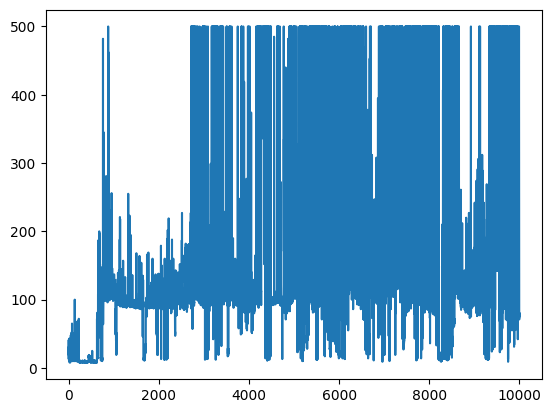

In [ ]:
Num_Treinamentos   = 0
### TREINAMENTO ###
while Num_Treinamentos < Quantidade_de_Treinamentos:
    ### VARIÁVEIS UTILIZADAS ###
    total_count        = 0
    total_episodes     = 0
    brake500           = 0
    indice_final       = 0
    mean_recomp_ep     = []
    indicesToIncrement = []
    Score_List         = []
    stop               = False
    Valor_Anterior     = None
    t0                 = time.time()
    MediaDos100        = deque(maxlen=100)
    indicesToIncrement = deque(maxlen=10_000)
    priorityIncrement = torch.full((len(indicesToIncrement),), 10)

    Estruturar_Agente(Estrutura_da_Rede      = [64,64],
                      Passos_para_Decaimento = 345,
                      Epsilon_Inicial        = 1,
                      Epsilon_Final          = 0.0001,
                      Num_Passos_Aleatorios  = 200,
                      Frames_por_Lote        = 500,
                      Num_Passos_Otimizacao  = 10,
                      Tamanho_Replay_Buffer  = 100_000,
                      Alpha                  = 0.6,
                      Beta                   = 1,
                      Taxa_Aprendizado       = 0.001,
                      Atualizacao_Rede_Alvo  = 0.99)

    for i, data in enumerate(collector):
        indices = rb.extend(data)

        for l, Valor_Atual in enumerate(data["next","step_count"]):
            if (Valor_Anterior is not None):
                if (Valor_Atual < Valor_Anterior):
                    total_episodes += 1
                    MediaDos100.append(Valor_Anterior.item())
                    Score_List.append(Valor_Anterior.item())
                    if ((total_episodes % 100) == 0) : mean_recomp_ep.append(sum(MediaDos100)/100)
                    if (Valor_Anterior.item() == 500): print("alcançou 500!!!!!!")

            Valor_Anterior = Valor_Atual

            if Valor_Atual == 499:
                ############## CONDIÇÕES DE PARADA ################
                brake500 += 1
                if Parada:
                    if brake500 >= Criterio_de_Parada: stop = not stop
                if Avaliacao_no_Treinamento:
                    Avalia_Agente(Num_avaliacoes=1000)
                    eval_score_mean = np.mean(mean_100_eval_score)
                    if eval_score_mean >= 495: stop = not stop
                ###################################################

                # ########################## MUDANÇA IMPLEMENTADA ########################
                indicesToIncrement.append(max(data["next","step_count"]).item())
                priorityIncrement = torch.full((len(indicesToIncrement),), 100)
                rb.update_priority(index=indicesToIncrement, priority=priorityIncrement)
                # ########################################################################

        if ((total_episodes >= episodios) and (Parada == False)): break
        elif stop: break

        max_length = rb[:]["next", "step_count"].max()

        if len(rb) > init_rand_steps:
            for _ in range(optim_steps):
                sample, info = rb.sample(200, return_info=True)
                loss_vals = loss(sample)

                rb.update_priority(index=info["index"], priority=loss_vals["loss"])
                rb.update_priority(index=indicesToIncrement, priority=priorityIncrement)

                loss_vals["loss"].backward()
                optim.step()
                optim.zero_grad()
                exploration_module.step(data.numel())
                updater.step()

            torchrl_logger.info(f"Episodes: {total_episodes}, Max num steps: {max_length}, rb length {len(rb)}")
            total_count += data.numel()

    t1 = time.time()
    Avalia_Agente(Num_avaliacoes=1000)
    eval_score_mean = np.mean(mean_100_eval_score)
    Salvar_Dados(Pasta_de_Destino,
                 Num_do_Teste,
                 Score_List,
                 eval_score,
                 sucessos,
                 mean_recomp_ep, Versao)
    Num_Treinamentos += 1
    Num_do_Teste += 1
    torchrl_logger.info(f"solved after {total_count} steps, {total_episodes} episodes and in {t1-t0}s.")

In [ ]:
plt.plot(Score_List)
plt.show()

plt.plot(mean_recomp_ep)
plt.show()

plt.plot(eval_score)
plt.show()

plt.plot(Eval_Score_mean_list)
plt.show()

plt.plot(sucessos)
plt.show()

# Simulações V4

In [ ]:
### CONTROLE DO TREINAMENTO ###
episodios                  = 5_000
Num_do_Teste               = 1
Quantidade_de_Treinamentos = 3
Criterio_de_Parada         = 5
Parada                     = False
Avaliacao_no_Treinamento   = False
Log_Estatico_dos_Result    = True
Pasta_de_Destino           = "V4_test3"
Versao                     = "V4"

2024-06-03 11:57:38,049 [torchrl][INFO] Episodes: 280, Max num steps: 100, rb length 5500
2024-06-03 11:57:39,194 [torchrl][INFO] Episodes: 334, Max num steps: 100, rb length 6000
2024-06-03 11:57:40,376 [torchrl][INFO] Episodes: 381, Max num steps: 100, rb length 6500
2024-06-03 11:57:41,845 [torchrl][INFO] Episodes: 409, Max num steps: 100, rb length 7000
2024-06-03 11:57:43,458 [torchrl][INFO] Episodes: 428, Max num steps: 100, rb length 7500
2024-06-03 11:57:45,270 [torchrl][INFO] Episodes: 483, Max num steps: 100, rb length 8000
2024-06-03 11:57:46,517 [torchrl][INFO] Episodes: 522, Max num steps: 100, rb length 8500
2024-06-03 11:57:47,621 [torchrl][INFO] Episodes: 524, Max num steps: 456, rb length 9000
2024-06-03 11:57:48,711 [torchrl][INFO] Episodes: 527, Max num steps: 456, rb length 9500
2024-06-03 11:57:49,852 [torchrl][INFO] Episodes: 578, Max num steps: 456, rb length 10000
2024-06-03 11:57:51,345 [torchrl][INFO] Episodes: 630, Max num steps: 456, rb length 10500
2024-06-

alcançou 500!!!!!!


2024-06-03 11:58:34,327 [torchrl][INFO] Episodes: 795, Max num steps: 500, rb length 27500
2024-06-03 11:58:35,442 [torchrl][INFO] Episodes: 798, Max num steps: 500, rb length 28000
2024-06-03 11:58:36,623 [torchrl][INFO] Episodes: 803, Max num steps: 500, rb length 28500
2024-06-03 11:58:37,732 [torchrl][INFO] Episodes: 808, Max num steps: 500, rb length 29000
2024-06-03 11:58:39,028 [torchrl][INFO] Episodes: 813, Max num steps: 500, rb length 29500
2024-06-03 11:58:40,122 [torchrl][INFO] Episodes: 818, Max num steps: 500, rb length 30000
2024-06-03 11:58:41,632 [torchrl][INFO] Episodes: 820, Max num steps: 500, rb length 30500
2024-06-03 11:58:43,234 [torchrl][INFO] Episodes: 822, Max num steps: 500, rb length 31000
2024-06-03 11:58:45,006 [torchrl][INFO] Episodes: 823, Max num steps: 500, rb length 31500
2024-06-03 11:58:46,287 [torchrl][INFO] Episodes: 824, Max num steps: 500, rb length 32000
2024-06-03 11:58:47,518 [torchrl][INFO] Episodes: 828, Max num steps: 500, rb length 32500

alcançou 500!!!!!!


2024-06-03 12:02:34,579 [torchrl][INFO] Episodes: 1656, Max num steps: 500, rb length 100000
2024-06-03 12:02:35,697 [torchrl][INFO] Episodes: 1660, Max num steps: 500, rb length 100000
2024-06-03 12:02:36,806 [torchrl][INFO] Episodes: 1665, Max num steps: 500, rb length 100000
2024-06-03 12:02:38,338 [torchrl][INFO] Episodes: 1670, Max num steps: 500, rb length 100000
2024-06-03 12:02:39,962 [torchrl][INFO] Episodes: 1675, Max num steps: 500, rb length 100000
2024-06-03 12:02:41,715 [torchrl][INFO] Episodes: 1680, Max num steps: 500, rb length 100000
2024-06-03 12:02:42,832 [torchrl][INFO] Episodes: 1685, Max num steps: 500, rb length 100000
2024-06-03 12:02:43,985 [torchrl][INFO] Episodes: 1690, Max num steps: 500, rb length 100000
2024-06-03 12:02:45,102 [torchrl][INFO] Episodes: 1695, Max num steps: 500, rb length 100000
2024-06-03 12:02:46,213 [torchrl][INFO] Episodes: 1699, Max num steps: 500, rb length 100000
2024-06-03 12:02:47,344 [torchrl][INFO] Episodes: 1703, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:02:50,730 [torchrl][INFO] Episodes: 1712, Max num steps: 500, rb length 100000
2024-06-03 12:02:51,969 [torchrl][INFO] Episodes: 1716, Max num steps: 500, rb length 100000
2024-06-03 12:02:53,572 [torchrl][INFO] Episodes: 1720, Max num steps: 500, rb length 100000
2024-06-03 12:02:55,617 [torchrl][INFO] Episodes: 1726, Max num steps: 500, rb length 100000
2024-06-03 12:02:56,852 [torchrl][INFO] Episodes: 1730, Max num steps: 500, rb length 100000
2024-06-03 12:02:57,966 [torchrl][INFO] Episodes: 1734, Max num steps: 500, rb length 100000
2024-06-03 12:02:59,186 [torchrl][INFO] Episodes: 1738, Max num steps: 500, rb length 100000
2024-06-03 12:03:00,290 [torchrl][INFO] Episodes: 1743, Max num steps: 500, rb length 100000
2024-06-03 12:03:01,530 [torchrl][INFO] Episodes: 1748, Max num steps: 500, rb length 100000
2024-06-03 12:03:02,666 [torchrl][INFO] Episodes: 1752, Max num steps: 500, rb length 100000
2024-06-03 12:03:03,780 [torchrl][INFO] Episodes: 1757, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:03:09,473 [torchrl][INFO] Episodes: 1768, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:03:11,199 [torchrl][INFO] Episodes: 1769, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:03:12,320 [torchrl][INFO] Episodes: 1770, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:03:13,428 [torchrl][INFO] Episodes: 1771, Max num steps: 500, rb length 100000
2024-06-03 12:03:14,541 [torchrl][INFO] Episodes: 1776, Max num steps: 500, rb length 100000
2024-06-03 12:03:15,663 [torchrl][INFO] Episodes: 1781, Max num steps: 500, rb length 100000
2024-06-03 12:03:16,947 [torchrl][INFO] Episodes: 1783, Max num steps: 500, rb length 100000
2024-06-03 12:03:18,083 [torchrl][INFO] Episodes: 1787, Max num steps: 500, rb length 100000
2024-06-03 12:03:19,197 [torchrl][INFO] Episodes: 1788, Max num steps: 500, rb length 100000
2024-06-03 12:03:20,309 [torchrl][INFO] Episodes: 1792, Max num steps: 500, rb length 100000
2024-06-03 12:03:21,694 [torchrl][INFO] Episodes: 1797, Max num steps: 500, rb length 100000
2024-06-03 12:03:23,365 [torchrl][INFO] Episodes: 1802, Max num steps: 500, rb length 100000
2024-06-03 12:03:25,114 [torchrl][INFO] Episodes: 1806, Max num steps: 500, rb length 100000
2024-06-03 12:03:26,461 [torchrl][INFO] Episodes: 1811, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:03:52,785 [torchrl][INFO] Episodes: 1952, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:03:54,570 [torchrl][INFO] Episodes: 1953, Max num steps: 500, rb length 100000
2024-06-03 12:03:56,019 [torchrl][INFO] Episodes: 1957, Max num steps: 500, rb length 100000
2024-06-03 12:03:57,142 [torchrl][INFO] Episodes: 1962, Max num steps: 500, rb length 100000
2024-06-03 12:03:58,251 [torchrl][INFO] Episodes: 1966, Max num steps: 500, rb length 100000
2024-06-03 12:03:59,389 [torchrl][INFO] Episodes: 1971, Max num steps: 500, rb length 100000
2024-06-03 12:04:00,563 [torchrl][INFO] Episodes: 1972, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:01,790 [torchrl][INFO] Episodes: 1973, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:03,120 [torchrl][INFO] Episodes: 1976, Max num steps: 500, rb length 100000
2024-06-03 12:04:04,256 [torchrl][INFO] Episodes: 1980, Max num steps: 500, rb length 100000
2024-06-03 12:04:05,367 [torchrl][INFO] Episodes: 1984, Max num steps: 500, rb length 100000
2024-06-03 12:04:06,962 [torchrl][INFO] Episodes: 1989, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:08,641 [torchrl][INFO] Episodes: 1990, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:10,443 [torchrl][INFO] Episodes: 1991, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:11,589 [torchrl][INFO] Episodes: 1992, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:12,713 [torchrl][INFO] Episodes: 1993, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:13,830 [torchrl][INFO] Episodes: 1994, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:14,961 [torchrl][INFO] Episodes: 1995, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:16,078 [torchrl][INFO] Episodes: 1996, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:17,208 [torchrl][INFO] Episodes: 1997, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:18,356 [torchrl][INFO] Episodes: 1998, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:19,510 [torchrl][INFO] Episodes: 1999, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:20,718 [torchrl][INFO] Episodes: 2000, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:22,359 [torchrl][INFO] Episodes: 2001, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:24,140 [torchrl][INFO] Episodes: 2002, Max num steps: 500, rb length 100000
2024-06-03 12:04:25,737 [torchrl][INFO] Episodes: 2006, Max num steps: 500, rb length 100000
2024-06-03 12:04:26,875 [torchrl][INFO] Episodes: 2007, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:28,195 [torchrl][INFO] Episodes: 2011, Max num steps: 500, rb length 100000
2024-06-03 12:04:29,325 [torchrl][INFO] Episodes: 2012, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:30,462 [torchrl][INFO] Episodes: 2013, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:31,610 [torchrl][INFO] Episodes: 2014, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:32,739 [torchrl][INFO] Episodes: 2019, Max num steps: 500, rb length 100000
2024-06-03 12:04:33,862 [torchrl][INFO] Episodes: 2023, Max num steps: 500, rb length 100000
2024-06-03 12:04:34,992 [torchrl][INFO] Episodes: 2024, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:36,548 [torchrl][INFO] Episodes: 2025, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:38,210 [torchrl][INFO] Episodes: 2026, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:40,066 [torchrl][INFO] Episodes: 2031, Max num steps: 500, rb length 100000
2024-06-03 12:04:41,348 [torchrl][INFO] Episodes: 2035, Max num steps: 500, rb length 100000
2024-06-03 12:04:42,487 [torchrl][INFO] Episodes: 2036, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:43,655 [torchrl][INFO] Episodes: 2037, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:44,802 [torchrl][INFO] Episodes: 2038, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:45,967 [torchrl][INFO] Episodes: 2039, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:47,116 [torchrl][INFO] Episodes: 2040, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:48,440 [torchrl][INFO] Episodes: 2041, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:49,609 [torchrl][INFO] Episodes: 2042, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:51,230 [torchrl][INFO] Episodes: 2043, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:52,911 [torchrl][INFO] Episodes: 2048, Max num steps: 500, rb length 100000
2024-06-03 12:04:54,678 [torchrl][INFO] Episodes: 2049, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:56,085 [torchrl][INFO] Episodes: 2050, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:57,237 [torchrl][INFO] Episodes: 2051, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:58,403 [torchrl][INFO] Episodes: 2052, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:04:59,565 [torchrl][INFO] Episodes: 2053, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:00,723 [torchrl][INFO] Episodes: 2054, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:01,875 [torchrl][INFO] Episodes: 2055, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:03,020 [torchrl][INFO] Episodes: 2056, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:04,185 [torchrl][INFO] Episodes: 2057, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:05,348 [torchrl][INFO] Episodes: 2058, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:07,053 [torchrl][INFO] Episodes: 2059, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:08,926 [torchrl][INFO] Episodes: 2064, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:10,503 [torchrl][INFO] Episodes: 2065, Max num steps: 500, rb length 100000
2024-06-03 12:05:11,667 [torchrl][INFO] Episodes: 2069, Max num steps: 500, rb length 100000
2024-06-03 12:05:12,819 [torchrl][INFO] Episodes: 2075, Max num steps: 500, rb length 100000
2024-06-03 12:05:14,162 [torchrl][INFO] Episodes: 2076, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:15,319 [torchrl][INFO] Episodes: 2077, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:16,485 [torchrl][INFO] Episodes: 2082, Max num steps: 500, rb length 100000
2024-06-03 12:05:17,651 [torchrl][INFO] Episodes: 2087, Max num steps: 500, rb length 100000
2024-06-03 12:05:18,858 [torchrl][INFO] Episodes: 2091, Max num steps: 500, rb length 100000
2024-06-03 12:05:20,030 [torchrl][INFO] Episodes: 2096, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:21,716 [torchrl][INFO] Episodes: 2097, Max num steps: 500, rb length 100000
2024-06-03 12:05:23,479 [torchrl][INFO] Episodes: 2102, Max num steps: 500, rb length 100000
2024-06-03 12:05:25,024 [torchrl][INFO] Episodes: 2107, Max num steps: 500, rb length 100000
2024-06-03 12:05:26,195 [torchrl][INFO] Episodes: 2108, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:27,355 [torchrl][INFO] Episodes: 2109, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:28,535 [torchrl][INFO] Episodes: 2114, Max num steps: 500, rb length 100000
2024-06-03 12:05:29,674 [torchrl][INFO] Episodes: 2115, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:30,862 [torchrl][INFO] Episodes: 2120, Max num steps: 500, rb length 100000
2024-06-03 12:05:32,135 [torchrl][INFO] Episodes: 2125, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:33,332 [torchrl][INFO] Episodes: 2126, Max num steps: 500, rb length 100000
2024-06-03 12:05:34,556 [torchrl][INFO] Episodes: 2131, Max num steps: 500, rb length 100000
2024-06-03 12:05:36,514 [torchrl][INFO] Episodes: 2136, Max num steps: 500, rb length 100000
2024-06-03 12:05:38,298 [torchrl][INFO] Episodes: 2137, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:39,855 [torchrl][INFO] Episodes: 2142, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:41,009 [torchrl][INFO] Episodes: 2143, Max num steps: 500, rb length 100000
2024-06-03 12:05:42,170 [torchrl][INFO] Episodes: 2147, Max num steps: 500, rb length 100000
2024-06-03 12:05:43,354 [torchrl][INFO] Episodes: 2153, Max num steps: 500, rb length 100000
2024-06-03 12:05:44,519 [torchrl][INFO] Episodes: 2158, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:45,703 [torchrl][INFO] Episodes: 2159, Max num steps: 500, rb length 100000
2024-06-03 12:05:46,855 [torchrl][INFO] Episodes: 2163, Max num steps: 500, rb length 100000
2024-06-03 12:05:48,072 [torchrl][INFO] Episodes: 2164, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:49,239 [torchrl][INFO] Episodes: 2170, Max num steps: 500, rb length 100000
2024-06-03 12:05:50,869 [torchrl][INFO] Episodes: 2175, Max num steps: 500, rb length 100000
2024-06-03 12:05:52,612 [torchrl][INFO] Episodes: 2179, Max num steps: 500, rb length 100000
2024-06-03 12:05:54,242 [torchrl][INFO] Episodes: 2183, Max num steps: 500, rb length 100000
2024-06-03 12:05:55,404 [torchrl][INFO] Episodes: 2189, Max num steps: 500, rb length 100000
2024-06-03 12:05:56,551 [torchrl][INFO] Episodes: 2191, Max num steps: 500, rb length 100000
2024-06-03 12:05:57,699 [torchrl][INFO] Episodes: 2192, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:05:59,161 [torchrl][INFO] Episodes: 2196, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:00,321 [torchrl][INFO] Episodes: 2197, Max num steps: 500, rb length 100000
2024-06-03 12:06:01,474 [torchrl][INFO] Episodes: 2201, Max num steps: 500, rb length 100000
2024-06-03 12:06:02,651 [torchrl][INFO] Episodes: 2202, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:03,808 [torchrl][INFO] Episodes: 2203, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:05,565 [torchrl][INFO] Episodes: 2208, Max num steps: 500, rb length 100000
2024-06-03 12:06:07,308 [torchrl][INFO] Episodes: 2209, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:09,032 [torchrl][INFO] Episodes: 2214, Max num steps: 500, rb length 100000
2024-06-03 12:06:10,185 [torchrl][INFO] Episodes: 2219, Max num steps: 500, rb length 100000
2024-06-03 12:06:11,329 [torchrl][INFO] Episodes: 2224, Max num steps: 500, rb length 100000
2024-06-03 12:06:12,484 [torchrl][INFO] Episodes: 2225, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:13,641 [torchrl][INFO] Episodes: 2226, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:14,836 [torchrl][INFO] Episodes: 2227, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:16,016 [torchrl][INFO] Episodes: 2228, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:17,803 [torchrl][INFO] Episodes: 2233, Max num steps: 500, rb length 100000
2024-06-03 12:06:19,747 [torchrl][INFO] Episodes: 2238, Max num steps: 500, rb length 100000
2024-06-03 12:06:21,666 [torchrl][INFO] Episodes: 2243, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:23,749 [torchrl][INFO] Episodes: 2244, Max num steps: 500, rb length 100000
2024-06-03 12:06:25,584 [torchrl][INFO] Episodes: 2248, Max num steps: 500, rb length 100000
2024-06-03 12:06:26,924 [torchrl][INFO] Episodes: 2253, Max num steps: 500, rb length 100000
2024-06-03 12:06:28,093 [torchrl][INFO] Episodes: 2258, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:29,261 [torchrl][INFO] Episodes: 2259, Max num steps: 500, rb length 100000
2024-06-03 12:06:30,414 [torchrl][INFO] Episodes: 2263, Max num steps: 500, rb length 100000
2024-06-03 12:06:31,583 [torchrl][INFO] Episodes: 2264, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:32,820 [torchrl][INFO] Episodes: 2265, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:34,089 [torchrl][INFO] Episodes: 2270, Max num steps: 500, rb length 100000
2024-06-03 12:06:35,252 [torchrl][INFO] Episodes: 2274, Max num steps: 500, rb length 100000
2024-06-03 12:06:36,852 [torchrl][INFO] Episodes: 2275, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:38,625 [torchrl][INFO] Episodes: 2276, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:06:40,424 [torchrl][INFO] Episodes: 2280, Max num steps: 500, rb length 100000
2024-06-03 12:06:41,587 [torchrl][INFO] Episodes: 2285, Max num steps: 500, rb length 100000
2024-06-03 12:06:42,762 [torchrl][INFO] Episodes: 2289, Max num steps: 500, rb length 100000
2024-06-03 12:06:43,922 [torchrl][INFO] Episodes: 2294, Max num steps: 500, rb length 100000
2024-06-03 12:06:45,081 [torchrl][INFO] Episodes: 2298, Max num steps: 500, rb length 100000
2024-06-03 12:06:46,306 [torchrl][INFO] Episodes: 2302, Max num steps: 500, rb length 100000
2024-06-03 12:06:47,509 [torchrl][INFO] Episodes: 2307, Max num steps: 500, rb length 100000
2024-06-03 12:06:48,873 [torchrl][INFO] Episodes: 2311, Max num steps: 500, rb length 100000
2024-06-03 12:06:50,031 [torchrl][INFO] Episodes: 2316, Max num steps: 500, rb length 100000
2024-06-03 12:06:51,691 [torchrl][INFO] Episodes: 2320, Max num steps: 500, rb length 100000
2024-06-03 12:06:53,474 [torchrl][INFO] Episodes: 2324, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:07:02,302 [torchrl][INFO] Episodes: 2350, Max num steps: 500, rb length 100000
2024-06-03 12:07:03,461 [torchrl][INFO] Episodes: 2354, Max num steps: 500, rb length 100000
2024-06-03 12:07:04,624 [torchrl][INFO] Episodes: 2355, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:06,116 [torchrl][INFO] Episodes: 2356, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:07,840 [torchrl][INFO] Episodes: 2357, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:09,697 [torchrl][INFO] Episodes: 2358, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:11,084 [torchrl][INFO] Episodes: 2362, Max num steps: 500, rb length 100000
2024-06-03 12:07:12,266 [torchrl][INFO] Episodes: 2366, Max num steps: 500, rb length 100000
2024-06-03 12:07:13,437 [torchrl][INFO] Episodes: 2370, Max num steps: 500, rb length 100000
2024-06-03 12:07:14,805 [torchrl][INFO] Episodes: 2374, Max num steps: 500, rb length 100000
2024-06-03 12:07:16,004 [torchrl][INFO] Episodes: 2378, Max num steps: 500, rb length 100000
2024-06-03 12:07:17,173 [torchrl][INFO] Episodes: 2383, Max num steps: 500, rb length 100000
2024-06-03 12:07:18,370 [torchrl][INFO] Episodes: 2387, Max num steps: 500, rb length 100000
2024-06-03 12:07:19,546 [torchrl][INFO] Episodes: 2391, Max num steps: 500, rb length 100000
2024-06-03 12:07:20,969 [torchrl][INFO] Episodes: 2395, Max num steps: 500, rb length 100000
2024-06-03 12:07:22,680 [torchrl][INFO] Episodes: 2398, Max num steps: 500, rb length 100000
2024-06-03 12:07:24,562 [torchrl][INFO] Episodes: 2402, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:07:40,677 [torchrl][INFO] Episodes: 2438, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:41,855 [torchrl][INFO] Episodes: 2439, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:43,155 [torchrl][INFO] Episodes: 2440, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:44,328 [torchrl][INFO] Episodes: 2441, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:45,501 [torchrl][INFO] Episodes: 2442, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:46,688 [torchrl][INFO] Episodes: 2445, Max num steps: 500, rb length 100000
2024-06-03 12:07:47,864 [torchrl][INFO] Episodes: 2446, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:49,077 [torchrl][INFO] Episodes: 2448, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:50,481 [torchrl][INFO] Episodes: 2449, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:52,216 [torchrl][INFO] Episodes: 2450, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:54,216 [torchrl][INFO] Episodes: 2451, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:55,420 [torchrl][INFO] Episodes: 2452, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:56,588 [torchrl][INFO] Episodes: 2453, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:07:57,805 [torchrl][INFO] Episodes: 2454, Max num steps: 500, rb length 100000
2024-06-03 12:07:58,993 [torchrl][INFO] Episodes: 2456, Max num steps: 500, rb length 100000
2024-06-03 12:08:00,412 [torchrl][INFO] Episodes: 2457, Max num steps: 500, rb length 100000
2024-06-03 12:08:01,590 [torchrl][INFO] Episodes: 2460, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:08:02,773 [torchrl][INFO] Episodes: 2461, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:08:03,960 [torchrl][INFO] Episodes: 2462, Max num steps: 500, rb length 100000
2024-06-03 12:08:05,574 [torchrl][INFO] Episodes: 2465, Max num steps: 500, rb length 100000
2024-06-03 12:08:07,341 [torchrl][INFO] Episodes: 2469, Max num steps: 500, rb length 100000
2024-06-03 12:08:09,166 [torchrl][INFO] Episodes: 2473, Max num steps: 500, rb length 100000
2024-06-03 12:08:10,331 [torchrl][INFO] Episodes: 2477, Max num steps: 500, rb length 100000
2024-06-03 12:08:11,508 [torchrl][INFO] Episodes: 2480, Max num steps: 500, rb length 100000
2024-06-03 12:08:12,680 [torchrl][INFO] Episodes: 2484, Max num steps: 500, rb length 100000
2024-06-03 12:08:13,859 [torchrl][INFO] Episodes: 2488, Max num steps: 500, rb length 100000
2024-06-03 12:08:15,030 [torchrl][INFO] Episodes: 2492, Max num steps: 500, rb length 100000
2024-06-03 12:08:16,199 [torchrl][INFO] Episodes: 2495, Max num steps: 500, rb length 100000
2024-06-03 12:08:17,375 [torchrl][INFO] Episodes: 2500, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:08:20,210 [torchrl][INFO] Episodes: 2505, Max num steps: 500, rb length 100000
2024-06-03 12:08:21,974 [torchrl][INFO] Episodes: 2507, Max num steps: 500, rb length 100000
2024-06-03 12:08:23,990 [torchrl][INFO] Episodes: 2511, Max num steps: 500, rb length 100000
2024-06-03 12:08:25,165 [torchrl][INFO] Episodes: 2515, Max num steps: 500, rb length 100000
2024-06-03 12:08:26,342 [torchrl][INFO] Episodes: 2519, Max num steps: 500, rb length 100000
2024-06-03 12:08:27,522 [torchrl][INFO] Episodes: 2524, Max num steps: 500, rb length 100000
2024-06-03 12:08:28,726 [torchrl][INFO] Episodes: 2528, Max num steps: 500, rb length 100000
2024-06-03 12:08:29,902 [torchrl][INFO] Episodes: 2532, Max num steps: 500, rb length 100000
2024-06-03 12:08:31,072 [torchrl][INFO] Episodes: 2537, Max num steps: 500, rb length 100000
2024-06-03 12:08:32,269 [torchrl][INFO] Episodes: 2541, Max num steps: 500, rb length 100000
2024-06-03 12:08:33,430 [torchrl][INFO] Episodes: 2546, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:09:00,928 [torchrl][INFO] Episodes: 2630, Max num steps: 500, rb length 100000
2024-06-03 12:09:02,108 [torchrl][INFO] Episodes: 2634, Max num steps: 500, rb length 100000
2024-06-03 12:09:03,280 [torchrl][INFO] Episodes: 2635, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:04,927 [torchrl][INFO] Episodes: 2636, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:06,696 [torchrl][INFO] Episodes: 2637, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:08,405 [torchrl][INFO] Episodes: 2638, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:09,724 [torchrl][INFO] Episodes: 2639, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:11,190 [torchrl][INFO] Episodes: 2640, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:12,378 [torchrl][INFO] Episodes: 2644, Max num steps: 500, rb length 100000
2024-06-03 12:09:13,570 [torchrl][INFO] Episodes: 2648, Max num steps: 500, rb length 100000
2024-06-03 12:09:14,744 [torchrl][INFO] Episodes: 2653, Max num steps: 500, rb length 100000
2024-06-03 12:09:15,925 [torchrl][INFO] Episodes: 2671, Max num steps: 500, rb length 100000
2024-06-03 12:09:17,116 [torchrl][INFO] Episodes: 2692, Max num steps: 500, rb length 100000
2024-06-03 12:09:18,551 [torchrl][INFO] Episodes: 2736, Max num steps: 500, rb length 100000
2024-06-03 12:09:20,314 [torchrl][INFO] Episodes: 2738, Max num steps: 500, rb length 100000
2024-06-03 12:09:22,176 [torchrl][INFO] Episodes: 2741, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:23,711 [torchrl][INFO] Episodes: 2742, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:24,898 [torchrl][INFO] Episodes: 2743, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:26,088 [torchrl][INFO] Episodes: 2744, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:27,276 [torchrl][INFO] Episodes: 2745, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:28,619 [torchrl][INFO] Episodes: 2746, Max num steps: 500, rb length 100000
2024-06-03 12:09:29,816 [torchrl][INFO] Episodes: 2748, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:31,037 [torchrl][INFO] Episodes: 2750, Max num steps: 500, rb length 100000
2024-06-03 12:09:32,214 [torchrl][INFO] Episodes: 2753, Max num steps: 500, rb length 100000
2024-06-03 12:09:33,866 [torchrl][INFO] Episodes: 2758, Max num steps: 500, rb length 100000
2024-06-03 12:09:35,596 [torchrl][INFO] Episodes: 2762, Max num steps: 500, rb length 100000
2024-06-03 12:09:37,516 [torchrl][INFO] Episodes: 2766, Max num steps: 500, rb length 100000
2024-06-03 12:09:38,814 [torchrl][INFO] Episodes: 2770, Max num steps: 500, rb length 100000
2024-06-03 12:09:39,987 [torchrl][INFO] Episodes: 2774, Max num steps: 500, rb length 100000
2024-06-03 12:09:41,152 [torchrl][INFO] Episodes: 2778, Max num steps: 500, rb length 100000
2024-06-03 12:09:42,345 [torchrl][INFO] Episodes: 2782, Max num steps: 500, rb length 100000
2024-06-03 12:09:43,524 [torchrl][INFO] Episodes: 2786, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:44,729 [torchrl][INFO] Episodes: 2787, Max num steps: 500, rb length 100000
2024-06-03 12:09:45,902 [torchrl][INFO] Episodes: 2791, Max num steps: 500, rb length 100000
2024-06-03 12:09:47,078 [torchrl][INFO] Episodes: 2795, Max num steps: 500, rb length 100000
2024-06-03 12:09:48,587 [torchrl][INFO] Episodes: 2799, Max num steps: 500, rb length 100000
2024-06-03 12:09:50,350 [torchrl][INFO] Episodes: 2800, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:52,294 [torchrl][INFO] Episodes: 2805, Max num steps: 500, rb length 100000
2024-06-03 12:09:53,526 [torchrl][INFO] Episodes: 2809, Max num steps: 500, rb length 100000
2024-06-03 12:09:54,711 [torchrl][INFO] Episodes: 2813, Max num steps: 500, rb length 100000
2024-06-03 12:09:55,906 [torchrl][INFO] Episodes: 2818, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:09:57,129 [torchrl][INFO] Episodes: 2819, Max num steps: 500, rb length 100000
2024-06-03 12:09:58,316 [torchrl][INFO] Episodes: 2823, Max num steps: 500, rb length 100000
2024-06-03 12:09:59,701 [torchrl][INFO] Episodes: 2828, Max num steps: 500, rb length 100000
2024-06-03 12:10:00,899 [torchrl][INFO] Episodes: 2832, Max num steps: 500, rb length 100000
2024-06-03 12:10:02,123 [torchrl][INFO] Episodes: 2837, Max num steps: 500, rb length 100000
2024-06-03 12:10:03,791 [torchrl][INFO] Episodes: 2842, Max num steps: 500, rb length 100000
2024-06-03 12:10:05,597 [torchrl][INFO] Episodes: 2847, Max num steps: 500, rb length 100000
2024-06-03 12:10:07,331 [torchrl][INFO] Episodes: 2852, Max num steps: 500, rb length 100000
2024-06-03 12:10:08,521 [torchrl][INFO] Episodes: 2857, Max num steps: 500, rb length 100000
2024-06-03 12:10:09,719 [torchrl][INFO] Episodes: 2862, Max num steps: 500, rb length 100000
2024-06-03 12:10:10,903 [torchrl][INFO] Episodes: 2867, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:10:59,875 [torchrl][INFO] Episodes: 3039, Max num steps: 500, rb length 100000
2024-06-03 12:11:01,198 [torchrl][INFO] Episodes: 3044, Max num steps: 500, rb length 100000
2024-06-03 12:11:02,950 [torchrl][INFO] Episodes: 3049, Max num steps: 500, rb length 100000
2024-06-03 12:11:04,797 [torchrl][INFO] Episodes: 3054, Max num steps: 500, rb length 100000
2024-06-03 12:11:06,241 [torchrl][INFO] Episodes: 3058, Max num steps: 500, rb length 100000
2024-06-03 12:11:07,427 [torchrl][INFO] Episodes: 3063, Max num steps: 500, rb length 100000
2024-06-03 12:11:08,614 [torchrl][INFO] Episodes: 3068, Max num steps: 500, rb length 100000
2024-06-03 12:11:09,891 [torchrl][INFO] Episodes: 3073, Max num steps: 500, rb length 100000
2024-06-03 12:11:11,086 [torchrl][INFO] Episodes: 3077, Max num steps: 500, rb length 100000
2024-06-03 12:11:12,255 [torchrl][INFO] Episodes: 3078, Max num steps: 500, rb length 100000
2024-06-03 12:11:13,498 [torchrl][INFO] Episodes: 3082, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:11:53,643 [torchrl][INFO] Episodes: 3219, Max num steps: 500, rb length 100000
2024-06-03 12:11:54,841 [torchrl][INFO] Episodes: 3223, Max num steps: 500, rb length 100000
2024-06-03 12:11:56,015 [torchrl][INFO] Episodes: 3229, Max num steps: 500, rb length 100000
2024-06-03 12:11:57,197 [torchrl][INFO] Episodes: 3233, Max num steps: 500, rb length 100000
2024-06-03 12:11:58,381 [torchrl][INFO] Episodes: 3238, Max num steps: 500, rb length 100000
2024-06-03 12:11:59,594 [torchrl][INFO] Episodes: 3244, Max num steps: 500, rb length 100000
2024-06-03 12:12:01,150 [torchrl][INFO] Episodes: 3249, Max num steps: 500, rb length 100000
2024-06-03 12:12:02,914 [torchrl][INFO] Episodes: 3254, Max num steps: 500, rb length 100000
2024-06-03 12:12:04,823 [torchrl][INFO] Episodes: 3258, Max num steps: 500, rb length 100000
2024-06-03 12:12:06,241 [torchrl][INFO] Episodes: 3264, Max num steps: 500, rb length 100000
2024-06-03 12:12:07,423 [torchrl][INFO] Episodes: 3267, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:12:08,772 [torchrl][INFO] Episodes: 3268, Max num steps: 500, rb length 100000
2024-06-03 12:12:09,972 [torchrl][INFO] Episodes: 3272, Max num steps: 500, rb length 100000
2024-06-03 12:12:11,165 [torchrl][INFO] Episodes: 3277, Max num steps: 500, rb length 100000
2024-06-03 12:12:12,520 [torchrl][INFO] Episodes: 3281, Max num steps: 500, rb length 100000
2024-06-03 12:12:13,709 [torchrl][INFO] Episodes: 3285, Max num steps: 500, rb length 100000
2024-06-03 12:12:14,891 [torchrl][INFO] Episodes: 3289, Max num steps: 500, rb length 100000
2024-06-03 12:12:16,638 [torchrl][INFO] Episodes: 3294, Max num steps: 500, rb length 100000
2024-06-03 12:12:18,437 [torchrl][INFO] Episodes: 3298, Max num steps: 500, rb length 100000
2024-06-03 12:12:20,218 [torchrl][INFO] Episodes: 3302, Max num steps: 500, rb length 100000
2024-06-03 12:12:21,415 [torchrl][INFO] Episodes: 3304, Max num steps: 500, rb length 100000
2024-06-03 12:12:22,601 [torchrl][INFO] Episodes: 3308, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:12:41,229 [torchrl][INFO] Episodes: 3400, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:12:42,451 [torchrl][INFO] Episodes: 3402, Max num steps: 500, rb length 100000
2024-06-03 12:12:43,654 [torchrl][INFO] Episodes: 3405, Max num steps: 500, rb length 100000
2024-06-03 12:12:44,967 [torchrl][INFO] Episodes: 3410, Max num steps: 500, rb length 100000
2024-06-03 12:12:46,834 [torchrl][INFO] Episodes: 3414, Max num steps: 500, rb length 100000
2024-06-03 12:12:48,703 [torchrl][INFO] Episodes: 3420, Max num steps: 500, rb length 100000
2024-06-03 12:12:50,029 [torchrl][INFO] Episodes: 3424, Max num steps: 500, rb length 100000
2024-06-03 12:12:51,218 [torchrl][INFO] Episodes: 3425, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:12:52,414 [torchrl][INFO] Episodes: 3429, Max num steps: 500, rb length 100000
2024-06-03 12:12:53,604 [torchrl][INFO] Episodes: 3433, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:12:54,983 [torchrl][INFO] Episodes: 3434, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:12:56,218 [torchrl][INFO] Episodes: 3435, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:12:57,425 [torchrl][INFO] Episodes: 3436, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:12:58,634 [torchrl][INFO] Episodes: 3437, Max num steps: 500, rb length 100000
2024-06-03 12:13:00,245 [torchrl][INFO] Episodes: 3440, Max num steps: 500, rb length 100000
2024-06-03 12:13:02,176 [torchrl][INFO] Episodes: 3441, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:04,093 [torchrl][INFO] Episodes: 3444, Max num steps: 500, rb length 100000
2024-06-03 12:13:05,301 [torchrl][INFO] Episodes: 3448, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:06,511 [torchrl][INFO] Episodes: 3449, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:07,717 [torchrl][INFO] Episodes: 3450, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:08,926 [torchrl][INFO] Episodes: 3451, Max num steps: 500, rb length 100000
2024-06-03 12:13:10,126 [torchrl][INFO] Episodes: 3453, Max num steps: 500, rb length 100000
2024-06-03 12:13:11,308 [torchrl][INFO] Episodes: 3454, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:12,530 [torchrl][INFO] Episodes: 3455, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:13,807 [torchrl][INFO] Episodes: 3457, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:15,482 [torchrl][INFO] Episodes: 3459, Max num steps: 500, rb length 100000
2024-06-03 12:13:17,434 [torchrl][INFO] Episodes: 3463, Max num steps: 500, rb length 100000
2024-06-03 12:13:19,460 [torchrl][INFO] Episodes: 3467, Max num steps: 500, rb length 100000
2024-06-03 12:13:20,658 [torchrl][INFO] Episodes: 3470, Max num steps: 500, rb length 100000
2024-06-03 12:13:21,845 [torchrl][INFO] Episodes: 3472, Max num steps: 500, rb length 100000
2024-06-03 12:13:23,037 [torchrl][INFO] Episodes: 3473, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:24,277 [torchrl][INFO] Episodes: 3474, Max num steps: 500, rb length 100000
2024-06-03 12:13:25,549 [torchrl][INFO] Episodes: 3478, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:26,747 [torchrl][INFO] Episodes: 3479, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:27,945 [torchrl][INFO] Episodes: 3480, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:29,228 [torchrl][INFO] Episodes: 3481, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:31,012 [torchrl][INFO] Episodes: 3482, Max num steps: 500, rb length 100000
2024-06-03 12:13:32,806 [torchrl][INFO] Episodes: 3483, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:34,337 [torchrl][INFO] Episodes: 3484, Max num steps: 500, rb length 100000
2024-06-03 12:13:35,550 [torchrl][INFO] Episodes: 3486, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:36,762 [torchrl][INFO] Episodes: 3487, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:37,994 [torchrl][INFO] Episodes: 3488, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:39,191 [torchrl][INFO] Episodes: 3489, Max num steps: 500, rb length 100000
2024-06-03 12:13:40,375 [torchrl][INFO] Episodes: 3493, Max num steps: 500, rb length 100000
2024-06-03 12:13:41,591 [torchrl][INFO] Episodes: 3498, Max num steps: 500, rb length 100000
2024-06-03 12:13:42,797 [torchrl][INFO] Episodes: 3502, Max num steps: 500, rb length 100000
2024-06-03 12:13:44,482 [torchrl][INFO] Episodes: 3506, Max num steps: 500, rb length 100000
2024-06-03 12:13:46,241 [torchrl][INFO] Episodes: 3509, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:48,168 [torchrl][INFO] Episodes: 3510, Max num steps: 500, rb length 100000
2024-06-03 12:13:49,354 [torchrl][INFO] Episodes: 3513, Max num steps: 500, rb length 100000
2024-06-03 12:13:50,577 [torchrl][INFO] Episodes: 3514, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:13:51,778 [torchrl][INFO] Episodes: 3518, Max num steps: 500, rb length 100000
2024-06-03 12:13:52,974 [torchrl][INFO] Episodes: 3519, Max num steps: 500, rb length 100000
2024-06-03 12:13:54,239 [torchrl][INFO] Episodes: 3524, Max num steps: 500, rb length 100000
2024-06-03 12:13:55,425 [torchrl][INFO] Episodes: 3528, Max num steps: 500, rb length 100000
2024-06-03 12:13:56,624 [torchrl][INFO] Episodes: 3531, Max num steps: 500, rb length 100000
2024-06-03 12:13:57,814 [torchrl][INFO] Episodes: 3535, Max num steps: 500, rb length 100000
2024-06-03 12:13:59,594 [torchrl][INFO] Episodes: 3539, Max num steps: 500, rb length 100000
2024-06-03 12:14:01,461 [torchrl][INFO] Episodes: 3543, Max num steps: 500, rb length 100000
2024-06-03 12:14:03,218 [torchrl][INFO] Episodes: 3547, Max num steps: 500, rb length 100000
2024-06-03 12:14:04,468 [torchrl][INFO] Episodes: 3551, Max num steps: 500, rb length 100000
2024-06-03 12:14:05,655 [torchrl][INFO] Episodes: 3552, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:14:06,879 [torchrl][INFO] Episodes: 3553, Max num steps: 500, rb length 100000
2024-06-03 12:14:08,092 [torchrl][INFO] Episodes: 3557, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:14:09,315 [torchrl][INFO] Episodes: 3558, Max num steps: 500, rb length 100000
2024-06-03 12:14:10,690 [torchrl][INFO] Episodes: 3561, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:14:11,903 [torchrl][INFO] Episodes: 3562, Max num steps: 500, rb length 100000
2024-06-03 12:14:13,191 [torchrl][INFO] Episodes: 3565, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:14:15,014 [torchrl][INFO] Episodes: 3566, Max num steps: 500, rb length 100000
2024-06-03 12:14:16,857 [torchrl][INFO] Episodes: 3568, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:14:18,349 [torchrl][INFO] Episodes: 3569, Max num steps: 500, rb length 100000
2024-06-03 12:14:19,600 [torchrl][INFO] Episodes: 3572, Max num steps: 500, rb length 100000
2024-06-03 12:14:20,832 [torchrl][INFO] Episodes: 3576, Max num steps: 500, rb length 100000
2024-06-03 12:14:22,028 [torchrl][INFO] Episodes: 3579, Max num steps: 500, rb length 100000
2024-06-03 12:14:23,236 [torchrl][INFO] Episodes: 3582, Max num steps: 500, rb length 100000
2024-06-03 12:14:24,470 [torchrl][INFO] Episodes: 3583, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:14:25,717 [torchrl][INFO] Episodes: 3587, Max num steps: 500, rb length 100000
2024-06-03 12:14:26,916 [torchrl][INFO] Episodes: 3591, Max num steps: 500, rb length 100000
2024-06-03 12:14:28,393 [torchrl][INFO] Episodes: 3594, Max num steps: 500, rb length 100000
2024-06-03 12:14:30,180 [torchrl][INFO] Episodes: 3596, Max num steps: 500, rb length 100000
2024-06-03 12:14:32,061 [torchrl][INFO] Episodes: 3600, Max num steps: 500, rb length 100000
2024-06-03 12:14:33,264 [torchrl][INFO] Episodes: 3604, Max num steps: 500, rb length 100000
2024-06-03 12:14:34,549 [torchrl][INFO] Episodes: 3607, Max num steps: 500, rb length 100000
2024-06-03 12:14:35,786 [torchrl][INFO] Episodes: 3611, Max num steps: 500, rb length 100000
2024-06-03 12:14:37,180 [torchrl][INFO] Episodes: 3614, Max num steps: 500, rb length 100000
2024-06-03 12:14:38,478 [torchrl][INFO] Episodes: 3617, Max num steps: 500, rb length 100000
2024-06-03 12:14:39,694 [torchrl][INFO] Episodes: 3621, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:14:53,395 [torchrl][INFO] Episodes: 3654, Max num steps: 500, rb length 100000
2024-06-03 12:14:54,611 [torchrl][INFO] Episodes: 3657, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:14:55,834 [torchrl][INFO] Episodes: 3658, Max num steps: 500, rb length 100000
2024-06-03 12:14:57,466 [torchrl][INFO] Episodes: 3661, Max num steps: 500, rb length 100000
2024-06-03 12:14:59,291 [torchrl][INFO] Episodes: 3663, Max num steps: 500, rb length 100000
2024-06-03 12:15:01,445 [torchrl][INFO] Episodes: 3666, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:15:03,276 [torchrl][INFO] Episodes: 3667, Max num steps: 500, rb length 100000
2024-06-03 12:15:05,133 [torchrl][INFO] Episodes: 3670, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:15:06,654 [torchrl][INFO] Episodes: 3671, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:15:07,899 [torchrl][INFO] Episodes: 3672, Max num steps: 500, rb length 100000
2024-06-03 12:15:09,128 [torchrl][INFO] Episodes: 3675, Max num steps: 500, rb length 100000
2024-06-03 12:15:10,454 [torchrl][INFO] Episodes: 3677, Max num steps: 500, rb length 100000
2024-06-03 12:15:11,904 [torchrl][INFO] Episodes: 3680, Max num steps: 500, rb length 100000
2024-06-03 12:15:13,699 [torchrl][INFO] Episodes: 3684, Max num steps: 500, rb length 100000
2024-06-03 12:15:15,583 [torchrl][INFO] Episodes: 3687, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:15:16,923 [torchrl][INFO] Episodes: 3688, Max num steps: 500, rb length 100000
2024-06-03 12:15:18,136 [torchrl][INFO] Episodes: 3690, Max num steps: 500, rb length 100000
2024-06-03 12:15:19,364 [torchrl][INFO] Episodes: 3694, Max num steps: 500, rb length 100000
2024-06-03 12:15:20,610 [torchrl][INFO] Episodes: 3696, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:15:21,833 [torchrl][INFO] Episodes: 3697, Max num steps: 500, rb length 100000
2024-06-03 12:15:23,045 [torchrl][INFO] Episodes: 3702, Max num steps: 500, rb length 100000
2024-06-03 12:15:24,259 [torchrl][INFO] Episodes: 3706, Max num steps: 500, rb length 100000
2024-06-03 12:15:25,450 [torchrl][INFO] Episodes: 3712, Max num steps: 500, rb length 100000
2024-06-03 12:15:27,110 [torchrl][INFO] Episodes: 3721, Max num steps: 500, rb length 100000
2024-06-03 12:15:29,376 [torchrl][INFO] Episodes: 3726, Max num steps: 500, rb length 100000
2024-06-03 12:15:31,015 [torchrl][INFO] Episodes: 3730, Max num steps: 500, rb length 100000
2024-06-03 12:15:32,213 [torchrl][INFO] Episodes: 3734, Max num steps: 500, rb length 100000
2024-06-03 12:15:33,426 [torchrl][INFO] Episodes: 3735, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:15:34,638 [torchrl][INFO] Episodes: 3744, Max num steps: 500, rb length 100000
2024-06-03 12:15:35,842 [torchrl][INFO] Episodes: 3748, Max num steps: 500, rb length 100000
2024-06-03 12:15:37,041 [torchrl][INFO] Episodes: 3752, Max num steps: 500, rb length 100000
2024-06-03 12:15:38,251 [torchrl][INFO] Episodes: 3757, Max num steps: 500, rb length 100000
2024-06-03 12:15:39,443 [torchrl][INFO] Episodes: 3761, Max num steps: 500, rb length 100000
2024-06-03 12:15:40,659 [torchrl][INFO] Episodes: 3762, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:15:42,473 [torchrl][INFO] Episodes: 3765, Max num steps: 500, rb length 100000
2024-06-03 12:15:44,267 [torchrl][INFO] Episodes: 3769, Max num steps: 500, rb length 100000
2024-06-03 12:15:45,832 [torchrl][INFO] Episodes: 3770, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:15:47,056 [torchrl][INFO] Episodes: 3772, Max num steps: 500, rb length 100000
2024-06-03 12:15:48,254 [torchrl][INFO] Episodes: 3775, Max num steps: 500, rb length 100000
2024-06-03 12:15:49,457 [torchrl][INFO] Episodes: 3779, Max num steps: 500, rb length 100000
2024-06-03 12:15:50,703 [torchrl][INFO] Episodes: 3783, Max num steps: 500, rb length 100000
2024-06-03 12:15:51,912 [torchrl][INFO] Episodes: 3787, Max num steps: 500, rb length 100000
2024-06-03 12:15:53,107 [torchrl][INFO] Episodes: 3790, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:15:54,520 [torchrl][INFO] Episodes: 3792, Max num steps: 500, rb length 100000
2024-06-03 12:15:56,014 [torchrl][INFO] Episodes: 3796, Max num steps: 500, rb length 100000
2024-06-03 12:15:57,798 [torchrl][INFO] Episodes: 3801, Max num steps: 500, rb length 100000
2024-06-03 12:15:59,810 [torchrl][INFO] Episodes: 3805, Max num steps: 500, rb length 100000
2024-06-03 12:16:01,109 [torchrl][INFO] Episodes: 3810, Max num steps: 500, rb length 100000
2024-06-03 12:16:02,310 [torchrl][INFO] Episodes: 3814, Max num steps: 500, rb length 100000
2024-06-03 12:16:03,528 [torchrl][INFO] Episodes: 3819, Max num steps: 500, rb length 100000
2024-06-03 12:16:04,746 [torchrl][INFO] Episodes: 3823, Max num steps: 500, rb length 100000
2024-06-03 12:16:05,967 [torchrl][INFO] Episodes: 3828, Max num steps: 500, rb length 100000
2024-06-03 12:16:07,175 [torchrl][INFO] Episodes: 3832, Max num steps: 500, rb length 100000
2024-06-03 12:16:08,393 [torchrl][INFO] Episodes: 3836, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:16:13,120 [torchrl][INFO] Episodes: 3847, Max num steps: 500, rb length 100000
2024-06-03 12:16:14,921 [torchrl][INFO] Episodes: 3851, Max num steps: 500, rb length 100000
2024-06-03 12:16:16,118 [torchrl][INFO] Episodes: 3852, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:16:17,340 [torchrl][INFO] Episodes: 3856, Max num steps: 500, rb length 100000
2024-06-03 12:16:18,559 [torchrl][INFO] Episodes: 3861, Max num steps: 500, rb length 100000
2024-06-03 12:16:19,759 [torchrl][INFO] Episodes: 3865, Max num steps: 500, rb length 100000
2024-06-03 12:16:21,178 [torchrl][INFO] Episodes: 3870, Max num steps: 500, rb length 100000
2024-06-03 12:16:22,373 [torchrl][INFO] Episodes: 3875, Max num steps: 500, rb length 100000
2024-06-03 12:16:23,588 [torchrl][INFO] Episodes: 3879, Max num steps: 500, rb length 100000
2024-06-03 12:16:24,820 [torchrl][INFO] Episodes: 3885, Max num steps: 500, rb length 100000
2024-06-03 12:16:26,685 [torchrl][INFO] Episodes: 3889, Max num steps: 500, rb length 100000
2024-06-03 12:16:28,541 [torchrl][INFO] Episodes: 3891, Max num steps: 500, rb length 100000
2024-06-03 12:16:30,192 [torchrl][INFO] Episodes: 3893, Max num steps: 500, rb length 100000
2024-06-03 12:16:31,410 [torchrl][INFO] Episodes: 3897, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:16:51,491 [torchrl][INFO] Episodes: 3962, Max num steps: 500, rb length 100000
2024-06-03 12:16:52,705 [torchrl][INFO] Episodes: 3967, Max num steps: 500, rb length 100000
2024-06-03 12:16:53,919 [torchrl][INFO] Episodes: 3971, Max num steps: 500, rb length 100000
2024-06-03 12:16:55,615 [torchrl][INFO] Episodes: 3975, Max num steps: 500, rb length 100000
2024-06-03 12:16:57,456 [torchrl][INFO] Episodes: 3980, Max num steps: 500, rb length 100000
2024-06-03 12:16:59,210 [torchrl][INFO] Episodes: 3984, Max num steps: 500, rb length 100000
2024-06-03 12:17:00,454 [torchrl][INFO] Episodes: 4010, Max num steps: 500, rb length 100000
2024-06-03 12:17:01,658 [torchrl][INFO] Episodes: 4014, Max num steps: 500, rb length 100000
2024-06-03 12:17:02,897 [torchrl][INFO] Episodes: 4042, Max num steps: 500, rb length 100000
2024-06-03 12:17:04,108 [torchrl][INFO] Episodes: 4048, Max num steps: 500, rb length 100000
2024-06-03 12:17:05,335 [torchrl][INFO] Episodes: 4053, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:17:15,749 [torchrl][INFO] Episodes: 4083, Max num steps: 500, rb length 100000
2024-06-03 12:17:16,966 [torchrl][INFO] Episodes: 4088, Max num steps: 500, rb length 100000
2024-06-03 12:17:18,182 [torchrl][INFO] Episodes: 4092, Max num steps: 500, rb length 100000
2024-06-03 12:17:19,421 [torchrl][INFO] Episodes: 4097, Max num steps: 500, rb length 100000
2024-06-03 12:17:20,707 [torchrl][INFO] Episodes: 4102, Max num steps: 500, rb length 100000
2024-06-03 12:17:21,955 [torchrl][INFO] Episodes: 4106, Max num steps: 500, rb length 100000
2024-06-03 12:17:23,359 [torchrl][INFO] Episodes: 4111, Max num steps: 500, rb length 100000
2024-06-03 12:17:25,013 [torchrl][INFO] Episodes: 4116, Max num steps: 500, rb length 100000
2024-06-03 12:17:27,080 [torchrl][INFO] Episodes: 4121, Max num steps: 500, rb length 100000
2024-06-03 12:17:28,778 [torchrl][INFO] Episodes: 4126, Max num steps: 500, rb length 100000
2024-06-03 12:17:29,996 [torchrl][INFO] Episodes: 4131, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:17:44,008 [torchrl][INFO] Episodes: 4170, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:17:45,240 [torchrl][INFO] Episodes: 4171, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:17:46,501 [torchrl][INFO] Episodes: 4176, Max num steps: 500, rb length 100000
2024-06-03 12:17:47,732 [torchrl][INFO] Episodes: 4183, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:17:48,950 [torchrl][INFO] Episodes: 4184, Max num steps: 500, rb length 100000
2024-06-03 12:17:50,163 [torchrl][INFO] Episodes: 4186, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:17:51,442 [torchrl][INFO] Episodes: 4188, Max num steps: 500, rb length 100000
2024-06-03 12:17:52,674 [torchrl][INFO] Episodes: 4193, Max num steps: 500, rb length 100000
2024-06-03 12:17:54,240 [torchrl][INFO] Episodes: 4195, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:17:56,116 [torchrl][INFO] Episodes: 4202, Max num steps: 500, rb length 100000
2024-06-03 12:17:58,033 [torchrl][INFO] Episodes: 4204, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:17:59,285 [torchrl][INFO] Episodes: 4206, Max num steps: 500, rb length 100000
2024-06-03 12:18:00,517 [torchrl][INFO] Episodes: 4211, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:01,753 [torchrl][INFO] Episodes: 4212, Max num steps: 500, rb length 100000
2024-06-03 12:18:03,147 [torchrl][INFO] Episodes: 4216, Max num steps: 500, rb length 100000
2024-06-03 12:18:04,353 [torchrl][INFO] Episodes: 4220, Max num steps: 500, rb length 100000
2024-06-03 12:18:05,575 [torchrl][INFO] Episodes: 4224, Max num steps: 500, rb length 100000
2024-06-03 12:18:06,816 [torchrl][INFO] Episodes: 4227, Max num steps: 500, rb length 100000
2024-06-03 12:18:08,062 [torchrl][INFO] Episodes: 4230, Max num steps: 500, rb length 100000
2024-06-03 12:18:09,940 [torchrl][INFO] Episodes: 4231, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:11,817 [torchrl][INFO] Episodes: 4234, Max num steps: 500, rb length 100000
2024-06-03 12:18:13,367 [torchrl][INFO] Episodes: 4235, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:14,614 [torchrl][INFO] Episodes: 4240, Max num steps: 500, rb length 100000
2024-06-03 12:18:15,850 [torchrl][INFO] Episodes: 4244, Max num steps: 500, rb length 100000
2024-06-03 12:18:17,068 [torchrl][INFO] Episodes: 4248, Max num steps: 500, rb length 100000
2024-06-03 12:18:18,292 [torchrl][INFO] Episodes: 4252, Max num steps: 500, rb length 100000
2024-06-03 12:18:19,516 [torchrl][INFO] Episodes: 4254, Max num steps: 500, rb length 100000
2024-06-03 12:18:20,778 [torchrl][INFO] Episodes: 4258, Max num steps: 500, rb length 100000
2024-06-03 12:18:22,040 [torchrl][INFO] Episodes: 4262, Max num steps: 500, rb length 100000
2024-06-03 12:18:23,538 [torchrl][INFO] Episodes: 4263, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:25,395 [torchrl][INFO] Episodes: 4265, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:27,351 [torchrl][INFO] Episodes: 4267, Max num steps: 500, rb length 100000
2024-06-03 12:18:28,789 [torchrl][INFO] Episodes: 4268, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:30,026 [torchrl][INFO] Episodes: 4269, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:31,263 [torchrl][INFO] Episodes: 4273, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:32,497 [torchrl][INFO] Episodes: 4274, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:33,741 [torchrl][INFO] Episodes: 4275, Max num steps: 500, rb length 100000
2024-06-03 12:18:34,961 [torchrl][INFO] Episodes: 4278, Max num steps: 500, rb length 100000
2024-06-03 12:18:36,184 [torchrl][INFO] Episodes: 4285, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:37,497 [torchrl][INFO] Episodes: 4286, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:39,393 [torchrl][INFO] Episodes: 4287, Max num steps: 500, rb length 100000
2024-06-03 12:18:41,257 [torchrl][INFO] Episodes: 4288, Max num steps: 500, rb length 100000
2024-06-03 12:18:42,746 [torchrl][INFO] Episodes: 4289, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:44,025 [torchrl][INFO] Episodes: 4290, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:45,258 [torchrl][INFO] Episodes: 4291, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:46,499 [torchrl][INFO] Episodes: 4292, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:47,749 [torchrl][INFO] Episodes: 4293, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:48,992 [torchrl][INFO] Episodes: 4294, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:50,252 [torchrl][INFO] Episodes: 4295, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:51,739 [torchrl][INFO] Episodes: 4296, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:53,596 [torchrl][INFO] Episodes: 4297, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:55,475 [torchrl][INFO] Episodes: 4301, Max num steps: 500, rb length 100000
2024-06-03 12:18:57,066 [torchrl][INFO] Episodes: 4304, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:58,437 [torchrl][INFO] Episodes: 4305, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:18:59,705 [torchrl][INFO] Episodes: 4306, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:01,061 [torchrl][INFO] Episodes: 4307, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:02,300 [torchrl][INFO] Episodes: 4308, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:03,545 [torchrl][INFO] Episodes: 4309, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:04,802 [torchrl][INFO] Episodes: 4310, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:06,059 [torchrl][INFO] Episodes: 4311, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:07,865 [torchrl][INFO] Episodes: 4312, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:09,802 [torchrl][INFO] Episodes: 4313, Max num steps: 500, rb length 100000
2024-06-03 12:19:11,405 [torchrl][INFO] Episodes: 4318, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:12,655 [torchrl][INFO] Episodes: 4319, Max num steps: 500, rb length 100000
2024-06-03 12:19:14,009 [torchrl][INFO] Episodes: 4320, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:15,266 [torchrl][INFO] Episodes: 4321, Max num steps: 500, rb length 100000
2024-06-03 12:19:16,517 [torchrl][INFO] Episodes: 4323, Max num steps: 500, rb length 100000
2024-06-03 12:19:17,758 [torchrl][INFO] Episodes: 4325, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:19,201 [torchrl][INFO] Episodes: 4326, Max num steps: 500, rb length 100000
2024-06-03 12:19:20,576 [torchrl][INFO] Episodes: 4328, Max num steps: 500, rb length 100000
2024-06-03 12:19:22,479 [torchrl][INFO] Episodes: 4329, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:24,499 [torchrl][INFO] Episodes: 4330, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:26,812 [torchrl][INFO] Episodes: 4333, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:28,777 [torchrl][INFO] Episodes: 4334, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:30,317 [torchrl][INFO] Episodes: 4335, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:31,582 [torchrl][INFO] Episodes: 4338, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:32,843 [torchrl][INFO] Episodes: 4339, Max num steps: 500, rb length 100000
2024-06-03 12:19:34,119 [torchrl][INFO] Episodes: 4358, Max num steps: 500, rb length 100000
2024-06-03 12:19:35,386 [torchrl][INFO] Episodes: 4380, Max num steps: 500, rb length 100000
2024-06-03 12:19:37,120 [torchrl][INFO] Episodes: 4409, Max num steps: 500, rb length 100000
2024-06-03 12:19:39,034 [torchrl][INFO] Episodes: 4410, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:40,914 [torchrl][INFO] Episodes: 4412, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:42,182 [torchrl][INFO] Episodes: 4422, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:43,448 [torchrl][INFO] Episodes: 4423, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:44,734 [torchrl][INFO] Episodes: 4424, Max num steps: 500, rb length 100000
2024-06-03 12:19:45,988 [torchrl][INFO] Episodes: 4428, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:47,250 [torchrl][INFO] Episodes: 4429, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:48,711 [torchrl][INFO] Episodes: 4430, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:49,992 [torchrl][INFO] Episodes: 4431, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:51,592 [torchrl][INFO] Episodes: 4432, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:53,622 [torchrl][INFO] Episodes: 4433, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:55,406 [torchrl][INFO] Episodes: 4434, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:56,839 [torchrl][INFO] Episodes: 4435, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:58,094 [torchrl][INFO] Episodes: 4436, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:19:59,389 [torchrl][INFO] Episodes: 4437, Max num steps: 500, rb length 100000
2024-06-03 12:20:00,659 [torchrl][INFO] Episodes: 4441, Max num steps: 500, rb length 100000
2024-06-03 12:20:01,918 [torchrl][INFO] Episodes: 4442, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:03,192 [torchrl][INFO] Episodes: 4443, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:04,531 [torchrl][INFO] Episodes: 4444, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:06,234 [torchrl][INFO] Episodes: 4445, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:08,190 [torchrl][INFO] Episodes: 4446, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:09,920 [torchrl][INFO] Episodes: 4447, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:11,213 [torchrl][INFO] Episodes: 4448, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:12,477 [torchrl][INFO] Episodes: 4449, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:13,748 [torchrl][INFO] Episodes: 4452, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:15,206 [torchrl][INFO] Episodes: 4453, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:16,491 [torchrl][INFO] Episodes: 4454, Max num steps: 500, rb length 100000
2024-06-03 12:20:17,759 [torchrl][INFO] Episodes: 4457, Max num steps: 500, rb length 100000
2024-06-03 12:20:19,036 [torchrl][INFO] Episodes: 4459, Max num steps: 500, rb length 100000
2024-06-03 12:20:20,810 [torchrl][INFO] Episodes: 4461, Max num steps: 500, rb length 100000
2024-06-03 12:20:22,779 [torchrl][INFO] Episodes: 4464, Max num steps: 500, rb length 100000
2024-06-03 12:20:24,587 [torchrl][INFO] Episodes: 4467, Max num steps: 500, rb length 100000
2024-06-03 12:20:25,839 [torchrl][INFO] Episodes: 4470, Max num steps: 500, rb length 100000
2024-06-03 12:20:27,099 [torchrl][INFO] Episodes: 4471, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:28,385 [torchrl][INFO] Episodes: 4472, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:29,682 [torchrl][INFO] Episodes: 4474, Max num steps: 500, rb length 100000
2024-06-03 12:20:30,945 [torchrl][INFO] Episodes: 4477, Max num steps: 500, rb length 100000
2024-06-03 12:20:32,194 [torchrl][INFO] Episodes: 4478, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:33,477 [torchrl][INFO] Episodes: 4479, Max num steps: 500, rb length 100000
2024-06-03 12:20:35,034 [torchrl][INFO] Episodes: 4482, Max num steps: 500, rb length 100000
2024-06-03 12:20:37,119 [torchrl][INFO] Episodes: 4484, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:39,110 [torchrl][INFO] Episodes: 4485, Max num steps: 500, rb length 100000
2024-06-03 12:20:40,549 [torchrl][INFO] Episodes: 4488, Max num steps: 500, rb length 100000
2024-06-03 12:20:41,805 [torchrl][INFO] Episodes: 4489, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:43,119 [torchrl][INFO] Episodes: 4490, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:44,389 [torchrl][INFO] Episodes: 4493, Max num steps: 500, rb length 100000
2024-06-03 12:20:45,716 [torchrl][INFO] Episodes: 4495, Max num steps: 500, rb length 100000
2024-06-03 12:20:46,976 [torchrl][INFO] Episodes: 4498, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:48,269 [torchrl][INFO] Episodes: 4499, Max num steps: 500, rb length 100000
2024-06-03 12:20:49,808 [torchrl][INFO] Episodes: 4501, Max num steps: 500, rb length 100000
2024-06-03 12:20:51,696 [torchrl][INFO] Episodes: 4503, Max num steps: 500, rb length 100000
2024-06-03 12:20:53,566 [torchrl][INFO] Episodes: 4506, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:54,853 [torchrl][INFO] Episodes: 4507, Max num steps: 500, rb length 100000
2024-06-03 12:20:56,121 [torchrl][INFO] Episodes: 4509, Max num steps: 500, rb length 100000
2024-06-03 12:20:57,383 [torchrl][INFO] Episodes: 4510, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:58,680 [torchrl][INFO] Episodes: 4512, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:20:59,973 [torchrl][INFO] Episodes: 4513, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:01,259 [torchrl][INFO] Episodes: 4514, Max num steps: 500, rb length 100000
2024-06-03 12:21:02,526 [torchrl][INFO] Episodes: 4515, Max num steps: 500, rb length 100000
2024-06-03 12:21:04,099 [torchrl][INFO] Episodes: 4516, Max num steps: 500, rb length 100000
2024-06-03 12:21:06,000 [torchrl][INFO] Episodes: 4519, Max num steps: 500, rb length 100000
2024-06-03 12:21:08,202 [torchrl][INFO] Episodes: 4522, Max num steps: 500, rb length 100000
2024-06-03 12:21:09,484 [torchrl][INFO] Episodes: 4523, Max num steps: 500, rb length 100000
2024-06-03 12:21:10,752 [torchrl][INFO] Episodes: 4525, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:12,055 [torchrl][INFO] Episodes: 4526, Max num steps: 500, rb length 100000
2024-06-03 12:21:13,325 [torchrl][INFO] Episodes: 4528, Max num steps: 500, rb length 100000
2024-06-03 12:21:14,586 [torchrl][INFO] Episodes: 4530, Max num steps: 500, rb length 100000
2024-06-03 12:21:15,894 [torchrl][INFO] Episodes: 4533, Max num steps: 500, rb length 100000
2024-06-03 12:21:17,183 [torchrl][INFO] Episodes: 4536, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:18,735 [torchrl][INFO] Episodes: 4537, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:20,733 [torchrl][INFO] Episodes: 4538, Max num steps: 500, rb length 100000
2024-06-03 12:21:22,773 [torchrl][INFO] Episodes: 4541, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:24,108 [torchrl][INFO] Episodes: 4542, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:25,414 [torchrl][INFO] Episodes: 4543, Max num steps: 500, rb length 100000
2024-06-03 12:21:26,694 [torchrl][INFO] Episodes: 4545, Max num steps: 500, rb length 100000
2024-06-03 12:21:28,005 [torchrl][INFO] Episodes: 4548, Max num steps: 500, rb length 100000
2024-06-03 12:21:29,287 [torchrl][INFO] Episodes: 4551, Max num steps: 500, rb length 100000
2024-06-03 12:21:30,560 [torchrl][INFO] Episodes: 4552, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:31,855 [torchrl][INFO] Episodes: 4555, Max num steps: 500, rb length 100000
2024-06-03 12:21:33,280 [torchrl][INFO] Episodes: 4558, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:35,509 [torchrl][INFO] Episodes: 4559, Max num steps: 500, rb length 100000
2024-06-03 12:21:37,467 [torchrl][INFO] Episodes: 4561, Max num steps: 500, rb length 100000
2024-06-03 12:21:38,763 [torchrl][INFO] Episodes: 4562, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:40,071 [torchrl][INFO] Episodes: 4566, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:41,380 [torchrl][INFO] Episodes: 4567, Max num steps: 500, rb length 100000
2024-06-03 12:21:42,651 [torchrl][INFO] Episodes: 4569, Max num steps: 500, rb length 100000
2024-06-03 12:21:43,928 [torchrl][INFO] Episodes: 4570, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:45,288 [torchrl][INFO] Episodes: 4571, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:46,595 [torchrl][INFO] Episodes: 4572, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:48,308 [torchrl][INFO] Episodes: 4573, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:50,303 [torchrl][INFO] Episodes: 4574, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:52,098 [torchrl][INFO] Episodes: 4575, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:53,413 [torchrl][INFO] Episodes: 4576, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:54,738 [torchrl][INFO] Episodes: 4577, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:56,025 [torchrl][INFO] Episodes: 4579, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:21:57,327 [torchrl][INFO] Episodes: 4581, Max num steps: 500, rb length 100000
2024-06-03 12:21:58,601 [torchrl][INFO] Episodes: 4583, Max num steps: 500, rb length 100000
2024-06-03 12:21:59,910 [torchrl][INFO] Episodes: 4586, Max num steps: 500, rb length 100000
2024-06-03 12:22:01,375 [torchrl][INFO] Episodes: 4588, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:03,409 [torchrl][INFO] Episodes: 4589, Max num steps: 500, rb length 100000
2024-06-03 12:22:05,390 [torchrl][INFO] Episodes: 4592, Max num steps: 500, rb length 100000
2024-06-03 12:22:06,926 [torchrl][INFO] Episodes: 4593, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:08,226 [torchrl][INFO] Episodes: 4595, Max num steps: 500, rb length 100000
2024-06-03 12:22:09,509 [torchrl][INFO] Episodes: 4597, Max num steps: 500, rb length 100000
2024-06-03 12:22:10,840 [torchrl][INFO] Episodes: 4599, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:12,305 [torchrl][INFO] Episodes: 4601, Max num steps: 500, rb length 100000
2024-06-03 12:22:13,581 [torchrl][INFO] Episodes: 4603, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:14,870 [torchrl][INFO] Episodes: 4604, Max num steps: 500, rb length 100000
2024-06-03 12:22:16,214 [torchrl][INFO] Episodes: 4607, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:18,197 [torchrl][INFO] Episodes: 4608, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:20,272 [torchrl][INFO] Episodes: 4609, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:21,861 [torchrl][INFO] Episodes: 4610, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:23,280 [torchrl][INFO] Episodes: 4611, Max num steps: 500, rb length 100000
2024-06-03 12:22:24,586 [torchrl][INFO] Episodes: 4612, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:25,968 [torchrl][INFO] Episodes: 4613, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:27,462 [torchrl][INFO] Episodes: 4614, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:28,773 [torchrl][INFO] Episodes: 4616, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:30,085 [torchrl][INFO] Episodes: 4617, Max num steps: 500, rb length 100000
2024-06-03 12:22:31,638 [torchrl][INFO] Episodes: 4620, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:33,611 [torchrl][INFO] Episodes: 4621, Max num steps: 500, rb length 100000
2024-06-03 12:22:35,700 [torchrl][INFO] Episodes: 4623, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:37,004 [torchrl][INFO] Episodes: 4624, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:38,361 [torchrl][INFO] Episodes: 4625, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:39,685 [torchrl][INFO] Episodes: 4626, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:41,002 [torchrl][INFO] Episodes: 4627, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:42,325 [torchrl][INFO] Episodes: 4628, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:43,644 [torchrl][INFO] Episodes: 4629, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:45,009 [torchrl][INFO] Episodes: 4630, Max num steps: 500, rb length 100000
2024-06-03 12:22:46,728 [torchrl][INFO] Episodes: 4633, Max num steps: 500, rb length 100000
2024-06-03 12:22:48,717 [torchrl][INFO] Episodes: 4634, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:50,573 [torchrl][INFO] Episodes: 4635, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:51,944 [torchrl][INFO] Episodes: 4636, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:53,291 [torchrl][INFO] Episodes: 4637, Max num steps: 500, rb length 100000
2024-06-03 12:22:54,597 [torchrl][INFO] Episodes: 4638, Max num steps: 500, rb length 100000
2024-06-03 12:22:56,082 [torchrl][INFO] Episodes: 4639, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:57,434 [torchrl][INFO] Episodes: 4640, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:22:58,762 [torchrl][INFO] Episodes: 4643, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:00,115 [torchrl][INFO] Episodes: 4644, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:02,110 [torchrl][INFO] Episodes: 4645, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:04,176 [torchrl][INFO] Episodes: 4646, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:05,788 [torchrl][INFO] Episodes: 4647, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:07,117 [torchrl][INFO] Episodes: 4648, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:08,486 [torchrl][INFO] Episodes: 4649, Max num steps: 500, rb length 100000
2024-06-03 12:23:09,808 [torchrl][INFO] Episodes: 4652, Max num steps: 500, rb length 100000
2024-06-03 12:23:11,118 [torchrl][INFO] Episodes: 4656, Max num steps: 500, rb length 100000
2024-06-03 12:23:12,427 [torchrl][INFO] Episodes: 4658, Max num steps: 500, rb length 100000
2024-06-03 12:23:13,751 [torchrl][INFO] Episodes: 4661, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:15,133 [torchrl][INFO] Episodes: 4662, Max num steps: 500, rb length 100000
2024-06-03 12:23:17,168 [torchrl][INFO] Episodes: 4664, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:19,209 [torchrl][INFO] Episodes: 4665, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:20,704 [torchrl][INFO] Episodes: 4666, Max num steps: 500, rb length 100000
2024-06-03 12:23:22,061 [torchrl][INFO] Episodes: 4670, Max num steps: 500, rb length 100000
2024-06-03 12:23:23,387 [torchrl][INFO] Episodes: 4673, Max num steps: 500, rb length 100000
2024-06-03 12:23:24,878 [torchrl][INFO] Episodes: 4675, Max num steps: 500, rb length 100000
2024-06-03 12:23:26,201 [torchrl][INFO] Episodes: 4680, Max num steps: 500, rb length 100000
2024-06-03 12:23:27,530 [torchrl][INFO] Episodes: 4683, Max num steps: 500, rb length 100000
2024-06-03 12:23:28,841 [torchrl][INFO] Episodes: 4686, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:30,422 [torchrl][INFO] Episodes: 4687, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:32,389 [torchrl][INFO] Episodes: 4688, Max num steps: 500, rb length 100000
2024-06-03 12:23:34,544 [torchrl][INFO] Episodes: 4690, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:35,871 [torchrl][INFO] Episodes: 4691, Max num steps: 500, rb length 100000
2024-06-03 12:23:37,175 [torchrl][INFO] Episodes: 4694, Max num steps: 500, rb length 100000
2024-06-03 12:23:38,515 [torchrl][INFO] Episodes: 4696, Max num steps: 500, rb length 100000
2024-06-03 12:23:39,835 [torchrl][INFO] Episodes: 4699, Max num steps: 500, rb length 100000
2024-06-03 12:23:41,140 [torchrl][INFO] Episodes: 4700, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:42,471 [torchrl][INFO] Episodes: 4701, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:43,827 [torchrl][INFO] Episodes: 4702, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:45,495 [torchrl][INFO] Episodes: 4705, Max num steps: 500, rb length 100000
2024-06-03 12:23:47,519 [torchrl][INFO] Episodes: 4708, Max num steps: 500, rb length 100000
2024-06-03 12:23:49,885 [torchrl][INFO] Episodes: 4710, Max num steps: 500, rb length 100000
2024-06-03 12:23:52,007 [torchrl][INFO] Episodes: 4713, Max num steps: 500, rb length 100000
2024-06-03 12:23:54,150 [torchrl][INFO] Episodes: 4716, Max num steps: 500, rb length 100000
2024-06-03 12:23:55,465 [torchrl][INFO] Episodes: 4720, Max num steps: 500, rb length 100000
2024-06-03 12:23:56,769 [torchrl][INFO] Episodes: 4723, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:23:58,098 [torchrl][INFO] Episodes: 4724, Max num steps: 500, rb length 100000
2024-06-03 12:23:59,470 [torchrl][INFO] Episodes: 4726, Max num steps: 500, rb length 100000
2024-06-03 12:24:01,176 [torchrl][INFO] Episodes: 4727, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:03,299 [torchrl][INFO] Episodes: 4728, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:05,107 [torchrl][INFO] Episodes: 4731, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:06,438 [torchrl][INFO] Episodes: 4732, Max num steps: 500, rb length 100000
2024-06-03 12:24:07,746 [torchrl][INFO] Episodes: 4735, Max num steps: 500, rb length 100000
2024-06-03 12:24:09,074 [torchrl][INFO] Episodes: 4738, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:10,406 [torchrl][INFO] Episodes: 4739, Max num steps: 500, rb length 100000
2024-06-03 12:24:11,791 [torchrl][INFO] Episodes: 4742, Max num steps: 500, rb length 100000
2024-06-03 12:24:13,136 [torchrl][INFO] Episodes: 4745, Max num steps: 500, rb length 100000
2024-06-03 12:24:14,431 [torchrl][INFO] Episodes: 4748, Max num steps: 500, rb length 100000
2024-06-03 12:24:16,402 [torchrl][INFO] Episodes: 4750, Max num steps: 500, rb length 100000
2024-06-03 12:24:18,437 [torchrl][INFO] Episodes: 4751, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:20,207 [torchrl][INFO] Episodes: 4754, Max num steps: 500, rb length 100000
2024-06-03 12:24:21,535 [torchrl][INFO] Episodes: 4757, Max num steps: 500, rb length 100000
2024-06-03 12:24:22,890 [torchrl][INFO] Episodes: 4758, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:24,252 [torchrl][INFO] Episodes: 4761, Max num steps: 500, rb length 100000
2024-06-03 12:24:25,554 [torchrl][INFO] Episodes: 4765, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:26,898 [torchrl][INFO] Episodes: 4766, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:28,217 [torchrl][INFO] Episodes: 4767, Max num steps: 500, rb length 100000
2024-06-03 12:24:29,721 [torchrl][INFO] Episodes: 4770, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:31,777 [torchrl][INFO] Episodes: 4771, Max num steps: 500, rb length 100000
2024-06-03 12:24:33,881 [torchrl][INFO] Episodes: 4772, Max num steps: 500, rb length 100000
2024-06-03 12:24:35,240 [torchrl][INFO] Episodes: 4776, Max num steps: 500, rb length 100000
2024-06-03 12:24:36,551 [torchrl][INFO] Episodes: 4777, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:37,884 [torchrl][INFO] Episodes: 4778, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:39,229 [torchrl][INFO] Episodes: 4779, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:40,567 [torchrl][INFO] Episodes: 4780, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:41,912 [torchrl][INFO] Episodes: 4781, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:43,268 [torchrl][INFO] Episodes: 4784, Max num steps: 500, rb length 100000
2024-06-03 12:24:44,927 [torchrl][INFO] Episodes: 4787, Max num steps: 500, rb length 100000
2024-06-03 12:24:46,941 [torchrl][INFO] Episodes: 4791, Max num steps: 500, rb length 100000
2024-06-03 12:24:48,968 [torchrl][INFO] Episodes: 4794, Max num steps: 500, rb length 100000
2024-06-03 12:24:50,301 [torchrl][INFO] Episodes: 4795, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:51,651 [torchrl][INFO] Episodes: 4797, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:24:53,024 [torchrl][INFO] Episodes: 4800, Max num steps: 500, rb length 100000
2024-06-03 12:24:54,343 [torchrl][INFO] Episodes: 4803, Max num steps: 500, rb length 100000
2024-06-03 12:24:55,666 [torchrl][INFO] Episodes: 4808, Max num steps: 500, rb length 100000
2024-06-03 12:24:57,000 [torchrl][INFO] Episodes: 4812, Max num steps: 500, rb length 100000
2024-06-03 12:24:58,318 [torchrl][INFO] Episodes: 4815, Max num steps: 500, rb length 100000
2024-06-03 12:25:00,392 [torchrl][INFO] Episodes: 4819, Max num steps: 500, rb length 100000
2024-06-03 12:25:02,433 [torchrl][INFO] Episodes: 4822, Max num steps: 500, rb length 100000
2024-06-03 12:25:03,984 [torchrl][INFO] Episodes: 4824, Max num steps: 500, rb length 100000
2024-06-03 12:25:05,318 [torchrl][INFO] Episodes: 4827, Max num steps: 500, rb length 100000
2024-06-03 12:25:06,637 [torchrl][INFO] Episodes: 4829, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:25:07,974 [torchrl][INFO] Episodes: 4830, Max num steps: 500, rb length 100000
2024-06-03 12:25:09,318 [torchrl][INFO] Episodes: 4831, Max num steps: 500, rb length 100000
2024-06-03 12:25:10,648 [torchrl][INFO] Episodes: 4834, Max num steps: 500, rb length 100000
2024-06-03 12:25:11,965 [torchrl][INFO] Episodes: 4837, Max num steps: 500, rb length 100000
2024-06-03 12:25:13,432 [torchrl][INFO] Episodes: 4843, Max num steps: 500, rb length 100000
2024-06-03 12:25:15,415 [torchrl][INFO] Episodes: 4846, Max num steps: 500, rb length 100000
2024-06-03 12:25:17,622 [torchrl][INFO] Episodes: 4848, Max num steps: 500, rb length 100000
2024-06-03 12:25:18,946 [torchrl][INFO] Episodes: 4852, Max num steps: 500, rb length 100000
2024-06-03 12:25:20,275 [torchrl][INFO] Episodes: 4864, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:25:21,611 [torchrl][INFO] Episodes: 4865, Max num steps: 500, rb length 100000
2024-06-03 12:25:22,970 [torchrl][INFO] Episodes: 4869, Max num steps: 500, rb length 100000
2024-06-03 12:25:24,288 [torchrl][INFO] Episodes: 4872, Max num steps: 500, rb length 100000
2024-06-03 12:25:25,606 [torchrl][INFO] Episodes: 4873, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:25:26,955 [torchrl][INFO] Episodes: 4876, Max num steps: 500, rb length 100000
2024-06-03 12:25:28,826 [torchrl][INFO] Episodes: 4881, Max num steps: 500, rb length 100000
2024-06-03 12:25:30,841 [torchrl][INFO] Episodes: 4884, Max num steps: 500, rb length 100000
2024-06-03 12:25:32,544 [torchrl][INFO] Episodes: 4888, Max num steps: 500, rb length 100000
2024-06-03 12:25:33,898 [torchrl][INFO] Episodes: 4892, Max num steps: 500, rb length 100000
2024-06-03 12:25:35,254 [torchrl][INFO] Episodes: 4896, Max num steps: 500, rb length 100000
2024-06-03 12:25:36,585 [torchrl][INFO] Episodes: 4900, Max num steps: 500, rb length 100000
2024-06-03 12:25:37,918 [torchrl][INFO] Episodes: 4903, Max num steps: 500, rb length 100000
2024-06-03 12:25:39,296 [torchrl][INFO] Episodes: 4907, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:25:40,647 [torchrl][INFO] Episodes: 4908, Max num steps: 500, rb length 100000
2024-06-03 12:25:42,230 [torchrl][INFO] Episodes: 4912, Max num steps: 500, rb length 100000
2024-06-03 12:25:44,541 [torchrl][INFO] Episodes: 4914, Max num steps: 500, rb length 100000
2024-06-03 12:25:46,534 [torchrl][INFO] Episodes: 4918, Max num steps: 500, rb length 100000
2024-06-03 12:25:47,871 [torchrl][INFO] Episodes: 4922, Max num steps: 500, rb length 100000
2024-06-03 12:25:49,189 [torchrl][INFO] Episodes: 4926, Max num steps: 500, rb length 100000
2024-06-03 12:25:50,517 [torchrl][INFO] Episodes: 4930, Max num steps: 500, rb length 100000
2024-06-03 12:25:51,870 [torchrl][INFO] Episodes: 4934, Max num steps: 500, rb length 100000
2024-06-03 12:25:53,231 [torchrl][INFO] Episodes: 4938, Max num steps: 500, rb length 100000
2024-06-03 12:25:54,579 [torchrl][INFO] Episodes: 4941, Max num steps: 500, rb length 100000
2024-06-03 12:25:55,956 [torchrl][INFO] Episodes: 4945, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:27:45,227 [torchrl][INFO] Episodes: 5288, Max num steps: 500, rb length 100000
2024-06-03 12:27:46,562 [torchrl][INFO] Episodes: 5291, Max num steps: 500, rb length 100000
2024-06-03 12:27:47,895 [torchrl][INFO] Episodes: 5292, Max num steps: 500, rb length 100000
2024-06-03 12:27:49,232 [torchrl][INFO] Episodes: 5298, Max num steps: 500, rb length 100000
2024-06-03 12:27:50,575 [torchrl][INFO] Episodes: 5302, Max num steps: 500, rb length 100000
2024-06-03 12:27:51,912 [torchrl][INFO] Episodes: 5305, Max num steps: 500, rb length 100000
2024-06-03 12:27:53,491 [torchrl][INFO] Episodes: 5307, Max num steps: 500, rb length 100000
2024-06-03 12:27:55,344 [torchrl][INFO] Episodes: 5309, Max num steps: 500, rb length 100000
2024-06-03 12:27:57,453 [torchrl][INFO] Episodes: 5312, Max num steps: 500, rb length 100000
2024-06-03 12:27:59,272 [torchrl][INFO] Episodes: 5316, Max num steps: 500, rb length 100000
2024-06-03 12:28:00,600 [torchrl][INFO] Episodes: 5318, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:28:12,846 [torchrl][INFO] Episodes: 5336, Max num steps: 500, rb length 100000
2024-06-03 12:28:14,902 [torchrl][INFO] Episodes: 5337, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:28:17,035 [torchrl][INFO] Episodes: 5340, Max num steps: 500, rb length 100000
2024-06-03 12:28:18,718 [torchrl][INFO] Episodes: 5343, Max num steps: 500, rb length 100000
2024-06-03 12:28:20,081 [torchrl][INFO] Episodes: 5346, Max num steps: 500, rb length 100000
2024-06-03 12:28:21,592 [torchrl][INFO] Episodes: 5349, Max num steps: 500, rb length 100000
2024-06-03 12:28:22,952 [torchrl][INFO] Episodes: 5353, Max num steps: 500, rb length 100000
2024-06-03 12:28:24,810 [torchrl][INFO] Episodes: 5358, Max num steps: 500, rb length 100000
2024-06-03 12:28:26,880 [torchrl][INFO] Episodes: 5361, Max num steps: 500, rb length 100000
2024-06-03 12:28:28,691 [torchrl][INFO] Episodes: 5363, Max num steps: 500, rb length 100000
2024-06-03 12:28:30,015 [torchrl][INFO] Episodes: 5366, Max num steps: 500, rb length 100000
2024-06-03 12:28:31,471 [torchrl][INFO] Episodes: 5368, Max num steps: 500, rb length 100000
2024-06-03 12:28:32,799 [torchrl][INFO] Episodes: 5370, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:28:53,790 [torchrl][INFO] Episodes: 5411, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:28:55,900 [torchrl][INFO] Episodes: 5412, Max num steps: 500, rb length 100000
2024-06-03 12:28:57,809 [torchrl][INFO] Episodes: 5418, Max num steps: 500, rb length 100000
2024-06-03 12:28:59,155 [torchrl][INFO] Episodes: 5423, Max num steps: 500, rb length 100000
2024-06-03 12:29:00,507 [torchrl][INFO] Episodes: 5427, Max num steps: 500, rb length 100000
2024-06-03 12:29:01,847 [torchrl][INFO] Episodes: 5432, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:29:03,223 [torchrl][INFO] Episodes: 5433, Max num steps: 500, rb length 100000
2024-06-03 12:29:04,577 [torchrl][INFO] Episodes: 5436, Max num steps: 500, rb length 100000
2024-06-03 12:29:05,922 [torchrl][INFO] Episodes: 5441, Max num steps: 500, rb length 100000
2024-06-03 12:29:07,259 [torchrl][INFO] Episodes: 5445, Max num steps: 500, rb length 100000
2024-06-03 12:29:09,268 [torchrl][INFO] Episodes: 5449, Max num steps: 500, rb length 100000
2024-06-03 12:29:11,316 [torchrl][INFO] Episodes: 5453, Max num steps: 500, rb length 100000
2024-06-03 12:29:12,945 [torchrl][INFO] Episodes: 5457, Max num steps: 500, rb length 100000
2024-06-03 12:29:14,462 [torchrl][INFO] Episodes: 5461, Max num steps: 500, rb length 100000
2024-06-03 12:29:15,799 [torchrl][INFO] Episodes: 5466, Max num steps: 500, rb length 100000
2024-06-03 12:29:17,138 [torchrl][INFO] Episodes: 5470, Max num steps: 500, rb length 100000
2024-06-03 12:29:18,476 [torchrl][INFO] Episodes: 5471, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:29:19,864 [torchrl][INFO] Episodes: 5476, Max num steps: 500, rb length 100000
2024-06-03 12:29:21,209 [torchrl][INFO] Episodes: 5480, Max num steps: 500, rb length 100000
2024-06-03 12:29:22,794 [torchrl][INFO] Episodes: 5481, Max num steps: 500, rb length 100000
2024-06-03 12:29:24,836 [torchrl][INFO] Episodes: 5493, Max num steps: 500, rb length 100000
2024-06-03 12:29:26,818 [torchrl][INFO] Episodes: 5497, Max num steps: 500, rb length 100000
2024-06-03 12:29:28,157 [torchrl][INFO] Episodes: 5499, Max num steps: 500, rb length 100000
2024-06-03 12:29:29,499 [torchrl][INFO] Episodes: 5503, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:29:30,879 [torchrl][INFO] Episodes: 5504, Max num steps: 500, rb length 100000
2024-06-03 12:29:32,213 [torchrl][INFO] Episodes: 5505, Max num steps: 500, rb length 100000
2024-06-03 12:29:33,560 [torchrl][INFO] Episodes: 5508, Max num steps: 500, rb length 100000
2024-06-03 12:29:34,927 [torchrl][INFO] Episodes: 5509, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:29:36,290 [torchrl][INFO] Episodes: 5512, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:29:38,276 [torchrl][INFO] Episodes: 5513, Max num steps: 500, rb length 100000
2024-06-03 12:29:40,552 [torchrl][INFO] Episodes: 5514, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:29:42,160 [torchrl][INFO] Episodes: 5517, Max num steps: 500, rb length 100000
2024-06-03 12:29:43,503 [torchrl][INFO] Episodes: 5518, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:29:44,861 [torchrl][INFO] Episodes: 5519, Max num steps: 500, rb length 100000
2024-06-03 12:29:46,217 [torchrl][INFO] Episodes: 5523, Max num steps: 500, rb length 100000
2024-06-03 12:29:47,605 [torchrl][INFO] Episodes: 5525, Max num steps: 500, rb length 100000
2024-06-03 12:29:48,956 [torchrl][INFO] Episodes: 5527, Max num steps: 500, rb length 100000
2024-06-03 12:29:50,301 [torchrl][INFO] Episodes: 5528, Max num steps: 500, rb length 100000
2024-06-03 12:29:51,962 [torchrl][INFO] Episodes: 5531, Max num steps: 500, rb length 100000
2024-06-03 12:29:54,064 [torchrl][INFO] Episodes: 5536, Max num steps: 500, rb length 100000
2024-06-03 12:29:56,120 [torchrl][INFO] Episodes: 5541, Max num steps: 500, rb length 100000
2024-06-03 12:29:57,467 [torchrl][INFO] Episodes: 5542, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:29:58,863 [torchrl][INFO] Episodes: 5544, Max num steps: 500, rb length 100000
2024-06-03 12:30:00,224 [torchrl][INFO] Episodes: 5549, Max num steps: 500, rb length 100000
2024-06-03 12:30:01,582 [torchrl][INFO] Episodes: 5550, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:30:02,950 [torchrl][INFO] Episodes: 5551, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:30:04,315 [torchrl][INFO] Episodes: 5552, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:30:05,864 [torchrl][INFO] Episodes: 5554, Max num steps: 500, rb length 100000
2024-06-03 12:30:07,885 [torchrl][INFO] Episodes: 5556, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:30:09,998 [torchrl][INFO] Episodes: 5557, Max num steps: 500, rb length 100000
2024-06-03 12:30:11,568 [torchrl][INFO] Episodes: 5561, Max num steps: 500, rb length 100000
2024-06-03 12:30:12,925 [torchrl][INFO] Episodes: 5562, Max num steps: 500, rb length 100000
2024-06-03 12:30:14,285 [torchrl][INFO] Episodes: 5563, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:30:15,650 [torchrl][INFO] Episodes: 5565, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:30:17,010 [torchrl][INFO] Episodes: 5566, Max num steps: 500, rb length 100000
2024-06-03 12:30:18,419 [torchrl][INFO] Episodes: 5569, Max num steps: 500, rb length 100000
2024-06-03 12:30:19,771 [torchrl][INFO] Episodes: 5574, Max num steps: 500, rb length 100000
2024-06-03 12:30:21,456 [torchrl][INFO] Episodes: 5575, Max num steps: 500, rb length 100000
2024-06-03 12:30:23,491 [torchrl][INFO] Episodes: 5580, Max num steps: 500, rb length 100000
2024-06-03 12:30:25,377 [torchrl][INFO] Episodes: 5583, Max num steps: 500, rb length 100000
2024-06-03 12:30:26,727 [torchrl][INFO] Episodes: 5586, Max num steps: 500, rb length 100000
2024-06-03 12:30:28,088 [torchrl][INFO] Episodes: 5588, Max num steps: 500, rb length 100000
2024-06-03 12:30:29,474 [torchrl][INFO] Episodes: 5592, Max num steps: 500, rb length 100000
2024-06-03 12:30:30,851 [torchrl][INFO] Episodes: 5597, Max num steps: 500, rb length 100000
2024-06-03 12:30:32,374 [torchrl][INFO] Episodes: 5599, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:30:33,763 [torchrl][INFO] Episodes: 5600, Max num steps: 500, rb length 100000
2024-06-03 12:30:35,252 [torchrl][INFO] Episodes: 5604, Max num steps: 500, rb length 100000
2024-06-03 12:30:37,295 [torchrl][INFO] Episodes: 5609, Max num steps: 500, rb length 100000
2024-06-03 12:30:39,394 [torchrl][INFO] Episodes: 5612, Max num steps: 500, rb length 100000
2024-06-03 12:30:40,740 [torchrl][INFO] Episodes: 5617, Max num steps: 500, rb length 100000
2024-06-03 12:30:42,093 [torchrl][INFO] Episodes: 5619, Max num steps: 500, rb length 100000
2024-06-03 12:30:43,456 [torchrl][INFO] Episodes: 5623, Max num steps: 500, rb length 100000
2024-06-03 12:30:44,806 [torchrl][INFO] Episodes: 5627, Max num steps: 500, rb length 100000
2024-06-03 12:30:46,152 [torchrl][INFO] Episodes: 5631, Max num steps: 500, rb length 100000
2024-06-03 12:30:47,510 [torchrl][INFO] Episodes: 5636, Max num steps: 500, rb length 100000
2024-06-03 12:30:48,847 [torchrl][INFO] Episodes: 5637, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:30:50,696 [torchrl][INFO] Episodes: 5638, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:30:52,817 [torchrl][INFO] Episodes: 5642, Max num steps: 500, rb length 100000
2024-06-03 12:30:54,675 [torchrl][INFO] Episodes: 5644, Max num steps: 500, rb length 100000
2024-06-03 12:30:56,022 [torchrl][INFO] Episodes: 5646, Max num steps: 500, rb length 100000
2024-06-03 12:30:57,388 [torchrl][INFO] Episodes: 5648, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:30:58,978 [torchrl][INFO] Episodes: 5649, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:00,350 [torchrl][INFO] Episodes: 5650, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:01,711 [torchrl][INFO] Episodes: 5654, Max num steps: 500, rb length 100000
2024-06-03 12:31:03,090 [torchrl][INFO] Episodes: 5655, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:04,634 [torchrl][INFO] Episodes: 5656, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:06,706 [torchrl][INFO] Episodes: 5659, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:08,894 [torchrl][INFO] Episodes: 5660, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:10,289 [torchrl][INFO] Episodes: 5663, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:11,686 [torchrl][INFO] Episodes: 5664, Max num steps: 500, rb length 100000
2024-06-03 12:31:13,045 [torchrl][INFO] Episodes: 5665, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:14,466 [torchrl][INFO] Episodes: 5666, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:15,824 [torchrl][INFO] Episodes: 5667, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:17,190 [torchrl][INFO] Episodes: 5668, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:18,629 [torchrl][INFO] Episodes: 5669, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:20,569 [torchrl][INFO] Episodes: 5670, Max num steps: 500, rb length 100000
2024-06-03 12:31:22,673 [torchrl][INFO] Episodes: 5671, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:24,463 [torchrl][INFO] Episodes: 5672, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:26,033 [torchrl][INFO] Episodes: 5674, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:27,403 [torchrl][INFO] Episodes: 5675, Max num steps: 500, rb length 100000
2024-06-03 12:31:28,774 [torchrl][INFO] Episodes: 5676, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:30,166 [torchrl][INFO] Episodes: 5678, Max num steps: 500, rb length 100000
2024-06-03 12:31:31,508 [torchrl][INFO] Episodes: 5679, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:32,880 [torchrl][INFO] Episodes: 5684, Max num steps: 500, rb length 100000
2024-06-03 12:31:34,546 [torchrl][INFO] Episodes: 5685, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:36,639 [torchrl][INFO] Episodes: 5687, Max num steps: 500, rb length 100000
2024-06-03 12:31:38,729 [torchrl][INFO] Episodes: 5690, Max num steps: 500, rb length 100000
2024-06-03 12:31:40,079 [torchrl][INFO] Episodes: 5692, Max num steps: 500, rb length 100000
2024-06-03 12:31:41,433 [torchrl][INFO] Episodes: 5694, Max num steps: 500, rb length 100000
2024-06-03 12:31:42,792 [torchrl][INFO] Episodes: 5697, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:44,197 [torchrl][INFO] Episodes: 5698, Max num steps: 500, rb length 100000
2024-06-03 12:31:45,554 [torchrl][INFO] Episodes: 5700, Max num steps: 500, rb length 100000
2024-06-03 12:31:46,927 [torchrl][INFO] Episodes: 5703, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:48,307 [torchrl][INFO] Episodes: 5704, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:31:50,321 [torchrl][INFO] Episodes: 5705, Max num steps: 500, rb length 100000
2024-06-03 12:31:52,706 [torchrl][INFO] Episodes: 5708, Max num steps: 500, rb length 100000
2024-06-03 12:31:54,289 [torchrl][INFO] Episodes: 5710, Max num steps: 500, rb length 100000
2024-06-03 12:31:55,655 [torchrl][INFO] Episodes: 5713, Max num steps: 500, rb length 100000
2024-06-03 12:31:57,014 [torchrl][INFO] Episodes: 5714, Max num steps: 500, rb length 100000
2024-06-03 12:31:58,383 [torchrl][INFO] Episodes: 5716, Max num steps: 500, rb length 100000
2024-06-03 12:31:59,769 [torchrl][INFO] Episodes: 5718, Max num steps: 500, rb length 100000
2024-06-03 12:32:01,128 [torchrl][INFO] Episodes: 5721, Max num steps: 500, rb length 100000
2024-06-03 12:32:02,495 [torchrl][INFO] Episodes: 5722, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:04,258 [torchrl][INFO] Episodes: 5723, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:06,387 [torchrl][INFO] Episodes: 5726, Max num steps: 500, rb length 100000
2024-06-03 12:32:08,379 [torchrl][INFO] Episodes: 5729, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:09,778 [torchrl][INFO] Episodes: 5730, Max num steps: 500, rb length 100000
2024-06-03 12:32:11,142 [torchrl][INFO] Episodes: 5733, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:12,520 [torchrl][INFO] Episodes: 5734, Max num steps: 500, rb length 100000
2024-06-03 12:32:13,892 [torchrl][INFO] Episodes: 5735, Max num steps: 500, rb length 100000
2024-06-03 12:32:15,278 [torchrl][INFO] Episodes: 5738, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:16,649 [torchrl][INFO] Episodes: 5739, Max num steps: 500, rb length 100000
2024-06-03 12:32:18,376 [torchrl][INFO] Episodes: 5741, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:20,469 [torchrl][INFO] Episodes: 5742, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:22,636 [torchrl][INFO] Episodes: 5743, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:24,055 [torchrl][INFO] Episodes: 5744, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:25,452 [torchrl][INFO] Episodes: 5745, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:26,826 [torchrl][INFO] Episodes: 5746, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:28,216 [torchrl][INFO] Episodes: 5747, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:29,636 [torchrl][INFO] Episodes: 5748, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:31,010 [torchrl][INFO] Episodes: 5749, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:32,386 [torchrl][INFO] Episodes: 5750, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:34,492 [torchrl][INFO] Episodes: 5751, Max num steps: 500, rb length 100000
2024-06-03 12:32:36,636 [torchrl][INFO] Episodes: 5753, Max num steps: 500, rb length 100000
2024-06-03 12:32:38,260 [torchrl][INFO] Episodes: 5754, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:39,646 [torchrl][INFO] Episodes: 5757, Max num steps: 500, rb length 100000
2024-06-03 12:32:41,714 [torchrl][INFO] Episodes: 5759, Max num steps: 500, rb length 100000
2024-06-03 12:32:43,814 [torchrl][INFO] Episodes: 5760, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:45,455 [torchrl][INFO] Episodes: 5763, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:47,014 [torchrl][INFO] Episodes: 5764, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:49,081 [torchrl][INFO] Episodes: 5765, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:51,294 [torchrl][INFO] Episodes: 5766, Max num steps: 500, rb length 100000
2024-06-03 12:32:52,811 [torchrl][INFO] Episodes: 5767, Max num steps: 500, rb length 100000
2024-06-03 12:32:54,215 [torchrl][INFO] Episodes: 5770, Max num steps: 500, rb length 100000
2024-06-03 12:32:55,592 [torchrl][INFO] Episodes: 5772, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:56,991 [torchrl][INFO] Episodes: 5773, Max num steps: 500, rb length 100000
2024-06-03 12:32:58,370 [torchrl][INFO] Episodes: 5775, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:32:59,792 [torchrl][INFO] Episodes: 5776, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:01,190 [torchrl][INFO] Episodes: 5777, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:03,114 [torchrl][INFO] Episodes: 5778, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:05,372 [torchrl][INFO] Episodes: 5779, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:07,173 [torchrl][INFO] Episodes: 5780, Max num steps: 500, rb length 100000
2024-06-03 12:33:08,568 [torchrl][INFO] Episodes: 5781, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:09,954 [torchrl][INFO] Episodes: 5782, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:11,411 [torchrl][INFO] Episodes: 5783, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:12,842 [torchrl][INFO] Episodes: 5784, Max num steps: 500, rb length 100000
2024-06-03 12:33:14,470 [torchrl][INFO] Episodes: 5786, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:15,862 [torchrl][INFO] Episodes: 5787, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:17,716 [torchrl][INFO] Episodes: 5788, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:19,920 [torchrl][INFO] Episodes: 5789, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:21,649 [torchrl][INFO] Episodes: 5790, Max num steps: 500, rb length 100000
2024-06-03 12:33:23,018 [torchrl][INFO] Episodes: 5792, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:24,457 [torchrl][INFO] Episodes: 5793, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:25,882 [torchrl][INFO] Episodes: 5794, Max num steps: 500, rb length 100000
2024-06-03 12:33:27,257 [torchrl][INFO] Episodes: 5796, Max num steps: 500, rb length 100000
2024-06-03 12:33:28,694 [torchrl][INFO] Episodes: 5799, Max num steps: 500, rb length 100000
2024-06-03 12:33:30,079 [torchrl][INFO] Episodes: 5801, Max num steps: 500, rb length 100000
2024-06-03 12:33:31,952 [torchrl][INFO] Episodes: 5804, Max num steps: 500, rb length 100000
2024-06-03 12:33:34,120 [torchrl][INFO] Episodes: 5805, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:36,052 [torchrl][INFO] Episodes: 5806, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:37,489 [torchrl][INFO] Episodes: 5807, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:38,961 [torchrl][INFO] Episodes: 5808, Max num steps: 500, rb length 100000
2024-06-03 12:33:40,396 [torchrl][INFO] Episodes: 5811, Max num steps: 500, rb length 100000
2024-06-03 12:33:41,986 [torchrl][INFO] Episodes: 5813, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:43,441 [torchrl][INFO] Episodes: 5814, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:44,907 [torchrl][INFO] Episodes: 5815, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:46,787 [torchrl][INFO] Episodes: 5816, Max num steps: 500, rb length 100000
2024-06-03 12:33:49,020 [torchrl][INFO] Episodes: 5817, Max num steps: 500, rb length 100000
2024-06-03 12:33:50,917 [torchrl][INFO] Episodes: 5820, Max num steps: 500, rb length 100000
2024-06-03 12:33:52,332 [torchrl][INFO] Episodes: 5822, Max num steps: 500, rb length 100000
2024-06-03 12:33:53,786 [torchrl][INFO] Episodes: 5824, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:33:55,237 [torchrl][INFO] Episodes: 5825, Max num steps: 500, rb length 100000
2024-06-03 12:33:56,639 [torchrl][INFO] Episodes: 5827, Max num steps: 500, rb length 100000
2024-06-03 12:33:58,050 [torchrl][INFO] Episodes: 5829, Max num steps: 500, rb length 100000
2024-06-03 12:33:59,454 [torchrl][INFO] Episodes: 5831, Max num steps: 500, rb length 100000
2024-06-03 12:34:01,186 [torchrl][INFO] Episodes: 5837, Max num steps: 500, rb length 100000
2024-06-03 12:34:03,335 [torchrl][INFO] Episodes: 5839, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:05,413 [torchrl][INFO] Episodes: 5840, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:06,909 [torchrl][INFO] Episodes: 5841, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:08,331 [torchrl][INFO] Episodes: 5842, Max num steps: 500, rb length 100000
2024-06-03 12:34:09,908 [torchrl][INFO] Episodes: 5846, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:11,337 [torchrl][INFO] Episodes: 5847, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:12,743 [torchrl][INFO] Episodes: 5848, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:14,168 [torchrl][INFO] Episodes: 5849, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:15,883 [torchrl][INFO] Episodes: 5850, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:18,050 [torchrl][INFO] Episodes: 5851, Max num steps: 500, rb length 100000
2024-06-03 12:34:19,904 [torchrl][INFO] Episodes: 5853, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:21,317 [torchrl][INFO] Episodes: 5854, Max num steps: 500, rb length 100000
2024-06-03 12:34:22,710 [torchrl][INFO] Episodes: 5857, Max num steps: 500, rb length 100000
2024-06-03 12:34:24,122 [torchrl][INFO] Episodes: 5862, Max num steps: 500, rb length 100000
2024-06-03 12:34:25,575 [torchrl][INFO] Episodes: 5865, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:27,034 [torchrl][INFO] Episodes: 5866, Max num steps: 500, rb length 100000
2024-06-03 12:34:28,420 [torchrl][INFO] Episodes: 5870, Max num steps: 500, rb length 100000
2024-06-03 12:34:30,205 [torchrl][INFO] Episodes: 5873, Max num steps: 500, rb length 100000
2024-06-03 12:34:32,335 [torchrl][INFO] Episodes: 5875, Max num steps: 500, rb length 100000
2024-06-03 12:34:34,404 [torchrl][INFO] Episodes: 5877, Max num steps: 500, rb length 100000
2024-06-03 12:34:35,792 [torchrl][INFO] Episodes: 5878, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:37,402 [torchrl][INFO] Episodes: 5879, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:38,850 [torchrl][INFO] Episodes: 5880, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:40,273 [torchrl][INFO] Episodes: 5882, Max num steps: 500, rb length 100000
2024-06-03 12:34:41,664 [torchrl][INFO] Episodes: 5884, Max num steps: 500, rb length 100000
2024-06-03 12:34:43,076 [torchrl][INFO] Episodes: 5887, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:44,749 [torchrl][INFO] Episodes: 5888, Max num steps: 500, rb length 100000
2024-06-03 12:34:46,878 [torchrl][INFO] Episodes: 5890, Max num steps: 500, rb length 100000
2024-06-03 12:34:49,048 [torchrl][INFO] Episodes: 5893, Max num steps: 500, rb length 100000
2024-06-03 12:34:50,443 [torchrl][INFO] Episodes: 5896, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:51,897 [torchrl][INFO] Episodes: 5897, Max num steps: 500, rb length 100000
2024-06-03 12:34:53,320 [torchrl][INFO] Episodes: 5899, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:34:54,761 [torchrl][INFO] Episodes: 5900, Max num steps: 500, rb length 100000
2024-06-03 12:34:56,171 [torchrl][INFO] Episodes: 5903, Max num steps: 500, rb length 100000
2024-06-03 12:34:57,573 [torchrl][INFO] Episodes: 5907, Max num steps: 500, rb length 100000
2024-06-03 12:34:59,082 [torchrl][INFO] Episodes: 5908, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:35:01,283 [torchrl][INFO] Episodes: 5910, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:35:03,503 [torchrl][INFO] Episodes: 5913, Max num steps: 500, rb length 100000
2024-06-03 12:35:05,164 [torchrl][INFO] Episodes: 5916, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:35:06,613 [torchrl][INFO] Episodes: 5917, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:35:08,057 [torchrl][INFO] Episodes: 5918, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:35:09,480 [torchrl][INFO] Episodes: 5919, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:35:10,898 [torchrl][INFO] Episodes: 5920, Max num steps: 500, rb length 100000
2024-06-03 12:35:12,295 [torchrl][INFO] Episodes: 5926, Max num steps: 500, rb length 100000
2024-06-03 12:35:13,707 [torchrl][INFO] Episodes: 5927, Max num steps: 500, rb length 100000
2024-06-03 12:35:15,870 [torchrl][INFO] Episodes: 5932, Max num steps: 500, rb length 100000
2024-06-03 12:35:18,072 [torchrl][INFO] Episodes: 5935, Max num steps: 500, rb length 100000
2024-06-03 12:35:19,660 [torchrl][INFO] Episodes: 5936, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:35:21,118 [torchrl][INFO] Episodes: 5940, Max num steps: 500, rb length 100000
2024-06-03 12:35:22,536 [torchrl][INFO] Episodes: 5944, Max num steps: 500, rb length 100000
2024-06-03 12:35:23,938 [torchrl][INFO] Episodes: 5949, Max num steps: 500, rb length 100000
2024-06-03 12:35:25,397 [torchrl][INFO] Episodes: 5954, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:35:26,820 [torchrl][INFO] Episodes: 5957, Max num steps: 500, rb length 100000
2024-06-03 12:35:28,252 [torchrl][INFO] Episodes: 5968, Max num steps: 500, rb length 100000
2024-06-03 12:35:30,333 [torchrl][INFO] Episodes: 5972, Max num steps: 500, rb length 100000
2024-06-03 12:35:32,734 [torchrl][INFO] Episodes: 5977, Max num steps: 500, rb length 100000
2024-06-03 12:35:34,346 [torchrl][INFO] Episodes: 5980, Max num steps: 500, rb length 100000
2024-06-03 12:35:35,775 [torchrl][INFO] Episodes: 5987, Max num steps: 500, rb length 100000
2024-06-03 12:35:37,195 [torchrl][INFO] Episodes: 5994, Max num steps: 500, rb length 100000
2024-06-03 12:35:38,614 [torchrl][INFO] Episodes: 5999, Max num steps: 500, rb length 100000
2024-06-03 12:35:40,009 [torchrl][INFO] Episodes: 6003, Max num steps: 500, rb length 100000
2024-06-03 12:35:41,445 [torchrl][INFO] Episodes: 6006, Max num steps: 500, rb length 100000
2024-06-03 12:35:42,848 [torchrl][INFO] Episodes: 6010, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:35:47,058 [torchrl][INFO] Episodes: 6013, Max num steps: 500, rb length 100000
2024-06-03 12:35:48,725 [torchrl][INFO] Episodes: 6018, Max num steps: 500, rb length 100000
2024-06-03 12:35:50,159 [torchrl][INFO] Episodes: 6022, Max num steps: 500, rb length 100000
2024-06-03 12:35:51,558 [torchrl][INFO] Episodes: 6025, Max num steps: 500, rb length 100000
2024-06-03 12:35:52,960 [torchrl][INFO] Episodes: 6029, Max num steps: 500, rb length 100000
2024-06-03 12:35:54,410 [torchrl][INFO] Episodes: 6031, Max num steps: 500, rb length 100000
2024-06-03 12:35:55,859 [torchrl][INFO] Episodes: 6034, Max num steps: 500, rb length 100000
2024-06-03 12:35:57,314 [torchrl][INFO] Episodes: 6039, Max num steps: 500, rb length 100000
2024-06-03 12:35:59,591 [torchrl][INFO] Episodes: 6043, Max num steps: 500, rb length 100000
2024-06-03 12:36:01,749 [torchrl][INFO] Episodes: 6048, Max num steps: 500, rb length 100000
2024-06-03 12:36:03,408 [torchrl][INFO] Episodes: 6052, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:37:28,159 [torchrl][INFO] Episodes: 6257, Max num steps: 500, rb length 100000
2024-06-03 12:37:30,337 [torchrl][INFO] Episodes: 6261, Max num steps: 500, rb length 100000
2024-06-03 12:37:31,843 [torchrl][INFO] Episodes: 6267, Max num steps: 500, rb length 100000
2024-06-03 12:37:33,251 [torchrl][INFO] Episodes: 6271, Max num steps: 500, rb length 100000
2024-06-03 12:37:34,648 [torchrl][INFO] Episodes: 6276, Max num steps: 500, rb length 100000
2024-06-03 12:37:36,053 [torchrl][INFO] Episodes: 6281, Max num steps: 500, rb length 100000
2024-06-03 12:37:37,533 [torchrl][INFO] Episodes: 6286, Max num steps: 500, rb length 100000
2024-06-03 12:37:38,939 [torchrl][INFO] Episodes: 6290, Max num steps: 500, rb length 100000
2024-06-03 12:37:40,351 [torchrl][INFO] Episodes: 6294, Max num steps: 500, rb length 100000
2024-06-03 12:37:42,445 [torchrl][INFO] Episodes: 6299, Max num steps: 500, rb length 100000
2024-06-03 12:37:44,668 [torchrl][INFO] Episodes: 6305, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:38:08,060 [torchrl][INFO] Episodes: 6370, Max num steps: 500, rb length 100000
2024-06-03 12:38:09,472 [torchrl][INFO] Episodes: 6374, Max num steps: 500, rb length 100000
2024-06-03 12:38:11,435 [torchrl][INFO] Episodes: 6376, Max num steps: 500, rb length 100000
2024-06-03 12:38:13,606 [torchrl][INFO] Episodes: 6379, Max num steps: 500, rb length 100000
2024-06-03 12:38:15,239 [torchrl][INFO] Episodes: 6384, Max num steps: 500, rb length 100000
2024-06-03 12:38:16,634 [torchrl][INFO] Episodes: 6386, Max num steps: 500, rb length 100000
2024-06-03 12:38:18,216 [torchrl][INFO] Episodes: 6390, Max num steps: 500, rb length 100000
2024-06-03 12:38:19,664 [torchrl][INFO] Episodes: 6395, Max num steps: 500, rb length 100000
2024-06-03 12:38:21,060 [torchrl][INFO] Episodes: 6399, Max num steps: 500, rb length 100000
2024-06-03 12:38:22,457 [torchrl][INFO] Episodes: 6403, Max num steps: 500, rb length 100000
2024-06-03 12:38:23,860 [torchrl][INFO] Episodes: 6404, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:38:25,909 [torchrl][INFO] Episodes: 6405, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:38:28,108 [torchrl][INFO] Episodes: 6410, Max num steps: 500, rb length 100000
2024-06-03 12:38:29,775 [torchrl][INFO] Episodes: 6411, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:38:31,228 [torchrl][INFO] Episodes: 6414, Max num steps: 500, rb length 100000
2024-06-03 12:38:32,638 [torchrl][INFO] Episodes: 6415, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:38:34,059 [torchrl][INFO] Episodes: 6419, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:38:35,486 [torchrl][INFO] Episodes: 6420, Max num steps: 500, rb length 100000
2024-06-03 12:38:36,871 [torchrl][INFO] Episodes: 6425, Max num steps: 500, rb length 100000
2024-06-03 12:38:38,270 [torchrl][INFO] Episodes: 6429, Max num steps: 500, rb length 100000
2024-06-03 12:38:40,248 [torchrl][INFO] Episodes: 6432, Max num steps: 500, rb length 100000
2024-06-03 12:38:42,491 [torchrl][INFO] Episodes: 6436, Max num steps: 500, rb length 100000
2024-06-03 12:38:44,330 [torchrl][INFO] Episodes: 6437, Max num steps: 500, rb length 100000
2024-06-03 12:38:45,927 [torchrl][INFO] Episodes: 6441, Max num steps: 500, rb length 100000
2024-06-03 12:38:47,322 [torchrl][INFO] Episodes: 6446, Max num steps: 500, rb length 100000
2024-06-03 12:38:48,715 [torchrl][INFO] Episodes: 6450, Max num steps: 500, rb length 100000
2024-06-03 12:38:50,198 [torchrl][INFO] Episodes: 6455, Max num steps: 500, rb length 100000
2024-06-03 12:38:51,600 [torchrl][INFO] Episodes: 6459, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:39:11,329 [torchrl][INFO] Episodes: 6506, Max num steps: 500, rb length 100000
2024-06-03 12:39:13,376 [torchrl][INFO] Episodes: 6511, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:39:14,802 [torchrl][INFO] Episodes: 6512, Max num steps: 500, rb length 100000
2024-06-03 12:39:16,210 [torchrl][INFO] Episodes: 6513, Max num steps: 500, rb length 100000
2024-06-03 12:39:17,649 [torchrl][INFO] Episodes: 6517, Max num steps: 500, rb length 100000
2024-06-03 12:39:19,068 [torchrl][INFO] Episodes: 6522, Max num steps: 500, rb length 100000
2024-06-03 12:39:20,480 [torchrl][INFO] Episodes: 6525, Max num steps: 500, rb length 100000
2024-06-03 12:39:21,924 [torchrl][INFO] Episodes: 6527, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:39:23,782 [torchrl][INFO] Episodes: 6531, Max num steps: 500, rb length 100000
2024-06-03 12:39:25,967 [torchrl][INFO] Episodes: 6533, Max num steps: 500, rb length 100000
2024-06-03 12:39:27,893 [torchrl][INFO] Episodes: 6536, Max num steps: 500, rb length 100000
2024-06-03 12:39:29,322 [torchrl][INFO] Episodes: 6539, Max num steps: 500, rb length 100000
2024-06-03 12:39:30,727 [torchrl][INFO] Episodes: 6543, Max num steps: 500, rb length 100000
2024-06-03 12:39:32,126 [torchrl][INFO] Episodes: 6547, Max num steps: 500, rb length 100000
2024-06-03 12:39:33,520 [torchrl][INFO] Episodes: 6551, Max num steps: 500, rb length 100000
2024-06-03 12:39:34,918 [torchrl][INFO] Episodes: 6556, Max num steps: 500, rb length 100000
2024-06-03 12:39:36,313 [torchrl][INFO] Episodes: 6560, Max num steps: 500, rb length 100000
2024-06-03 12:39:37,958 [torchrl][INFO] Episodes: 6563, Max num steps: 500, rb length 100000
2024-06-03 12:39:40,379 [torchrl][INFO] Episodes: 6564, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:39:42,344 [torchrl][INFO] Episodes: 6565, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:39:43,758 [torchrl][INFO] Episodes: 6569, Max num steps: 500, rb length 100000
2024-06-03 12:39:45,174 [torchrl][INFO] Episodes: 6572, Max num steps: 500, rb length 100000
2024-06-03 12:39:46,593 [torchrl][INFO] Episodes: 6575, Max num steps: 500, rb length 100000
2024-06-03 12:39:47,997 [torchrl][INFO] Episodes: 6578, Max num steps: 500, rb length 100000
2024-06-03 12:39:49,411 [torchrl][INFO] Episodes: 6580, Max num steps: 500, rb length 100000
2024-06-03 12:39:50,846 [torchrl][INFO] Episodes: 6584, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:39:52,596 [torchrl][INFO] Episodes: 6585, Max num steps: 500, rb length 100000
2024-06-03 12:39:54,762 [torchrl][INFO] Episodes: 6587, Max num steps: 500, rb length 100000
2024-06-03 12:39:56,808 [torchrl][INFO] Episodes: 6590, Max num steps: 500, rb length 100000
2024-06-03 12:39:58,239 [torchrl][INFO] Episodes: 6594, Max num steps: 500, rb length 100000
2024-06-03 12:39:59,642 [torchrl][INFO] Episodes: 6598, Max num steps: 500, rb length 100000
2024-06-03 12:40:01,054 [torchrl][INFO] Episodes: 6601, Max num steps: 500, rb length 100000
2024-06-03 12:40:02,491 [torchrl][INFO] Episodes: 6604, Max num steps: 500, rb length 100000
2024-06-03 12:40:03,899 [torchrl][INFO] Episodes: 6609, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:05,329 [torchrl][INFO] Episodes: 6610, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:07,375 [torchrl][INFO] Episodes: 6611, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:09,666 [torchrl][INFO] Episodes: 6612, Max num steps: 500, rb length 100000
2024-06-03 12:40:11,591 [torchrl][INFO] Episodes: 6616, Max num steps: 500, rb length 100000
2024-06-03 12:40:13,069 [torchrl][INFO] Episodes: 6621, Max num steps: 500, rb length 100000
2024-06-03 12:40:14,505 [torchrl][INFO] Episodes: 6626, Max num steps: 500, rb length 100000
2024-06-03 12:40:15,902 [torchrl][INFO] Episodes: 6630, Max num steps: 500, rb length 100000
2024-06-03 12:40:17,303 [torchrl][INFO] Episodes: 6635, Max num steps: 500, rb length 100000
2024-06-03 12:40:18,718 [torchrl][INFO] Episodes: 6640, Max num steps: 500, rb length 100000
2024-06-03 12:40:20,131 [torchrl][INFO] Episodes: 6643, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:21,859 [torchrl][INFO] Episodes: 6644, Max num steps: 500, rb length 100000
2024-06-03 12:40:24,020 [torchrl][INFO] Episodes: 6646, Max num steps: 500, rb length 100000
2024-06-03 12:40:26,163 [torchrl][INFO] Episodes: 6651, Max num steps: 500, rb length 100000
2024-06-03 12:40:27,563 [torchrl][INFO] Episodes: 6652, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:29,137 [torchrl][INFO] Episodes: 6654, Max num steps: 500, rb length 100000
2024-06-03 12:40:30,538 [torchrl][INFO] Episodes: 6656, Max num steps: 500, rb length 100000
2024-06-03 12:40:31,950 [torchrl][INFO] Episodes: 6657, Max num steps: 500, rb length 100000
2024-06-03 12:40:33,376 [torchrl][INFO] Episodes: 6659, Max num steps: 500, rb length 100000
2024-06-03 12:40:34,997 [torchrl][INFO] Episodes: 6661, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:36,815 [torchrl][INFO] Episodes: 6662, Max num steps: 500, rb length 100000
2024-06-03 12:40:39,147 [torchrl][INFO] Episodes: 6664, Max num steps: 500, rb length 100000
2024-06-03 12:40:40,990 [torchrl][INFO] Episodes: 6665, Max num steps: 500, rb length 100000
2024-06-03 12:40:42,481 [torchrl][INFO] Episodes: 6667, Max num steps: 500, rb length 100000
2024-06-03 12:40:43,879 [torchrl][INFO] Episodes: 6671, Max num steps: 500, rb length 100000
2024-06-03 12:40:45,284 [torchrl][INFO] Episodes: 6673, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:46,717 [torchrl][INFO] Episodes: 6674, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:48,154 [torchrl][INFO] Episodes: 6675, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:49,623 [torchrl][INFO] Episodes: 6676, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:51,510 [torchrl][INFO] Episodes: 6678, Max num steps: 500, rb length 100000
2024-06-03 12:40:53,725 [torchrl][INFO] Episodes: 6679, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:55,457 [torchrl][INFO] Episodes: 6680, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:56,913 [torchrl][INFO] Episodes: 6681, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:58,369 [torchrl][INFO] Episodes: 6682, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:40:59,821 [torchrl][INFO] Episodes: 6687, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:01,280 [torchrl][INFO] Episodes: 6688, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:02,912 [torchrl][INFO] Episodes: 6689, Max num steps: 500, rb length 100000
2024-06-03 12:41:04,359 [torchrl][INFO] Episodes: 6692, Max num steps: 500, rb length 100000
2024-06-03 12:41:06,484 [torchrl][INFO] Episodes: 6695, Max num steps: 500, rb length 100000
2024-06-03 12:41:08,701 [torchrl][INFO] Episodes: 6700, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:10,384 [torchrl][INFO] Episodes: 6701, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:11,834 [torchrl][INFO] Episodes: 6702, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:13,287 [torchrl][INFO] Episodes: 6703, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:14,764 [torchrl][INFO] Episodes: 6704, Max num steps: 500, rb length 100000
2024-06-03 12:41:16,185 [torchrl][INFO] Episodes: 6706, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:17,608 [torchrl][INFO] Episodes: 6707, Max num steps: 500, rb length 100000
2024-06-03 12:41:19,032 [torchrl][INFO] Episodes: 6710, Max num steps: 500, rb length 100000
2024-06-03 12:41:21,142 [torchrl][INFO] Episodes: 6715, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:23,352 [torchrl][INFO] Episodes: 6716, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:25,026 [torchrl][INFO] Episodes: 6717, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:26,615 [torchrl][INFO] Episodes: 6718, Max num steps: 500, rb length 100000
2024-06-03 12:41:28,029 [torchrl][INFO] Episodes: 6719, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:29,486 [torchrl][INFO] Episodes: 6721, Max num steps: 500, rb length 100000
2024-06-03 12:41:31,286 [torchrl][INFO] Episodes: 6722, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:32,719 [torchrl][INFO] Episodes: 6724, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:34,235 [torchrl][INFO] Episodes: 6725, Max num steps: 500, rb length 100000
2024-06-03 12:41:36,434 [torchrl][INFO] Episodes: 6728, Max num steps: 500, rb length 100000
2024-06-03 12:41:38,726 [torchrl][INFO] Episodes: 6730, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:40,297 [torchrl][INFO] Episodes: 6734, Max num steps: 500, rb length 100000
2024-06-03 12:41:41,739 [torchrl][INFO] Episodes: 6736, Max num steps: 500, rb length 100000
2024-06-03 12:41:43,146 [torchrl][INFO] Episodes: 6740, Max num steps: 500, rb length 100000
2024-06-03 12:41:44,552 [torchrl][INFO] Episodes: 6741, Max num steps: 500, rb length 100000
2024-06-03 12:41:45,987 [torchrl][INFO] Episodes: 6742, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:47,897 [torchrl][INFO] Episodes: 6743, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:50,253 [torchrl][INFO] Episodes: 6744, Max num steps: 500, rb length 100000
2024-06-03 12:41:52,871 [torchrl][INFO] Episodes: 6745, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:55,263 [torchrl][INFO] Episodes: 6749, Max num steps: 500, rb length 100000
2024-06-03 12:41:56,938 [torchrl][INFO] Episodes: 6761, Max num steps: 500, rb length 100000
2024-06-03 12:41:58,357 [torchrl][INFO] Episodes: 6764, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:41:59,828 [torchrl][INFO] Episodes: 6765, Max num steps: 500, rb length 100000
2024-06-03 12:42:01,470 [torchrl][INFO] Episodes: 6770, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:02,928 [torchrl][INFO] Episodes: 6771, Max num steps: 500, rb length 100000
2024-06-03 12:42:04,361 [torchrl][INFO] Episodes: 6774, Max num steps: 500, rb length 100000
2024-06-03 12:42:05,841 [torchrl][INFO] Episodes: 6781, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:08,124 [torchrl][INFO] Episodes: 6782, Max num steps: 500, rb length 100000
2024-06-03 12:42:10,342 [torchrl][INFO] Episodes: 6785, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:11,910 [torchrl][INFO] Episodes: 6786, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:13,430 [torchrl][INFO] Episodes: 6787, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:14,927 [torchrl][INFO] Episodes: 6788, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:16,381 [torchrl][INFO] Episodes: 6789, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:17,847 [torchrl][INFO] Episodes: 6790, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:19,433 [torchrl][INFO] Episodes: 6791, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:21,053 [torchrl][INFO] Episodes: 6792, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:23,253 [torchrl][INFO] Episodes: 6793, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:25,340 [torchrl][INFO] Episodes: 6794, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:26,836 [torchrl][INFO] Episodes: 6795, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:28,422 [torchrl][INFO] Episodes: 6796, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:30,101 [torchrl][INFO] Episodes: 6797, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:31,559 [torchrl][INFO] Episodes: 6798, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:33,023 [torchrl][INFO] Episodes: 6799, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:34,566 [torchrl][INFO] Episodes: 6800, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:36,695 [torchrl][INFO] Episodes: 6801, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:39,006 [torchrl][INFO] Episodes: 6802, Max num steps: 500, rb length 100000
2024-06-03 12:42:40,705 [torchrl][INFO] Episodes: 6807, Max num steps: 500, rb length 100000
2024-06-03 12:42:42,132 [torchrl][INFO] Episodes: 6810, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:43,597 [torchrl][INFO] Episodes: 6811, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:45,051 [torchrl][INFO] Episodes: 6814, Max num steps: 500, rb length 100000
2024-06-03 12:42:46,499 [torchrl][INFO] Episodes: 6822, Max num steps: 500, rb length 100000
2024-06-03 12:42:47,954 [torchrl][INFO] Episodes: 6825, Max num steps: 500, rb length 100000
2024-06-03 12:42:49,416 [torchrl][INFO] Episodes: 6828, Max num steps: 500, rb length 100000
2024-06-03 12:42:51,577 [torchrl][INFO] Episodes: 6829, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:42:53,860 [torchrl][INFO] Episodes: 6832, Max num steps: 500, rb length 100000
2024-06-03 12:42:55,477 [torchrl][INFO] Episodes: 6833, Max num steps: 500, rb length 100000
2024-06-03 12:42:56,967 [torchrl][INFO] Episodes: 6841, Max num steps: 500, rb length 100000
2024-06-03 12:42:58,586 [torchrl][INFO] Episodes: 6845, Max num steps: 500, rb length 100000
2024-06-03 12:43:00,027 [torchrl][INFO] Episodes: 6849, Max num steps: 500, rb length 100000
2024-06-03 12:43:01,456 [torchrl][INFO] Episodes: 6854, Max num steps: 500, rb length 100000
2024-06-03 12:43:02,885 [torchrl][INFO] Episodes: 6857, Max num steps: 500, rb length 100000
2024-06-03 12:43:04,348 [torchrl][INFO] Episodes: 6858, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:43:06,654 [torchrl][INFO] Episodes: 6861, Max num steps: 500, rb length 100000
2024-06-03 12:43:08,918 [torchrl][INFO] Episodes: 6864, Max num steps: 500, rb length 100000
2024-06-03 12:43:10,403 [torchrl][INFO] Episodes: 6867, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:43:11,876 [torchrl][INFO] Episodes: 6868, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:43:13,354 [torchrl][INFO] Episodes: 6869, Max num steps: 500, rb length 100000
2024-06-03 12:43:14,795 [torchrl][INFO] Episodes: 6870, Max num steps: 500, rb length 100000
2024-06-03 12:43:16,239 [torchrl][INFO] Episodes: 6873, Max num steps: 500, rb length 100000
2024-06-03 12:43:17,692 [torchrl][INFO] Episodes: 6877, Max num steps: 500, rb length 100000
2024-06-03 12:43:19,239 [torchrl][INFO] Episodes: 6880, Max num steps: 500, rb length 100000
2024-06-03 12:43:21,485 [torchrl][INFO] Episodes: 6884, Max num steps: 500, rb length 100000
2024-06-03 12:43:23,691 [torchrl][INFO] Episodes: 6887, Max num steps: 500, rb length 100000
2024-06-03 12:43:25,134 [torchrl][INFO] Episodes: 6889, Max num steps: 500, rb length 100000
2024-06-03 12:43:26,780 [torchrl][INFO] Episodes: 6893, Max num steps: 500, rb length 100000
2024-06-03 12:43:28,226 [torchrl][INFO] Episodes: 6896, Max num steps: 500, rb length 100000
2024-06-03 12:43:29,684 [torchrl][INFO] Episodes: 6899, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:43:32,621 [torchrl][INFO] Episodes: 6903, Max num steps: 500, rb length 100000
2024-06-03 12:43:34,361 [torchrl][INFO] Episodes: 6905, Max num steps: 500, rb length 100000
2024-06-03 12:43:36,585 [torchrl][INFO] Episodes: 6909, Max num steps: 500, rb length 100000
2024-06-03 12:43:38,830 [torchrl][INFO] Episodes: 6912, Max num steps: 500, rb length 100000
2024-06-03 12:43:40,264 [torchrl][INFO] Episodes: 6916, Max num steps: 500, rb length 100000
2024-06-03 12:43:41,705 [torchrl][INFO] Episodes: 6919, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:43:43,168 [torchrl][INFO] Episodes: 6921, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:43:44,667 [torchrl][INFO] Episodes: 6922, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:43:46,129 [torchrl][INFO] Episodes: 6923, Max num steps: 500, rb length 100000
2024-06-03 12:43:47,574 [torchrl][INFO] Episodes: 6926, Max num steps: 500, rb length 100000
2024-06-03 12:43:49,319 [torchrl][INFO] Episodes: 6928, Max num steps: 500, rb length 100000
2024-06-03 12:43:51,523 [torchrl][INFO] Episodes: 6931, Max num steps: 500, rb length 100000
2024-06-03 12:43:53,500 [torchrl][INFO] Episodes: 6934, Max num steps: 500, rb length 100000
2024-06-03 12:43:55,172 [torchrl][INFO] Episodes: 6937, Max num steps: 500, rb length 100000
2024-06-03 12:43:56,656 [torchrl][INFO] Episodes: 6939, Max num steps: 500, rb length 100000
2024-06-03 12:43:58,115 [torchrl][INFO] Episodes: 6943, Max num steps: 500, rb length 100000
2024-06-03 12:43:59,556 [torchrl][INFO] Episodes: 6944, Max num steps: 500, rb length 100000
2024-06-03 12:44:01,009 [torchrl][INFO] Episodes: 6946, Max num steps: 500, rb length 100000
2024-06-03 12:44:02,480 [torchrl][INFO] Episodes: 6948, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:44:11,403 [torchrl][INFO] Episodes: 6961, Max num steps: 500, rb length 100000
2024-06-03 12:44:12,848 [torchrl][INFO] Episodes: 6964, Max num steps: 500, rb length 100000
2024-06-03 12:44:14,304 [torchrl][INFO] Episodes: 6967, Max num steps: 500, rb length 100000
2024-06-03 12:44:15,811 [torchrl][INFO] Episodes: 6969, Max num steps: 500, rb length 100000
2024-06-03 12:44:17,355 [torchrl][INFO] Episodes: 6971, Max num steps: 500, rb length 100000
2024-06-03 12:44:19,611 [torchrl][INFO] Episodes: 6976, Max num steps: 500, rb length 100000
2024-06-03 12:44:21,955 [torchrl][INFO] Episodes: 6979, Max num steps: 500, rb length 100000
2024-06-03 12:44:23,630 [torchrl][INFO] Episodes: 6982, Max num steps: 500, rb length 100000
2024-06-03 12:44:25,063 [torchrl][INFO] Episodes: 6984, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:44:26,577 [torchrl][INFO] Episodes: 6985, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:44:28,055 [torchrl][INFO] Episodes: 6986, Max num steps: 500, rb length 100000
2024-06-03 12:44:29,502 [torchrl][INFO] Episodes: 6989, Max num steps: 500, rb length 100000
2024-06-03 12:44:30,927 [torchrl][INFO] Episodes: 6992, Max num steps: 500, rb length 100000
2024-06-03 12:44:32,575 [torchrl][INFO] Episodes: 6996, Max num steps: 500, rb length 100000
2024-06-03 12:44:34,762 [torchrl][INFO] Episodes: 6999, Max num steps: 500, rb length 100000
2024-06-03 12:44:37,011 [torchrl][INFO] Episodes: 7002, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:44:38,494 [torchrl][INFO] Episodes: 7003, Max num steps: 500, rb length 100000
2024-06-03 12:44:39,993 [torchrl][INFO] Episodes: 7005, Max num steps: 500, rb length 100000
2024-06-03 12:44:41,495 [torchrl][INFO] Episodes: 7006, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:44:43,034 [torchrl][INFO] Episodes: 7007, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:44:44,520 [torchrl][INFO] Episodes: 7017, Max num steps: 500, rb length 100000
2024-06-03 12:44:45,985 [torchrl][INFO] Episodes: 7020, Max num steps: 500, rb length 100000
2024-06-03 12:44:47,782 [torchrl][INFO] Episodes: 7045, Max num steps: 500, rb length 100000
2024-06-03 12:44:50,106 [torchrl][INFO] Episodes: 7050, Max num steps: 500, rb length 100000
2024-06-03 12:44:52,213 [torchrl][INFO] Episodes: 7055, Max num steps: 500, rb length 100000
2024-06-03 12:44:53,658 [torchrl][INFO] Episodes: 7058, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:44:55,122 [torchrl][INFO] Episodes: 7059, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:44:56,618 [torchrl][INFO] Episodes: 7060, Max num steps: 500, rb length 100000
2024-06-03 12:44:58,043 [torchrl][INFO] Episodes: 7063, Max num steps: 500, rb length 100000
2024-06-03 12:44:59,506 [torchrl][INFO] Episodes: 7064, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:01,006 [torchrl][INFO] Episodes: 7068, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:03,111 [torchrl][INFO] Episodes: 7069, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:05,409 [torchrl][INFO] Episodes: 7070, Max num steps: 500, rb length 100000
2024-06-03 12:45:07,134 [torchrl][INFO] Episodes: 7072, Max num steps: 500, rb length 100000
2024-06-03 12:45:08,568 [torchrl][INFO] Episodes: 7074, Max num steps: 500, rb length 100000
2024-06-03 12:45:10,080 [torchrl][INFO] Episodes: 7076, Max num steps: 500, rb length 100000
2024-06-03 12:45:11,519 [torchrl][INFO] Episodes: 7079, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:13,001 [torchrl][INFO] Episodes: 7080, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:14,476 [torchrl][INFO] Episodes: 7081, Max num steps: 500, rb length 100000
2024-06-03 12:45:15,921 [torchrl][INFO] Episodes: 7082, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:18,126 [torchrl][INFO] Episodes: 7083, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:20,679 [torchrl][INFO] Episodes: 7084, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:22,252 [torchrl][INFO] Episodes: 7085, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:23,738 [torchrl][INFO] Episodes: 7086, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:25,231 [torchrl][INFO] Episodes: 7087, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:26,768 [torchrl][INFO] Episodes: 7088, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:28,261 [torchrl][INFO] Episodes: 7089, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:29,761 [torchrl][INFO] Episodes: 7092, Max num steps: 500, rb length 100000
2024-06-03 12:45:31,396 [torchrl][INFO] Episodes: 7093, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:33,621 [torchrl][INFO] Episodes: 7097, Max num steps: 500, rb length 100000
2024-06-03 12:45:35,883 [torchrl][INFO] Episodes: 7098, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:37,368 [torchrl][INFO] Episodes: 7102, Max num steps: 500, rb length 100000
2024-06-03 12:45:38,823 [torchrl][INFO] Episodes: 7105, Max num steps: 500, rb length 100000
2024-06-03 12:45:40,294 [torchrl][INFO] Episodes: 7107, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:41,764 [torchrl][INFO] Episodes: 7111, Max num steps: 500, rb length 100000
2024-06-03 12:45:43,237 [torchrl][INFO] Episodes: 7115, Max num steps: 500, rb length 100000
2024-06-03 12:45:44,689 [torchrl][INFO] Episodes: 7118, Max num steps: 500, rb length 100000
2024-06-03 12:45:46,409 [torchrl][INFO] Episodes: 7121, Max num steps: 500, rb length 100000
2024-06-03 12:45:48,910 [torchrl][INFO] Episodes: 7122, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:50,820 [torchrl][INFO] Episodes: 7123, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:52,307 [torchrl][INFO] Episodes: 7124, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:53,805 [torchrl][INFO] Episodes: 7126, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:55,291 [torchrl][INFO] Episodes: 7129, Max num steps: 500, rb length 100000
2024-06-03 12:45:56,791 [torchrl][INFO] Episodes: 7130, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:58,294 [torchrl][INFO] Episodes: 7131, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:45:59,820 [torchrl][INFO] Episodes: 7132, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:02,061 [torchrl][INFO] Episodes: 7136, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:04,399 [torchrl][INFO] Episodes: 7137, Max num steps: 500, rb length 100000
2024-06-03 12:46:06,024 [torchrl][INFO] Episodes: 7140, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:07,511 [torchrl][INFO] Episodes: 7141, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:09,015 [torchrl][INFO] Episodes: 7142, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:10,552 [torchrl][INFO] Episodes: 7143, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:12,016 [torchrl][INFO] Episodes: 7144, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:13,514 [torchrl][INFO] Episodes: 7145, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:15,288 [torchrl][INFO] Episodes: 7146, Max num steps: 500, rb length 100000
2024-06-03 12:46:17,934 [torchrl][INFO] Episodes: 7149, Max num steps: 500, rb length 100000
2024-06-03 12:46:20,589 [torchrl][INFO] Episodes: 7152, Max num steps: 500, rb length 100000
2024-06-03 12:46:23,064 [torchrl][INFO] Episodes: 7153, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:24,558 [torchrl][INFO] Episodes: 7155, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:26,067 [torchrl][INFO] Episodes: 7156, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:27,582 [torchrl][INFO] Episodes: 7158, Max num steps: 500, rb length 100000
2024-06-03 12:46:29,056 [torchrl][INFO] Episodes: 7161, Max num steps: 500, rb length 100000
2024-06-03 12:46:30,576 [torchrl][INFO] Episodes: 7165, Max num steps: 500, rb length 100000
2024-06-03 12:46:32,597 [torchrl][INFO] Episodes: 7169, Max num steps: 500, rb length 100000
2024-06-03 12:46:34,871 [torchrl][INFO] Episodes: 7172, Max num steps: 500, rb length 100000
2024-06-03 12:46:36,590 [torchrl][INFO] Episodes: 7176, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:38,082 [torchrl][INFO] Episodes: 7177, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:39,569 [torchrl][INFO] Episodes: 7178, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:41,048 [torchrl][INFO] Episodes: 7179, Max num steps: 500, rb length 100000
2024-06-03 12:46:42,561 [torchrl][INFO] Episodes: 7181, Max num steps: 500, rb length 100000
2024-06-03 12:46:44,036 [torchrl][INFO] Episodes: 7182, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:45,534 [torchrl][INFO] Episodes: 7183, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:48,051 [torchrl][INFO] Episodes: 7184, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:50,401 [torchrl][INFO] Episodes: 7185, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:46:51,936 [torchrl][INFO] Episodes: 7190, Max num steps: 500, rb length 100000
2024-06-03 12:46:53,405 [torchrl][INFO] Episodes: 7194, Max num steps: 500, rb length 100000
2024-06-03 12:46:54,868 [torchrl][INFO] Episodes: 7198, Max num steps: 500, rb length 100000
2024-06-03 12:46:56,366 [torchrl][INFO] Episodes: 7201, Max num steps: 500, rb length 100000
2024-06-03 12:46:57,869 [torchrl][INFO] Episodes: 7204, Max num steps: 500, rb length 100000
2024-06-03 12:46:59,356 [torchrl][INFO] Episodes: 7207, Max num steps: 500, rb length 100000
2024-06-03 12:47:01,143 [torchrl][INFO] Episodes: 7208, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:03,453 [torchrl][INFO] Episodes: 7212, Max num steps: 500, rb length 100000
2024-06-03 12:47:05,352 [torchrl][INFO] Episodes: 7215, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:06,845 [torchrl][INFO] Episodes: 7216, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:08,343 [torchrl][INFO] Episodes: 7217, Max num steps: 500, rb length 100000
2024-06-03 12:47:09,842 [torchrl][INFO] Episodes: 7220, Max num steps: 500, rb length 100000
2024-06-03 12:47:11,314 [torchrl][INFO] Episodes: 7221, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:12,819 [torchrl][INFO] Episodes: 7222, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:14,354 [torchrl][INFO] Episodes: 7225, Max num steps: 500, rb length 100000
2024-06-03 12:47:16,773 [torchrl][INFO] Episodes: 7226, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:19,140 [torchrl][INFO] Episodes: 7227, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:20,848 [torchrl][INFO] Episodes: 7230, Max num steps: 500, rb length 100000
2024-06-03 12:47:22,345 [torchrl][INFO] Episodes: 7233, Max num steps: 500, rb length 100000
2024-06-03 12:47:23,817 [torchrl][INFO] Episodes: 7234, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:25,320 [torchrl][INFO] Episodes: 7235, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:26,810 [torchrl][INFO] Episodes: 7236, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:28,360 [torchrl][INFO] Episodes: 7239, Max num steps: 500, rb length 100000
2024-06-03 12:47:30,179 [torchrl][INFO] Episodes: 7242, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:32,466 [torchrl][INFO] Episodes: 7243, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:34,476 [torchrl][INFO] Episodes: 7244, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:36,005 [torchrl][INFO] Episodes: 7245, Max num steps: 500, rb length 100000
2024-06-03 12:47:37,469 [torchrl][INFO] Episodes: 7248, Max num steps: 500, rb length 100000
2024-06-03 12:47:38,958 [torchrl][INFO] Episodes: 7252, Max num steps: 500, rb length 100000
2024-06-03 12:47:40,413 [torchrl][INFO] Episodes: 7254, Max num steps: 500, rb length 100000
2024-06-03 12:47:41,892 [torchrl][INFO] Episodes: 7255, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:43,426 [torchrl][INFO] Episodes: 7258, Max num steps: 500, rb length 100000
2024-06-03 12:47:45,782 [torchrl][INFO] Episodes: 7259, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:48,149 [torchrl][INFO] Episodes: 7260, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:49,803 [torchrl][INFO] Episodes: 7263, Max num steps: 500, rb length 100000
2024-06-03 12:47:51,294 [torchrl][INFO] Episodes: 7267, Max num steps: 500, rb length 100000
2024-06-03 12:47:52,763 [torchrl][INFO] Episodes: 7270, Max num steps: 500, rb length 100000
2024-06-03 12:47:54,247 [torchrl][INFO] Episodes: 7271, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:47:55,751 [torchrl][INFO] Episodes: 7275, Max num steps: 500, rb length 100000
2024-06-03 12:47:57,258 [torchrl][INFO] Episodes: 7279, Max num steps: 500, rb length 100000
2024-06-03 12:47:58,863 [torchrl][INFO] Episodes: 7282, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:48:01,170 [torchrl][INFO] Episodes: 7283, Max num steps: 500, rb length 100000
2024-06-03 12:48:03,452 [torchrl][INFO] Episodes: 7285, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:48:04,959 [torchrl][INFO] Episodes: 7286, Max num steps: 500, rb length 100000
2024-06-03 12:48:06,436 [torchrl][INFO] Episodes: 7288, Max num steps: 500, rb length 100000
2024-06-03 12:48:07,933 [torchrl][INFO] Episodes: 7291, Max num steps: 500, rb length 100000
2024-06-03 12:48:09,454 [torchrl][INFO] Episodes: 7295, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:48:11,031 [torchrl][INFO] Episodes: 7296, Max num steps: 500, rb length 100000
2024-06-03 12:48:12,560 [torchrl][INFO] Episodes: 7298, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:48:14,838 [torchrl][INFO] Episodes: 7300, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:48:17,250 [torchrl][INFO] Episodes: 7301, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:48:19,090 [torchrl][INFO] Episodes: 7302, Max num steps: 500, rb length 100000
2024-06-03 12:48:20,581 [torchrl][INFO] Episodes: 7306, Max num steps: 500, rb length 100000
2024-06-03 12:48:22,069 [torchrl][INFO] Episodes: 7310, Max num steps: 500, rb length 100000
2024-06-03 12:48:23,569 [torchrl][INFO] Episodes: 7313, Max num steps: 500, rb length 100000
2024-06-03 12:48:25,053 [torchrl][INFO] Episodes: 7316, Max num steps: 500, rb length 100000
2024-06-03 12:48:26,546 [torchrl][INFO] Episodes: 7319, Max num steps: 500, rb length 100000
2024-06-03 12:48:28,054 [torchrl][INFO] Episodes: 7322, Max num steps: 500, rb length 100000
2024-06-03 12:48:30,317 [torchrl][INFO] Episodes: 7323, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:48:32,643 [torchrl][INFO] Episodes: 7325, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:48:34,293 [torchrl][INFO] Episodes: 7326, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:48:35,818 [torchrl][INFO] Episodes: 7332, Max num steps: 500, rb length 100000
2024-06-03 12:48:37,293 [torchrl][INFO] Episodes: 7333, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:48:38,829 [torchrl][INFO] Episodes: 7337, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:48:40,353 [torchrl][INFO] Episodes: 7338, Max num steps: 500, rb length 100000
2024-06-03 12:48:41,920 [torchrl][INFO] Episodes: 7340, Max num steps: 500, rb length 100000
2024-06-03 12:48:44,007 [torchrl][INFO] Episodes: 7341, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:48:46,402 [torchrl][INFO] Episodes: 7342, Max num steps: 500, rb length 100000
2024-06-03 12:48:48,208 [torchrl][INFO] Episodes: 7344, Max num steps: 500, rb length 100000
2024-06-03 12:48:49,727 [torchrl][INFO] Episodes: 7346, Max num steps: 500, rb length 100000
2024-06-03 12:48:51,290 [torchrl][INFO] Episodes: 7348, Max num steps: 500, rb length 100000
2024-06-03 12:48:52,798 [torchrl][INFO] Episodes: 7350, Max num steps: 500, rb length 100000
2024-06-03 12:48:54,290 [torchrl][INFO] Episodes: 7353, Max num steps: 500, rb length 100000
2024-06-03 12:48:55,788 [torchrl][INFO] Episodes: 7355, Max num steps: 500, rb length 100000
2024-06-03 12:48:57,377 [torchrl][INFO] Episodes: 7358, Max num steps: 500, rb length 100000
2024-06-03 12:48:59,719 [torchrl][INFO] Episodes: 7359, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:49:02,095 [torchrl][INFO] Episodes: 7361, Max num steps: 500, rb length 100000
2024-06-03 12:49:03,594 [torchrl][INFO] Episodes: 7364, Max num steps: 500, rb length 100000
2024-06-03 12:49:05,089 [torchrl][INFO] Episodes: 7365, Max num steps: 500, rb length 100000
2024-06-03 12:49:06,574 [torchrl][INFO] Episodes: 7366, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:49:08,102 [torchrl][INFO] Episodes: 7367, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:49:09,665 [torchrl][INFO] Episodes: 7368, Max num steps: 500, rb length 100000
2024-06-03 12:49:11,192 [torchrl][INFO] Episodes: 7370, Max num steps: 500, rb length 100000
2024-06-03 12:49:13,374 [torchrl][INFO] Episodes: 7371, Max num steps: 500, rb length 100000
2024-06-03 12:49:15,779 [torchrl][INFO] Episodes: 7375, Max num steps: 500, rb length 100000
2024-06-03 12:49:17,448 [torchrl][INFO] Episodes: 7376, Max num steps: 500, rb length 100000
2024-06-03 12:49:18,950 [torchrl][INFO] Episodes: 7378, Max num steps: 500, rb length 100000
2024-06-03 12:49:20,444 [torchrl][INFO] Episodes: 7379, Max num steps: 500, rb length 100000
2024-06-03 12:49:21,972 [torchrl][INFO] Episodes: 7383, Max num steps: 500, rb length 100000
2024-06-03 12:49:23,458 [torchrl][INFO] Episodes: 7386, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:49:25,010 [torchrl][INFO] Episodes: 7387, Max num steps: 500, rb length 100000
2024-06-03 12:49:26,701 [torchrl][INFO] Episodes: 7389, Max num steps: 500, rb length 100000
2024-06-03 12:49:28,999 [torchrl][INFO] Episodes: 7392, Max num steps: 500, rb length 100000
2024-06-03 12:49:31,166 [torchrl][INFO] Episodes: 7395, Max num steps: 500, rb length 100000
2024-06-03 12:49:32,665 [torchrl][INFO] Episodes: 7397, Max num steps: 500, rb length 100000
2024-06-03 12:49:34,174 [torchrl][INFO] Episodes: 7400, Max num steps: 500, rb length 100000
2024-06-03 12:49:35,718 [torchrl][INFO] Episodes: 7402, Max num steps: 500, rb length 100000
2024-06-03 12:49:37,224 [torchrl][INFO] Episodes: 7403, Max num steps: 500, rb length 100000
2024-06-03 12:49:38,729 [torchrl][INFO] Episodes: 7405, Max num steps: 500, rb length 100000
2024-06-03 12:49:40,239 [torchrl][INFO] Episodes: 7406, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:49:42,728 [torchrl][INFO] Episodes: 7408, Max num steps: 500, rb length 100000
2024-06-03 12:49:45,074 [torchrl][INFO] Episodes: 7409, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:49:46,785 [torchrl][INFO] Episodes: 7412, Max num steps: 500, rb length 100000
2024-06-03 12:49:48,266 [torchrl][INFO] Episodes: 7414, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:49:49,811 [torchrl][INFO] Episodes: 7415, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:49:51,355 [torchrl][INFO] Episodes: 7416, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:49:52,881 [torchrl][INFO] Episodes: 7417, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:49:54,427 [torchrl][INFO] Episodes: 7418, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:49:56,268 [torchrl][INFO] Episodes: 7419, Max num steps: 500, rb length 100000
2024-06-03 12:49:58,556 [torchrl][INFO] Episodes: 7421, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:00,694 [torchrl][INFO] Episodes: 7422, Max num steps: 500, rb length 100000
2024-06-03 12:50:02,218 [torchrl][INFO] Episodes: 7436, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:03,824 [torchrl][INFO] Episodes: 7437, Max num steps: 500, rb length 100000
2024-06-03 12:50:05,389 [torchrl][INFO] Episodes: 7466, Max num steps: 500, rb length 100000
2024-06-03 12:50:06,891 [torchrl][INFO] Episodes: 7470, Max num steps: 500, rb length 100000
2024-06-03 12:50:08,397 [torchrl][INFO] Episodes: 7471, Max num steps: 500, rb length 100000
2024-06-03 12:50:09,903 [torchrl][INFO] Episodes: 7472, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:12,383 [torchrl][INFO] Episodes: 7475, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:14,625 [torchrl][INFO] Episodes: 7476, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:16,140 [torchrl][INFO] Episodes: 7477, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:17,692 [torchrl][INFO] Episodes: 7478, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:19,212 [torchrl][INFO] Episodes: 7479, Max num steps: 500, rb length 100000
2024-06-03 12:50:20,727 [torchrl][INFO] Episodes: 7481, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:22,272 [torchrl][INFO] Episodes: 7482, Max num steps: 500, rb length 100000
2024-06-03 12:50:23,779 [torchrl][INFO] Episodes: 7484, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:25,873 [torchrl][INFO] Episodes: 7485, Max num steps: 500, rb length 100000
2024-06-03 12:50:28,243 [torchrl][INFO] Episodes: 7488, Max num steps: 500, rb length 100000
2024-06-03 12:50:30,014 [torchrl][INFO] Episodes: 7491, Max num steps: 500, rb length 100000
2024-06-03 12:50:31,519 [torchrl][INFO] Episodes: 7492, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:33,064 [torchrl][INFO] Episodes: 7493, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:34,602 [torchrl][INFO] Episodes: 7494, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:36,147 [torchrl][INFO] Episodes: 7495, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:37,692 [torchrl][INFO] Episodes: 7496, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:39,422 [torchrl][INFO] Episodes: 7501, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:42,042 [torchrl][INFO] Episodes: 7502, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:44,238 [torchrl][INFO] Episodes: 7507, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:45,780 [torchrl][INFO] Episodes: 7508, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:47,309 [torchrl][INFO] Episodes: 7509, Max num steps: 500, rb length 100000
2024-06-03 12:50:48,816 [torchrl][INFO] Episodes: 7512, Max num steps: 500, rb length 100000
2024-06-03 12:50:50,485 [torchrl][INFO] Episodes: 7515, Max num steps: 500, rb length 100000
2024-06-03 12:50:52,801 [torchrl][INFO] Episodes: 7517, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:55,385 [torchrl][INFO] Episodes: 7518, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:50:57,856 [torchrl][INFO] Episodes: 7519, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:00,192 [torchrl][INFO] Episodes: 7520, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:01,749 [torchrl][INFO] Episodes: 7521, Max num steps: 500, rb length 100000
2024-06-03 12:51:03,251 [torchrl][INFO] Episodes: 7522, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:04,807 [torchrl][INFO] Episodes: 7523, Max num steps: 500, rb length 100000
2024-06-03 12:51:06,335 [torchrl][INFO] Episodes: 7524, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:07,894 [torchrl][INFO] Episodes: 7525, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:09,424 [torchrl][INFO] Episodes: 7526, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:11,583 [torchrl][INFO] Episodes: 7527, Max num steps: 500, rb length 100000
2024-06-03 12:51:14,189 [torchrl][INFO] Episodes: 7531, Max num steps: 500, rb length 100000
2024-06-03 12:51:15,871 [torchrl][INFO] Episodes: 7552, Max num steps: 500, rb length 100000
2024-06-03 12:51:17,504 [torchrl][INFO] Episodes: 7571, Max num steps: 500, rb length 100000
2024-06-03 12:51:19,050 [torchrl][INFO] Episodes: 7585, Max num steps: 500, rb length 100000
2024-06-03 12:51:20,658 [torchrl][INFO] Episodes: 7589, Max num steps: 500, rb length 100000
2024-06-03 12:51:22,176 [torchrl][INFO] Episodes: 7590, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:23,710 [torchrl][INFO] Episodes: 7591, Max num steps: 500, rb length 100000
2024-06-03 12:51:25,686 [torchrl][INFO] Episodes: 7593, Max num steps: 500, rb length 100000
2024-06-03 12:51:28,080 [torchrl][INFO] Episodes: 7601, Max num steps: 500, rb length 100000
2024-06-03 12:51:30,099 [torchrl][INFO] Episodes: 7602, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:31,642 [torchrl][INFO] Episodes: 7603, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:33,205 [torchrl][INFO] Episodes: 7604, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:34,765 [torchrl][INFO] Episodes: 7628, Max num steps: 500, rb length 100000
2024-06-03 12:51:36,299 [torchrl][INFO] Episodes: 7632, Max num steps: 500, rb length 100000
2024-06-03 12:51:37,813 [torchrl][INFO] Episodes: 7633, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:39,367 [torchrl][INFO] Episodes: 7635, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:41,734 [torchrl][INFO] Episodes: 7636, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:44,482 [torchrl][INFO] Episodes: 7639, Max num steps: 500, rb length 100000
2024-06-03 12:51:45,999 [torchrl][INFO] Episodes: 7643, Max num steps: 500, rb length 100000
2024-06-03 12:51:47,530 [torchrl][INFO] Episodes: 7645, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:49,073 [torchrl][INFO] Episodes: 7646, Max num steps: 500, rb length 100000
2024-06-03 12:51:50,633 [torchrl][INFO] Episodes: 7651, Max num steps: 500, rb length 100000
2024-06-03 12:51:52,168 [torchrl][INFO] Episodes: 7656, Max num steps: 500, rb length 100000
2024-06-03 12:51:53,713 [torchrl][INFO] Episodes: 7657, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:51:55,726 [torchrl][INFO] Episodes: 7659, Max num steps: 500, rb length 100000
2024-06-03 12:51:58,133 [torchrl][INFO] Episodes: 7664, Max num steps: 500, rb length 100000
2024-06-03 12:52:00,111 [torchrl][INFO] Episodes: 7665, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:01,701 [torchrl][INFO] Episodes: 7666, Max num steps: 500, rb length 100000
2024-06-03 12:52:03,233 [torchrl][INFO] Episodes: 7667, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:04,768 [torchrl][INFO] Episodes: 7668, Max num steps: 500, rb length 100000
2024-06-03 12:52:06,302 [torchrl][INFO] Episodes: 7673, Max num steps: 500, rb length 100000
2024-06-03 12:52:07,813 [torchrl][INFO] Episodes: 7675, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:09,420 [torchrl][INFO] Episodes: 7676, Max num steps: 500, rb length 100000
2024-06-03 12:52:11,782 [torchrl][INFO] Episodes: 7678, Max num steps: 500, rb length 100000
2024-06-03 12:52:14,291 [torchrl][INFO] Episodes: 7680, Max num steps: 500, rb length 100000
2024-06-03 12:52:15,797 [torchrl][INFO] Episodes: 7681, Max num steps: 500, rb length 100000
2024-06-03 12:52:17,383 [torchrl][INFO] Episodes: 7682, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:18,943 [torchrl][INFO] Episodes: 7686, Max num steps: 500, rb length 100000
2024-06-03 12:52:20,463 [torchrl][INFO] Episodes: 7687, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:22,014 [torchrl][INFO] Episodes: 7688, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:23,581 [torchrl][INFO] Episodes: 7689, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:25,773 [torchrl][INFO] Episodes: 7690, Max num steps: 500, rb length 100000
2024-06-03 12:52:28,113 [torchrl][INFO] Episodes: 7691, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:29,890 [torchrl][INFO] Episodes: 7692, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:31,449 [torchrl][INFO] Episodes: 7693, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:33,000 [torchrl][INFO] Episodes: 7695, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:34,550 [torchrl][INFO] Episodes: 7696, Max num steps: 500, rb length 100000
2024-06-03 12:52:36,069 [torchrl][INFO] Episodes: 7697, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:37,613 [torchrl][INFO] Episodes: 7698, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:39,530 [torchrl][INFO] Episodes: 7699, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:42,013 [torchrl][INFO] Episodes: 7700, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:44,233 [torchrl][INFO] Episodes: 7702, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:45,823 [torchrl][INFO] Episodes: 7703, Max num steps: 500, rb length 100000
2024-06-03 12:52:47,362 [torchrl][INFO] Episodes: 7704, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:48,936 [torchrl][INFO] Episodes: 7705, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:50,568 [torchrl][INFO] Episodes: 7708, Max num steps: 500, rb length 100000
2024-06-03 12:52:52,107 [torchrl][INFO] Episodes: 7713, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:53,839 [torchrl][INFO] Episodes: 7714, Max num steps: 500, rb length 100000
2024-06-03 12:52:56,169 [torchrl][INFO] Episodes: 7715, Max num steps: 500, rb length 100000
2024-06-03 12:52:58,383 [torchrl][INFO] Episodes: 7716, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:52:59,999 [torchrl][INFO] Episodes: 7717, Max num steps: 500, rb length 100000
2024-06-03 12:53:01,536 [torchrl][INFO] Episodes: 7719, Max num steps: 500, rb length 100000
2024-06-03 12:53:03,069 [torchrl][INFO] Episodes: 7720, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:53:04,630 [torchrl][INFO] Episodes: 7721, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:53:06,209 [torchrl][INFO] Episodes: 7722, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:53:07,766 [torchrl][INFO] Episodes: 7723, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:53:10,237 [torchrl][INFO] Episodes: 7724, Max num steps: 500, rb length 100000
2024-06-03 12:53:12,752 [torchrl][INFO] Episodes: 7726, Max num steps: 500, rb length 100000
2024-06-03 12:53:14,452 [torchrl][INFO] Episodes: 7728, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:53:16,017 [torchrl][INFO] Episodes: 7729, Max num steps: 500, rb length 100000
2024-06-03 12:53:17,574 [torchrl][INFO] Episodes: 7730, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:53:19,147 [torchrl][INFO] Episodes: 7731, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:53:20,714 [torchrl][INFO] Episodes: 7733, Max num steps: 500, rb length 100000
2024-06-03 12:53:22,355 [torchrl][INFO] Episodes: 7735, Max num steps: 500, rb length 100000
2024-06-03 12:53:24,601 [torchrl][INFO] Episodes: 7739, Max num steps: 500, rb length 100000
2024-06-03 12:53:26,969 [torchrl][INFO] Episodes: 7741, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:53:28,702 [torchrl][INFO] Episodes: 7742, Max num steps: 500, rb length 100000
2024-06-03 12:53:30,281 [torchrl][INFO] Episodes: 7750, Max num steps: 500, rb length 100000
2024-06-03 12:53:31,798 [torchrl][INFO] Episodes: 7751, Max num steps: 500, rb length 100000
2024-06-03 12:53:33,337 [torchrl][INFO] Episodes: 7752, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:53:34,901 [torchrl][INFO] Episodes: 7755, Max num steps: 500, rb length 100000
2024-06-03 12:53:36,475 [torchrl][INFO] Episodes: 7757, Max num steps: 500, rb length 100000
2024-06-03 12:53:38,402 [torchrl][INFO] Episodes: 7778, Max num steps: 500, rb length 100000
2024-06-03 12:53:40,827 [torchrl][INFO] Episodes: 7779, Max num steps: 500, rb length 100000
2024-06-03 12:53:42,874 [torchrl][INFO] Episodes: 7780, Max num steps: 500, rb length 100000
2024-06-03 12:53:44,594 [torchrl][INFO] Episodes: 7783, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:53:46,163 [torchrl][INFO] Episodes: 7784, Max num steps: 500, rb length 100000
2024-06-03 12:53:47,703 [torchrl][INFO] Episodes: 7785, Max num steps: 500, rb length 100000
2024-06-03 12:53:49,249 [torchrl][INFO] Episodes: 7786, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:53:50,804 [torchrl][INFO] Episodes: 7788, Max num steps: 500, rb length 100000
2024-06-03 12:53:52,481 [torchrl][INFO] Episodes: 7811, Max num steps: 500, rb length 100000
2024-06-03 12:53:55,103 [torchrl][INFO] Episodes: 7813, Max num steps: 500, rb length 100000
2024-06-03 12:53:57,324 [torchrl][INFO] Episodes: 7814, Max num steps: 500, rb length 100000
2024-06-03 12:53:58,855 [torchrl][INFO] Episodes: 7815, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:54:00,507 [torchrl][INFO] Episodes: 7816, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:54:02,102 [torchrl][INFO] Episodes: 7818, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:54:03,680 [torchrl][INFO] Episodes: 7822, Max num steps: 500, rb length 100000
2024-06-03 12:54:05,215 [torchrl][INFO] Episodes: 7825, Max num steps: 500, rb length 100000
2024-06-03 12:54:06,747 [torchrl][INFO] Episodes: 7826, Max num steps: 500, rb length 100000
2024-06-03 12:54:09,067 [torchrl][INFO] Episodes: 7830, Max num steps: 500, rb length 100000
2024-06-03 12:54:11,489 [torchrl][INFO] Episodes: 7835, Max num steps: 500, rb length 100000
2024-06-03 12:54:13,115 [torchrl][INFO] Episodes: 7836, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:54:14,906 [torchrl][INFO] Episodes: 7837, Max num steps: 500, rb length 100000
2024-06-03 12:54:16,433 [torchrl][INFO] Episodes: 7838, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:54:18,017 [torchrl][INFO] Episodes: 7840, Max num steps: 500, rb length 100000
2024-06-03 12:54:19,552 [torchrl][INFO] Episodes: 7842, Max num steps: 500, rb length 100000
2024-06-03 12:54:21,096 [torchrl][INFO] Episodes: 7851, Max num steps: 500, rb length 100000
2024-06-03 12:54:23,249 [torchrl][INFO] Episodes: 7857, Max num steps: 500, rb length 100000
2024-06-03 12:54:25,816 [torchrl][INFO] Episodes: 7859, Max num steps: 500, rb length 100000
2024-06-03 12:54:27,377 [torchrl][INFO] Episodes: 7863, Max num steps: 500, rb length 100000
2024-06-03 12:54:28,922 [torchrl][INFO] Episodes: 7866, Max num steps: 500, rb length 100000
2024-06-03 12:54:30,489 [torchrl][INFO] Episodes: 7867, Max num steps: 500, rb length 100000
2024-06-03 12:54:32,014 [torchrl][INFO] Episodes: 7872, Max num steps: 500, rb length 100000
2024-06-03 12:54:33,540 [torchrl][INFO] Episodes: 7876, Max num steps: 500, rb length 100000
2024-06-03 12:54:35,113 [torchrl][INFO] Episodes: 7879, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:54:39,614 [torchrl][INFO] Episodes: 7886, Max num steps: 500, rb length 100000
2024-06-03 12:54:41,580 [torchrl][INFO] Episodes: 7889, Max num steps: 500, rb length 100000
2024-06-03 12:54:43,132 [torchrl][INFO] Episodes: 7891, Max num steps: 500, rb length 100000
2024-06-03 12:54:44,852 [torchrl][INFO] Episodes: 7898, Max num steps: 500, rb length 100000
2024-06-03 12:54:46,399 [torchrl][INFO] Episodes: 7903, Max num steps: 500, rb length 100000
2024-06-03 12:54:47,997 [torchrl][INFO] Episodes: 7907, Max num steps: 500, rb length 100000
2024-06-03 12:54:49,539 [torchrl][INFO] Episodes: 7908, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:54:51,397 [torchrl][INFO] Episodes: 7911, Max num steps: 500, rb length 100000
2024-06-03 12:54:53,799 [torchrl][INFO] Episodes: 7915, Max num steps: 500, rb length 100000
2024-06-03 12:54:55,969 [torchrl][INFO] Episodes: 7919, Max num steps: 500, rb length 100000
2024-06-03 12:54:57,504 [torchrl][INFO] Episodes: 7923, Max num steps: 500, rb length 100000
2024-06-03 12:54:59,095 [torchrl][INFO] Episodes: 7928, Max num steps: 500, rb length 100000
2024-06-03 12:55:00,666 [torchrl][INFO] Episodes: 7932, Max num steps: 500, rb length 100000
2024-06-03 12:55:02,190 [torchrl][INFO] Episodes: 7936, Max num steps: 500, rb length 100000
2024-06-03 12:55:03,734 [torchrl][INFO] Episodes: 7940, Max num steps: 500, rb length 100000
2024-06-03 12:55:05,284 [torchrl][INFO] Episodes: 7941, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:55:07,659 [torchrl][INFO] Episodes: 7944, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:55:10,162 [torchrl][INFO] Episodes: 7945, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:55:11,782 [torchrl][INFO] Episodes: 7946, Max num steps: 500, rb length 100000
2024-06-03 12:55:13,331 [torchrl][INFO] Episodes: 7950, Max num steps: 500, rb length 100000
2024-06-03 12:55:15,039 [torchrl][INFO] Episodes: 7954, Max num steps: 500, rb length 100000
2024-06-03 12:55:16,590 [torchrl][INFO] Episodes: 7958, Max num steps: 500, rb length 100000
2024-06-03 12:55:18,193 [torchrl][INFO] Episodes: 7961, Max num steps: 500, rb length 100000
2024-06-03 12:55:19,757 [torchrl][INFO] Episodes: 7964, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:55:21,940 [torchrl][INFO] Episodes: 7965, Max num steps: 500, rb length 100000
2024-06-03 12:55:24,373 [torchrl][INFO] Episodes: 7969, Max num steps: 500, rb length 100000
2024-06-03 12:55:26,939 [torchrl][INFO] Episodes: 7970, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:55:29,317 [torchrl][INFO] Episodes: 7971, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:55:30,921 [torchrl][INFO] Episodes: 7974, Max num steps: 500, rb length 100000
2024-06-03 12:55:32,463 [torchrl][INFO] Episodes: 7978, Max num steps: 500, rb length 100000
2024-06-03 12:55:33,999 [torchrl][INFO] Episodes: 7982, Max num steps: 500, rb length 100000
2024-06-03 12:55:35,808 [torchrl][INFO] Episodes: 7987, Max num steps: 500, rb length 100000
2024-06-03 12:55:38,203 [torchrl][INFO] Episodes: 7992, Max num steps: 500, rb length 100000
2024-06-03 12:55:40,275 [torchrl][INFO] Episodes: 7995, Max num steps: 500, rb length 100000
2024-06-03 12:55:41,811 [torchrl][INFO] Episodes: 7999, Max num steps: 500, rb length 100000
2024-06-03 12:55:43,355 [torchrl][INFO] Episodes: 8003, Max num steps: 500, rb length 100000
2024-06-03 12:55:44,915 [torchrl][INFO] Episodes: 8006, Max num steps: 500, rb length 100000
2024-06-03 12:55:46,664 [torchrl][INFO] Episodes: 8010, Max num steps: 500, rb length 100000
2024-06-03 12:55:48,217 [torchrl][INFO] Episodes: 8014, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:57:13,276 [torchrl][INFO] Episodes: 8215, Max num steps: 500, rb length 100000
2024-06-03 12:57:14,826 [torchrl][INFO] Episodes: 8220, Max num steps: 500, rb length 100000
2024-06-03 12:57:16,562 [torchrl][INFO] Episodes: 8223, Max num steps: 500, rb length 100000
2024-06-03 12:57:18,951 [torchrl][INFO] Episodes: 8226, Max num steps: 500, rb length 100000
2024-06-03 12:57:21,449 [torchrl][INFO] Episodes: 8229, Max num steps: 500, rb length 100000
2024-06-03 12:57:23,071 [torchrl][INFO] Episodes: 8230, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:57:24,664 [torchrl][INFO] Episodes: 8235, Max num steps: 500, rb length 100000
2024-06-03 12:57:26,195 [torchrl][INFO] Episodes: 8236, Max num steps: 500, rb length 100000
2024-06-03 12:57:27,748 [torchrl][INFO] Episodes: 8240, Max num steps: 500, rb length 100000
2024-06-03 12:57:29,290 [torchrl][INFO] Episodes: 8243, Max num steps: 500, rb length 100000
2024-06-03 12:57:30,868 [torchrl][INFO] Episodes: 8246, Max num steps: 500, rb length 100000
2024-06-03 12:57:33,059 [torchrl][INFO] Episodes: 8249, Max num steps: 500, rb length 100000
2024-06-03 12:57:35,500 [torchrl][INFO] Episodes: 8252, Max num steps: 500, rb length 100000
2024-06-03 12:57:37,358 [torchrl][INFO] Episodes: 8254, Max num steps: 500, rb length 100000
2024-06-03 12:57:38,959 [torchrl][INFO] Episodes: 8256, Max num steps: 500, rb length 100000
2024-06-03 12:57:40,493 [torchrl][INFO] Episodes: 8258, Max num steps: 500, rb length 100000
2024-06-03 12:57:42,038 [torchrl][INFO] Episodes: 8259, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:57:51,699 [torchrl][INFO] Episodes: 8273, Max num steps: 500, rb length 100000
2024-06-03 12:57:53,242 [torchrl][INFO] Episodes: 8274, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:57:54,803 [torchrl][INFO] Episodes: 8275, Max num steps: 500, rb length 100000
2024-06-03 12:57:56,366 [torchrl][INFO] Episodes: 8278, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:57:57,950 [torchrl][INFO] Episodes: 8279, Max num steps: 500, rb length 100000
2024-06-03 12:57:59,498 [torchrl][INFO] Episodes: 8280, Max num steps: 500, rb length 100000
2024-06-03 12:58:01,080 [torchrl][INFO] Episodes: 8284, Max num steps: 500, rb length 100000
2024-06-03 12:58:03,487 [torchrl][INFO] Episodes: 8288, Max num steps: 500, rb length 100000
2024-06-03 12:58:05,694 [torchrl][INFO] Episodes: 8291, Max num steps: 500, rb length 100000
2024-06-03 12:58:07,249 [torchrl][INFO] Episodes: 8293, Max num steps: 500, rb length 100000
2024-06-03 12:58:08,793 [torchrl][INFO] Episodes: 8297, Max num steps: 500, rb length 100000
2024-06-03 12:58:10,343 [torchrl][INFO] Episodes: 8302, Max num steps: 500, rb length 100000
2024-06-03 12:58:11,863 [torchrl][INFO] Episodes: 8305, Max num steps: 500, rb length 100000
2024-06-03 12:58:13,405 [torchrl][INFO] Episodes: 8308, Max num steps: 500, rb length 100000
2024-06-03 12:58:14,948 [torchrl][INFO] Episodes: 8312, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:58:19,916 [torchrl][INFO] Episodes: 8315, Max num steps: 500, rb length 100000
2024-06-03 12:58:21,494 [torchrl][INFO] Episodes: 8319, Max num steps: 500, rb length 100000
2024-06-03 12:58:23,056 [torchrl][INFO] Episodes: 8323, Max num steps: 500, rb length 100000
2024-06-03 12:58:24,680 [torchrl][INFO] Episodes: 8327, Max num steps: 500, rb length 100000
2024-06-03 12:58:26,231 [torchrl][INFO] Episodes: 8331, Max num steps: 500, rb length 100000
2024-06-03 12:58:27,820 [torchrl][INFO] Episodes: 8335, Max num steps: 500, rb length 100000
2024-06-03 12:58:29,389 [torchrl][INFO] Episodes: 8338, Max num steps: 500, rb length 100000
2024-06-03 12:58:31,521 [torchrl][INFO] Episodes: 8341, Max num steps: 500, rb length 100000
2024-06-03 12:58:33,931 [torchrl][INFO] Episodes: 8342, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 12:58:35,851 [torchrl][INFO] Episodes: 8344, Max num steps: 500, rb length 100000
2024-06-03 12:58:37,405 [torchrl][INFO] Episodes: 8346, Max num steps: 500, rb length 100000
2024-06-03 12:58:38,946 [torchrl][INFO] Episodes: 8349, Max num steps: 500, rb length 100000
2024-06-03 12:58:40,614 [torchrl][INFO] Episodes: 8352, Max num steps: 500, rb length 100000
2024-06-03 12:58:42,145 [torchrl][INFO] Episodes: 8358, Max num steps: 500, rb length 100000
2024-06-03 12:58:43,711 [torchrl][INFO] Episodes: 8362, Max num steps: 500, rb length 100000
2024-06-03 12:58:45,579 [torchrl][INFO] Episodes: 8364, Max num steps: 500, rb length 100000
2024-06-03 12:58:48,298 [torchrl][INFO] Episodes: 8369, Max num steps: 500, rb length 100000
2024-06-03 12:58:50,186 [torchrl][INFO] Episodes: 8373, Max num steps: 500, rb length 100000
2024-06-03 12:58:51,734 [torchrl][INFO] Episodes: 8377, Max num steps: 500, rb length 100000
2024-06-03 12:58:53,313 [torchrl][INFO] Episodes: 8380, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:58:56,452 [torchrl][INFO] Episodes: 8391, Max num steps: 500, rb length 100000
2024-06-03 12:58:58,107 [torchrl][INFO] Episodes: 8395, Max num steps: 500, rb length 100000
2024-06-03 12:58:59,948 [torchrl][INFO] Episodes: 8396, Max num steps: 500, rb length 100000
2024-06-03 12:59:02,368 [torchrl][INFO] Episodes: 8399, Max num steps: 500, rb length 100000
2024-06-03 12:59:04,522 [torchrl][INFO] Episodes: 8404, Max num steps: 500, rb length 100000
2024-06-03 12:59:06,062 [torchrl][INFO] Episodes: 8407, Max num steps: 500, rb length 100000
2024-06-03 12:59:07,616 [torchrl][INFO] Episodes: 8411, Max num steps: 500, rb length 100000
2024-06-03 12:59:09,164 [torchrl][INFO] Episodes: 8413, Max num steps: 500, rb length 100000
2024-06-03 12:59:10,716 [torchrl][INFO] Episodes: 8417, Max num steps: 500, rb length 100000
2024-06-03 12:59:12,253 [torchrl][INFO] Episodes: 8420, Max num steps: 500, rb length 100000
2024-06-03 12:59:13,809 [torchrl][INFO] Episodes: 8422, Max num steps:

alcançou 500!!!!!!


2024-06-03 12:59:37,669 [torchrl][INFO] Episodes: 8472, Max num steps: 500, rb length 100000
2024-06-03 12:59:39,209 [torchrl][INFO] Episodes: 8476, Max num steps: 500, rb length 100000
2024-06-03 12:59:40,754 [torchrl][INFO] Episodes: 8480, Max num steps: 500, rb length 100000
2024-06-03 12:59:42,288 [torchrl][INFO] Episodes: 8483, Max num steps: 500, rb length 100000
2024-06-03 12:59:44,178 [torchrl][INFO] Episodes: 8486, Max num steps: 500, rb length 100000
2024-06-03 12:59:46,586 [torchrl][INFO] Episodes: 8490, Max num steps: 500, rb length 100000
2024-06-03 12:59:48,813 [torchrl][INFO] Episodes: 8493, Max num steps: 500, rb length 100000
2024-06-03 12:59:50,369 [torchrl][INFO] Episodes: 8494, Max num steps: 500, rb length 100000
2024-06-03 12:59:51,945 [torchrl][INFO] Episodes: 8498, Max num steps: 500, rb length 100000
2024-06-03 12:59:53,492 [torchrl][INFO] Episodes: 8502, Max num steps: 500, rb length 100000
2024-06-03 12:59:55,070 [torchrl][INFO] Episodes: 8505, Max num steps:

alcançou 500!!!!!!


2024-06-03 13:00:16,918 [torchrl][INFO] Episodes: 8540, Max num steps: 500, rb length 100000
2024-06-03 13:00:19,296 [torchrl][INFO] Episodes: 8541, Max num steps: 500, rb length 100000
2024-06-03 13:00:21,022 [torchrl][INFO] Episodes: 8544, Max num steps: 500, rb length 100000
2024-06-03 13:00:22,569 [torchrl][INFO] Episodes: 8546, Max num steps: 500, rb length 100000
2024-06-03 13:00:24,103 [torchrl][INFO] Episodes: 8547, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:00:25,687 [torchrl][INFO] Episodes: 8550, Max num steps: 500, rb length 100000
2024-06-03 13:00:27,233 [torchrl][INFO] Episodes: 8553, Max num steps: 500, rb length 100000
2024-06-03 13:00:28,785 [torchrl][INFO] Episodes: 8554, Max num steps: 500, rb length 100000
2024-06-03 13:00:31,075 [torchrl][INFO] Episodes: 8560, Max num steps: 500, rb length 100000
2024-06-03 13:00:33,496 [torchrl][INFO] Episodes: 8562, Max num steps: 500, rb length 100000
2024-06-03 13:00:35,303 [torchrl][INFO] Episodes: 8565, Max num steps: 500, rb length 100000
2024-06-03 13:00:36,862 [torchrl][INFO] Episodes: 8568, Max num steps: 500, rb length 100000
2024-06-03 13:00:38,402 [torchrl][INFO] Episodes: 8570, Max num steps: 500, rb length 100000
2024-06-03 13:00:39,945 [torchrl][INFO] Episodes: 8573, Max num steps: 500, rb length 100000
2024-06-03 13:00:41,491 [torchrl][INFO] Episodes: 8576, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:00:43,087 [torchrl][INFO] Episodes: 8577, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:00:44,977 [torchrl][INFO] Episodes: 8578, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:00:47,427 [torchrl][INFO] Episodes: 8579, Max num steps: 500, rb length 100000
2024-06-03 13:00:49,600 [torchrl][INFO] Episodes: 8581, Max num steps: 500, rb length 100000
2024-06-03 13:00:51,335 [torchrl][INFO] Episodes: 8582, Max num steps: 500, rb length 100000
2024-06-03 13:00:52,874 [torchrl][INFO] Episodes: 8583, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:00:54,469 [torchrl][INFO] Episodes: 8587, Max num steps: 500, rb length 100000
2024-06-03 13:00:55,996 [torchrl][INFO] Episodes: 8588, Max num steps: 500, rb length 100000
2024-06-03 13:00:57,561 [torchrl][INFO] Episodes: 8590, Max num steps: 500, rb length 100000
2024-06-03 13:00:59,247 [torchrl][INFO] Episodes: 8592, Max num steps: 500, rb length 100000
2024-06-03 13:01:01,666 [torchrl][INFO] Episodes: 8594, Max num steps: 500, rb length 100000
2024-06-03 13:01:04,039 [torchrl][INFO] Episodes: 8600, Max num steps: 500, rb length 100000
2024-06-03 13:01:05,636 [torchrl][INFO] Episodes: 8602, Max num steps: 500, rb length 100000
2024-06-03 13:01:07,221 [torchrl][INFO] Episodes: 8605, Max num steps: 500, rb length 100000
2024-06-03 13:01:08,812 [torchrl][INFO] Episodes: 8608, Max num steps: 500, rb length 100000
2024-06-03 13:01:10,367 [torchrl][INFO] Episodes: 8609, Max num steps: 500, rb length 100000
2024-06-03 13:01:11,932 [torchrl][INFO] Episodes: 8612, Max num steps:

alcançou 500!!!!!!


2024-06-03 13:01:13,507 [torchrl][INFO] Episodes: 8613, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:01:15,914 [torchrl][INFO] Episodes: 8614, Max num steps: 500, rb length 100000
2024-06-03 13:01:18,455 [torchrl][INFO] Episodes: 8617, Max num steps: 500, rb length 100000
2024-06-03 13:01:20,028 [torchrl][INFO] Episodes: 8619, Max num steps: 500, rb length 100000
2024-06-03 13:01:21,764 [torchrl][INFO] Episodes: 8621, Max num steps: 500, rb length 100000
2024-06-03 13:01:23,315 [torchrl][INFO] Episodes: 8622, Max num steps: 500, rb length 100000
2024-06-03 13:01:24,869 [torchrl][INFO] Episodes: 8625, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:01:26,442 [torchrl][INFO] Episodes: 8626, Max num steps: 500, rb length 100000
2024-06-03 13:01:27,999 [torchrl][INFO] Episodes: 8628, Max num steps: 500, rb length 100000
2024-06-03 13:01:30,160 [torchrl][INFO] Episodes: 8632, Max num steps: 500, rb length 100000
2024-06-03 13:01:32,757 [torchrl][INFO] Episodes: 8634, Max num steps: 500, rb length 100000
2024-06-03 13:01:34,378 [torchrl][INFO] Episodes: 8637, Max num steps: 500, rb length 100000
2024-06-03 13:01:35,925 [torchrl][INFO] Episodes: 8641, Max num steps: 500, rb length 100000
2024-06-03 13:01:37,485 [torchrl][INFO] Episodes: 8643, Max num steps: 500, rb length 100000
2024-06-03 13:01:39,020 [torchrl][INFO] Episodes: 8644, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:01:40,617 [torchrl][INFO] Episodes: 8647, Max num steps: 500, rb length 100000
2024-06-03 13:01:42,159 [torchrl][INFO] Episodes: 8650, Max num steps: 500, rb length 100000
2024-06-03 13:01:44,202 [torchrl][INFO] Episodes: 8651, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:01:46,733 [torchrl][INFO] Episodes: 8653, Max num steps: 500, rb length 100000
2024-06-03 13:01:48,520 [torchrl][INFO] Episodes: 8659, Max num steps: 500, rb length 100000
2024-06-03 13:01:50,085 [torchrl][INFO] Episodes: 8666, Max num steps: 500, rb length 100000
2024-06-03 13:01:51,827 [torchrl][INFO] Episodes: 8667, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:01:53,404 [torchrl][INFO] Episodes: 8669, Max num steps: 500, rb length 100000
2024-06-03 13:01:54,957 [torchrl][INFO] Episodes: 8670, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:01:56,550 [torchrl][INFO] Episodes: 8674, Max num steps: 500, rb length 100000
2024-06-03 13:01:58,634 [torchrl][INFO] Episodes: 8677, Max num steps: 500, rb length 100000
2024-06-03 13:02:01,130 [torchrl][INFO] Episodes: 8678, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:02:03,120 [torchrl][INFO] Episodes: 8682, Max num steps: 500, rb length 100000
2024-06-03 13:02:04,673 [torchrl][INFO] Episodes: 8683, Max num steps: 500, rb length 100000
2024-06-03 13:02:06,250 [torchrl][INFO] Episodes: 8685, Max num steps: 500, rb length 100000
2024-06-03 13:02:07,810 [torchrl][INFO] Episodes: 8686, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:02:09,417 [torchrl][INFO] Episodes: 8687, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:02:10,990 [torchrl][INFO] Episodes: 8690, Max num steps: 500, rb length 100000
2024-06-03 13:02:12,719 [torchrl][INFO] Episodes: 8692, Max num steps: 500, rb length 100000
2024-06-03 13:02:15,103 [torchrl][INFO] Episodes: 8693, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:02:17,335 [torchrl][INFO] Episodes: 8695, Max num steps: 500, rb length 100000
2024-06-03 13:02:18,899 [torchrl][INFO] Episodes: 8696, Max num steps: 500, rb length 100000
2024-06-03 13:02:20,453 [torchrl][INFO] Episodes: 8699, Max num steps: 500, rb length 100000
2024-06-03 13:02:22,182 [torchrl][INFO] Episodes: 8702, Max num steps: 500, rb length 100000
2024-06-03 13:02:23,733 [torchrl][INFO] Episodes: 8704, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:02:25,396 [torchrl][INFO] Episodes: 8705, Max num steps: 500, rb length 100000
2024-06-03 13:02:27,111 [torchrl][INFO] Episodes: 8707, Max num steps: 500, rb length 100000
2024-06-03 13:02:29,510 [torchrl][INFO] Episodes: 8708, Max num steps: 500, rb length 100000
2024-06-03 13:02:31,859 [torchrl][INFO] Episodes: 8711, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:02:33,444 [torchrl][INFO] Episodes: 8712, Max num steps: 500, rb length 100000
2024-06-03 13:02:34,984 [torchrl][INFO] Episodes: 8716, Max num steps: 500, rb length 100000
2024-06-03 13:02:36,570 [torchrl][INFO] Episodes: 8717, Max num steps: 500, rb length 100000
2024-06-03 13:02:38,173 [torchrl][INFO] Episodes: 8721, Max num steps: 500, rb length 100000
2024-06-03 13:02:39,746 [torchrl][INFO] Episodes: 8722, Max num steps: 500, rb length 100000
2024-06-03 13:02:41,292 [torchrl][INFO] Episodes: 8724, Max num steps: 500, rb length 100000
2024-06-03 13:02:43,591 [torchrl][INFO] Episodes: 8727, Max num steps: 500, rb length 100000
2024-06-03 13:02:46,029 [torchrl][INFO] Episodes: 8728, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:02:47,757 [torchrl][INFO] Episodes: 8729, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:02:49,355 [torchrl][INFO] Episodes: 8730, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:02:50,929 [torchrl][INFO] Episodes: 8731, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:02:52,734 [torchrl][INFO] Episodes: 8732, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:02:54,338 [torchrl][INFO] Episodes: 8733, Max num steps: 500, rb length 100000
2024-06-03 13:02:55,883 [torchrl][INFO] Episodes: 8734, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:02:58,128 [torchrl][INFO] Episodes: 8735, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:03:00,720 [torchrl][INFO] Episodes: 8739, Max num steps: 500, rb length 100000
2024-06-03 13:03:02,454 [torchrl][INFO] Episodes: 8740, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:03:04,050 [torchrl][INFO] Episodes: 8741, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:03:05,664 [torchrl][INFO] Episodes: 8746, Max num steps: 500, rb length 100000
2024-06-03 13:03:07,231 [torchrl][INFO] Episodes: 8749, Max num steps: 500, rb length 100000
2024-06-03 13:03:08,784 [torchrl][INFO] Episodes: 8750, Max num steps: 500, rb length 100000
2024-06-03 13:03:10,335 [torchrl][INFO] Episodes: 8758, Max num steps: 500, rb length 100000
2024-06-03 13:03:12,373 [torchrl][INFO] Episodes: 8767, Max num steps: 500, rb length 100000
2024-06-03 13:03:14,907 [torchrl][INFO] Episodes: 8769, Max num steps: 500, rb length 100000
2024-06-03 13:03:16,686 [torchrl][INFO] Episodes: 8773, Max num steps: 500, rb length 100000
2024-06-03 13:03:18,280 [torchrl][INFO] Episodes: 8776, Max num steps: 500, rb length 100000
2024-06-03 13:03:19,844 [torchrl][INFO] Episodes: 8780, Max num steps: 500, rb length 100000
2024-06-03 13:03:21,415 [torchrl][INFO] Episodes: 8785, Max num steps: 500, rb length 100000
2024-06-03 13:03:23,170 [torchrl][INFO] Episodes: 8786, Max num steps:

alcançou 500!!!!!!


2024-06-03 13:03:34,298 [torchrl][INFO] Episodes: 8821, Max num steps: 500, rb length 100000
2024-06-03 13:03:35,853 [torchrl][INFO] Episodes: 8825, Max num steps: 500, rb length 100000
2024-06-03 13:03:37,404 [torchrl][INFO] Episodes: 8829, Max num steps: 500, rb length 100000
2024-06-03 13:03:38,981 [torchrl][INFO] Episodes: 8834, Max num steps: 500, rb length 100000
2024-06-03 13:03:40,897 [torchrl][INFO] Episodes: 8838, Max num steps: 500, rb length 100000
2024-06-03 13:03:43,373 [torchrl][INFO] Episodes: 8843, Max num steps: 500, rb length 100000
2024-06-03 13:03:45,427 [torchrl][INFO] Episodes: 8848, Max num steps: 500, rb length 100000
2024-06-03 13:03:46,974 [torchrl][INFO] Episodes: 8850, Max num steps: 500, rb length 100000
2024-06-03 13:03:48,553 [torchrl][INFO] Episodes: 8854, Max num steps: 500, rb length 100000
2024-06-03 13:03:50,124 [torchrl][INFO] Episodes: 8865, Max num steps: 500, rb length 100000
2024-06-03 13:03:51,718 [torchrl][INFO] Episodes: 8869, Max num steps:

alcançou 500!!!!!!


2024-06-03 13:04:33,428 [torchrl][INFO] Episodes: 8963, Max num steps: 500, rb length 100000
2024-06-03 13:04:35,075 [torchrl][INFO] Episodes: 8967, Max num steps: 500, rb length 100000
2024-06-03 13:04:37,336 [torchrl][INFO] Episodes: 8971, Max num steps: 500, rb length 100000
2024-06-03 13:04:39,925 [torchrl][INFO] Episodes: 8976, Max num steps: 500, rb length 100000
2024-06-03 13:04:42,540 [torchrl][INFO] Episodes: 8979, Max num steps: 500, rb length 100000
2024-06-03 13:04:44,888 [torchrl][INFO] Episodes: 8982, Max num steps: 500, rb length 100000
2024-06-03 13:04:46,429 [torchrl][INFO] Episodes: 8985, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:04:48,023 [torchrl][INFO] Episodes: 8986, Max num steps: 500, rb length 100000
2024-06-03 13:04:49,584 [torchrl][INFO] Episodes: 8988, Max num steps: 500, rb length 100000
2024-06-03 13:04:51,153 [torchrl][INFO] Episodes: 8993, Max num steps: 500, rb length 100000
2024-06-03 13:04:52,712 [torchrl][INFO] Episodes: 8995, Max num steps: 500, rb length 100000
2024-06-03 13:04:54,264 [torchrl][INFO] Episodes: 8999, Max num steps: 500, rb length 100000
2024-06-03 13:04:56,780 [torchrl][INFO] Episodes: 9001, Max num steps: 500, rb length 100000
2024-06-03 13:04:59,182 [torchrl][INFO] Episodes: 9004, Max num steps: 500, rb length 100000
2024-06-03 13:05:00,736 [torchrl][INFO] Episodes: 9006, Max num steps: 500, rb length 100000
2024-06-03 13:05:02,334 [torchrl][INFO] Episodes: 9009, Max num steps: 500, rb length 100000
2024-06-03 13:05:03,896 [torchrl][INFO] Episodes: 9011, Max num steps: 500, rb length 100000
2024-06-03 13:05:05,465 [torchrl][INFO] Episodes: 9013, Max num steps:

alcançou 500!!!!!!


2024-06-03 13:06:27,146 [torchrl][INFO] Episodes: 9156, Max num steps: 500, rb length 100000
2024-06-03 13:06:29,099 [torchrl][INFO] Episodes: 9158, Max num steps: 500, rb length 100000
2024-06-03 13:06:30,652 [torchrl][INFO] Episodes: 9159, Max num steps: 500, rb length 100000
2024-06-03 13:06:32,233 [torchrl][INFO] Episodes: 9162, Max num steps: 500, rb length 100000
2024-06-03 13:06:33,796 [torchrl][INFO] Episodes: 9164, Max num steps: 500, rb length 100000
2024-06-03 13:06:35,381 [torchrl][INFO] Episodes: 9165, Max num steps: 500, rb length 100000
2024-06-03 13:06:36,990 [torchrl][INFO] Episodes: 9167, Max num steps: 500, rb length 100000
2024-06-03 13:06:39,262 [torchrl][INFO] Episodes: 9170, Max num steps: 500, rb length 100000
2024-06-03 13:06:41,688 [torchrl][INFO] Episodes: 9172, Max num steps: 500, rb length 100000
2024-06-03 13:06:43,411 [torchrl][INFO] Episodes: 9174, Max num steps: 500, rb length 100000
2024-06-03 13:06:44,982 [torchrl][INFO] Episodes: 9175, Max num steps:

alcançou 500!!!!!!


2024-06-03 13:06:51,240 [torchrl][INFO] Episodes: 9182, Max num steps: 500, rb length 100000
2024-06-03 13:06:53,212 [torchrl][INFO] Episodes: 9183, Max num steps: 500, rb length 100000
2024-06-03 13:06:55,690 [torchrl][INFO] Episodes: 9185, Max num steps: 500, rb length 100000
2024-06-03 13:06:57,698 [torchrl][INFO] Episodes: 9186, Max num steps: 500, rb length 100000
2024-06-03 13:06:59,457 [torchrl][INFO] Episodes: 9188, Max num steps: 500, rb length 100000
2024-06-03 13:07:01,043 [torchrl][INFO] Episodes: 9190, Max num steps: 500, rb length 100000
2024-06-03 13:07:02,687 [torchrl][INFO] Episodes: 9191, Max num steps: 500, rb length 100000
2024-06-03 13:07:04,245 [torchrl][INFO] Episodes: 9194, Max num steps: 500, rb length 100000
2024-06-03 13:07:05,828 [torchrl][INFO] Episodes: 9196, Max num steps: 500, rb length 100000
2024-06-03 13:07:07,717 [torchrl][INFO] Episodes: 9198, Max num steps: 500, rb length 100000
2024-06-03 13:07:10,175 [torchrl][INFO] Episodes: 9201, Max num steps:

alcançou 500!!!!!!


2024-06-03 13:07:13,930 [torchrl][INFO] Episodes: 9205, Max num steps: 500, rb length 100000
2024-06-03 13:07:15,511 [torchrl][INFO] Episodes: 9207, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:07:17,130 [torchrl][INFO] Episodes: 9208, Max num steps: 500, rb length 100000
2024-06-03 13:07:18,719 [torchrl][INFO] Episodes: 9212, Max num steps: 500, rb length 100000
2024-06-03 13:07:20,292 [torchrl][INFO] Episodes: 9213, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:07:22,070 [torchrl][INFO] Episodes: 9215, Max num steps: 500, rb length 100000
2024-06-03 13:07:24,496 [torchrl][INFO] Episodes: 9218, Max num steps: 500, rb length 100000
2024-06-03 13:07:26,641 [torchrl][INFO] Episodes: 9219, Max num steps: 500, rb length 100000
2024-06-03 13:07:28,232 [torchrl][INFO] Episodes: 9220, Max num steps: 500, rb length 100000
2024-06-03 13:07:29,993 [torchrl][INFO] Episodes: 9223, Max num steps: 500, rb length 100000
2024-06-03 13:07:31,557 [torchrl][INFO] Episodes: 9224, Max num steps: 500, rb length 100000
2024-06-03 13:07:33,136 [torchrl][INFO] Episodes: 9225, Max num steps: 500, rb length 100000
2024-06-03 13:07:34,722 [torchrl][INFO] Episodes: 9226, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:07:36,523 [torchrl][INFO] Episodes: 9229, Max num steps: 500, rb length 100000
2024-06-03 13:07:38,961 [torchrl][INFO] Episodes: 9233, Max num steps: 500, rb length 100000
2024-06-03 13:07:41,213 [torchrl][INFO] Episodes: 9237, Max num steps: 500, rb length 100000
2024-06-03 13:07:42,760 [torchrl][INFO] Episodes: 9238, Max num steps: 500, rb length 100000
2024-06-03 13:07:44,406 [torchrl][INFO] Episodes: 9239, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:07:45,989 [torchrl][INFO] Episodes: 9241, Max num steps: 500, rb length 100000
2024-06-03 13:07:47,567 [torchrl][INFO] Episodes: 9242, Max num steps: 500, rb length 100000
2024-06-03 13:07:49,140 [torchrl][INFO] Episodes: 9243, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:07:50,757 [torchrl][INFO] Episodes: 9245, Max num steps: 500, rb length 100000
2024-06-03 13:07:53,235 [torchrl][INFO] Episodes: 9249, Max num steps: 500, rb length 100000
2024-06-03 13:07:55,708 [torchrl][INFO] Episodes: 9251, Max num steps: 500, rb length 100000
2024-06-03 13:07:57,272 [torchrl][INFO] Episodes: 9253, Max num steps: 500, rb length 100000
2024-06-03 13:07:58,856 [torchrl][INFO] Episodes: 9255, Max num steps: 500, rb length 100000
2024-06-03 13:08:00,616 [torchrl][INFO] Episodes: 9256, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:02,270 [torchrl][INFO] Episodes: 9257, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:03,892 [torchrl][INFO] Episodes: 9259, Max num steps: 500, rb length 100000
2024-06-03 13:08:05,486 [torchrl][INFO] Episodes: 9261, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:07,946 [torchrl][INFO] Episodes: 9262, Max num steps: 500, rb length 100000
2024-06-03 13:08:10,447 [torchrl][INFO] Episodes: 9264, Max num steps: 500, rb length 100000
2024-06-03 13:08:12,072 [torchrl][INFO] Episodes: 9265, Max num steps: 500, rb length 100000
2024-06-03 13:08:13,661 [torchrl][INFO] Episodes: 9267, Max num steps: 500, rb length 100000
2024-06-03 13:08:15,223 [torchrl][INFO] Episodes: 9268, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:16,871 [torchrl][INFO] Episodes: 9269, Max num steps: 500, rb length 100000
2024-06-03 13:08:18,444 [torchrl][INFO] Episodes: 9270, Max num steps: 500, rb length 100000
2024-06-03 13:08:20,014 [torchrl][INFO] Episodes: 9273, Max num steps: 500, rb length 100000
2024-06-03 13:08:22,277 [torchrl][INFO] Episodes: 9275, Max num steps: 500, rb length 100000
2024-06-03 13:08:24,823 [torchrl][INFO] Episodes: 9276, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:26,593 [torchrl][INFO] Episodes: 9278, Max num steps: 500, rb length 100000
2024-06-03 13:08:28,171 [torchrl][INFO] Episodes: 9280, Max num steps: 500, rb length 100000
2024-06-03 13:08:29,738 [torchrl][INFO] Episodes: 9282, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:31,588 [torchrl][INFO] Episodes: 9283, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:33,222 [torchrl][INFO] Episodes: 9284, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:34,839 [torchrl][INFO] Episodes: 9285, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:37,269 [torchrl][INFO] Episodes: 9286, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:39,771 [torchrl][INFO] Episodes: 9287, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:41,549 [torchrl][INFO] Episodes: 9288, Max num steps: 500, rb length 100000
2024-06-03 13:08:43,122 [torchrl][INFO] Episodes: 9290, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:44,732 [torchrl][INFO] Episodes: 9291, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:46,354 [torchrl][INFO] Episodes: 9292, Max num steps: 500, rb length 100000
2024-06-03 13:08:47,939 [torchrl][INFO] Episodes: 9293, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:49,612 [torchrl][INFO] Episodes: 9295, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:51,910 [torchrl][INFO] Episodes: 9296, Max num steps: 500, rb length 100000
2024-06-03 13:08:54,402 [torchrl][INFO] Episodes: 9298, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:56,202 [torchrl][INFO] Episodes: 9299, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:08:57,801 [torchrl][INFO] Episodes: 9300, Max num steps: 500, rb length 100000
2024-06-03 13:08:59,403 [torchrl][INFO] Episodes: 9301, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:01,006 [torchrl][INFO] Episodes: 9302, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:02,836 [torchrl][INFO] Episodes: 9303, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:04,467 [torchrl][INFO] Episodes: 9304, Max num steps: 500, rb length 100000
2024-06-03 13:09:06,777 [torchrl][INFO] Episodes: 9306, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:09,368 [torchrl][INFO] Episodes: 9307, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:11,492 [torchrl][INFO] Episodes: 9308, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:14,094 [torchrl][INFO] Episodes: 9309, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:15,873 [torchrl][INFO] Episodes: 9310, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:17,543 [torchrl][INFO] Episodes: 9311, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:19,228 [torchrl][INFO] Episodes: 9312, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:21,723 [torchrl][INFO] Episodes: 9314, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:24,264 [torchrl][INFO] Episodes: 9315, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:25,875 [torchrl][INFO] Episodes: 9316, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:27,512 [torchrl][INFO] Episodes: 9317, Max num steps: 500, rb length 100000
2024-06-03 13:09:29,109 [torchrl][INFO] Episodes: 9320, Max num steps: 500, rb length 100000
2024-06-03 13:09:30,698 [torchrl][INFO] Episodes: 9322, Max num steps: 500, rb length 100000
2024-06-03 13:09:32,289 [torchrl][INFO] Episodes: 9323, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:33,961 [torchrl][INFO] Episodes: 9326, Max num steps: 500, rb length 100000
2024-06-03 13:09:36,716 [torchrl][INFO] Episodes: 9328, Max num steps: 500, rb length 100000
2024-06-03 13:09:39,158 [torchrl][INFO] Episodes: 9329, Max num steps: 500, rb length 100000
2024-06-03 13:09:40,784 [torchrl][INFO] Episodes: 9331, Max num steps: 500, rb length 100000
2024-06-03 13:09:42,372 [torchrl][INFO] Episodes: 9333, Max num steps: 500, rb length 100000
2024-06-03 13:09:44,001 [torchrl][INFO] Episodes: 9334, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:45,612 [torchrl][INFO] Episodes: 9336, Max num steps: 500, rb length 100000
2024-06-03 13:09:47,232 [torchrl][INFO] Episodes: 9337, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:48,862 [torchrl][INFO] Episodes: 9339, Max num steps: 500, rb length 100000
2024-06-03 13:09:51,365 [torchrl][INFO] Episodes: 9340, Max num steps: 500, rb length 100000
2024-06-03 13:09:53,647 [torchrl][INFO] Episodes: 9341, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:55,276 [torchrl][INFO] Episodes: 9342, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:56,905 [torchrl][INFO] Episodes: 9343, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:09:58,565 [torchrl][INFO] Episodes: 9344, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:00,183 [torchrl][INFO] Episodes: 9348, Max num steps: 500, rb length 100000
2024-06-03 13:10:01,779 [torchrl][INFO] Episodes: 9351, Max num steps: 500, rb length 100000
2024-06-03 13:10:03,632 [torchrl][INFO] Episodes: 9352, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:06,152 [torchrl][INFO] Episodes: 9353, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:08,538 [torchrl][INFO] Episodes: 9354, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:10,155 [torchrl][INFO] Episodes: 9355, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:11,777 [torchrl][INFO] Episodes: 9360, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:13,423 [torchrl][INFO] Episodes: 9361, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:15,049 [torchrl][INFO] Episodes: 9362, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:16,723 [torchrl][INFO] Episodes: 9363, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:18,833 [torchrl][INFO] Episodes: 9364, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:21,431 [torchrl][INFO] Episodes: 9365, Max num steps: 500, rb length 100000
2024-06-03 13:10:23,238 [torchrl][INFO] Episodes: 9366, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:24,901 [torchrl][INFO] Episodes: 9367, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:26,545 [torchrl][INFO] Episodes: 9368, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:28,175 [torchrl][INFO] Episodes: 9369, Max num steps: 500, rb length 100000
2024-06-03 13:10:29,795 [torchrl][INFO] Episodes: 9372, Max num steps: 500, rb length 100000
2024-06-03 13:10:31,387 [torchrl][INFO] Episodes: 9381, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:33,777 [torchrl][INFO] Episodes: 9382, Max num steps: 500, rb length 100000
2024-06-03 13:10:36,388 [torchrl][INFO] Episodes: 9385, Max num steps: 500, rb length 100000
2024-06-03 13:10:38,013 [torchrl][INFO] Episodes: 9386, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:39,832 [torchrl][INFO] Episodes: 9387, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:41,496 [torchrl][INFO] Episodes: 9392, Max num steps: 500, rb length 100000
2024-06-03 13:10:43,103 [torchrl][INFO] Episodes: 9393, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:44,760 [torchrl][INFO] Episodes: 9397, Max num steps: 500, rb length 100000
2024-06-03 13:10:46,361 [torchrl][INFO] Episodes: 9401, Max num steps: 500, rb length 100000
2024-06-03 13:10:48,837 [torchrl][INFO] Episodes: 9402, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:51,265 [torchrl][INFO] Episodes: 9403, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:52,909 [torchrl][INFO] Episodes: 9404, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:10:54,562 [torchrl][INFO] Episodes: 9407, Max num steps: 500, rb length 100000
2024-06-03 13:10:56,150 [torchrl][INFO] Episodes: 9411, Max num steps: 500, rb length 100000
2024-06-03 13:10:57,765 [torchrl][INFO] Episodes: 9417, Max num steps: 500, rb length 100000
2024-06-03 13:10:59,361 [torchrl][INFO] Episodes: 9418, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:01,144 [torchrl][INFO] Episodes: 9423, Max num steps: 500, rb length 100000
2024-06-03 13:11:03,648 [torchrl][INFO] Episodes: 9425, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:05,929 [torchrl][INFO] Episodes: 9430, Max num steps: 500, rb length 100000
2024-06-03 13:11:07,570 [torchrl][INFO] Episodes: 9434, Max num steps: 500, rb length 100000
2024-06-03 13:11:09,163 [torchrl][INFO] Episodes: 9435, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:10,976 [torchrl][INFO] Episodes: 9439, Max num steps: 500, rb length 100000
2024-06-03 13:11:12,579 [torchrl][INFO] Episodes: 9444, Max num steps: 500, rb length 100000
2024-06-03 13:11:14,179 [torchrl][INFO] Episodes: 9448, Max num steps: 500, rb length 100000
2024-06-03 13:11:16,102 [torchrl][INFO] Episodes: 9454, Max num steps: 500, rb length 100000
2024-06-03 13:11:18,642 [torchrl][INFO] Episodes: 9473, Max num steps: 500, rb length 100000
2024-06-03 13:11:20,760 [torchrl][INFO] Episodes: 9477, Max num steps: 500, rb length 100000
2024-06-03 13:11:22,354 [torchrl][INFO] Episodes: 9478, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:23,986 [torchrl][INFO] Episodes: 9479, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:25,609 [torchrl][INFO] Episodes: 9481, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:27,247 [torchrl][INFO] Episodes: 9482, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:28,906 [torchrl][INFO] Episodes: 9483, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:30,881 [torchrl][INFO] Episodes: 9484, Max num steps: 500, rb length 100000
2024-06-03 13:11:33,447 [torchrl][INFO] Episodes: 9494, Max num steps: 500, rb length 100000
2024-06-03 13:11:35,477 [torchrl][INFO] Episodes: 9499, Max num steps: 500, rb length 100000
2024-06-03 13:11:37,074 [torchrl][INFO] Episodes: 9504, Max num steps: 500, rb length 100000
2024-06-03 13:11:38,714 [torchrl][INFO] Episodes: 9510, Max num steps: 500, rb length 100000
2024-06-03 13:11:40,335 [torchrl][INFO] Episodes: 9514, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:42,158 [torchrl][INFO] Episodes: 9515, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:43,803 [torchrl][INFO] Episodes: 9516, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:46,069 [torchrl][INFO] Episodes: 9517, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:48,677 [torchrl][INFO] Episodes: 9518, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:50,586 [torchrl][INFO] Episodes: 9534, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:52,358 [torchrl][INFO] Episodes: 9535, Max num steps: 500, rb length 100000
2024-06-03 13:11:54,004 [torchrl][INFO] Episodes: 9540, Max num steps: 500, rb length 100000
2024-06-03 13:11:55,606 [torchrl][INFO] Episodes: 9544, Max num steps: 500, rb length 100000
2024-06-03 13:11:57,223 [torchrl][INFO] Episodes: 9548, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:11:58,896 [torchrl][INFO] Episodes: 9549, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:12:01,303 [torchrl][INFO] Episodes: 9550, Max num steps: 500, rb length 100000
2024-06-03 13:12:03,830 [torchrl][INFO] Episodes: 9555, Max num steps: 500, rb length 100000
2024-06-03 13:12:05,610 [torchrl][INFO] Episodes: 9560, Max num steps: 500, rb length 100000
2024-06-03 13:12:07,236 [torchrl][INFO] Episodes: 9565, Max num steps: 500, rb length 100000
2024-06-03 13:12:08,978 [torchrl][INFO] Episodes: 9570, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:12:10,726 [torchrl][INFO] Episodes: 9571, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:12:12,404 [torchrl][INFO] Episodes: 9572, Max num steps: 500, rb length 100000
2024-06-03 13:12:14,215 [torchrl][INFO] Episodes: 9573, Max num steps: 500, rb length 100000
2024-06-03 13:12:16,737 [torchrl][INFO] Episodes: 9574, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:12:19,297 [torchrl][INFO] Episodes: 9576, Max num steps: 500, rb length 100000
2024-06-03 13:12:20,916 [torchrl][INFO] Episodes: 9580, Max num steps: 500, rb length 100000
2024-06-03 13:12:22,525 [torchrl][INFO] Episodes: 9585, Max num steps: 500, rb length 100000
2024-06-03 13:12:24,143 [torchrl][INFO] Episodes: 9588, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:12:25,788 [torchrl][INFO] Episodes: 9589, Max num steps: 500, rb length 100000
2024-06-03 13:12:27,433 [torchrl][INFO] Episodes: 9592, Max num steps: 500, rb length 100000
2024-06-03 13:12:29,052 [torchrl][INFO] Episodes: 9597, Max num steps: 500, rb length 100000
2024-06-03 13:12:31,527 [torchrl][INFO] Episodes: 9598, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:12:34,130 [torchrl][INFO] Episodes: 9603, Max num steps: 500, rb length 100000
2024-06-03 13:12:35,780 [torchrl][INFO] Episodes: 9608, Max num steps: 500, rb length 100000
2024-06-03 13:12:37,395 [torchrl][INFO] Episodes: 9611, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:12:39,109 [torchrl][INFO] Episodes: 9612, Max num steps: 500, rb length 100000
2024-06-03 13:12:40,725 [torchrl][INFO] Episodes: 9617, Max num steps: 500, rb length 100000
2024-06-03 13:12:42,347 [torchrl][INFO] Episodes: 9622, Max num steps: 500, rb length 100000
2024-06-03 13:12:43,981 [torchrl][INFO] Episodes: 9632, Max num steps: 500, rb length 100000
2024-06-03 13:12:46,753 [torchrl][INFO] Episodes: 9636, Max num steps: 500, rb length 100000
2024-06-03 13:12:49,196 [torchrl][INFO] Episodes: 9640, Max num steps: 500, rb length 100000
2024-06-03 13:12:50,839 [torchrl][INFO] Episodes: 9665, Max num steps: 500, rb length 100000
2024-06-03 13:12:52,463 [torchrl][INFO] Episodes: 9669, Max num steps: 500, rb length 100000
2024-06-03 13:12:54,130 [torchrl][INFO] Episodes: 9679, Max num steps: 500, rb length 100000
2024-06-03 13:12:55,735 [torchrl][INFO] Episodes: 9682, Max num steps: 500, rb length 100000
2024-06-03 13:12:57,363 [torchrl][INFO] Episodes: 9685, Max num steps:

alcançou 500!!!!!!


2024-06-03 13:13:16,647 [torchrl][INFO] Episodes: 9740, Max num steps: 500, rb length 100000
2024-06-03 13:13:18,938 [torchrl][INFO] Episodes: 9750, Max num steps: 500, rb length 100000
2024-06-03 13:13:20,580 [torchrl][INFO] Episodes: 9755, Max num steps: 500, rb length 100000
2024-06-03 13:13:22,261 [torchrl][INFO] Episodes: 9762, Max num steps: 500, rb length 100000
2024-06-03 13:13:23,892 [torchrl][INFO] Episodes: 9777, Max num steps: 500, rb length 100000
2024-06-03 13:13:25,521 [torchrl][INFO] Episodes: 9781, Max num steps: 500, rb length 100000
2024-06-03 13:13:27,143 [torchrl][INFO] Episodes: 9785, Max num steps: 500, rb length 100000
2024-06-03 13:13:29,226 [torchrl][INFO] Episodes: 9788, Max num steps: 500, rb length 100000
2024-06-03 13:13:31,848 [torchrl][INFO] Episodes: 9793, Max num steps: 500, rb length 100000
2024-06-03 13:13:33,700 [torchrl][INFO] Episodes: 9794, Max num steps: 500, rb length 100000
2024-06-03 13:13:35,352 [torchrl][INFO] Episodes: 9798, Max num steps:

alcançou 500!!!!!!


2024-06-03 13:14:25,063 [torchrl][INFO] Episodes: 9895, Max num steps: 500, rb length 100000
2024-06-03 13:14:27,017 [torchrl][INFO] Episodes: 9899, Max num steps: 500, rb length 100000
2024-06-03 13:14:29,525 [torchrl][INFO] Episodes: 9904, Max num steps: 500, rb length 100000
2024-06-03 13:14:31,561 [torchrl][INFO] Episodes: 9909, Max num steps: 500, rb length 100000
2024-06-03 13:14:33,174 [torchrl][INFO] Episodes: 9914, Max num steps: 500, rb length 100000
2024-06-03 13:14:34,813 [torchrl][INFO] Episodes: 9916, Max num steps: 500, rb length 100000
2024-06-03 13:14:36,430 [torchrl][INFO] Episodes: 9921, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:14:38,068 [torchrl][INFO] Episodes: 9922, Max num steps: 500, rb length 100000
2024-06-03 13:14:39,690 [torchrl][INFO] Episodes: 9927, Max num steps: 500, rb length 100000
2024-06-03 13:14:41,704 [torchrl][INFO] Episodes: 9932, Max num steps: 500, rb length 100000
2024-06-03 13:14:44,239 [torchrl][INFO] Episodes: 9938, Max num steps: 500, rb length 100000
2024-06-03 13:14:46,374 [torchrl][INFO] Episodes: 9947, Max num steps: 500, rb length 100000
2024-06-03 13:14:48,005 [torchrl][INFO] Episodes: 9948, Max num steps: 500, rb length 100000


alcançou 500!!!!!!


2024-06-03 13:14:49,639 [torchrl][INFO] Episodes: 9952, Max num steps: 500, rb length 100000
2024-06-03 13:14:51,258 [torchrl][INFO] Episodes: 9957, Max num steps: 500, rb length 100000
2024-06-03 13:14:52,872 [torchrl][INFO] Episodes: 9961, Max num steps: 500, rb length 100000
2024-06-03 13:14:54,673 [torchrl][INFO] Episodes: 9967, Max num steps: 500, rb length 100000
2024-06-03 13:14:56,737 [torchrl][INFO] Episodes: 9974, Max num steps: 500, rb length 100000
2024-06-03 13:14:59,300 [torchrl][INFO] Episodes: 9976, Max num steps: 500, rb length 100000
2024-06-03 13:15:01,171 [torchrl][INFO] Episodes: 9982, Max num steps: 500, rb length 100000
2024-06-03 13:15:02,793 [torchrl][INFO] Episodes: 9987, Max num steps: 500, rb length 100000
2024-06-03 13:15:04,461 [torchrl][INFO] Episodes: 9992, Max num steps: 500, rb length 100000
2024-06-03 13:15:06,143 [torchrl][INFO] Episodes: 10000, Max num steps: 500, rb length 100000
2024-06-03 13:15:06,637 [torchrl][INFO] solved after 1473500 steps, 1

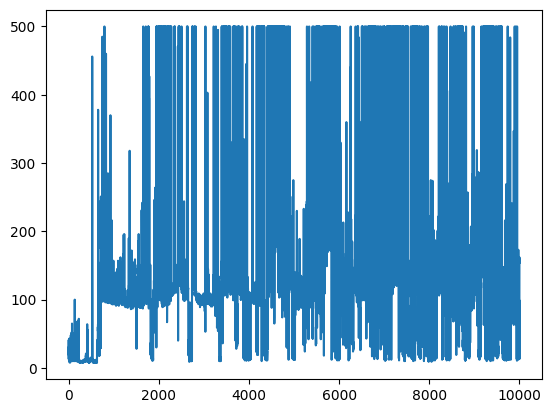

In [ ]:
Num_Treinamentos   = 0
### TREINAMENTO ###
while Num_Treinamentos < Quantidade_de_Treinamentos:
    ### VARIÁVEIS UTILIZADAS ###
    total_count        = 0
    total_episodes     = 0
    brake500           = 0
    indice_final       = 0
    mean_recomp_ep     = []
    indicesToIncrement = []
    Score_List         = []
    stop               = False
    Valor_Anterior     = None
    t0                 = time.time()
    MediaDos100        = deque(maxlen=100)
    indicesToIncrement = deque(maxlen=10_000)
    priorityIncrement = torch.full((len(indicesToIncrement),), 10)

    Estruturar_Agente(Estrutura_da_Rede      = [64,64],
                      Passos_para_Decaimento = 345,
                      Epsilon_Inicial        = 1,
                      Epsilon_Final          = 0.0001,
                      Num_Passos_Aleatorios  = 200,
                      Frames_por_Lote        = 500,
                      Num_Passos_Otimizacao  = 10,
                      Tamanho_Replay_Buffer  = 100_000,
                      Alpha                  = 0.6,
                      Beta                   = 1,
                      Taxa_Aprendizado       = 0.001,
                      Atualizacao_Rede_Alvo  = 0.99)

    for i, data in enumerate(collector):
        indices = rb.extend(data)

        for l, Valor_Atual in enumerate(data["next","step_count"]):
            if (Valor_Anterior is not None):
                if (Valor_Atual < Valor_Anterior):
                    total_episodes += 1
                    MediaDos100.append(Valor_Anterior.item())
                    Score_List.append(Valor_Anterior.item())
                    if ((total_episodes % 100) == 0) : mean_recomp_ep.append(sum(MediaDos100)/100)
                    if (Valor_Anterior.item() == 500): print("alcançou 500!!!!!!")

            Valor_Anterior = Valor_Atual

            if Valor_Atual == 499:
                ############## CONDIÇÕES DE PARADA ################
                brake500 += 1
                if Parada:
                    if brake500 >= Criterio_de_Parada: stop = not stop
                if Avaliacao_no_Treinamento:
                    Avalia_Agente(Num_avaliacoes=1000)
                    eval_score_mean = np.mean(mean_100_eval_score)
                    if eval_score_mean >= 495: stop = not stop
                ###################################################

                # ########################## MUDANÇA IMPLEMENTADA ############################
                GetBest = torch.nonzero(data["next","step_count"] > 299, as_tuple=True)[0]
                for i in GetBest.tolist():
                    indicesToIncrement.append(indices[i].item())
                priorityIncrement = torch.full((len(indicesToIncrement),), 10)
                rb.update_priority(index=indicesToIncrement, priority=priorityIncrement)
                # ############################################################################

        if ((total_episodes >= episodios) and (Parada == False)): break
        elif stop: break

        max_length = rb[:]["next", "step_count"].max()

        if len(rb) > init_rand_steps:
            for _ in range(optim_steps):
                sample, info = rb.sample(200, return_info=True)
                loss_vals = loss(sample)

                rb.update_priority(index=info["index"], priority=loss_vals["loss"])
                rb.update_priority(index=indicesToIncrement, priority=priorityIncrement)

                loss_vals["loss"].backward()
                optim.step()
                optim.zero_grad()
                exploration_module.step(data.numel())
                updater.step()

            torchrl_logger.info(f"Episodes: {total_episodes}, Max num steps: {max_length}, rb length {len(rb)}")
            total_count += data.numel()

    t1 = time.time()
    Avalia_Agente(Num_avaliacoes=1000)
    eval_score_mean = np.mean(mean_100_eval_score)
    Salvar_Dados(Pasta_de_Destino,
                 Num_do_Teste,
                 Score_List,
                 eval_score,
                 sucessos,
                 mean_recomp_ep, Versao)
    Num_Treinamentos += 1
    Num_do_Teste += 1
    torchrl_logger.info(f"solved after {total_count} steps, {total_episodes} episodes and in {t1-t0}s.")

In [ ]:
plt.plot(Score_List)
plt.show()

plt.plot(mean_recomp_ep)
plt.show()

plt.plot(eval_score)
plt.show()

plt.plot(Eval_Score_mean_list)
plt.show()

plt.plot(sucessos)
plt.show()

# Simulações V5

In [ ]:
### CONTROLE DO TREINAMENTO ###
episodios                  = 5_000
Num_do_Teste               = 6
Quantidade_de_Treinamentos = 1
Criterio_de_Parada         = 5
Parada                     = False
Avaliacao_no_Treinamento   = True
Log_Estatico_dos_Result    = True
Pasta_de_Destino           = "V5_test"
Versao                     = "V5"



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Num_Treinamentos   = 0
### TREINAMENTO ###
while Num_Treinamentos < Quantidade_de_Treinamentos:
    ### VARIÁVEIS UTILIZADAS ###
    total_count          = 0
    total_episodes       = 0
    brake500             = 0
    indice_final         = 0
    sequential_500       = 0
    max_sequence         = 0
    mean_recomp_ep       = []
    indicesToIncrement   = []
    Score_List           = []
    Eval_Score_mean_list = []
    stop                 = False
    Valor_Anterior       = None
    t0                   = time.time()
    priorityIncrement    = torch.full((500,), 10)
    MediaDos100          = deque(maxlen=100)

    Estruturar_Agente(Estrutura_da_Rede      = [64,64],
                      Passos_para_Decaimento = 345,
                      Epsilon_Inicial        = 1,
                      Epsilon_Final          = 0.0001,
                      Num_Passos_Aleatorios  = 200,
                      Frames_por_Lote        = 500,
                      Num_Passos_Otimizacao  = 10,
                      Tamanho_Replay_Buffer  = 100_000,
                      Alpha                  = 0.6,
                      Beta                   = 1,
                      Taxa_Aprendizado       = 0.001,
                      Atualizacao_Rede_Alvo  = 0.99)

    for i, data in enumerate(collector):
        indices = rb.extend(data)

        for Valor_Atual in data["next","step_count"]:
            if Valor_Anterior is not None:
                if (Valor_Atual < Valor_Anterior):
                    total_episodes += 1
                    MediaDos100.append(Valor_Anterior.item())
                    Score_List.append(Valor_Anterior.item())
                    if ((total_episodes % 100) == 0) : mean_recomp_ep.append(sum(MediaDos100)/100)
                    if (Valor_Anterior.item() == 500): print("alcançou 500!!!!!!")

                if (Valor_Anterior <= 450):
                    if sequential_500 >= max_sequence:
                        max_sequence = sequential_500
                    sequential_500 = 0
            Valor_Anterior = Valor_Atual

            if Valor_Atual == 499:
                ############## CONDIÇÕES DE PARADA ################
                brake500 += 1
                sequential_500 += 1
                if Parada:
                    if brake500 >= Criterio_de_Parada:
                         stop = not stop
                         print("Critério de parada alcançado!!!")
                if Avaliacao_no_Treinamento:
                    Avalia_Agente(Num_avaliacoes=200)
                    print("Começo das Avaliações!!!")
                    eval_score_mean = np.mean(mean_100_eval_score)
                    Eval_Score_mean_list.append(eval_score_mean)
                    if eval_score_mean >= 495: stop = not stop
                ###################################################

                ############################ MUDANÇA IMPLEMENTADA ########################################
                indice_final = indices[-1]
                indice_500 = torch.nonzero(data["next","step_count"] == 499, as_tuple=True)
                indicesToIncrement = torch.arange(indice_final.item()+1 - 499 + indice_500[0].item()-499,
                                                  indice_final.item()+1 - 499 + indice_500[0].item()+1)
                rb.update_priority(index=indicesToIncrement, priority=priorityIncrement)
                ##########################################################################################

        if ((total_episodes >= episodios) and (Parada == False)): break
        elif stop: break

        max_length = rb[:]["next", "step_count"].max()

        if len(rb) > init_rand_steps:
            for _ in range(optim_steps):
                sample, info = rb.sample(200, return_info=True)
                loss_vals = loss(sample)

                rb.update_priority(index=info["index"], priority=loss_vals["loss"])

                loss_vals["loss"].backward()
                optim.step()
                optim.zero_grad()
                exploration_module.step(data.numel())
                updater.step()

            torchrl_logger.info(f"Episodes: {total_episodes}, Max num steps: {max_length}, rb length {len(rb)}, Max score: {brake500}")
            if (Log_Estatico_dos_Result): clear_output(wait=True)
            total_count += data.numel()

    t1 = time.time()
    Avalia_Agente(Num_avaliacoes=1000)
    eval_score_mean = np.mean(mean_100_eval_score)
    Salvar_Dados(Pasta_de_Destino,
                 Num_do_Teste,
                 Score_List,
                 eval_score,
                 sucessos,
                 mean_recomp_ep, Versao)
    Num_Treinamentos += 1
    Num_do_Teste += 1
    torchrl_logger.info(f"solved after {total_count} steps, {total_episodes} episodes, and got max score {brake500} times, in {t1-t0}s.")



Começo das Avaliações!!!


2024-06-17 17:33:18,678 [torchrl][INFO] solved after 375500 steps, 4974 episodes, and got max score 24 times, in 2660.2077226638794s.


DataFrame salvo em /content/drive/My Drive/DADOS IA PYTORCH1/V5_test/DADOS XLSX/Result_of_Epoch_6_V5.xlsx
Dados salvos com sucesso!!!!


In [ ]:
print(max_sequence)

1


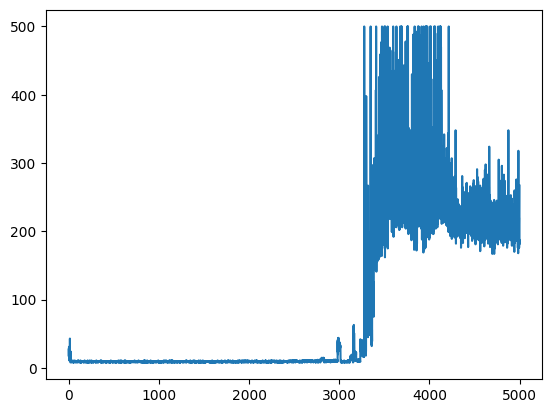

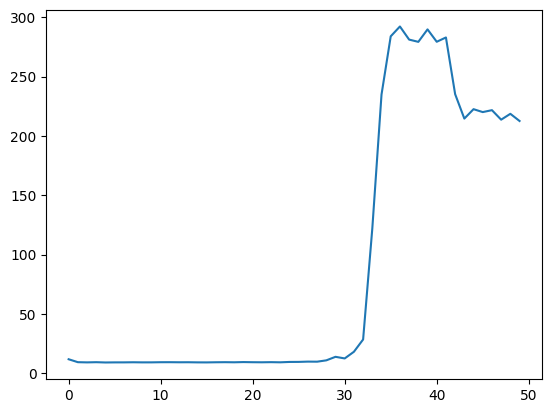

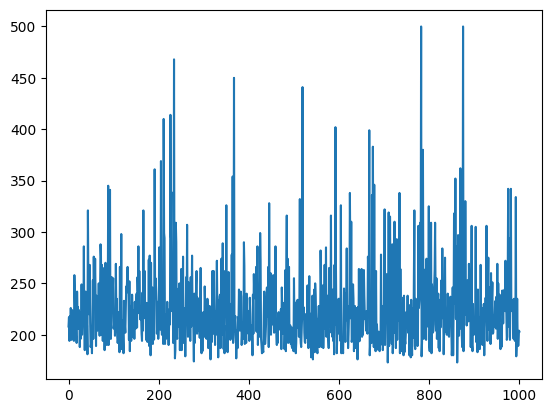

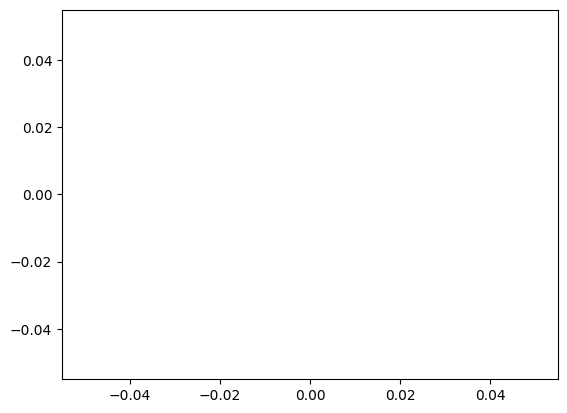

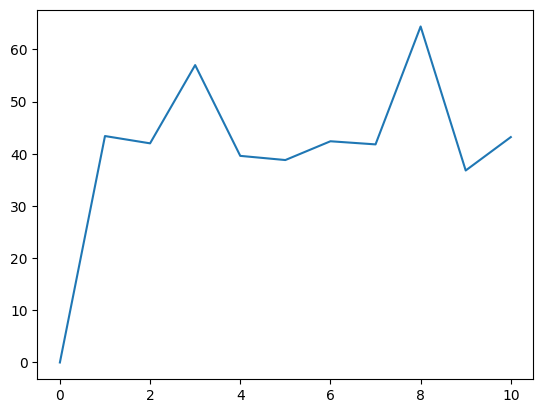

In [ ]:
plt.plot(Score_List)
plt.show()

plt.plot(mean_recomp_ep)
plt.show()

plt.plot(eval_score)
plt.show()

plt.plot(Eval_Score_mean_list)
plt.show()

plt.plot(sucessos)
plt.show()

# Simulações V6

In [ ]:
### CONTROLE DO TREINAMENTO ###
episodios                  = 5_000
Num_do_Teste               = 1
Quantidade_de_Treinamentos = 3
Criterio_de_Parada         = 5
Parada                     = True
Avaliacao_no_Treinamento   = False
Pasta_de_Destino           = "V6_brake5"
Versao                     = "V6"

In [ ]:
Num_Treinamentos   = 0
### TREINAMENTO ###
while Num_Treinamentos < Quantidade_de_Treinamentos:
    ### VARIÁVEIS UTILIZADAS ###
    total_count        = 0
    total_episodes     = 0
    brake500           = 0
    indice_final       = 0
    mean_recomp_ep     = []
    indicesToIncrement = []
    Score_List         = []
    stop               = False
    Valor_Anterior     = None
    t0                 = time.time()
    MediaDos100        = deque(maxlen=100)
    indicesToIncrement = deque(maxlen=10_000)
    priorityIncrement = torch.full((len(indicesToIncrement),), 10)

    Estruturar_Agente(Estrutura_da_Rede      = [64,64],
                      Passos_para_Decaimento = 345,
                      Epsilon_Inicial        = 1,
                      Epsilon_Final          = 0.0001,
                      Num_Passos_Aleatorios  = 200,
                      Frames_por_Lote        = 500,
                      Num_Passos_Otimizacao  = 10,
                      Tamanho_Replay_Buffer  = 100_000,
                      Alpha                  = 0.6,
                      Beta                   = 1,
                      Taxa_Aprendizado       = 0.001,
                      Atualizacao_Rede_Alvo  = 0.99)

    for i, data in enumerate(collector):
        indices = rb.extend(data)

        for Valor_Atual in data["next","step_count"]:
            if (Valor_Anterior is not None):
                if (Valor_Atual < Valor_Anterior):
                    total_episodes += 1
                    MediaDos100.append(Valor_Anterior.item())
                    Score_List.append(Valor_Anterior.item())
                    if ((total_episodes % 100) == 0) : mean_recomp_ep.append(sum(MediaDos100)/100)
                    if (Valor_Anterior.item() == 500): print("alcançou 500!!!!!!")
            Valor_Anterior = Valor_Atual

            if Valor_Atual == 499:
                ############## CONDIÇÕES DE PARADA ################
                brake500 += 1
                if Parada:
                    if brake500 >= Criterio_de_Parada: stop = not stop
                if Avaliacao_no_Treinamento:
                    Avalia_Agente(Num_avaliacoes=1000)
                    eval_score_mean = np.mean(mean_100_eval_score)
                    if eval_score_mean >= 495: stop = not stop
                ###################################################

                ############################ MUDANÇA IMPLEMENTADA #################################
                indice_final = indices[-1]
                indice_500   = torch.nonzero(data["next","step_count"] == 499, as_tuple=True)
                indicesIncrement = range(indice_final.item()+1 - 499 + indice_500[0].item()-499,
                                         indice_final.item()+1 - 499 + indice_500[0].item()+1)
                for i in indicesIncrement:
                    indicesToIncrement.append(i)
                priorityIncrement = torch.full((len(indicesToIncrement),), 10)
                rb.update_priority(index=indicesToIncrement, priority=priorityIncrement)
                ###################################################################################

        if ((total_episodes >= episodios) and (Parada == False)): break
        elif stop: break

        max_length = rb[:]["next", "step_count"].max()

        if len(rb) > init_rand_steps:
            for _ in range(optim_steps):
                sample, info = rb.sample(200, return_info=True)
                loss_vals = loss(sample)

                rb.update_priority(index=info["index"], priority=loss_vals["loss"])
                rb.update_priority(index=indicesToIncrement, priority=priorityIncrement)

                loss_vals["loss"].backward()
                optim.step()
                optim.zero_grad()
                exploration_module.step(data.numel())
                updater.step()

            torchrl_logger.info(f"Episodes: {total_episodes}, Max num steps: {max_length}, rb length {len(rb)}")
            total_count += data.numel()

    t1 = time.time()
    Avalia_Agente(Num_avaliacoes=1000)
    eval_score_mean = np.mean(mean_100_eval_score)
    Salvar_Dados(Pasta_de_Destino,
                 Num_do_Teste,
                 Score_List,
                 eval_score,
                 sucessos,
                 mean_recomp_ep, Versao)
    Num_Treinamentos += 1
    Num_do_Teste += 1
    torchrl_logger.info(f"solved after {total_count} steps, {total_episodes} episodes and in {t1-t0}s.")

/usr/local/lib/python3.10/dist-packages/torchrl/envs/common.py:2989: DeprecationWarning: Your wrapper was not given a device. Currently, this value will default to 'cpu'. From v0.5 it will default to `None`. With a device of None, no device casting is performed and the resulting tensordicts are deviceless. Please set your device accordingly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/usr/local/lib/python3.10/dist-packages/torchrl/modules/tensordict_module/exploration.py:97: UserWarning: eps_init should be a float.
  warnings.warn("eps_init should be a float.")
/usr/local/lib/python3.10/dist-packages/torchrl/collectors/collectors.py:603: UserWarning: init_random_frames (200) is not exactly a multiple of frames_per_batch (500),  this result

alcançou 500!!!!!!


2024-06-16 16:20:49,413 [torchrl][INFO] Episodes: 3548, Max num steps: 500, rb length 41500
2024-06-16 16:20:50,198 [torchrl][INFO] Episodes: 3549, Max num steps: 500, rb length 42000
2024-06-16 16:20:50,986 [torchrl][INFO] Episodes: 3550, Max num steps: 500, rb length 42500
2024-06-16 16:20:51,750 [torchrl][INFO] Episodes: 3554, Max num steps: 500, rb length 43000
2024-06-16 16:20:52,529 [torchrl][INFO] Episodes: 3555, Max num steps: 500, rb length 43500
2024-06-16 16:20:53,300 [torchrl][INFO] Episodes: 3557, Max num steps: 500, rb length 44000
2024-06-16 16:20:54,084 [torchrl][INFO] Episodes: 3559, Max num steps: 500, rb length 44500
2024-06-16 16:20:55,086 [torchrl][INFO] Episodes: 3561, Max num steps: 500, rb length 45000
2024-06-16 16:20:56,184 [torchrl][INFO] Episodes: 3565, Max num steps: 500, rb length 45500
2024-06-16 16:20:57,275 [torchrl][INFO] Episodes: 3571, Max num steps: 500, rb length 46000
2024-06-16 16:20:58,423 [torchrl][INFO] Episodes: 3574, Max num steps: 500, rb l

alcançou 500!!!!!!


2024-06-16 16:21:23,748 [torchrl][INFO] Episodes: 3639, Max num steps: 500, rb length 61500
2024-06-16 16:21:24,978 [torchrl][INFO] Episodes: 3641, Max num steps: 500, rb length 62000
2024-06-16 16:21:26,036 [torchrl][INFO] Episodes: 3642, Max num steps: 500, rb length 62500
2024-06-16 16:21:27,175 [torchrl][INFO] Episodes: 3644, Max num steps: 500, rb length 63000
2024-06-16 16:21:28,357 [torchrl][INFO] Episodes: 3645, Max num steps: 500, rb length 63500
2024-06-16 16:21:29,134 [torchrl][INFO] Episodes: 3647, Max num steps: 500, rb length 64000
2024-06-16 16:21:29,919 [torchrl][INFO] Episodes: 3649, Max num steps: 500, rb length 64500
2024-06-16 16:21:30,697 [torchrl][INFO] Episodes: 3651, Max num steps: 500, rb length 65000
2024-06-16 16:21:31,474 [torchrl][INFO] Episodes: 3654, Max num steps: 500, rb length 65500
2024-06-16 16:21:32,246 [torchrl][INFO] Episodes: 3655, Max num steps: 500, rb length 66000
2024-06-16 16:21:33,026 [torchrl][INFO] Episodes: 3657, Max num steps: 500, rb l

alcançou 500!!!!!!


2024-06-16 16:21:35,359 [torchrl][INFO] Episodes: 3662, Max num steps: 500, rb length 68000
2024-06-16 16:21:36,146 [torchrl][INFO] Episodes: 3665, Max num steps: 500, rb length 68500
2024-06-16 16:21:36,924 [torchrl][INFO] Episodes: 3667, Max num steps: 500, rb length 69000
2024-06-16 16:21:37,713 [torchrl][INFO] Episodes: 3669, Max num steps: 500, rb length 69500
2024-06-16 16:21:38,572 [torchrl][INFO] Episodes: 3670, Max num steps: 500, rb length 70000
2024-06-16 16:21:39,875 [torchrl][INFO] Episodes: 3671, Max num steps: 500, rb length 70500
2024-06-16 16:21:40,950 [torchrl][INFO] Episodes: 3673, Max num steps: 500, rb length 71000
2024-06-16 16:21:42,139 [torchrl][INFO] Episodes: 3675, Max num steps: 500, rb length 71500
2024-06-16 16:21:43,126 [torchrl][INFO] Episodes: 3677, Max num steps: 500, rb length 72000
2024-06-16 16:21:43,902 [torchrl][INFO] Episodes: 3678, Max num steps: 500, rb length 72500
2024-06-16 16:21:44,686 [torchrl][INFO] Episodes: 3680, Max num steps: 500, rb l

alcançou 500!!!!!!


2024-06-16 16:21:57,061 [torchrl][INFO] Episodes: 3702, Max num steps: 500, rb length 80000


alcançou 500!!!!!!


2024-06-16 16:27:33,380 [torchrl][INFO] solved after 80000 steps, 3703 episodes and in 145.12330055236816s.


DataFrame salvo em /content/drive/My Drive/DADOS IA PYTORCH1/V6_brake5/DADOS XLSX/Result_of_Epoch_1_V6.xlsx
Dados salvos com sucesso!!!!


/usr/local/lib/python3.10/dist-packages/torchrl/envs/common.py:2989: DeprecationWarning: Your wrapper was not given a device. Currently, this value will default to 'cpu'. From v0.5 it will default to `None`. With a device of None, no device casting is performed and the resulting tensordicts are deviceless. Please set your device accordingly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/usr/local/lib/python3.10/dist-packages/torchrl/modules/tensordict_module/exploration.py:97: UserWarning: eps_init should be a float.
  warnings.warn("eps_init should be a float.")
/usr/local/lib/python3.10/dist-packages/torchrl/collectors/collectors.py:603: UserWarning: init_random_frames (200) is not exactly a multiple of frames_per_batch (500),  this result

alcançou 500!!!!!!


2024-06-16 16:28:36,717 [torchrl][INFO] Episodes: 3252, Max num steps: 500, rb length 35500
2024-06-16 16:28:37,492 [torchrl][INFO] Episodes: 3257, Max num steps: 500, rb length 36000
2024-06-16 16:28:38,254 [torchrl][INFO] Episodes: 3260, Max num steps: 500, rb length 36500
2024-06-16 16:28:39,031 [torchrl][INFO] Episodes: 3269, Max num steps: 500, rb length 37000
2024-06-16 16:28:39,952 [torchrl][INFO] Episodes: 3275, Max num steps: 500, rb length 37500


alcançou 500!!!!!!


2024-06-16 16:28:41,019 [torchrl][INFO] Episodes: 3276, Max num steps: 500, rb length 38000
2024-06-16 16:28:42,091 [torchrl][INFO] Episodes: 3277, Max num steps: 500, rb length 38500


alcançou 500!!!!!!


2024-06-16 16:28:43,281 [torchrl][INFO] Episodes: 3278, Max num steps: 500, rb length 39000
2024-06-16 16:28:44,261 [torchrl][INFO] Episodes: 3281, Max num steps: 500, rb length 39500
2024-06-16 16:28:45,036 [torchrl][INFO] Episodes: 3283, Max num steps: 500, rb length 40000
2024-06-16 16:28:45,791 [torchrl][INFO] Episodes: 3285, Max num steps: 500, rb length 40500
2024-06-16 16:28:46,582 [torchrl][INFO] Episodes: 3289, Max num steps: 500, rb length 41000
2024-06-16 16:28:47,366 [torchrl][INFO] Episodes: 3298, Max num steps: 500, rb length 41500
2024-06-16 16:28:48,146 [torchrl][INFO] Episodes: 3301, Max num steps: 500, rb length 42000
2024-06-16 16:28:48,932 [torchrl][INFO] Episodes: 3306, Max num steps: 500, rb length 42500
2024-06-16 16:28:49,709 [torchrl][INFO] Episodes: 3308, Max num steps: 500, rb length 43000
2024-06-16 16:28:50,647 [torchrl][INFO] Episodes: 3310, Max num steps: 500, rb length 43500
2024-06-16 16:28:51,414 [torchrl][INFO] Episodes: 3313, Max num steps: 500, rb l

alcançou 500!!!!!!


2024-06-16 16:28:57,012 [torchrl][INFO] Episodes: 3327, Max num steps: 500, rb length 47000
2024-06-16 16:28:58,185 [torchrl][INFO] Episodes: 3330, Max num steps: 500, rb length 47500
2024-06-16 16:28:59,093 [torchrl][INFO] Episodes: 3331, Max num steps: 500, rb length 48000
2024-06-16 16:28:59,874 [torchrl][INFO] Episodes: 3335, Max num steps: 500, rb length 48500
2024-06-16 16:29:00,663 [torchrl][INFO] Episodes: 3337, Max num steps: 500, rb length 49000
2024-06-16 16:29:01,430 [torchrl][INFO] Episodes: 3341, Max num steps: 500, rb length 49500
2024-06-16 16:29:02,195 [torchrl][INFO] Episodes: 3343, Max num steps: 500, rb length 50000
2024-06-16 16:29:02,977 [torchrl][INFO] Episodes: 3346, Max num steps: 500, rb length 50500
2024-06-16 16:29:03,763 [torchrl][INFO] Episodes: 3349, Max num steps: 500, rb length 51000
2024-06-16 16:29:04,546 [torchrl][INFO] Episodes: 3350, Max num steps: 500, rb length 51500


alcançou 500!!!!!!


2024-06-16 16:32:03,805 [torchrl][INFO] solved after 51500 steps, 3353 episodes and in 91.87347078323364s.


DataFrame salvo em /content/drive/My Drive/DADOS IA PYTORCH1/V6_brake5/DADOS XLSX/Result_of_Epoch_2_V6.xlsx
Dados salvos com sucesso!!!!


/usr/local/lib/python3.10/dist-packages/torchrl/envs/common.py:2989: DeprecationWarning: Your wrapper was not given a device. Currently, this value will default to 'cpu'. From v0.5 it will default to `None`. With a device of None, no device casting is performed and the resulting tensordicts are deviceless. Please set your device accordingly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/usr/local/lib/python3.10/dist-packages/torchrl/modules/tensordict_module/exploration.py:97: UserWarning: eps_init should be a float.
  warnings.warn("eps_init should be a float.")
/usr/local/lib/python3.10/dist-packages/torchrl/collectors/collectors.py:603: UserWarning: init_random_frames (200) is not exactly a multiple of frames_per_batch (500),  this result

alcançou 500!!!!!!


2024-06-16 16:33:23,974 [torchrl][INFO] Episodes: 3191, Max num steps: 500, rb length 44500
2024-06-16 16:33:24,755 [torchrl][INFO] Episodes: 3193, Max num steps: 500, rb length 45000


alcançou 500!!!!!!


2024-06-16 16:33:25,548 [torchrl][INFO] Episodes: 3195, Max num steps: 500, rb length 45500
2024-06-16 16:33:26,483 [torchrl][INFO] Episodes: 3199, Max num steps: 500, rb length 46000
2024-06-16 16:33:27,296 [torchrl][INFO] Episodes: 3201, Max num steps: 500, rb length 46500
2024-06-16 16:33:28,083 [torchrl][INFO] Episodes: 3204, Max num steps: 500, rb length 47000
2024-06-16 16:33:28,860 [torchrl][INFO] Episodes: 3206, Max num steps: 500, rb length 47500
2024-06-16 16:33:29,646 [torchrl][INFO] Episodes: 3208, Max num steps: 500, rb length 48000
2024-06-16 16:33:30,661 [torchrl][INFO] Episodes: 3211, Max num steps: 500, rb length 48500
2024-06-16 16:33:31,725 [torchrl][INFO] Episodes: 3213, Max num steps: 500, rb length 49000
2024-06-16 16:33:32,815 [torchrl][INFO] Episodes: 3214, Max num steps: 500, rb length 49500
2024-06-16 16:33:34,006 [torchrl][INFO] Episodes: 3217, Max num steps: 500, rb length 50000
2024-06-16 16:33:34,806 [torchrl][INFO] Episodes: 3218, Max num steps: 500, rb l

alcançou 500!!!!!!


2024-06-16 16:34:06,780 [torchrl][INFO] Episodes: 3288, Max num steps: 500, rb length 69000
2024-06-16 16:34:07,563 [torchrl][INFO] Episodes: 3289, Max num steps: 500, rb length 69500
2024-06-16 16:34:08,337 [torchrl][INFO] Episodes: 3290, Max num steps: 500, rb length 70000


alcançou 500!!!!!!


2024-06-16 16:34:09,134 [torchrl][INFO] Episodes: 3293, Max num steps: 500, rb length 70500
2024-06-16 16:34:09,898 [torchrl][INFO] Episodes: 3294, Max num steps: 500, rb length 71000
2024-06-16 16:34:10,846 [torchrl][INFO] Episodes: 3295, Max num steps: 500, rb length 71500
2024-06-16 16:34:11,627 [torchrl][INFO] Episodes: 3297, Max num steps: 500, rb length 72000
2024-06-16 16:34:12,403 [torchrl][INFO] Episodes: 3300, Max num steps: 500, rb length 72500
2024-06-16 16:34:13,208 [torchrl][INFO] Episodes: 3302, Max num steps: 500, rb length 73000
2024-06-16 16:34:14,304 [torchrl][INFO] Episodes: 3304, Max num steps: 500, rb length 73500
2024-06-16 16:34:15,377 [torchrl][INFO] Episodes: 3306, Max num steps: 500, rb length 74000
2024-06-16 16:34:16,558 [torchrl][INFO] Episodes: 3308, Max num steps: 500, rb length 74500
2024-06-16 16:34:17,742 [torchrl][INFO] Episodes: 3310, Max num steps: 500, rb length 75000


alcançou 500!!!!!!


2024-06-16 16:39:38,539 [torchrl][INFO] solved after 75000 steps, 3311 episodes and in 134.49317026138306s.


DataFrame salvo em /content/drive/My Drive/DADOS IA PYTORCH1/V6_brake5/DADOS XLSX/Result_of_Epoch_3_V6.xlsx
Dados salvos com sucesso!!!!


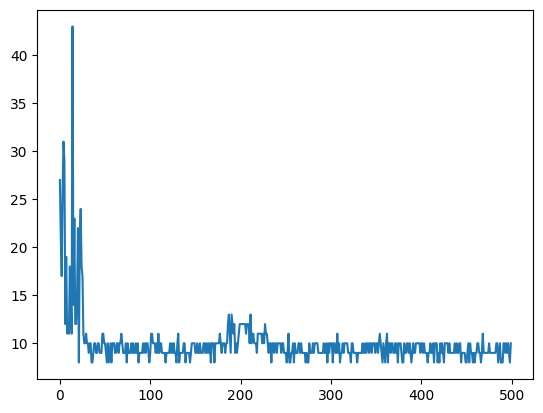

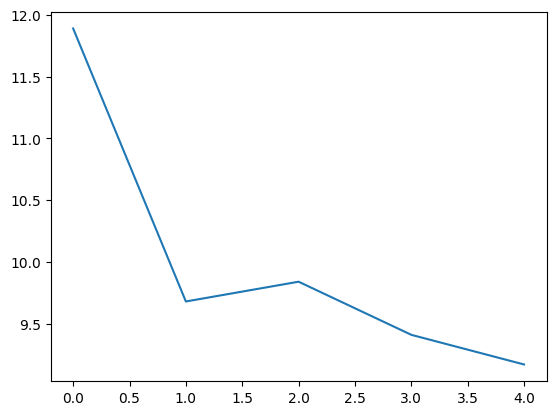

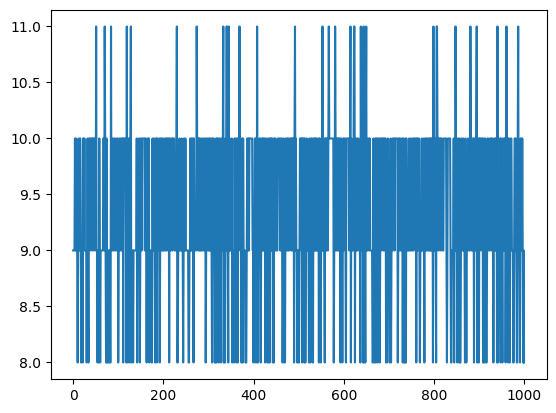

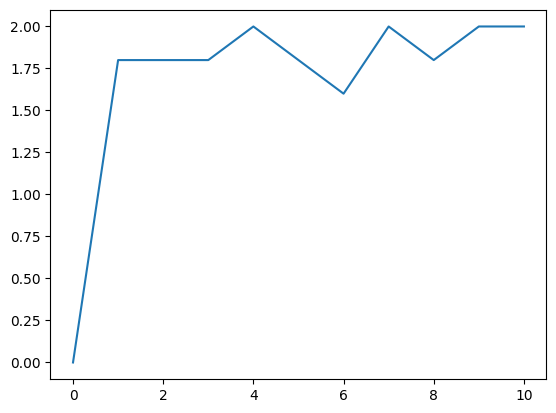

In [ ]:
plt.plot(Score_List)
plt.show()

plt.plot(mean_recomp_ep)
plt.show()

plt.plot(eval_score)
plt.show()

plt.plot(sucessos)
plt.show()

# Simulações V7

In [ ]:
### CONTROLE DO TREINAMENTO ###
episodios                  = 5_000
Num_do_Teste               = 1
Quantidade_de_Treinamentos = 3
Criterio_de_Parada         = 5
Parada                     = True
Avaliacao_no_Treinamento   = False
Pasta_de_Destino           = "V7_brake5"
Versao                     = "V7"

In [ ]:
Num_Treinamentos   = 0
### TREINAMENTO ###
while Num_Treinamentos < Quantidade_de_Treinamentos:
    ### VARIÁVEIS UTILIZADAS ###
    total_count        = 0
    total_episodes     = 0
    brake500           = 0
    indice_final       = 0
    mean_recomp_ep     = []
    indicesToIncrement = []
    Score_List         = []
    stop               = False
    Valor_Anterior     = None
    t0                 = time.time()
    MediaDos100        = deque(maxlen=100)
    indicesToIncrement = deque(maxlen=10_000)
    priorityIncrement = torch.full((len(indicesToIncrement),), 10)

    Estruturar_Agente(Estrutura_da_Rede      = [64,64],
                      Passos_para_Decaimento = 345,
                      Epsilon_Inicial        = 1,
                      Epsilon_Final          = 0.0001,
                      Num_Passos_Aleatorios  = 200,
                      Frames_por_Lote        = 500,
                      Num_Passos_Otimizacao  = 10,
                      Tamanho_Replay_Buffer  = 100_000,
                      Alpha                  = 0.6,
                      Beta                   = 1,
                      Taxa_Aprendizado       = 0.001,
                      Atualizacao_Rede_Alvo  = 0.99)

    for i, data in enumerate(collector):
        indices = rb.extend(data)

        for l, Valor_Atual in enumerate(data["next","step_count"]):
            if (Valor_Anterior is not None):
                if (Valor_Atual < Valor_Anterior):
                    total_episodes += 1
                    MediaDos100.append(Valor_Anterior.item())
                    Score_List.append(Valor_Anterior.item())
                    if ((total_episodes % 100) == 0) : mean_recomp_ep.append(sum(MediaDos100)/100)
                    if (Valor_Anterior.item() == 500): print("alcançou 500!!!!!!")

                    ############################ MUDANÇA IMPLEMENTADA ############################
                    if (Valor_Anterior <= 100):
                        if ((l - Valor_Anterior) >= 0):
                            Obter_Piores = data["next","step_count"][l-Valor_Anterior:l]
                        else:
                            Obter_Piores = data["next","step_count"][:l]
                        for piores in Obter_Piores:
                            indicesToIncrement.append(indices[piores].item())
                        priorityIncrement = torch.full((len(indicesToIncrement),), 10)
                        rb.update_priority(index=indicesToIncrement, priority=priorityIncrement)
                    ##############################################################################
            Valor_Anterior = Valor_Atual

            if Valor_Atual == 499:
                ############## CONDIÇÕES DE PARADA ################
                brake500 += 1
                if Parada:
                    if brake500 >= Criterio_de_Parada: stop = not stop
                if Avaliacao_no_Treinamento:
                    Avalia_Agente(Num_avaliacoes=1000)
                    eval_score_mean = np.mean(mean_100_eval_score)
                    if eval_score_mean >= 495: stop = not stop
                ###################################################

                # ########################## MUDANÇA IMPLEMENTADA ############################
                # GetBest = torch.nonzero(data["next","step_count"] < 100, as_tuple=True)[0]
                # for i in GetBest.tolist():
                #     indicesToIncrement.append(indices[i].item())
                # priorityIncrement = torch.full((len(indicesToIncrement),), 10)
                # rb.update_priority(index=indicesToIncrement, priority=priorityIncrement)
                # ############################################################################

        if ((total_episodes >= episodios) and (Parada == False)): break
        elif stop: break

        max_length = rb[:]["next", "step_count"].max()

        if len(rb) > init_rand_steps:
            for _ in range(optim_steps):
                sample, info = rb.sample(200, return_info=True)
                loss_vals = loss(sample)

                rb.update_priority(index=info["index"], priority=loss_vals["loss"])
                rb.update_priority(index=indicesToIncrement, priority=priorityIncrement)

                loss_vals["loss"].backward()
                optim.step()
                optim.zero_grad()
                exploration_module.step(data.numel())
                updater.step()

            torchrl_logger.info(f"Episodes: {total_episodes}, Max num steps: {max_length}, rb length {len(rb)}")
            total_count += data.numel()

    t1 = time.time()
    Avalia_Agente(Num_avaliacoes=1000)
    eval_score_mean = np.mean(mean_100_eval_score)
    Salvar_Dados(Pasta_de_Destino,
                 Num_do_Teste,
                 Score_List,
                 eval_score,
                 sucessos,
                 mean_recomp_ep, Versao)
    Num_Treinamentos += 1
    Num_do_Teste += 1
    torchrl_logger.info(f"solved after {total_count} steps, {total_episodes} episodes and in {t1-t0}s.")

/usr/local/lib/python3.10/dist-packages/torchrl/envs/common.py:2989: DeprecationWarning: Your wrapper was not given a device. Currently, this value will default to 'cpu'. From v0.5 it will default to `None`. With a device of None, no device casting is performed and the resulting tensordicts are deviceless. Please set your device accordingly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/usr/local/lib/python3.10/dist-packages/torchrl/modules/tensordict_module/exploration.py:97: UserWarning: eps_init should be a float.
  warnings.warn("eps_init should be a float.")
/usr/local/lib/python3.10/dist-packages/torchrl/collectors/collectors.py:603: UserWarning: init_random_frames (200) is not exactly a multiple of frames_per_batch (500),  this result

alcançou 500!!!!!!


2024-06-16 18:14:35,011 [torchrl][INFO] Episodes: 3421, Max num steps: 500, rb length 42500
2024-06-16 18:14:35,832 [torchrl][INFO] Episodes: 3428, Max num steps: 500, rb length 43000
2024-06-16 18:14:36,637 [torchrl][INFO] Episodes: 3429, Max num steps: 500, rb length 43500


alcançou 500!!!!!!


2024-06-16 18:14:37,614 [torchrl][INFO] Episodes: 3431, Max num steps: 500, rb length 44000
2024-06-16 18:14:38,414 [torchrl][INFO] Episodes: 3433, Max num steps: 500, rb length 44500
2024-06-16 18:14:39,200 [torchrl][INFO] Episodes: 3434, Max num steps: 500, rb length 45000
2024-06-16 18:14:40,012 [torchrl][INFO] Episodes: 3436, Max num steps: 500, rb length 45500
2024-06-16 18:14:40,815 [torchrl][INFO] Episodes: 3437, Max num steps: 500, rb length 46000
2024-06-16 18:14:41,637 [torchrl][INFO] Episodes: 3439, Max num steps: 500, rb length 46500
2024-06-16 18:14:42,659 [torchrl][INFO] Episodes: 3440, Max num steps: 500, rb length 47000


alcançou 500!!!!!!


2024-06-16 18:14:43,771 [torchrl][INFO] Episodes: 3441, Max num steps: 500, rb length 47500
2024-06-16 18:14:44,905 [torchrl][INFO] Episodes: 3443, Max num steps: 500, rb length 48000
2024-06-16 18:14:46,190 [torchrl][INFO] Episodes: 3446, Max num steps: 500, rb length 48500
2024-06-16 18:14:47,302 [torchrl][INFO] Episodes: 3448, Max num steps: 500, rb length 49000


alcançou 500!!!!!!


2024-06-16 18:14:48,134 [torchrl][INFO] Episodes: 3449, Max num steps: 500, rb length 49500
2024-06-16 18:14:48,952 [torchrl][INFO] Episodes: 3450, Max num steps: 500, rb length 50000
2024-06-16 18:14:49,748 [torchrl][INFO] Episodes: 3451, Max num steps: 500, rb length 50500
2024-06-16 18:14:50,547 [torchrl][INFO] Episodes: 3453, Max num steps: 500, rb length 51000
2024-06-16 18:14:51,341 [torchrl][INFO] Episodes: 3455, Max num steps: 500, rb length 51500
2024-06-16 18:14:52,138 [torchrl][INFO] Episodes: 3458, Max num steps: 500, rb length 52000
2024-06-16 18:14:53,098 [torchrl][INFO] Episodes: 3460, Max num steps: 500, rb length 52500
2024-06-16 18:14:53,889 [torchrl][INFO] Episodes: 3461, Max num steps: 500, rb length 53000
2024-06-16 18:14:54,688 [torchrl][INFO] Episodes: 3462, Max num steps: 500, rb length 53500
2024-06-16 18:14:55,486 [torchrl][INFO] Episodes: 3464, Max num steps: 500, rb length 54000
2024-06-16 18:14:56,293 [torchrl][INFO] Episodes: 3466, Max num steps: 500, rb l

alcançou 500!!!!!!


2024-06-16 18:19:18,692 [torchrl][INFO] solved after 55500 steps, 3472 episodes and in 109.76041555404663s.


DataFrame salvo em /content/drive/My Drive/DADOS IA PYTORCH1/V7_brake5/DADOS XLSX/Result_of_Epoch_1_V7.xlsx
Dados salvos com sucesso!!!!


/usr/local/lib/python3.10/dist-packages/torchrl/envs/common.py:2989: DeprecationWarning: Your wrapper was not given a device. Currently, this value will default to 'cpu'. From v0.5 it will default to `None`. With a device of None, no device casting is performed and the resulting tensordicts are deviceless. Please set your device accordingly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/usr/local/lib/python3.10/dist-packages/torchrl/modules/tensordict_module/exploration.py:97: UserWarning: eps_init should be a float.
  warnings.warn("eps_init should be a float.")
/usr/local/lib/python3.10/dist-packages/torchrl/collectors/collectors.py:603: UserWarning: init_random_frames (200) is not exactly a multiple of frames_per_batch (500),  this result

alcançou 500!!!!!!


2024-06-16 18:20:39,765 [torchrl][INFO] Episodes: 3060, Max num steps: 500, rb length 40500
2024-06-16 18:20:40,568 [torchrl][INFO] Episodes: 3062, Max num steps: 500, rb length 41000
2024-06-16 18:20:41,528 [torchrl][INFO] Episodes: 3064, Max num steps: 500, rb length 41500
2024-06-16 18:20:42,329 [torchrl][INFO] Episodes: 3065, Max num steps: 500, rb length 42000
2024-06-16 18:20:43,127 [torchrl][INFO] Episodes: 3068, Max num steps: 500, rb length 42500
2024-06-16 18:20:43,906 [torchrl][INFO] Episodes: 3069, Max num steps: 500, rb length 43000
2024-06-16 18:20:44,710 [torchrl][INFO] Episodes: 3072, Max num steps: 500, rb length 43500
2024-06-16 18:20:45,588 [torchrl][INFO] Episodes: 3077, Max num steps: 500, rb length 44000
2024-06-16 18:20:46,724 [torchrl][INFO] Episodes: 3081, Max num steps: 500, rb length 44500
2024-06-16 18:20:47,847 [torchrl][INFO] Episodes: 3083, Max num steps: 500, rb length 45000
2024-06-16 18:20:49,049 [torchrl][INFO] Episodes: 3086, Max num steps: 500, rb l

alcançou 500!!!!!!


2024-06-16 18:20:50,923 [torchrl][INFO] Episodes: 3090, Max num steps: 500, rb length 46500
2024-06-16 18:20:51,722 [torchrl][INFO] Episodes: 3091, Max num steps: 500, rb length 47000
2024-06-16 18:20:52,519 [torchrl][INFO] Episodes: 3094, Max num steps: 500, rb length 47500
2024-06-16 18:20:53,295 [torchrl][INFO] Episodes: 3096, Max num steps: 500, rb length 48000
2024-06-16 18:20:54,087 [torchrl][INFO] Episodes: 3099, Max num steps: 500, rb length 48500
2024-06-16 18:20:54,890 [torchrl][INFO] Episodes: 3100, Max num steps: 500, rb length 49000
2024-06-16 18:20:55,709 [torchrl][INFO] Episodes: 3103, Max num steps: 500, rb length 49500
2024-06-16 18:20:56,509 [torchrl][INFO] Episodes: 3105, Max num steps: 500, rb length 50000
2024-06-16 18:20:57,454 [torchrl][INFO] Episodes: 3106, Max num steps: 500, rb length 50500
2024-06-16 18:20:58,245 [torchrl][INFO] Episodes: 3109, Max num steps: 500, rb length 51000
2024-06-16 18:20:59,042 [torchrl][INFO] Episodes: 3111, Max num steps: 500, rb l

alcançou 500!!!!!!


2024-06-16 18:21:13,444 [torchrl][INFO] Episodes: 3141, Max num steps: 500, rb length 59500
2024-06-16 18:21:14,241 [torchrl][INFO] Episodes: 3143, Max num steps: 500, rb length 60000
2024-06-16 18:21:15,308 [torchrl][INFO] Episodes: 3144, Max num steps: 500, rb length 60500
2024-06-16 18:21:16,418 [torchrl][INFO] Episodes: 3146, Max num steps: 500, rb length 61000
2024-06-16 18:21:17,570 [torchrl][INFO] Episodes: 3147, Max num steps: 500, rb length 61500
2024-06-16 18:21:18,788 [torchrl][INFO] Episodes: 3149, Max num steps: 500, rb length 62000
2024-06-16 18:21:19,629 [torchrl][INFO] Episodes: 3150, Max num steps: 500, rb length 62500
2024-06-16 18:21:20,416 [torchrl][INFO] Episodes: 3152, Max num steps: 500, rb length 63000
2024-06-16 18:21:21,225 [torchrl][INFO] Episodes: 3154, Max num steps: 500, rb length 63500
2024-06-16 18:21:22,022 [torchrl][INFO] Episodes: 3155, Max num steps: 500, rb length 64000
2024-06-16 18:21:22,820 [torchrl][INFO] Episodes: 3156, Max num steps: 500, rb l

alcançou 500!!!!!!


2024-06-16 18:21:23,626 [torchrl][INFO] Episodes: 3158, Max num steps: 500, rb length 65000
2024-06-16 18:21:24,403 [torchrl][INFO] Episodes: 3159, Max num steps: 500, rb length 65500


alcançou 500!!!!!!


2024-06-16 18:27:11,178 [torchrl][INFO] solved after 65500 steps, 3160 episodes and in 126.41513133049011s.


DataFrame salvo em /content/drive/My Drive/DADOS IA PYTORCH1/V7_brake5/DADOS XLSX/Result_of_Epoch_2_V7.xlsx
Dados salvos com sucesso!!!!


/usr/local/lib/python3.10/dist-packages/torchrl/envs/common.py:2989: DeprecationWarning: Your wrapper was not given a device. Currently, this value will default to 'cpu'. From v0.5 it will default to `None`. With a device of None, no device casting is performed and the resulting tensordicts are deviceless. Please set your device accordingly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/usr/local/lib/python3.10/dist-packages/torchrl/modules/tensordict_module/exploration.py:97: UserWarning: eps_init should be a float.
  warnings.warn("eps_init should be a float.")
/usr/local/lib/python3.10/dist-packages/torchrl/collectors/collectors.py:603: UserWarning: init_random_frames (200) is not exactly a multiple of frames_per_batch (500),  this result

alcançou 500!!!!!!


2024-06-16 18:28:47,259 [torchrl][INFO] Episodes: 3945, Max num steps: 500, rb length 48000
2024-06-16 18:28:48,473 [torchrl][INFO] Episodes: 3947, Max num steps: 500, rb length 48500
2024-06-16 18:28:49,581 [torchrl][INFO] Episodes: 3949, Max num steps: 500, rb length 49000
2024-06-16 18:28:50,529 [torchrl][INFO] Episodes: 3951, Max num steps: 500, rb length 49500
2024-06-16 18:28:51,303 [torchrl][INFO] Episodes: 3953, Max num steps: 500, rb length 50000
2024-06-16 18:28:52,097 [torchrl][INFO] Episodes: 3955, Max num steps: 500, rb length 50500
2024-06-16 18:28:52,890 [torchrl][INFO] Episodes: 3957, Max num steps: 500, rb length 51000
2024-06-16 18:28:53,695 [torchrl][INFO] Episodes: 3959, Max num steps: 500, rb length 51500
2024-06-16 18:28:54,484 [torchrl][INFO] Episodes: 3961, Max num steps: 500, rb length 52000
2024-06-16 18:28:55,280 [torchrl][INFO] Episodes: 3964, Max num steps: 500, rb length 52500
2024-06-16 18:28:56,066 [torchrl][INFO] Episodes: 3966, Max num steps: 500, rb l

alcançou 500!!!!!!


2024-06-16 18:28:58,434 [torchrl][INFO] Episodes: 3970, Max num steps: 500, rb length 54500


alcançou 500!!!!!!


2024-06-16 18:28:59,226 [torchrl][INFO] Episodes: 3973, Max num steps: 500, rb length 55000
2024-06-16 18:29:00,270 [torchrl][INFO] Episodes: 3975, Max num steps: 500, rb length 55500
2024-06-16 18:29:01,371 [torchrl][INFO] Episodes: 3977, Max num steps: 500, rb length 56000
2024-06-16 18:29:02,520 [torchrl][INFO] Episodes: 3979, Max num steps: 500, rb length 56500


alcançou 500!!!!!!


2024-06-16 18:29:03,714 [torchrl][INFO] Episodes: 3980, Max num steps: 500, rb length 57000
2024-06-16 18:29:04,619 [torchrl][INFO] Episodes: 3982, Max num steps: 500, rb length 57500
2024-06-16 18:29:05,570 [torchrl][INFO] Episodes: 3984, Max num steps: 500, rb length 58000
2024-06-16 18:29:06,362 [torchrl][INFO] Episodes: 3986, Max num steps: 500, rb length 58500


alcançou 500!!!!!!


2024-06-16 18:33:06,960 [torchrl][INFO] solved after 58500 steps, 3987 episodes and in 115.72376132011414s.


DataFrame salvo em /content/drive/My Drive/DADOS IA PYTORCH1/V7_brake5/DADOS XLSX/Result_of_Epoch_3_V7.xlsx
Dados salvos com sucesso!!!!


In [ ]:
plt.plot(Score_List)
plt.show()

plt.plot(mean_recomp_ep)
plt.show()

plt.plot(eval_score)
plt.show()

plt.plot(sucessos)
plt.show()